## Exercise 5.12
The goal of this exercise is to train a race car to reach the finish line in a gride world.
The car can only control its acceleration. It can accelerate the forward, backward and side to side at one-pixel per-step. However, this acceleration is not guaranteed. With a 10% chance, the car fails to accelerate at all on any given step.
For this exercise, since I was having trouble with plotters, I made a command-line interface for the rust code [here](https://github.com/levmckinney/RL2018/tree/master/exercises/chapter5/e5_12).
So first we have to build that:

In [6]:
!(cd e5_12 && cargo build --release)

   Compiling e5_12 v0.1.0 (/workspaces/RL2018/exercises/chapter5/e5_12)
    Finished release [optimized] target(s) in 2.56s===============> ] 86/87


## Starting with a small track
The track used here is similar to the one shown in the textbook. I found that off policy Monte Carlo worked the best with an epsilon greedy behaviour policy and a greedy target policy. Importance sampling is used to account for the different target and behaviour policies. It's run this for 2,000,000 episodes. This will generally learn a good policy however rarely the greedy policy will become to sit still on the start line. I'm still trying to work out exactly why it does this.

In [2]:
%%capture
# --vel-limits 0 5 -5 0 => only allow car to go up and to the right at velocity at most 5
# --no-stop => the car can only be still on the start line
# --example .. => save example trajectory with skidding turned off
# --value ... => image representing the average value of each pixel and save it
!./e5_12/target/release/main --track ./e5_12_tracks/race_track.png \
    --algo off-policy \
    --epsilon 0.5 \
    --num_episodes 2000000 \
    --vel-limits 0 5 -5 0 \
    --no-stop \
    --seed 42 \
    --example ./e5_12_outputs/race_track_off-policy_example.png \
    --value 0 5 -5 0 ./e5_12_outputs/race_track_off-policy_avg_value.png

Creating race track env
velocity limits ((0, 5), (-5, 0))
____________________________________________________________________________________________________
____________________________________________________________________________________________________
____________________________________________________________________________________________________
____________________________________________________________________________________________________
____________________________________________________________________________________________________
____________________________________________________________________________________________________
____________________________________________________________________________________________________
____________________________________________________________________________________________________
____________________________________________________________________________________________________
_________________________________

[00:00:00] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░     429/2000000 recent ep len 641.7470243136922
[00:00:00] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░     780/2000000 recent ep len 508.0220048673963
[00:00:00] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░    1133/2000000 recent ep len 414.64105973019997
[00:00:00] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░    1556/2000000 recent ep len 337.343335666297
[00:00:00] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░    1962/2000000 recent ep len 290.4721896779684
[00:00:00] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░    2357/2000000 recent ep len 257.7160029244388
[00:00:00] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░    2740/2000000 recent ep len 236.52424622783508
[00:00:00] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░    3133/2000000 recent ep len 220.84602477348648
[00:00:00] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░    3492/2000000 recent ep len 214.7813593717606
[00:00:00] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░    3862/2000000 recent ep len 207.800746766420

[00:00:04] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   21821/2000000 recent ep len 231.84248588375232
[00:00:04] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   22102/2000000 recent ep len 233.85570402311112
[00:00:04] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   22417/2000000 recent ep len 234.7275673160486
[00:00:04] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   22752/2000000 recent ep len 235.27700393444152
[00:00:04] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   23085/2000000 recent ep len 232.55210739681868
[00:00:04] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   23401/2000000 recent ep len 237.5586187833463
[00:00:04] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   23730/2000000 recent ep len 231.1212875155771
[00:00:04] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   24068/2000000 recent ep len 227.30992372407925
[00:00:04] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   24357/2000000 recent ep len 232.09373277097873
[00:00:04] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   24671/2000000 recent ep len 235.49597005

[00:00:08] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   41464/2000000 recent ep len 240.77204631695633
[00:00:08] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   41760/2000000 recent ep len 240.19985004684096
[00:00:08] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   42068/2000000 recent ep len 242.76007507712288
[00:00:08] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   42383/2000000 recent ep len 243.27111557575043
[00:00:08] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   42699/2000000 recent ep len 239.8246811620955
[00:00:08] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   43004/2000000 recent ep len 241.6389283527077
[00:00:08] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   43326/2000000 recent ep len 235.76772720392188
[00:00:08] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   43651/2000000 recent ep len 234.28186448354992
[00:00:08] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   43931/2000000 recent ep len 241.75222595469253
[00:00:08] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   44237/2000000 recent ep len 240.4706098

[00:00:12] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   60241/2000000 recent ep len 247.20217134430823
[00:00:12] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   60532/2000000 recent ep len 245.7254543434891
[00:00:12] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   60818/2000000 recent ep len 247.5653729941806
[00:00:12] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   61145/2000000 recent ep len 241.62244550521837
[00:00:12] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   61439/2000000 recent ep len 242.3536288790508
[00:00:12] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   61727/2000000 recent ep len 246.26091820595624
[00:00:12] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   62014/2000000 recent ep len 247.17353528161752
[00:00:13] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   62312/2000000 recent ep len 249.0484597381798
[00:00:13] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   62619/2000000 recent ep len 243.74844936699137
[00:00:13] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   62904/2000000 recent ep len 249.703300053

[00:00:16] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   78200/2000000 recent ep len 256.611021066749
[00:00:16] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   78467/2000000 recent ep len 259.3070980186819
[00:00:16] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   78751/2000000 recent ep len 259.01137431244086
[00:00:16] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   79034/2000000 recent ep len 258.9723016892408
[00:00:16] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   79326/2000000 recent ep len 251.51672952046067
[00:00:17] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   79617/2000000 recent ep len 247.31850088328915
[00:00:17] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   79917/2000000 recent ep len 240.1689824447239
[00:00:17] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   80192/2000000 recent ep len 243.23013107760474
[00:00:17] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   80478/2000000 recent ep len 242.07596633198565
[00:00:17] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   80744/2000000 recent ep len 246.0990142430

[00:00:20] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   94243/2000000 recent ep len 254.6261501005643
[00:00:20] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   94499/2000000 recent ep len 250.63363379048434
[00:00:21] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   94720/2000000 recent ep len 258.5682560277682
[00:00:21] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   94971/2000000 recent ep len 260.4557880272649
[00:00:21] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   95222/2000000 recent ep len 259.0757679047799
[00:00:21] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   95465/2000000 recent ep len 262.55431703500165
[00:00:21] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   95720/2000000 recent ep len 260.0116696303718
[00:00:21] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   96020/2000000 recent ep len 249.0608443169159
[00:00:21] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   96257/2000000 recent ep len 253.0722752111633
[00:00:21] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   96499/2000000 recent ep len 253.321102460877

[00:00:25] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  110319/2000000 recent ep len 249.55338271235283
[00:00:25] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  110562/2000000 recent ep len 248.46540263093192
[00:00:25] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  110798/2000000 recent ep len 249.43401637256238
[00:00:25] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  111078/2000000 recent ep len 246.16303399233684
[00:00:25] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  111298/2000000 recent ep len 256.52507653237967
[00:00:25] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  111559/2000000 recent ep len 252.89105102964987
[00:00:25] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  111828/2000000 recent ep len 249.70005445918662
[00:00:25] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  112101/2000000 recent ep len 249.0130830832634
[00:00:25] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  112380/2000000 recent ep len 245.98028054656055
[00:00:25] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  112651/2000000 recent ep len 243.611333

[00:00:29] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  126252/2000000 recent ep len 241.55977398575146
[00:00:29] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  126488/2000000 recent ep len 249.43927794654158
[00:00:29] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  126722/2000000 recent ep len 250.38310628762733
[00:00:29] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  126967/2000000 recent ep len 250.2683014489804
[00:00:29] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  127221/2000000 recent ep len 251.77454822263215
[00:00:29] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  127485/2000000 recent ep len 249.36130950295063
[00:00:29] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  127739/2000000 recent ep len 251.3487547753258
[00:00:29] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  128005/2000000 recent ep len 250.88665778784488
[00:00:29] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  128261/2000000 recent ep len 250.95959886549724
[00:00:29] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  128492/2000000 recent ep len 253.9910049

[00:00:33] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  142169/2000000 recent ep len 243.6262474724707
[00:00:33] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  142411/2000000 recent ep len 248.49997557156144
[00:00:33] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  142681/2000000 recent ep len 245.5660179480366
[00:00:33] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  142940/2000000 recent ep len 247.12730358372124
[00:00:33] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  143194/2000000 recent ep len 252.06381934431948
[00:00:33] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  143483/2000000 recent ep len 247.2050584285152
[00:00:33] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  143758/2000000 recent ep len 244.62549235780259
[00:00:33] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  144004/2000000 recent ep len 241.6131102461463
[00:00:33] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  144274/2000000 recent ep len 238.81564991515373
[00:00:34] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  144541/2000000 recent ep len 237.208313248

[00:00:37] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  158556/2000000 recent ep len 244.15770084498382
[00:00:37] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  158811/2000000 recent ep len 246.60140719952577
[00:00:37] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  159094/2000000 recent ep len 239.0934291588523
[00:00:37] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  159364/2000000 recent ep len 237.29031777350852
[00:00:37] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  159641/2000000 recent ep len 238.72684829810444
[00:00:37] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  159904/2000000 recent ep len 241.6993120500939
[00:00:37] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  160171/2000000 recent ep len 243.84130327143686
[00:00:38] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  160403/2000000 recent ep len 251.5481120586343
[00:00:38] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  160670/2000000 recent ep len 252.04941818733533
[00:00:38] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  160905/2000000 recent ep len 257.04205075

[00:00:41] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  174908/2000000 recent ep len 240.3361419735888
[00:00:41] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  175165/2000000 recent ep len 239.48290237797434
[00:00:41] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  175410/2000000 recent ep len 244.3927543913241
[00:00:41] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  175658/2000000 recent ep len 250.61531018553586
[00:00:42] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  175935/2000000 recent ep len 246.89123860579787
[00:00:42] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  176206/2000000 recent ep len 248.89595071779428
[00:00:42] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  176481/2000000 recent ep len 246.81785896441502
[00:00:42] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  176722/2000000 recent ep len 250.11615442197132
[00:00:42] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  176970/2000000 recent ep len 250.42153198139502
[00:00:42] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  177245/2000000 recent ep len 244.7926936

[00:00:45] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  191062/2000000 recent ep len 255.12173768000386
[00:00:45] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  191328/2000000 recent ep len 249.49181215030362
[00:00:46] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  191581/2000000 recent ep len 247.34910849262005
[00:00:46] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  191819/2000000 recent ep len 251.789254665422
[00:00:46] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  192060/2000000 recent ep len 252.82605631911974
[00:00:46] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  192294/2000000 recent ep len 257.96076533651416
[00:00:46] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  192508/2000000 recent ep len 263.80350109101346
[00:00:46] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  192736/2000000 recent ep len 266.40600949379206
[00:00:46] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  192990/2000000 recent ep len 263.2982448513392
[00:00:46] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  193252/2000000 recent ep len 260.30241535

[00:00:50] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  206196/2000000 recent ep len 249.25382308905145
[00:00:50] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  206458/2000000 recent ep len 245.83500897792536
[00:00:50] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  206703/2000000 recent ep len 249.19813122558284
[00:00:50] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  206962/2000000 recent ep len 250.93342398235723
[00:00:50] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  207156/2000000 recent ep len 253.62939311122304
[00:00:50] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  207375/2000000 recent ep len 251.78529255748134
[00:00:50] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  207623/2000000 recent ep len 248.78303245548855
[00:00:50] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  207851/2000000 recent ep len 250.6510470318662
[00:00:50] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  208067/2000000 recent ep len 257.1560134082377
[00:00:50] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  208333/2000000 recent ep len 250.7086191

[00:00:54] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  222415/2000000 recent ep len 247.98463692520846
[00:00:54] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  222681/2000000 recent ep len 248.12901307781817
[00:00:54] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  222924/2000000 recent ep len 256.3396547879589
[00:00:54] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  223202/2000000 recent ep len 254.97898784316249
[00:00:54] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  223472/2000000 recent ep len 255.42425670373424
[00:00:54] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  223737/2000000 recent ep len 253.36233239661235
[00:00:54] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  223925/2000000 recent ep len 252.94005462701114
[00:00:54] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  224132/2000000 recent ep len 250.61397715396848
[00:00:54] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  224326/2000000 recent ep len 249.49113472255655
[00:00:54] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  224520/2000000 recent ep len 251.060634

[00:00:58] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  232844/2000000 recent ep len 241.55610917002326
[00:00:58] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  233069/2000000 recent ep len 238.2352220798996
[00:00:58] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  233269/2000000 recent ep len 240.45353387921028
[00:00:58] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  233469/2000000 recent ep len 243.933062406488
[00:00:58] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  233673/2000000 recent ep len 245.00782459292648
[00:00:58] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  233889/2000000 recent ep len 245.22957951696964
[00:00:58] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  234091/2000000 recent ep len 244.04123828128274
[00:00:58] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  234323/2000000 recent ep len 241.39452786802713
[00:00:58] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  234538/2000000 recent ep len 242.7698279852858
[00:00:59] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  234759/2000000 recent ep len 242.791691035

[00:01:02] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  247020/2000000 recent ep len 253.623134335769
[00:01:02] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  247191/2000000 recent ep len 252.7866814815469
[00:01:02] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  247416/2000000 recent ep len 250.53262140241114
[00:01:02] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  247633/2000000 recent ep len 250.34051657111627
[00:01:02] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  247877/2000000 recent ep len 242.01526372697467
[00:01:02] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  248080/2000000 recent ep len 247.4312568578319
[00:01:02] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  248302/2000000 recent ep len 248.94030702558615
[00:01:03] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  248495/2000000 recent ep len 254.27819729897905
[00:01:03] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  248664/2000000 recent ep len 254.3786635512586
[00:01:03] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  248823/2000000 recent ep len 248.5045364428

[00:01:06] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  256064/2000000 recent ep len 246.3490825565776
[00:01:06] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  256170/2000000 recent ep len 247.0896478741576
[00:01:06] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  256272/2000000 recent ep len 249.07299684478184
[00:01:06] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  256400/2000000 recent ep len 248.9718946952402
[00:01:07] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  256509/2000000 recent ep len 248.85187444999423
[00:01:07] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  256627/2000000 recent ep len 247.34693667561137
[00:01:07] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  256727/2000000 recent ep len 249.45554502450827
[00:01:07] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  256838/2000000 recent ep len 248.4341746572571
[00:01:07] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  256988/2000000 recent ep len 251.08674729005884
[00:01:07] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  257160/2000000 recent ep len 247.334318980

[00:01:10] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  267807/2000000 recent ep len 250.98139677864478
[00:01:11] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  268035/2000000 recent ep len 251.82217471362955
[00:01:11] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  268287/2000000 recent ep len 247.38343727696756
[00:01:11] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  268565/2000000 recent ep len 243.7911613487182
[00:01:11] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  268823/2000000 recent ep len 245.65480972751376
[00:01:11] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  269090/2000000 recent ep len 247.49853045173305
[00:01:11] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  269345/2000000 recent ep len 249.6059636447265
[00:01:11] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  269598/2000000 recent ep len 250.28163875989821
[00:01:11] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  269837/2000000 recent ep len 245.85901236836736
[00:01:11] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  270099/2000000 recent ep len 238.1045192

[00:01:15] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  284105/2000000 recent ep len 246.2031941711744
[00:01:15] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  284366/2000000 recent ep len 246.52794698433712
[00:01:15] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  284633/2000000 recent ep len 245.43424690820072
[00:01:15] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  284930/2000000 recent ep len 239.6583959321559
[00:01:15] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  285206/2000000 recent ep len 241.2547343358414
[00:01:15] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  285502/2000000 recent ep len 236.642717859419
[00:01:15] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  285776/2000000 recent ep len 242.69308466829315
[00:01:15] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  286077/2000000 recent ep len 239.70340637200505
[00:01:15] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  286377/2000000 recent ep len 237.89233982643853
[00:01:15] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  286633/2000000 recent ep len 249.5021393455

[00:01:19] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  301318/2000000 recent ep len 245.20138283490905
[00:01:19] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  301595/2000000 recent ep len 240.86341581280368
[00:01:19] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  301866/2000000 recent ep len 241.20266716876264
[00:01:19] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  302139/2000000 recent ep len 241.25087114289715
[00:01:19] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  302404/2000000 recent ep len 246.28903394966156
[00:01:19] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  302683/2000000 recent ep len 246.6889258474379
[00:01:19] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  302955/2000000 recent ep len 244.83311785512416
[00:01:19] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  303204/2000000 recent ep len 246.1649725234133
[00:01:19] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  303458/2000000 recent ep len 246.61647541596966
[00:01:19] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  303753/2000000 recent ep len 241.4647143

[00:01:23] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  317304/2000000 recent ep len 251.95373189201524
[00:01:23] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  317579/2000000 recent ep len 246.53528312327978
[00:01:23] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  317860/2000000 recent ep len 245.0194800450071
[00:01:23] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  318125/2000000 recent ep len 246.4854699724064
[00:01:23] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  318399/2000000 recent ep len 245.6614625860795
[00:01:23] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  318646/2000000 recent ep len 246.08328270389535
[00:01:23] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  318910/2000000 recent ep len 247.48240585753499
[00:01:23] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  319179/2000000 recent ep len 245.43778061970943
[00:01:23] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  319436/2000000 recent ep len 250.04818613867468
[00:01:24] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  319711/2000000 recent ep len 245.47647212

[00:01:27] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  333431/2000000 recent ep len 245.01987588154836
[00:01:27] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  333698/2000000 recent ep len 243.87084442400962
[00:01:27] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  333975/2000000 recent ep len 241.67808871494003
[00:01:27] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  334263/2000000 recent ep len 239.7430053378078
[00:01:27] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  334516/2000000 recent ep len 242.7032919900292
[00:01:27] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  334779/2000000 recent ep len 243.67149454338661
[00:01:28] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  335068/2000000 recent ep len 238.5119981776603
[00:01:28] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  335324/2000000 recent ep len 244.99543624087403
[00:01:28] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  335572/2000000 recent ep len 247.57052106014038
[00:01:28] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  335813/2000000 recent ep len 246.05996009

[00:01:31] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  349320/2000000 recent ep len 249.32121362607413
[00:01:31] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  349553/2000000 recent ep len 244.95725515043128
[00:01:31] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  349759/2000000 recent ep len 248.85702173788025
[00:01:31] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  349980/2000000 recent ep len 246.78424105930992
[00:01:32] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  350189/2000000 recent ep len 248.665335525041
[00:01:32] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  350423/2000000 recent ep len 243.82160196496457
[00:01:32] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  350637/2000000 recent ep len 246.0864342940579
[00:01:32] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  350837/2000000 recent ep len 251.19540761885793
[00:01:32] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  351073/2000000 recent ep len 246.94307920689653
[00:01:32] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  351282/2000000 recent ep len 245.70721131

[00:01:35] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  364702/2000000 recent ep len 259.1120339667575
[00:01:36] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  364989/2000000 recent ep len 254.17982419875204
[00:01:36] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  365251/2000000 recent ep len 254.48414133196547
[00:01:36] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  365506/2000000 recent ep len 258.1666666236309
[00:01:36] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  365760/2000000 recent ep len 258.735458618538
[00:01:36] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  365959/2000000 recent ep len 259.34341163422124
[00:01:36] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  366221/2000000 recent ep len 254.58830728808695
[00:01:36] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  366484/2000000 recent ep len 255.08989507283226
[00:01:36] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  366750/2000000 recent ep len 255.55246063851362
[00:01:36] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  367031/2000000 recent ep len 253.767289978

[00:01:40] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  382563/2000000 recent ep len 247.5486134986661
[00:01:40] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  382855/2000000 recent ep len 246.18968705558436
[00:01:40] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  383166/2000000 recent ep len 240.57100244641654
[00:01:40] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  383461/2000000 recent ep len 241.96419109111918
[00:01:40] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  383748/2000000 recent ep len 245.53851721417982
[00:01:40] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  384036/2000000 recent ep len 249.65475003834007
[00:01:40] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  384330/2000000 recent ep len 247.24464532738068
[00:01:40] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  384632/2000000 recent ep len 242.7627058175447
[00:01:40] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  384902/2000000 recent ep len 250.30458657731023
[00:01:40] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  385176/2000000 recent ep len 253.8639468

[00:01:44] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  398048/2000000 recent ep len 245.11579037080813
[00:01:44] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  398273/2000000 recent ep len 243.35354034508833
[00:01:44] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  398444/2000000 recent ep len 253.70683906159894
[00:01:44] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  398666/2000000 recent ep len 251.66691032927386
[00:01:44] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  398883/2000000 recent ep len 250.85408843959823
[00:01:44] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  399125/2000000 recent ep len 241.86820830791098
[00:01:44] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  399340/2000000 recent ep len 244.10452655447668
[00:01:44] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  399548/2000000 recent ep len 245.9276728720758
[00:01:44] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  399734/2000000 recent ep len 252.45462745300995
[00:01:44] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  399932/2000000 recent ep len 256.488497

[00:01:48] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  413966/2000000 recent ep len 240.28615359849778
[00:01:48] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  414258/2000000 recent ep len 243.69420488516477
[00:01:48] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  414566/2000000 recent ep len 241.6347761551675
[00:01:48] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  414895/2000000 recent ep len 235.00072242347753
[00:01:48] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  415183/2000000 recent ep len 237.8782391891102
[00:01:48] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  415453/2000000 recent ep len 239.17652449536754
[00:01:48] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  415753/2000000 recent ep len 237.59157702296687
[00:01:48] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  416073/2000000 recent ep len 234.46830372555831
[00:01:49] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  416367/2000000 recent ep len 240.10433313662048
[00:01:49] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  416675/2000000 recent ep len 240.0632717

[00:01:52] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  432772/2000000 recent ep len 239.35767612389395
[00:01:52] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  433059/2000000 recent ep len 239.86567945126643
[00:01:52] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  433329/2000000 recent ep len 245.89871186890258
[00:01:52] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  433616/2000000 recent ep len 244.53352677399087
[00:01:52] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  433903/2000000 recent ep len 246.52537377833156
[00:01:52] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  434192/2000000 recent ep len 247.16611041228808
[00:01:53] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  434488/2000000 recent ep len 245.05526044798492
[00:01:53] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  434773/2000000 recent ep len 246.03466610312663
[00:01:53] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  435076/2000000 recent ep len 241.30787146418902
[00:01:53] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  435364/2000000 recent ep len 240.45483

[00:01:56] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  449977/2000000 recent ep len 242.99128725209215
[00:01:56] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  450243/2000000 recent ep len 248.3996347845503
[00:01:56] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  450517/2000000 recent ep len 249.79032283960754
[00:01:57] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  450767/2000000 recent ep len 254.97700463144065
[00:01:57] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  451059/2000000 recent ep len 250.20499079952467
[00:01:57] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  451371/2000000 recent ep len 244.19798501603958
[00:01:57] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  451685/2000000 recent ep len 237.25814995957987
[00:01:57] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  451987/2000000 recent ep len 236.92980803123694
[00:01:57] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  452286/2000000 recent ep len 240.77745991713846
[00:01:57] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  452585/2000000 recent ep len 243.512555

[00:02:00] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  468413/2000000 recent ep len 229.40860781237518
[00:02:01] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  468654/2000000 recent ep len 239.2177130080164
[00:02:01] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  468938/2000000 recent ep len 238.08589854998354
[00:02:01] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  469201/2000000 recent ep len 244.04056757692743
[00:02:01] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  469455/2000000 recent ep len 249.4806662780981
[00:02:01] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  469742/2000000 recent ep len 246.92936237757684
[00:02:01] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  470020/2000000 recent ep len 245.95476143432631
[00:02:01] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  470305/2000000 recent ep len 242.75437329958504
[00:02:01] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  470581/2000000 recent ep len 241.9034003297517
[00:02:01] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  470810/2000000 recent ep len 238.20021600

[00:02:05] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  485953/2000000 recent ep len 235.3670695091311
[00:02:05] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  486238/2000000 recent ep len 235.48682894815767
[00:02:05] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  486537/2000000 recent ep len 235.38769643987098
[00:02:05] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  486820/2000000 recent ep len 235.92205018067224
[00:02:05] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  487092/2000000 recent ep len 239.79843119582247
[00:02:05] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  487410/2000000 recent ep len 232.53198920463942
[00:02:05] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  487706/2000000 recent ep len 232.91193838174027
[00:02:05] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  487997/2000000 recent ep len 235.66726085248928
[00:02:05] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  488320/2000000 recent ep len 229.72541439342672
[00:02:05] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  488615/2000000 recent ep len 234.157708

[00:02:09] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  504472/2000000 recent ep len 234.5253018617374
[00:02:09] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  504764/2000000 recent ep len 238.4102741039196
[00:02:09] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  505059/2000000 recent ep len 241.0593512805704
[00:02:09] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  505387/2000000 recent ep len 235.97632368679257
[00:02:09] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  505701/2000000 recent ep len 235.45779561884353
[00:02:09] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  505994/2000000 recent ep len 240.80975106345477
[00:02:09] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  506289/2000000 recent ep len 246.88738943510432
[00:02:09] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  506605/2000000 recent ep len 245.64177800798763
[00:02:09] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  506913/2000000 recent ep len 244.71873563815694
[00:02:09] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  507214/2000000 recent ep len 243.78185938

[00:02:13] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  522498/2000000 recent ep len 247.55164903484405
[00:02:13] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  522763/2000000 recent ep len 248.653462083997
[00:02:13] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  523065/2000000 recent ep len 240.06732183564236
[00:02:13] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  523350/2000000 recent ep len 241.8965137387046
[00:02:13] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  523662/2000000 recent ep len 237.3884915283133
[00:02:13] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  523933/2000000 recent ep len 238.24853054433262
[00:02:13] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  524181/2000000 recent ep len 243.03481930841866
[00:02:13] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  524449/2000000 recent ep len 242.99826997772766
[00:02:14] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  524731/2000000 recent ep len 242.23711204299087
[00:02:14] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  525019/2000000 recent ep len 242.541942893

[00:02:17] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  540878/2000000 recent ep len 235.6956913289794
[00:02:17] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  541201/2000000 recent ep len 231.22511729027548
[00:02:17] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  541487/2000000 recent ep len 236.83300295065362
[00:02:17] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  541751/2000000 recent ep len 240.84198271715493
[00:02:17] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  542048/2000000 recent ep len 243.57063644648252
[00:02:17] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  542348/2000000 recent ep len 244.08823435283654
[00:02:18] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  542658/2000000 recent ep len 242.23951046123474
[00:02:18] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  542968/2000000 recent ep len 240.07091244692768
[00:02:18] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  543251/2000000 recent ep len 244.558754121027
[00:02:18] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  543580/2000000 recent ep len 237.92201027

[00:02:21] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  559886/2000000 recent ep len 246.06673703991933
[00:02:21] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  560215/2000000 recent ep len 238.55556021868276
[00:02:21] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  560496/2000000 recent ep len 245.62746231405674
[00:02:22] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  560802/2000000 recent ep len 243.8745317068204
[00:02:22] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  561116/2000000 recent ep len 244.3589971527044
[00:02:22] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  561420/2000000 recent ep len 247.23568156083374
[00:02:22] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  561720/2000000 recent ep len 246.3308287968451
[00:02:22] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  562028/2000000 recent ep len 242.49242050068372
[00:02:22] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  562342/2000000 recent ep len 240.03905021967586
[00:02:22] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  562646/2000000 recent ep len 240.72800395

[00:02:25] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  579076/2000000 recent ep len 240.54517988259127
[00:02:26] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  579394/2000000 recent ep len 237.87567207650255
[00:02:26] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  579720/2000000 recent ep len 234.87539367097048
[00:02:26] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  580017/2000000 recent ep len 237.1802436699796
[00:02:26] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  580326/2000000 recent ep len 236.9193017308017
[00:02:26] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  580623/2000000 recent ep len 240.7859145870465
[00:02:26] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  580948/2000000 recent ep len 235.51915846009845
[00:02:26] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  581255/2000000 recent ep len 239.89696373136104
[00:02:26] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  581576/2000000 recent ep len 239.55071923002114
[00:02:26] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  581893/2000000 recent ep len 239.96631914

[00:02:30] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  597944/2000000 recent ep len 249.3865775085712
[00:02:30] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  598256/2000000 recent ep len 246.1646620727609
[00:02:30] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  598549/2000000 recent ep len 248.28108551415258
[00:02:30] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  598826/2000000 recent ep len 245.54982412431312
[00:02:30] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  599114/2000000 recent ep len 243.3068963420417
[00:02:30] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  599409/2000000 recent ep len 242.28176715774836
[00:02:30] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  599725/2000000 recent ep len 237.22689685608717
[00:02:30] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░  600034/2000000 recent ep len 235.77301021407473
[00:02:30] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░  600321/2000000 recent ep len 243.20887140494835
[00:02:30] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░  600647/2000000 recent ep len 237.40143737

[00:02:34] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░  616717/2000000 recent ep len 248.49124775561748
[00:02:34] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░  617025/2000000 recent ep len 243.48544123730304
[00:02:34] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░  617307/2000000 recent ep len 246.6895651339159
[00:02:34] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░  617602/2000000 recent ep len 243.71786546550854
[00:02:34] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░  617860/2000000 recent ep len 253.78206723368086
[00:02:34] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░  618163/2000000 recent ep len 248.88680863674094
[00:02:34] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░  618463/2000000 recent ep len 246.70890984148664
[00:02:34] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░  618755/2000000 recent ep len 249.80859706303528
[00:02:34] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░  619063/2000000 recent ep len 244.17762405020434
[00:02:34] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░  619364/2000000 recent ep len 243.884385

[00:02:38] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░  635520/2000000 recent ep len 237.7549283376574
[00:02:38] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░  635808/2000000 recent ep len 243.17617445737812
[00:02:38] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░  636110/2000000 recent ep len 243.4024625661631
[00:02:38] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░  636433/2000000 recent ep len 238.771849567525
[00:02:38] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░  636738/2000000 recent ep len 240.77736171191395
[00:02:38] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░  637051/2000000 recent ep len 239.4572691167527
[00:02:38] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░  637366/2000000 recent ep len 240.31400455421954
[00:02:38] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░  637677/2000000 recent ep len 238.2782063196729
[00:02:39] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░  637968/2000000 recent ep len 240.27036731665157
[00:02:39] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░  638271/2000000 recent ep len 239.16030173385

[00:02:42] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░  654287/2000000 recent ep len 248.75459610925395
[00:02:42] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░  654613/2000000 recent ep len 242.78173585797708
[00:02:42] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░  654896/2000000 recent ep len 251.54925133400076
[00:02:42] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░  655169/2000000 recent ep len 255.65412888857577
[00:02:42] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░  655471/2000000 recent ep len 256.36378475904644
[00:02:42] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░  655774/2000000 recent ep len 255.42333190613354
[00:02:43] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░  656088/2000000 recent ep len 252.74002104025166
[00:02:43] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░  656389/2000000 recent ep len 250.7523794246214
[00:02:43] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░  656675/2000000 recent ep len 252.92910718942267
[00:02:43] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░  656972/2000000 recent ep len 252.480284

[00:02:46] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░  672826/2000000 recent ep len 244.0357429413565
[00:02:46] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░  673108/2000000 recent ep len 242.57524578186562
[00:02:46] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░  673375/2000000 recent ep len 249.6771129413601
[00:02:47] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░  673675/2000000 recent ep len 247.13741429502105
[00:02:47] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░  673967/2000000 recent ep len 247.35940182071585
[00:02:47] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░  674279/2000000 recent ep len 244.6763727135418
[00:02:47] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░  674575/2000000 recent ep len 246.39639218064724
[00:02:47] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░  674881/2000000 recent ep len 245.2554401730148
[00:02:47] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░  675166/2000000 recent ep len 250.1652577357223
[00:02:47] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░  675502/2000000 recent ep len 241.0465347143

[00:02:50] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░  691499/2000000 recent ep len 245.35093628459936
[00:02:51] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░  691775/2000000 recent ep len 246.13711464472772
[00:02:51] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░  692052/2000000 recent ep len 248.91751589336278
[00:02:51] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░  692338/2000000 recent ep len 247.58813245422274
[00:02:51] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░  692619/2000000 recent ep len 244.94176322579492
[00:02:51] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░  692891/2000000 recent ep len 242.53666080727808
[00:02:51] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░  693177/2000000 recent ep len 237.7666453397288
[00:02:51] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░  693450/2000000 recent ep len 241.33152891048235
[00:02:51] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░  693720/2000000 recent ep len 246.7698666679322
[00:02:51] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░  694027/2000000 recent ep len 242.6581169

[00:02:55] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░  709587/2000000 recent ep len 244.17801550817916
[00:02:55] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░  709868/2000000 recent ep len 241.09105763106862
[00:02:55] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░  710120/2000000 recent ep len 243.6643392490251
[00:02:55] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░  710401/2000000 recent ep len 242.0386948951297
[00:02:55] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░  710669/2000000 recent ep len 245.54897113693278
[00:02:55] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░  710956/2000000 recent ep len 246.35931905810313
[00:02:55] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░  711251/2000000 recent ep len 245.67768210797138
[00:02:55] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░  711545/2000000 recent ep len 244.9241085850837
[00:02:55] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░  711842/2000000 recent ep len 245.54517611403375
[00:02:55] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░  712125/2000000 recent ep len 248.94481650

[00:02:59] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░  727230/2000000 recent ep len 244.59786579215628
[00:02:59] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░  727507/2000000 recent ep len 244.65759635696352
[00:02:59] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░  727790/2000000 recent ep len 243.17539489371418
[00:02:59] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░  728061/2000000 recent ep len 246.25022587828542
[00:02:59] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░  728350/2000000 recent ep len 246.35350072317394
[00:02:59] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░  728644/2000000 recent ep len 245.07964412055262
[00:02:59] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░  728955/2000000 recent ep len 240.43971386764954
[00:02:59] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░  729263/2000000 recent ep len 239.13489409262363
[00:02:59] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░  729570/2000000 recent ep len 238.34541523819277
[00:02:59] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░  729893/2000000 recent ep len 235.13734

[00:03:03] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░  745703/2000000 recent ep len 247.77415859852078
[00:03:03] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░  745994/2000000 recent ep len 246.07430032911628
[00:03:03] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░  746276/2000000 recent ep len 246.70676912715425
[00:03:03] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░  746558/2000000 recent ep len 243.2311055544779
[00:03:03] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░  746837/2000000 recent ep len 244.25267096372116
[00:03:03] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░  747095/2000000 recent ep len 251.2188141538065
[00:03:03] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░  747371/2000000 recent ep len 251.87542845347173
[00:03:03] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░  747661/2000000 recent ep len 247.16941689937488
[00:03:04] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░  747941/2000000 recent ep len 244.98675705685366
[00:03:04] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░  748219/2000000 recent ep len 246.3484647

[00:03:07] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░  763375/2000000 recent ep len 240.0854372251825
[00:03:07] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░  763667/2000000 recent ep len 240.82300238825215
[00:03:07] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░  763966/2000000 recent ep len 237.54377455995186
[00:03:07] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░  764235/2000000 recent ep len 234.73893357848877
[00:03:07] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░  764494/2000000 recent ep len 236.2735210578731
[00:03:07] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░  764742/2000000 recent ep len 239.77659303950057
[00:03:08] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░  764907/2000000 recent ep len 242.58298386315894
[00:03:08] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░  765161/2000000 recent ep len 240.74246263080695
[00:03:08] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░  765424/2000000 recent ep len 239.98381389234808
[00:03:08] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░  765681/2000000 recent ep len 240.2737070

[00:03:11] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░  781217/2000000 recent ep len 243.14688788469854
[00:03:11] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░  781512/2000000 recent ep len 241.55194194469385
[00:03:11] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░  781797/2000000 recent ep len 240.64572776488419
[00:03:12] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░  782087/2000000 recent ep len 240.58239938099254
[00:03:12] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░  782391/2000000 recent ep len 238.13982217450584
[00:03:12] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░  782708/2000000 recent ep len 234.57378090482968
[00:03:12] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░  782982/2000000 recent ep len 243.88116902789835
[00:03:12] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░  783301/2000000 recent ep len 238.84839615943696
[00:03:12] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░  783590/2000000 recent ep len 240.60926889860175
[00:03:12] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░  783888/2000000 recent ep len 241.07481

[00:03:15] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░  799065/2000000 recent ep len 234.68537509303073
[00:03:16] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░  799324/2000000 recent ep len 237.63592488379533
[00:03:16] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░  799608/2000000 recent ep len 233.96980057706799
[00:03:16] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░  799871/2000000 recent ep len 238.38498182090856
[00:03:16] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░  800140/2000000 recent ep len 241.20725201896275
[00:03:16] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░  800417/2000000 recent ep len 244.98783337309922
[00:03:16] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░  800700/2000000 recent ep len 245.93962137259987
[00:03:16] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░  800951/2000000 recent ep len 252.17237808497254
[00:03:16] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░  801229/2000000 recent ep len 248.6766172356977
[00:03:16] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░  801502/2000000 recent ep len 247.929103

[00:03:20] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░  816445/2000000 recent ep len 241.07921255813318
[00:03:20] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░  816733/2000000 recent ep len 239.197893016141
[00:03:20] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░  817039/2000000 recent ep len 237.97052445624692
[00:03:20] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░  817330/2000000 recent ep len 238.83594914428795
[00:03:20] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░  817609/2000000 recent ep len 240.95608513359247
[00:03:20] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░  817877/2000000 recent ep len 243.66684408330016
[00:03:20] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░  818171/2000000 recent ep len 240.1159659702788
[00:03:20] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░  818482/2000000 recent ep len 234.32342818389887
[00:03:20] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░  818774/2000000 recent ep len 238.08024160621395
[00:03:20] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░  819059/2000000 recent ep len 241.85667238

[00:03:24] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░  834584/2000000 recent ep len 241.37653938224486
[00:03:24] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░  834861/2000000 recent ep len 247.622286715812
[00:03:24] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░  835157/2000000 recent ep len 243.80951629108725
[00:03:24] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░  835451/2000000 recent ep len 239.93408520886263
[00:03:24] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░  835741/2000000 recent ep len 237.19720576331042
[00:03:24] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░  836006/2000000 recent ep len 239.4910624584513
[00:03:24] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░  836293/2000000 recent ep len 239.36374900181778
[00:03:24] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░  836589/2000000 recent ep len 234.60570997776273
[00:03:24] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░  836848/2000000 recent ep len 239.0858547094989
[00:03:24] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░  837133/2000000 recent ep len 238.344093409

[00:03:28] █████████████████░░░░░░░░░░░░░░░░░░░░░░░  852685/2000000 recent ep len 231.13332999963757
[00:03:28] █████████████████░░░░░░░░░░░░░░░░░░░░░░░  852966/2000000 recent ep len 237.7916765400337
[00:03:28] █████████████████░░░░░░░░░░░░░░░░░░░░░░░  853274/2000000 recent ep len 236.5044406360771
[00:03:28] █████████████████░░░░░░░░░░░░░░░░░░░░░░░  853569/2000000 recent ep len 237.81088435915575
[00:03:28] █████████████████░░░░░░░░░░░░░░░░░░░░░░░  853892/2000000 recent ep len 230.86699074500257
[00:03:28] █████████████████░░░░░░░░░░░░░░░░░░░░░░░  854199/2000000 recent ep len 230.69536674084554
[00:03:28] █████████████████░░░░░░░░░░░░░░░░░░░░░░░  854505/2000000 recent ep len 232.96377027351377
[00:03:28] █████████████████░░░░░░░░░░░░░░░░░░░░░░░  854820/2000000 recent ep len 232.9306294820266
[00:03:29] █████████████████░░░░░░░░░░░░░░░░░░░░░░░  855131/2000000 recent ep len 233.14803465133656
[00:03:29] █████████████████░░░░░░░░░░░░░░░░░░░░░░░  855438/2000000 recent ep len 234.45599082

[00:03:32] █████████████████░░░░░░░░░░░░░░░░░░░░░░░  870842/2000000 recent ep len 227.18671866689738
[00:03:32] █████████████████░░░░░░░░░░░░░░░░░░░░░░░  871105/2000000 recent ep len 232.860439550361
[00:03:32] █████████████████░░░░░░░░░░░░░░░░░░░░░░░  871392/2000000 recent ep len 230.65393048589567
[00:03:32] █████████████████░░░░░░░░░░░░░░░░░░░░░░░  871676/2000000 recent ep len 230.77788975049262
[00:03:32] █████████████████░░░░░░░░░░░░░░░░░░░░░░░  871956/2000000 recent ep len 234.27598556573184
[00:03:32] █████████████████░░░░░░░░░░░░░░░░░░░░░░░  872248/2000000 recent ep len 236.95208159806973
[00:03:33] █████████████████░░░░░░░░░░░░░░░░░░░░░░░  872563/2000000 recent ep len 231.5719327467609
[00:03:33] █████████████████░░░░░░░░░░░░░░░░░░░░░░░  872869/2000000 recent ep len 230.18143158934535
[00:03:33] █████████████████░░░░░░░░░░░░░░░░░░░░░░░  873175/2000000 recent ep len 225.79764504436267
[00:03:33] █████████████████░░░░░░░░░░░░░░░░░░░░░░░  873468/2000000 recent ep len 231.47727691

[00:03:36] █████████████████░░░░░░░░░░░░░░░░░░░░░░░  889883/2000000 recent ep len 235.66930179110378
[00:03:36] █████████████████░░░░░░░░░░░░░░░░░░░░░░░  890208/2000000 recent ep len 233.2688628438763
[00:03:36] █████████████████░░░░░░░░░░░░░░░░░░░░░░░  890528/2000000 recent ep len 231.87470001560345
[00:03:37] █████████████████░░░░░░░░░░░░░░░░░░░░░░░  890854/2000000 recent ep len 230.4310533802902
[00:03:37] █████████████████░░░░░░░░░░░░░░░░░░░░░░░  891168/2000000 recent ep len 231.3076220954695
[00:03:37] █████████████████░░░░░░░░░░░░░░░░░░░░░░░  891473/2000000 recent ep len 233.93350633716557
[00:03:37] █████████████████░░░░░░░░░░░░░░░░░░░░░░░  891763/2000000 recent ep len 237.68045856683864
[00:03:37] █████████████████░░░░░░░░░░░░░░░░░░░░░░░  892083/2000000 recent ep len 235.36235494354545
[00:03:37] █████████████████░░░░░░░░░░░░░░░░░░░░░░░  892382/2000000 recent ep len 238.71954024588493
[00:03:37] █████████████████░░░░░░░░░░░░░░░░░░░░░░░  892717/2000000 recent ep len 232.04069054

[00:03:40] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  908635/2000000 recent ep len 237.75866834864317
[00:03:41] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  908928/2000000 recent ep len 236.22735922134484
[00:03:41] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  909235/2000000 recent ep len 233.29078241254078
[00:03:41] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  909530/2000000 recent ep len 234.94256213168535
[00:03:41] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  909821/2000000 recent ep len 236.64428881509076
[00:03:41] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  910113/2000000 recent ep len 237.64635693731321
[00:03:41] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  910403/2000000 recent ep len 240.25102472032282
[00:03:41] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  910715/2000000 recent ep len 238.48366342483428
[00:03:41] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  911021/2000000 recent ep len 240.87450358296115
[00:03:41] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  911330/2000000 recent ep len 234.36078

[00:03:45] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  927040/2000000 recent ep len 243.14821361217705
[00:03:45] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  927313/2000000 recent ep len 244.90100539680955
[00:03:45] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  927623/2000000 recent ep len 240.31534464923038
[00:03:45] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  927910/2000000 recent ep len 242.58513526060955
[00:03:45] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  928200/2000000 recent ep len 244.9328836781843
[00:03:45] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  928486/2000000 recent ep len 248.5256283397432
[00:03:45] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  928783/2000000 recent ep len 249.08553011825836
[00:03:45] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  929099/2000000 recent ep len 243.54527148009427
[00:03:45] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  929417/2000000 recent ep len 239.3708902527815
[00:03:45] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  929736/2000000 recent ep len 236.00724140

[00:03:49] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  946142/2000000 recent ep len 235.42890165428898
[00:03:49] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  946443/2000000 recent ep len 238.27204724059408
[00:03:49] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  946736/2000000 recent ep len 240.20507477974562
[00:03:49] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  947053/2000000 recent ep len 233.79885154340272
[00:03:49] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  947352/2000000 recent ep len 235.60512033790496
[00:03:49] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  947677/2000000 recent ep len 232.2083805340356
[00:03:49] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  947973/2000000 recent ep len 237.96187969292455
[00:03:49] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  948288/2000000 recent ep len 236.7285465438775
[00:03:49] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  948587/2000000 recent ep len 239.70532731051227
[00:03:49] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  948907/2000000 recent ep len 236.9981185

[00:03:53] ███████████████████░░░░░░░░░░░░░░░░░░░░░  965446/2000000 recent ep len 239.50680544805564
[00:03:53] ███████████████████░░░░░░░░░░░░░░░░░░░░░  965730/2000000 recent ep len 241.3986920319159
[00:03:53] ███████████████████░░░░░░░░░░░░░░░░░░░░░  966040/2000000 recent ep len 241.25222795948753
[00:03:53] ███████████████████░░░░░░░░░░░░░░░░░░░░░  966371/2000000 recent ep len 237.268140108817
[00:03:53] ███████████████████░░░░░░░░░░░░░░░░░░░░░  966690/2000000 recent ep len 237.9120577814944
[00:03:53] ███████████████████░░░░░░░░░░░░░░░░░░░░░  966990/2000000 recent ep len 240.2690579057846
[00:03:53] ███████████████████░░░░░░░░░░░░░░░░░░░░░  967275/2000000 recent ep len 240.37375775868088
[00:03:53] ███████████████████░░░░░░░░░░░░░░░░░░░░░  967554/2000000 recent ep len 243.82417774038566
[00:03:54] ███████████████████░░░░░░░░░░░░░░░░░░░░░  967873/2000000 recent ep len 236.13379953418317
[00:03:54] ███████████████████░░░░░░░░░░░░░░░░░░░░░  968165/2000000 recent ep len 238.6422874351

[00:03:57] ███████████████████░░░░░░░░░░░░░░░░░░░░░  984470/2000000 recent ep len 239.78789733894158
[00:03:57] ███████████████████░░░░░░░░░░░░░░░░░░░░░  984769/2000000 recent ep len 241.91884618758007
[00:03:57] ███████████████████░░░░░░░░░░░░░░░░░░░░░  985072/2000000 recent ep len 238.85924539357868
[00:03:57] ███████████████████░░░░░░░░░░░░░░░░░░░░░  985298/2000000 recent ep len 236.06889322826527
[00:03:57] ███████████████████░░░░░░░░░░░░░░░░░░░░░  985612/2000000 recent ep len 230.77625077097008
[00:03:57] ███████████████████░░░░░░░░░░░░░░░░░░░░░  985900/2000000 recent ep len 236.53806198515375
[00:03:58] ███████████████████░░░░░░░░░░░░░░░░░░░░░  986195/2000000 recent ep len 239.53175785132933
[00:03:58] ███████████████████░░░░░░░░░░░░░░░░░░░░░  986502/2000000 recent ep len 240.63781017485132
[00:03:58] ███████████████████░░░░░░░░░░░░░░░░░░░░░  986815/2000000 recent ep len 237.84635588294537
[00:03:58] ███████████████████░░░░░░░░░░░░░░░░░░░░░  987124/2000000 recent ep len 238.30023

[00:04:01] ████████████████████░░░░░░░░░░░░░░░░░░░░ 1003545/2000000 recent ep len 235.1125880682972
[00:04:01] ████████████████████░░░░░░░░░░░░░░░░░░░░ 1003836/2000000 recent ep len 236.85293867939066
[00:04:01] ████████████████████░░░░░░░░░░░░░░░░░░░░ 1004132/2000000 recent ep len 238.65034007956413
[00:04:02] ████████████████████░░░░░░░░░░░░░░░░░░░░ 1004440/2000000 recent ep len 237.78180378542757
[00:04:02] ████████████████████░░░░░░░░░░░░░░░░░░░░ 1004748/2000000 recent ep len 238.4302072058748
[00:04:02] ████████████████████░░░░░░░░░░░░░░░░░░░░ 1005047/2000000 recent ep len 241.4839609826191
[00:04:02] ████████████████████░░░░░░░░░░░░░░░░░░░░ 1005341/2000000 recent ep len 244.21990410200573
[00:04:02] ████████████████████░░░░░░░░░░░░░░░░░░░░ 1005666/2000000 recent ep len 239.17232873667191
[00:04:02] ████████████████████░░░░░░░░░░░░░░░░░░░░ 1005998/2000000 recent ep len 232.45180336221588
[00:04:02] ████████████████████░░░░░░░░░░░░░░░░░░░░ 1006331/2000000 recent ep len 229.93461577

[00:04:06] ████████████████████░░░░░░░░░░░░░░░░░░░░ 1022773/2000000 recent ep len 246.7719870514292
[00:04:06] ████████████████████░░░░░░░░░░░░░░░░░░░░ 1023064/2000000 recent ep len 249.54557457011416
[00:04:06] ████████████████████░░░░░░░░░░░░░░░░░░░░ 1023369/2000000 recent ep len 248.04056827166565
[00:04:06] ████████████████████░░░░░░░░░░░░░░░░░░░░ 1023670/2000000 recent ep len 244.49007263905693
[00:04:06] ████████████████████░░░░░░░░░░░░░░░░░░░░ 1023966/2000000 recent ep len 241.24911952989268
[00:04:06] ████████████████████░░░░░░░░░░░░░░░░░░░░ 1024211/2000000 recent ep len 248.54437792403857
[00:04:06] ████████████████████░░░░░░░░░░░░░░░░░░░░ 1024526/2000000 recent ep len 242.46625897986306
[00:04:06] ████████████████████░░░░░░░░░░░░░░░░░░░░ 1024830/2000000 recent ep len 240.9889259287913
[00:04:06] ████████████████████░░░░░░░░░░░░░░░░░░░░ 1025124/2000000 recent ep len 242.3442483296252
[00:04:06] ████████████████████░░░░░░░░░░░░░░░░░░░░ 1025434/2000000 recent ep len 239.30939247

[00:04:10] ████████████████████░░░░░░░░░░░░░░░░░░░░ 1041829/2000000 recent ep len 240.79545395191516
[00:04:10] ████████████████████░░░░░░░░░░░░░░░░░░░░ 1042163/2000000 recent ep len 235.61358484280078
[00:04:10] ████████████████████░░░░░░░░░░░░░░░░░░░░ 1042494/2000000 recent ep len 232.77189568576716
[00:04:10] ████████████████████░░░░░░░░░░░░░░░░░░░░ 1042802/2000000 recent ep len 236.36969246725658
[00:04:10] ████████████████████░░░░░░░░░░░░░░░░░░░░ 1043140/2000000 recent ep len 232.30607700950262
[00:04:10] ████████████████████░░░░░░░░░░░░░░░░░░░░ 1043460/2000000 recent ep len 234.3337699909979
[00:04:10] ████████████████████░░░░░░░░░░░░░░░░░░░░ 1043761/2000000 recent ep len 240.01903976093226
[00:04:10] ████████████████████░░░░░░░░░░░░░░░░░░░░ 1044073/2000000 recent ep len 241.13647129028237
[00:04:10] ████████████████████░░░░░░░░░░░░░░░░░░░░ 1044366/2000000 recent ep len 242.6479642081881
[00:04:10] ████████████████████░░░░░░░░░░░░░░░░░░░░ 1044664/2000000 recent ep len 241.5493450

[00:04:14] █████████████████████░░░░░░░░░░░░░░░░░░░ 1061178/2000000 recent ep len 233.8924028895619
[00:04:14] █████████████████████░░░░░░░░░░░░░░░░░░░ 1061461/2000000 recent ep len 242.13123170319946
[00:04:14] █████████████████████░░░░░░░░░░░░░░░░░░░ 1061746/2000000 recent ep len 247.51746697960826
[00:04:14] █████████████████████░░░░░░░░░░░░░░░░░░░ 1062054/2000000 recent ep len 248.69607512011297
[00:04:14] █████████████████████░░░░░░░░░░░░░░░░░░░ 1062374/2000000 recent ep len 245.42805132862958
[00:04:14] █████████████████████░░░░░░░░░░░░░░░░░░░ 1062662/2000000 recent ep len 244.9812332267678
[00:04:14] █████████████████████░░░░░░░░░░░░░░░░░░░ 1062955/2000000 recent ep len 243.69267254845548
[00:04:14] █████████████████████░░░░░░░░░░░░░░░░░░░ 1063256/2000000 recent ep len 242.00018076562256
[00:04:14] █████████████████████░░░░░░░░░░░░░░░░░░░ 1063567/2000000 recent ep len 238.3394706508991
[00:04:14] █████████████████████░░░░░░░░░░░░░░░░░░░ 1063889/2000000 recent ep len 235.54130719

[00:04:18] █████████████████████░░░░░░░░░░░░░░░░░░░ 1080210/2000000 recent ep len 235.20198489019532
[00:04:18] █████████████████████░░░░░░░░░░░░░░░░░░░ 1080495/2000000 recent ep len 235.1461810213084
[00:04:18] █████████████████████░░░░░░░░░░░░░░░░░░░ 1080769/2000000 recent ep len 240.93496329874907
[00:04:18] █████████████████████░░░░░░░░░░░░░░░░░░░ 1081059/2000000 recent ep len 242.45446856295746
[00:04:18] █████████████████████░░░░░░░░░░░░░░░░░░░ 1081357/2000000 recent ep len 243.438941854933
[00:04:18] █████████████████████░░░░░░░░░░░░░░░░░░░ 1081676/2000000 recent ep len 238.29952882814538
[00:04:18] █████████████████████░░░░░░░░░░░░░░░░░░░ 1082005/2000000 recent ep len 232.6144232703369
[00:04:18] █████████████████████░░░░░░░░░░░░░░░░░░░ 1082329/2000000 recent ep len 230.73594049591458
[00:04:19] █████████████████████░░░░░░░░░░░░░░░░░░░ 1082627/2000000 recent ep len 236.13963092105894
[00:04:19] █████████████████████░░░░░░░░░░░░░░░░░░░ 1082955/2000000 recent ep len 232.937216966

[00:04:22] █████████████████████░░░░░░░░░░░░░░░░░░░ 1099498/2000000 recent ep len 237.5704291931219
[00:04:22] █████████████████████░░░░░░░░░░░░░░░░░░░ 1099802/2000000 recent ep len 235.35576993824193
[00:04:22] ██████████████████████░░░░░░░░░░░░░░░░░░ 1100103/2000000 recent ep len 236.2558033026059
[00:04:22] ██████████████████████░░░░░░░░░░░░░░░░░░ 1100378/2000000 recent ep len 241.057740611187
[00:04:22] ██████████████████████░░░░░░░░░░░░░░░░░░ 1100669/2000000 recent ep len 242.33981096644212
[00:04:22] ██████████████████████░░░░░░░░░░░░░░░░░░ 1100968/2000000 recent ep len 239.48120520968808
[00:04:23] ██████████████████████░░░░░░░░░░░░░░░░░░ 1101269/2000000 recent ep len 234.7262576767687
[00:04:23] ██████████████████████░░░░░░░░░░░░░░░░░░ 1101588/2000000 recent ep len 228.57444294271218
[00:04:23] ██████████████████████░░░░░░░░░░░░░░░░░░ 1101869/2000000 recent ep len 235.56947320257163
[00:04:23] ██████████████████████░░░░░░░░░░░░░░░░░░ 1102155/2000000 recent ep len 241.0204720931

[00:04:26] ██████████████████████░░░░░░░░░░░░░░░░░░ 1119015/2000000 recent ep len 237.97420200433473
[00:04:26] ██████████████████████░░░░░░░░░░░░░░░░░░ 1119302/2000000 recent ep len 240.67161788537527
[00:04:26] ██████████████████████░░░░░░░░░░░░░░░░░░ 1119596/2000000 recent ep len 241.82695780919929
[00:04:27] ██████████████████████░░░░░░░░░░░░░░░░░░ 1119923/2000000 recent ep len 235.32568431195511
[00:04:27] ██████████████████████░░░░░░░░░░░░░░░░░░ 1120232/2000000 recent ep len 235.33665462558582
[00:04:27] ██████████████████████░░░░░░░░░░░░░░░░░░ 1120559/2000000 recent ep len 231.15588948204032
[00:04:27] ██████████████████████░░░░░░░░░░░░░░░░░░ 1120869/2000000 recent ep len 231.31314577453256
[00:04:27] ██████████████████████░░░░░░░░░░░░░░░░░░ 1121170/2000000 recent ep len 236.5397300602405
[00:04:27] ██████████████████████░░░░░░░░░░░░░░░░░░ 1121494/2000000 recent ep len 237.01116011812036
[00:04:27] ██████████████████████░░░░░░░░░░░░░░░░░░ 1121805/2000000 recent ep len 237.781705

[00:04:31] ██████████████████████░░░░░░░░░░░░░░░░░░ 1138226/2000000 recent ep len 234.74474467023467
[00:04:31] ██████████████████████░░░░░░░░░░░░░░░░░░ 1138526/2000000 recent ep len 235.58869026513986
[00:04:31] ██████████████████████░░░░░░░░░░░░░░░░░░ 1138815/2000000 recent ep len 239.32266663187357
[00:04:31] ██████████████████████░░░░░░░░░░░░░░░░░░ 1139122/2000000 recent ep len 239.27550397655583
[00:04:31] ██████████████████████░░░░░░░░░░░░░░░░░░ 1139442/2000000 recent ep len 236.32693361982632
[00:04:31] ██████████████████████░░░░░░░░░░░░░░░░░░ 1139765/2000000 recent ep len 233.2080108053426
[00:04:31] ██████████████████████░░░░░░░░░░░░░░░░░░ 1140071/2000000 recent ep len 235.22759857186588
[00:04:31] ██████████████████████░░░░░░░░░░░░░░░░░░ 1140375/2000000 recent ep len 239.58327131934874
[00:04:31] ██████████████████████░░░░░░░░░░░░░░░░░░ 1140704/2000000 recent ep len 235.9811672976604
[00:04:31] ██████████████████████░░░░░░░░░░░░░░░░░░ 1141022/2000000 recent ep len 237.1864605

[00:04:35] ███████████████████████░░░░░░░░░░░░░░░░░ 1157630/2000000 recent ep len 241.70758678042267
[00:04:35] ███████████████████████░░░░░░░░░░░░░░░░░ 1157970/2000000 recent ep len 232.48281394148012
[00:04:35] ███████████████████████░░░░░░░░░░░░░░░░░ 1158287/2000000 recent ep len 234.15742007845733
[00:04:35] ███████████████████████░░░░░░░░░░░░░░░░░ 1158584/2000000 recent ep len 231.90744381141934
[00:04:35] ███████████████████████░░░░░░░░░░░░░░░░░ 1158878/2000000 recent ep len 234.11355355872848
[00:04:35] ███████████████████████░░░░░░░░░░░░░░░░░ 1159164/2000000 recent ep len 239.24642487985864
[00:04:35] ███████████████████████░░░░░░░░░░░░░░░░░ 1159456/2000000 recent ep len 241.42369776209375
[00:04:35] ███████████████████████░░░░░░░░░░░░░░░░░ 1159739/2000000 recent ep len 248.75711806965452
[00:04:35] ███████████████████████░░░░░░░░░░░░░░░░░ 1160033/2000000 recent ep len 251.38719418513293
[00:04:35] ███████████████████████░░░░░░░░░░░░░░░░░ 1160356/2000000 recent ep len 244.56090

[00:04:39] ███████████████████████░░░░░░░░░░░░░░░░░ 1177050/2000000 recent ep len 235.56493960199478
[00:04:39] ███████████████████████░░░░░░░░░░░░░░░░░ 1177381/2000000 recent ep len 233.30223702210182
[00:04:39] ███████████████████████░░░░░░░░░░░░░░░░░ 1177698/2000000 recent ep len 235.73841397718653
[00:04:39] ███████████████████████░░░░░░░░░░░░░░░░░ 1178027/2000000 recent ep len 235.27234624835648
[00:04:39] ███████████████████████░░░░░░░░░░░░░░░░░ 1178330/2000000 recent ep len 241.50995421164208
[00:04:39] ███████████████████████░░░░░░░░░░░░░░░░░ 1178677/2000000 recent ep len 234.8463023308672
[00:04:39] ███████████████████████░░░░░░░░░░░░░░░░░ 1178986/2000000 recent ep len 239.2015037108655
[00:04:39] ███████████████████████░░░░░░░░░░░░░░░░░ 1179300/2000000 recent ep len 234.3437294466142
[00:04:39] ███████████████████████░░░░░░░░░░░░░░░░░ 1179583/2000000 recent ep len 241.81566005831127
[00:04:39] ███████████████████████░░░░░░░░░░░░░░░░░ 1179905/2000000 recent ep len 237.21686552

[00:04:43] ███████████████████████░░░░░░░░░░░░░░░░░ 1196277/2000000 recent ep len 237.42459153231036
[00:04:43] ███████████████████████░░░░░░░░░░░░░░░░░ 1196578/2000000 recent ep len 239.1305751469094
[00:04:43] ███████████████████████░░░░░░░░░░░░░░░░░ 1196909/2000000 recent ep len 234.4866246830137
[00:04:43] ███████████████████████░░░░░░░░░░░░░░░░░ 1197220/2000000 recent ep len 236.38496003500768
[00:04:43] ███████████████████████░░░░░░░░░░░░░░░░░ 1197540/2000000 recent ep len 235.4114146790413
[00:04:43] ███████████████████████░░░░░░░░░░░░░░░░░ 1197813/2000000 recent ep len 240.1778932271607
[00:04:43] ███████████████████████░░░░░░░░░░░░░░░░░ 1198112/2000000 recent ep len 242.16969044481021
[00:04:43] ███████████████████████░░░░░░░░░░░░░░░░░ 1198438/2000000 recent ep len 238.79490657400058
[00:04:44] ███████████████████████░░░░░░░░░░░░░░░░░ 1198770/2000000 recent ep len 234.91056007897402
[00:04:44] ███████████████████████░░░░░░░░░░░░░░░░░ 1199085/2000000 recent ep len 237.565623872

[00:04:47] ████████████████████████░░░░░░░░░░░░░░░░ 1215844/2000000 recent ep len 235.76397367133615
[00:04:47] ████████████████████████░░░░░░░░░░░░░░░░ 1216131/2000000 recent ep len 239.05807984376352
[00:04:47] ████████████████████████░░░░░░░░░░░░░░░░ 1216431/2000000 recent ep len 236.79201604281062
[00:04:47] ████████████████████████░░░░░░░░░░░░░░░░ 1216741/2000000 recent ep len 233.93749416059975
[00:04:47] ████████████████████████░░░░░░░░░░░░░░░░ 1217029/2000000 recent ep len 238.2540872401019
[00:04:48] ████████████████████████░░░░░░░░░░░░░░░░ 1217319/2000000 recent ep len 243.51569933425102
[00:04:48] ████████████████████████░░░░░░░░░░░░░░░░ 1217632/2000000 recent ep len 240.61331096632625
[00:04:48] ████████████████████████░░░░░░░░░░░░░░░░ 1217930/2000000 recent ep len 243.2751748705324
[00:04:48] ████████████████████████░░░░░░░░░░░░░░░░ 1218225/2000000 recent ep len 244.66003766162677
[00:04:48] ████████████████████████░░░░░░░░░░░░░░░░ 1218531/2000000 recent ep len 245.9347631

[00:04:51] ████████████████████████░░░░░░░░░░░░░░░░ 1235237/2000000 recent ep len 242.05254083047345
[00:04:51] ████████████████████████░░░░░░░░░░░░░░░░ 1235540/2000000 recent ep len 243.97860255199288
[00:04:51] ████████████████████████░░░░░░░░░░░░░░░░ 1235885/2000000 recent ep len 235.440756104045
[00:04:52] ████████████████████████░░░░░░░░░░░░░░░░ 1236225/2000000 recent ep len 231.95109962397805
[00:04:52] ████████████████████████░░░░░░░░░░░░░░░░ 1236573/2000000 recent ep len 226.85470283562688
[00:04:52] ████████████████████████░░░░░░░░░░░░░░░░ 1236889/2000000 recent ep len 227.30983695613685
[00:04:52] ████████████████████████░░░░░░░░░░░░░░░░ 1237175/2000000 recent ep len 233.7567365928057
[00:04:52] ████████████████████████░░░░░░░░░░░░░░░░ 1237467/2000000 recent ep len 236.22141384044994
[00:04:52] ████████████████████████░░░░░░░░░░░░░░░░ 1237778/2000000 recent ep len 234.10744429667128
[00:04:52] ████████████████████████░░░░░░░░░░░░░░░░ 1238095/2000000 recent ep len 233.26697863

[00:04:56] █████████████████████████░░░░░░░░░░░░░░░ 1254825/2000000 recent ep len 233.61124212158748
[00:04:56] █████████████████████████░░░░░░░░░░░░░░░ 1255107/2000000 recent ep len 243.18112401465575
[00:04:56] █████████████████████████░░░░░░░░░░░░░░░ 1255420/2000000 recent ep len 241.7176233212963
[00:04:56] █████████████████████████░░░░░░░░░░░░░░░ 1255713/2000000 recent ep len 246.41912909925506
[00:04:56] █████████████████████████░░░░░░░░░░░░░░░ 1256028/2000000 recent ep len 245.63643847100678
[00:04:56] █████████████████████████░░░░░░░░░░░░░░░ 1256350/2000000 recent ep len 244.13396378789488
[00:04:56] █████████████████████████░░░░░░░░░░░░░░░ 1256681/2000000 recent ep len 239.2043256854856
[00:04:56] █████████████████████████░░░░░░░░░░░░░░░ 1257005/2000000 recent ep len 239.23951131157887
[00:04:56] █████████████████████████░░░░░░░░░░░░░░░ 1257331/2000000 recent ep len 237.8105151909248
[00:04:56] █████████████████████████░░░░░░░░░░░░░░░ 1257666/2000000 recent ep len 234.10037395

[00:05:00] █████████████████████████░░░░░░░░░░░░░░░ 1274346/2000000 recent ep len 230.49210586971347
[00:05:00] █████████████████████████░░░░░░░░░░░░░░░ 1274616/2000000 recent ep len 230.40643908511956
[00:05:00] █████████████████████████░░░░░░░░░░░░░░░ 1274905/2000000 recent ep len 231.92395810609665
[00:05:00] █████████████████████████░░░░░░░░░░░░░░░ 1275205/2000000 recent ep len 231.27866812938316
[00:05:00] █████████████████████████░░░░░░░░░░░░░░░ 1275497/2000000 recent ep len 236.20019493316997
[00:05:00] █████████████████████████░░░░░░░░░░░░░░░ 1275788/2000000 recent ep len 240.582514797941
[00:05:00] █████████████████████████░░░░░░░░░░░░░░░ 1276116/2000000 recent ep len 235.2393482465477
[00:05:00] █████████████████████████░░░░░░░░░░░░░░░ 1276418/2000000 recent ep len 239.85661338429304
[00:05:00] █████████████████████████░░░░░░░░░░░░░░░ 1276753/2000000 recent ep len 234.0570413430484
[00:05:00] █████████████████████████░░░░░░░░░░░░░░░ 1277058/2000000 recent ep len 236.561037325

[00:05:04] █████████████████████████░░░░░░░░░░░░░░░ 1293768/2000000 recent ep len 230.33520627476034
[00:05:04] █████████████████████████░░░░░░░░░░░░░░░ 1294092/2000000 recent ep len 229.21122485449942
[00:05:04] █████████████████████████░░░░░░░░░░░░░░░ 1294387/2000000 recent ep len 230.7553424589257
[00:05:04] █████████████████████████░░░░░░░░░░░░░░░ 1294694/2000000 recent ep len 229.85014923629743
[00:05:04] █████████████████████████░░░░░░░░░░░░░░░ 1295022/2000000 recent ep len 225.39838047067772
[00:05:04] █████████████████████████░░░░░░░░░░░░░░░ 1295306/2000000 recent ep len 232.83922246680012
[00:05:04] █████████████████████████░░░░░░░░░░░░░░░ 1295612/2000000 recent ep len 233.56709715179858
[00:05:04] █████████████████████████░░░░░░░░░░░░░░░ 1295913/2000000 recent ep len 235.95767317519702
[00:05:04] █████████████████████████░░░░░░░░░░░░░░░ 1296229/2000000 recent ep len 234.6915631811461
[00:05:04] █████████████████████████░░░░░░░░░░░░░░░ 1296545/2000000 recent ep len 233.8161971

[00:05:08] ██████████████████████████░░░░░░░░░░░░░░ 1312821/2000000 recent ep len 240.46457287700332
[00:05:08] ██████████████████████████░░░░░░░░░░░░░░ 1313071/2000000 recent ep len 239.24204604804888
[00:05:08] ██████████████████████████░░░░░░░░░░░░░░ 1313358/2000000 recent ep len 235.64749737092447
[00:05:08] ██████████████████████████░░░░░░░░░░░░░░ 1313644/2000000 recent ep len 236.26557222976012
[00:05:08] ██████████████████████████░░░░░░░░░░░░░░ 1313945/2000000 recent ep len 235.1661609678576
[00:05:08] ██████████████████████████░░░░░░░░░░░░░░ 1314190/2000000 recent ep len 235.59702540191068
[00:05:08] ██████████████████████████░░░░░░░░░░░░░░ 1314487/2000000 recent ep len 234.0458395692894
[00:05:08] ██████████████████████████░░░░░░░░░░░░░░ 1314781/2000000 recent ep len 230.47588560956135
[00:05:09] ██████████████████████████░░░░░░░░░░░░░░ 1315071/2000000 recent ep len 230.02935430259464
[00:05:09] ██████████████████████████░░░░░░░░░░░░░░ 1315368/2000000 recent ep len 230.3828293

[00:05:12] ██████████████████████████░░░░░░░░░░░░░░ 1331972/2000000 recent ep len 235.50108393697883
[00:05:12] ██████████████████████████░░░░░░░░░░░░░░ 1332288/2000000 recent ep len 234.6012403117178
[00:05:12] ██████████████████████████░░░░░░░░░░░░░░ 1332570/2000000 recent ep len 235.53000502305525
[00:05:12] ██████████████████████████░░░░░░░░░░░░░░ 1332856/2000000 recent ep len 234.4125821672271
[00:05:12] ██████████████████████████░░░░░░░░░░░░░░ 1333168/2000000 recent ep len 230.928332559893
[00:05:13] ██████████████████████████░░░░░░░░░░░░░░ 1333472/2000000 recent ep len 231.44388447410446
[00:05:13] ██████████████████████████░░░░░░░░░░░░░░ 1333774/2000000 recent ep len 234.12105302023986
[00:05:13] ██████████████████████████░░░░░░░░░░░░░░ 1334093/2000000 recent ep len 232.78916139420494
[00:05:13] ██████████████████████████░░░░░░░░░░░░░░ 1334407/2000000 recent ep len 232.0061349394928
[00:05:13] ██████████████████████████░░░░░░░░░░░░░░ 1334726/2000000 recent ep len 230.9940591835

[00:05:16] ███████████████████████████░░░░░░░░░░░░░ 1351351/2000000 recent ep len 235.2395027429241
[00:05:16] ███████████████████████████░░░░░░░░░░░░░ 1351596/2000000 recent ep len 237.04942824765368
[00:05:16] ███████████████████████████░░░░░░░░░░░░░ 1351877/2000000 recent ep len 237.06726083625793
[00:05:17] ███████████████████████████░░░░░░░░░░░░░ 1352174/2000000 recent ep len 235.06796192093782
[00:05:17] ███████████████████████████░░░░░░░░░░░░░ 1352471/2000000 recent ep len 235.21877414477265
[00:05:17] ███████████████████████████░░░░░░░░░░░░░ 1352768/2000000 recent ep len 237.1777207760755
[00:05:17] ███████████████████████████░░░░░░░░░░░░░ 1353067/2000000 recent ep len 238.13392706240828
[00:05:17] ███████████████████████████░░░░░░░░░░░░░ 1353373/2000000 recent ep len 238.74224776743876
[00:05:17] ███████████████████████████░░░░░░░░░░░░░ 1353718/2000000 recent ep len 229.45776574327184
[00:05:17] ███████████████████████████░░░░░░░░░░░░░ 1354040/2000000 recent ep len 228.4063702

[00:05:21] ███████████████████████████░░░░░░░░░░░░░ 1370787/2000000 recent ep len 236.44006176956455
[00:05:21] ███████████████████████████░░░░░░░░░░░░░ 1371107/2000000 recent ep len 234.75376314756227
[00:05:21] ███████████████████████████░░░░░░░░░░░░░ 1371429/2000000 recent ep len 233.2370339219079
[00:05:21] ███████████████████████████░░░░░░░░░░░░░ 1371719/2000000 recent ep len 239.71526224199332
[00:05:21] ███████████████████████████░░░░░░░░░░░░░ 1372011/2000000 recent ep len 241.6471882442599
[00:05:21] ███████████████████████████░░░░░░░░░░░░░ 1372307/2000000 recent ep len 241.65284067431713
[00:05:21] ███████████████████████████░░░░░░░░░░░░░ 1372604/2000000 recent ep len 241.56273111107714
[00:05:21] ███████████████████████████░░░░░░░░░░░░░ 1372919/2000000 recent ep len 238.25134153996672
[00:05:21] ███████████████████████████░░░░░░░░░░░░░ 1373212/2000000 recent ep len 241.6286022789358
[00:05:21] ███████████████████████████░░░░░░░░░░░░░ 1373525/2000000 recent ep len 241.45824036

[00:05:25] ███████████████████████████░░░░░░░░░░░░░ 1390196/2000000 recent ep len 234.76340017222537
[00:05:25] ███████████████████████████░░░░░░░░░░░░░ 1390498/2000000 recent ep len 230.64159309643213
[00:05:25] ███████████████████████████░░░░░░░░░░░░░ 1390811/2000000 recent ep len 229.13672801857464
[00:05:25] ███████████████████████████░░░░░░░░░░░░░ 1391116/2000000 recent ep len 231.02120079843644
[00:05:25] ███████████████████████████░░░░░░░░░░░░░ 1391427/2000000 recent ep len 230.512405698737
[00:05:25] ███████████████████████████░░░░░░░░░░░░░ 1391733/2000000 recent ep len 234.13055028852992
[00:05:25] ███████████████████████████░░░░░░░░░░░░░ 1392063/2000000 recent ep len 231.98720585505018
[00:05:25] ███████████████████████████░░░░░░░░░░░░░ 1392384/2000000 recent ep len 231.65852984352284
[00:05:25] ███████████████████████████░░░░░░░░░░░░░ 1392681/2000000 recent ep len 237.35357380774622
[00:05:25] ███████████████████████████░░░░░░░░░░░░░ 1392958/2000000 recent ep len 242.7220098

[00:05:29] ████████████████████████████░░░░░░░░░░░░ 1409533/2000000 recent ep len 238.69883713792012
[00:05:29] ████████████████████████████░░░░░░░░░░░░ 1409820/2000000 recent ep len 243.06330400518704
[00:05:29] ████████████████████████████░░░░░░░░░░░░ 1410127/2000000 recent ep len 241.37715358624587
[00:05:29] ████████████████████████████░░░░░░░░░░░░ 1410441/2000000 recent ep len 241.15614204344018
[00:05:29] ████████████████████████████░░░░░░░░░░░░ 1410748/2000000 recent ep len 241.74377145202604
[00:05:29] ████████████████████████████░░░░░░░░░░░░ 1411060/2000000 recent ep len 241.75655966509905
[00:05:29] ████████████████████████████░░░░░░░░░░░░ 1411357/2000000 recent ep len 246.32760987336496
[00:05:29] ████████████████████████████░░░░░░░░░░░░ 1411688/2000000 recent ep len 241.6402807223588
[00:05:29] ████████████████████████████░░░░░░░░░░░░ 1412024/2000000 recent ep len 237.35697796274647
[00:05:29] ████████████████████████████░░░░░░░░░░░░ 1412343/2000000 recent ep len 238.574447

[00:05:33] ████████████████████████████░░░░░░░░░░░░ 1429118/2000000 recent ep len 233.76037272861254
[00:05:33] ████████████████████████████░░░░░░░░░░░░ 1429421/2000000 recent ep len 233.08453671161527
[00:05:33] ████████████████████████████░░░░░░░░░░░░ 1429695/2000000 recent ep len 239.94826877455344
[00:05:33] ████████████████████████████░░░░░░░░░░░░ 1429992/2000000 recent ep len 238.54528179313328
[00:05:33] ████████████████████████████░░░░░░░░░░░░ 1430285/2000000 recent ep len 239.50800829587342
[00:05:33] ████████████████████████████░░░░░░░░░░░░ 1430565/2000000 recent ep len 239.51290906259615
[00:05:33] ████████████████████████████░░░░░░░░░░░░ 1430859/2000000 recent ep len 241.7227827184537
[00:05:33] ████████████████████████████░░░░░░░░░░░░ 1431170/2000000 recent ep len 240.1031544401703
[00:05:34] ████████████████████████████░░░░░░░░░░░░ 1431477/2000000 recent ep len 240.91791474746282
[00:05:34] ████████████████████████████░░░░░░░░░░░░ 1431782/2000000 recent ep len 243.3594491

[00:05:37] ████████████████████████████░░░░░░░░░░░░ 1448719/2000000 recent ep len 233.35452513372323
[00:05:37] ████████████████████████████░░░░░░░░░░░░ 1449025/2000000 recent ep len 236.8463845329689
[00:05:37] ████████████████████████████░░░░░░░░░░░░ 1449310/2000000 recent ep len 237.00728667255348
[00:05:37] ████████████████████████████░░░░░░░░░░░░ 1449609/2000000 recent ep len 235.92187638499493
[00:05:37] ████████████████████████████░░░░░░░░░░░░ 1449949/2000000 recent ep len 229.97736094376756
[00:05:38] █████████████████████████████░░░░░░░░░░░ 1450264/2000000 recent ep len 234.76775070371176
[00:05:38] █████████████████████████████░░░░░░░░░░░ 1450565/2000000 recent ep len 237.28986955229368
[00:05:38] █████████████████████████████░░░░░░░░░░░ 1450895/2000000 recent ep len 231.75362503484118
[00:05:38] █████████████████████████████░░░░░░░░░░░ 1451207/2000000 recent ep len 230.9761791301413
[00:05:38] █████████████████████████████░░░░░░░░░░░ 1451517/2000000 recent ep len 233.5105784

[00:05:41] █████████████████████████████░░░░░░░░░░░ 1467993/2000000 recent ep len 244.4223283193738
[00:05:41] █████████████████████████████░░░░░░░░░░░ 1468292/2000000 recent ep len 245.37014439308598
[00:05:41] █████████████████████████████░░░░░░░░░░░ 1468604/2000000 recent ep len 241.87290241088618
[00:05:42] █████████████████████████████░░░░░░░░░░░ 1468923/2000000 recent ep len 240.34051228425767
[00:05:42] █████████████████████████████░░░░░░░░░░░ 1469241/2000000 recent ep len 238.71992693426424
[00:05:42] █████████████████████████████░░░░░░░░░░░ 1469548/2000000 recent ep len 241.48681096266654
[00:05:42] █████████████████████████████░░░░░░░░░░░ 1469878/2000000 recent ep len 238.1159009641776
[00:05:42] █████████████████████████████░░░░░░░░░░░ 1470210/2000000 recent ep len 235.771605346075
[00:05:42] █████████████████████████████░░░░░░░░░░░ 1470541/2000000 recent ep len 235.03211252478417
[00:05:42] █████████████████████████████░░░░░░░░░░░ 1470873/2000000 recent ep len 233.284171387

[00:05:46] █████████████████████████████░░░░░░░░░░░ 1487179/2000000 recent ep len 237.94575494264564
[00:05:46] █████████████████████████████░░░░░░░░░░░ 1487451/2000000 recent ep len 240.42213801420797
[00:05:46] █████████████████████████████░░░░░░░░░░░ 1487747/2000000 recent ep len 237.11015916031786
[00:05:46] █████████████████████████████░░░░░░░░░░░ 1488025/2000000 recent ep len 240.67147257481824
[00:05:46] █████████████████████████████░░░░░░░░░░░ 1488312/2000000 recent ep len 243.05751195672119
[00:05:46] █████████████████████████████░░░░░░░░░░░ 1488612/2000000 recent ep len 242.61327418520128
[00:05:46] █████████████████████████████░░░░░░░░░░░ 1488907/2000000 recent ep len 242.89700985028153
[00:05:46] █████████████████████████████░░░░░░░░░░░ 1489212/2000000 recent ep len 243.11162156422762
[00:05:46] █████████████████████████████░░░░░░░░░░░ 1489505/2000000 recent ep len 247.95701044384697
[00:05:46] █████████████████████████████░░░░░░░░░░░ 1489828/2000000 recent ep len 242.12180

[00:05:50] ██████████████████████████████░░░░░░░░░░ 1506343/2000000 recent ep len 232.72414457031152
[00:05:50] ██████████████████████████████░░░░░░░░░░ 1506643/2000000 recent ep len 236.78846207391598
[00:05:50] ██████████████████████████████░░░░░░░░░░ 1506949/2000000 recent ep len 238.88851463131087
[00:05:50] ██████████████████████████████░░░░░░░░░░ 1507274/2000000 recent ep len 236.24705664724033
[00:05:50] ██████████████████████████████░░░░░░░░░░ 1507556/2000000 recent ep len 241.3611585907861
[00:05:50] ██████████████████████████████░░░░░░░░░░ 1507876/2000000 recent ep len 237.5082359086397
[00:05:50] ██████████████████████████████░░░░░░░░░░ 1508188/2000000 recent ep len 236.47435980151747
[00:05:50] ██████████████████████████████░░░░░░░░░░ 1508471/2000000 recent ep len 241.27947282260666
[00:05:50] ██████████████████████████████░░░░░░░░░░ 1508760/2000000 recent ep len 245.36601041445152
[00:05:50] ██████████████████████████████░░░░░░░░░░ 1509071/2000000 recent ep len 243.6030794

[00:05:54] ██████████████████████████████░░░░░░░░░░ 1525273/2000000 recent ep len 249.56858344023678
[00:05:54] ██████████████████████████████░░░░░░░░░░ 1525592/2000000 recent ep len 244.00162481001888
[00:05:54] ██████████████████████████████░░░░░░░░░░ 1525902/2000000 recent ep len 243.24265243613056
[00:05:54] ██████████████████████████████░░░░░░░░░░ 1526210/2000000 recent ep len 243.7681614978966
[00:05:54] ██████████████████████████████░░░░░░░░░░ 1526509/2000000 recent ep len 246.51454891203076
[00:05:54] ██████████████████████████████░░░░░░░░░░ 1526818/2000000 recent ep len 248.03250687846156
[00:05:54] ██████████████████████████████░░░░░░░░░░ 1527143/2000000 recent ep len 244.86686518860765
[00:05:54] ██████████████████████████████░░░░░░░░░░ 1527466/2000000 recent ep len 242.28619601695812
[00:05:54] ██████████████████████████████░░░░░░░░░░ 1527801/2000000 recent ep len 237.83751516143343
[00:05:54] ██████████████████████████████░░░░░░░░░░ 1528095/2000000 recent ep len 239.592150

[00:05:58] ██████████████████████████████░░░░░░░░░░ 1544263/2000000 recent ep len 243.81987176516938
[00:05:58] ██████████████████████████████░░░░░░░░░░ 1544557/2000000 recent ep len 245.20483685062928
[00:05:58] ██████████████████████████████░░░░░░░░░░ 1544877/2000000 recent ep len 241.04229026423207
[00:05:58] ██████████████████████████████░░░░░░░░░░ 1545161/2000000 recent ep len 247.8060190793645
[00:05:58] ██████████████████████████████░░░░░░░░░░ 1545464/2000000 recent ep len 246.32910720136172
[00:05:58] ██████████████████████████████░░░░░░░░░░ 1545748/2000000 recent ep len 250.8906316042519
[00:05:58] ██████████████████████████████░░░░░░░░░░ 1546081/2000000 recent ep len 241.64400219031484
[00:05:58] ██████████████████████████████░░░░░░░░░░ 1546372/2000000 recent ep len 248.64310684873075
[00:05:59] ██████████████████████████████░░░░░░░░░░ 1546723/2000000 recent ep len 238.18669866897994
[00:05:59] ██████████████████████████████░░░░░░░░░░ 1547043/2000000 recent ep len 239.3953430

[00:06:02] ███████████████████████████████░░░░░░░░░ 1563046/2000000 recent ep len 241.4782570423207
[00:06:02] ███████████████████████████████░░░░░░░░░ 1563337/2000000 recent ep len 241.93115154298303
[00:06:02] ███████████████████████████████░░░░░░░░░ 1563649/2000000 recent ep len 236.5268305209788
[00:06:02] ███████████████████████████████░░░░░░░░░ 1563920/2000000 recent ep len 242.3408674746223
[00:06:02] ███████████████████████████████░░░░░░░░░ 1564185/2000000 recent ep len 249.03484907180768
[00:06:03] ███████████████████████████████░░░░░░░░░ 1564478/2000000 recent ep len 247.68249111653628
[00:06:03] ███████████████████████████████░░░░░░░░░ 1564771/2000000 recent ep len 247.22123255057994
[00:06:03] ███████████████████████████████░░░░░░░░░ 1565073/2000000 recent ep len 243.5348481910331
[00:06:03] ███████████████████████████████░░░░░░░░░ 1565359/2000000 recent ep len 244.43771544578118
[00:06:03] ███████████████████████████████░░░░░░░░░ 1565663/2000000 recent ep len 244.112397803

[00:06:06] ███████████████████████████████░░░░░░░░░ 1581272/2000000 recent ep len 251.6263218025035
[00:06:06] ███████████████████████████████░░░░░░░░░ 1581527/2000000 recent ep len 251.1463109101011
[00:06:06] ███████████████████████████████░░░░░░░░░ 1581785/2000000 recent ep len 250.8364964441583
[00:06:07] ███████████████████████████████░░░░░░░░░ 1582046/2000000 recent ep len 251.48550899540783
[00:06:07] ███████████████████████████████░░░░░░░░░ 1582323/2000000 recent ep len 251.62475842500015
[00:06:07] ███████████████████████████████░░░░░░░░░ 1582616/2000000 recent ep len 247.1092239940041
[00:06:07] ███████████████████████████████░░░░░░░░░ 1582884/2000000 recent ep len 246.2751157781285
[00:06:07] ███████████████████████████████░░░░░░░░░ 1583170/2000000 recent ep len 243.35279410098153
[00:06:07] ███████████████████████████████░░░░░░░░░ 1583471/2000000 recent ep len 237.00965397257326
[00:06:07] ███████████████████████████████░░░░░░░░░ 1583772/2000000 recent ep len 232.9794453494

[00:06:11] ███████████████████████████████░░░░░░░░░ 1599237/2000000 recent ep len 240.89258406051897
[00:06:11] ███████████████████████████████░░░░░░░░░ 1599527/2000000 recent ep len 236.15397557911774
[00:06:11] ███████████████████████████████░░░░░░░░░ 1599797/2000000 recent ep len 238.17573860308534
[00:06:11] ████████████████████████████████░░░░░░░░ 1600074/2000000 recent ep len 241.24018149592513
[00:06:11] ████████████████████████████████░░░░░░░░ 1600357/2000000 recent ep len 241.28196196281596
[00:06:11] ████████████████████████████████░░░░░░░░ 1600645/2000000 recent ep len 240.59539127354898
[00:06:11] ████████████████████████████████░░░░░░░░ 1600926/2000000 recent ep len 245.24306413650183
[00:06:11] ████████████████████████████████░░░░░░░░ 1601232/2000000 recent ep len 241.29095044405054
[00:06:11] ████████████████████████████████░░░░░░░░ 1601543/2000000 recent ep len 236.6635786405082
[00:06:11] ████████████████████████████████░░░░░░░░ 1601839/2000000 recent ep len 239.776595

[00:06:15] ████████████████████████████████░░░░░░░░ 1617940/2000000 recent ep len 232.95124021886596
[00:06:15] ████████████████████████████████░░░░░░░░ 1618221/2000000 recent ep len 235.01048897675838
[00:06:15] ████████████████████████████████░░░░░░░░ 1618507/2000000 recent ep len 238.135784967645
[00:06:15] ████████████████████████████████░░░░░░░░ 1618813/2000000 recent ep len 236.81844768392517
[00:06:15] ████████████████████████████████░░░░░░░░ 1619124/2000000 recent ep len 234.98821783285476
[00:06:15] ████████████████████████████████░░░░░░░░ 1619436/2000000 recent ep len 235.5390194965667
[00:06:15] ████████████████████████████████░░░░░░░░ 1619746/2000000 recent ep len 235.94454136968628
[00:06:15] ████████████████████████████████░░░░░░░░ 1620046/2000000 recent ep len 239.67771645446823
[00:06:15] ████████████████████████████████░░░░░░░░ 1620350/2000000 recent ep len 241.20883580632852
[00:06:15] ████████████████████████████████░░░░░░░░ 1620658/2000000 recent ep len 241.51011219

[00:06:19] ████████████████████████████████░░░░░░░░ 1637147/2000000 recent ep len 242.00902692557167
[00:06:19] ████████████████████████████████░░░░░░░░ 1637450/2000000 recent ep len 244.74116203711057
[00:06:19] ████████████████████████████████░░░░░░░░ 1637768/2000000 recent ep len 241.47785793004934
[00:06:19] ████████████████████████████████░░░░░░░░ 1638054/2000000 recent ep len 247.24333665963564
[00:06:19] ████████████████████████████████░░░░░░░░ 1638365/2000000 recent ep len 241.91969103229118
[00:06:19] ████████████████████████████████░░░░░░░░ 1638644/2000000 recent ep len 246.8386288014823
[00:06:19] ████████████████████████████████░░░░░░░░ 1638941/2000000 recent ep len 242.55050988917895
[00:06:19] ████████████████████████████████░░░░░░░░ 1639207/2000000 recent ep len 247.15218461235992
[00:06:19] ████████████████████████████████░░░░░░░░ 1639492/2000000 recent ep len 248.70239432207663
[00:06:19] ████████████████████████████████░░░░░░░░ 1639782/2000000 recent ep len 249.967996

[00:06:23] █████████████████████████████████░░░░░░░ 1656190/2000000 recent ep len 241.4358105069217
[00:06:23] █████████████████████████████████░░░░░░░ 1656494/2000000 recent ep len 243.49805708739802
[00:06:23] █████████████████████████████████░░░░░░░ 1656821/2000000 recent ep len 239.44721668695624
[00:06:23] █████████████████████████████████░░░░░░░ 1657152/2000000 recent ep len 237.07642556535208
[00:06:23] █████████████████████████████████░░░░░░░ 1657467/2000000 recent ep len 240.59539200507137
[00:06:23] █████████████████████████████████░░░░░░░ 1657776/2000000 recent ep len 242.0525884344303
[00:06:23] █████████████████████████████████░░░░░░░ 1658092/2000000 recent ep len 242.0075275040002
[00:06:23] █████████████████████████████████░░░░░░░ 1658414/2000000 recent ep len 241.02518326374823
[00:06:24] █████████████████████████████████░░░░░░░ 1658727/2000000 recent ep len 243.10916402478378
[00:06:24] █████████████████████████████████░░░░░░░ 1659015/2000000 recent ep len 244.34191923

[00:06:27] █████████████████████████████████░░░░░░░ 1674903/2000000 recent ep len 236.62840120303755
[00:06:27] █████████████████████████████████░░░░░░░ 1675189/2000000 recent ep len 241.64456935883493
[00:06:27] █████████████████████████████████░░░░░░░ 1675453/2000000 recent ep len 250.6056590259083
[00:06:27] █████████████████████████████████░░░░░░░ 1675682/2000000 recent ep len 257.26785186681485
[00:06:27] █████████████████████████████████░░░░░░░ 1675957/2000000 recent ep len 252.09614857678838
[00:06:28] █████████████████████████████████░░░░░░░ 1676237/2000000 recent ep len 250.9506823922286
[00:06:28] █████████████████████████████████░░░░░░░ 1676520/2000000 recent ep len 250.9088304543443
[00:06:28] █████████████████████████████████░░░░░░░ 1676815/2000000 recent ep len 249.38393031556956
[00:06:28] █████████████████████████████████░░░░░░░ 1677097/2000000 recent ep len 250.5346068577797
[00:06:28] █████████████████████████████████░░░░░░░ 1677415/2000000 recent ep len 242.516512629

[00:06:31] █████████████████████████████████░░░░░░░ 1693715/2000000 recent ep len 244.1588734001547
[00:06:31] █████████████████████████████████░░░░░░░ 1693974/2000000 recent ep len 246.13653559258015
[00:06:31] █████████████████████████████████░░░░░░░ 1694254/2000000 recent ep len 243.66403215232376
[00:06:32] █████████████████████████████████░░░░░░░ 1694554/2000000 recent ep len 238.39705280451003
[00:06:32] █████████████████████████████████░░░░░░░ 1694836/2000000 recent ep len 239.26397267297412
[00:06:32] █████████████████████████████████░░░░░░░ 1695124/2000000 recent ep len 238.85340529038854
[00:06:32] █████████████████████████████████░░░░░░░ 1695426/2000000 recent ep len 235.83569287046473
[00:06:32] █████████████████████████████████░░░░░░░ 1695722/2000000 recent ep len 236.38154274010427
[00:06:32] █████████████████████████████████░░░░░░░ 1696008/2000000 recent ep len 237.90725145546415
[00:06:32] █████████████████████████████████░░░░░░░ 1696268/2000000 recent ep len 246.705837

[00:06:36] ██████████████████████████████████░░░░░░ 1712209/2000000 recent ep len 239.0706605030858
[00:06:36] ██████████████████████████████████░░░░░░ 1712511/2000000 recent ep len 239.07213023745115
[00:06:36] ██████████████████████████████████░░░░░░ 1712821/2000000 recent ep len 237.6463754669736
[00:06:36] ██████████████████████████████████░░░░░░ 1713145/2000000 recent ep len 233.28983954901588
[00:06:36] ██████████████████████████████████░░░░░░ 1713451/2000000 recent ep len 235.58231543715016
[00:06:36] ██████████████████████████████████░░░░░░ 1713755/2000000 recent ep len 237.13924711569533
[00:06:36] ██████████████████████████████████░░░░░░ 1714075/2000000 recent ep len 235.4036416174533
[00:06:36] ██████████████████████████████████░░░░░░ 1714380/2000000 recent ep len 233.05660188306626
[00:06:36] ██████████████████████████████████░░░░░░ 1714673/2000000 recent ep len 235.32159993507275
[00:06:36] ██████████████████████████████████░░░░░░ 1715010/2000000 recent ep len 228.54289669

[00:06:40] ██████████████████████████████████░░░░░░ 1730864/2000000 recent ep len 234.36175477395514
[00:06:40] ██████████████████████████████████░░░░░░ 1731141/2000000 recent ep len 233.59919528445735
[00:06:40] ██████████████████████████████████░░░░░░ 1731423/2000000 recent ep len 234.1643263693614
[00:06:40] ██████████████████████████████████░░░░░░ 1731700/2000000 recent ep len 234.52594085050399
[00:06:40] ██████████████████████████████████░░░░░░ 1731992/2000000 recent ep len 233.89044465826382
[00:06:40] ██████████████████████████████████░░░░░░ 1732293/2000000 recent ep len 235.10695592618413
[00:06:40] ██████████████████████████████████░░░░░░ 1732607/2000000 recent ep len 232.92409286727013
[00:06:40] ██████████████████████████████████░░░░░░ 1732895/2000000 recent ep len 236.96652159814926
[00:06:40] ██████████████████████████████████░░░░░░ 1733195/2000000 recent ep len 239.31896962828867
[00:06:40] ██████████████████████████████████░░░░░░ 1733468/2000000 recent ep len 244.743391

[00:06:44] ██████████████████████████████████░░░░░░ 1749410/2000000 recent ep len 240.68118448813075
[00:06:44] ██████████████████████████████████░░░░░░ 1749683/2000000 recent ep len 242.2645879993062
[00:06:44] ██████████████████████████████████░░░░░░ 1749980/2000000 recent ep len 237.33454692613302
[00:06:44] ███████████████████████████████████░░░░░ 1750253/2000000 recent ep len 241.29851728484354
[00:06:44] ███████████████████████████████████░░░░░ 1750556/2000000 recent ep len 239.27016936485902
[00:06:44] ███████████████████████████████████░░░░░ 1750839/2000000 recent ep len 244.26756678554545
[00:06:44] ███████████████████████████████████░░░░░ 1751135/2000000 recent ep len 243.05234598543586
[00:06:44] ███████████████████████████████████░░░░░ 1751413/2000000 recent ep len 245.22878604103624
[00:06:44] ███████████████████████████████████░░░░░ 1751691/2000000 recent ep len 247.7638960269025
[00:06:44] ███████████████████████████████████░░░░░ 1751985/2000000 recent ep len 245.8251532

[00:06:48] ███████████████████████████████████░░░░░ 1767616/2000000 recent ep len 229.54834752895374
[00:06:48] ███████████████████████████████████░░░░░ 1767927/2000000 recent ep len 228.7116515102086
[00:06:48] ███████████████████████████████████░░░░░ 1768247/2000000 recent ep len 228.4762198770884
[00:06:48] ███████████████████████████████████░░░░░ 1768558/2000000 recent ep len 230.4289461396518
[00:06:48] ███████████████████████████████████░░░░░ 1768874/2000000 recent ep len 225.48957875916824
[00:06:48] ███████████████████████████████████░░░░░ 1769069/2000000 recent ep len 229.7592927005253
[00:06:48] ███████████████████████████████████░░░░░ 1769273/2000000 recent ep len 227.60323308184195
[00:06:48] ███████████████████████████████████░░░░░ 1769471/2000000 recent ep len 233.51912903906202
[00:06:49] ███████████████████████████████████░░░░░ 1769712/2000000 recent ep len 243.80454210946934
[00:06:49] ███████████████████████████████████░░░░░ 1769983/2000000 recent ep len 245.319261727

[00:06:52] ███████████████████████████████████░░░░░ 1786329/2000000 recent ep len 242.43861430312498
[00:06:52] ███████████████████████████████████░░░░░ 1786625/2000000 recent ep len 241.49724410001176
[00:06:52] ███████████████████████████████████░░░░░ 1786872/2000000 recent ep len 248.50348942051147
[00:06:52] ███████████████████████████████████░░░░░ 1787171/2000000 recent ep len 245.6217165270935
[00:06:52] ███████████████████████████████████░░░░░ 1787471/2000000 recent ep len 243.74446101802056
[00:06:53] ███████████████████████████████████░░░░░ 1787751/2000000 recent ep len 247.54990601149
[00:06:53] ███████████████████████████████████░░░░░ 1788040/2000000 recent ep len 249.98684075409926
[00:06:53] ███████████████████████████████████░░░░░ 1788359/2000000 recent ep len 245.03713640748248
[00:06:53] ███████████████████████████████████░░░░░ 1788630/2000000 recent ep len 253.30366765358878
[00:06:53] ███████████████████████████████████░░░░░ 1788922/2000000 recent ep len 254.028008888

[00:06:56] ████████████████████████████████████░░░░ 1805026/2000000 recent ep len 240.53686808091737
[00:06:56] ████████████████████████████████████░░░░ 1805316/2000000 recent ep len 242.30038946836748
[00:06:56] ████████████████████████████████████░░░░ 1805629/2000000 recent ep len 239.06546104136584
[00:06:57] ████████████████████████████████████░░░░ 1805960/2000000 recent ep len 231.19375534466437
[00:06:57] ████████████████████████████████████░░░░ 1806255/2000000 recent ep len 236.36941895136698
[00:06:57] ████████████████████████████████████░░░░ 1806538/2000000 recent ep len 240.60217533092202
[00:06:57] ████████████████████████████████████░░░░ 1806842/2000000 recent ep len 238.62766344473906
[00:06:57] ████████████████████████████████████░░░░ 1807150/2000000 recent ep len 237.39426007905564
[00:06:57] ████████████████████████████████████░░░░ 1807466/2000000 recent ep len 234.68760382625663
[00:06:57] ████████████████████████████████████░░░░ 1807770/2000000 recent ep len 236.44166

[00:07:01] ████████████████████████████████████░░░░ 1823724/2000000 recent ep len 233.6037152847014
[00:07:01] ████████████████████████████████████░░░░ 1824045/2000000 recent ep len 233.1141339911538
[00:07:01] ████████████████████████████████████░░░░ 1824354/2000000 recent ep len 234.54985866649622
[00:07:01] ████████████████████████████████████░░░░ 1824670/2000000 recent ep len 230.84961148365286
[00:07:01] ████████████████████████████████████░░░░ 1824963/2000000 recent ep len 233.84562147492636
[00:07:01] ████████████████████████████████████░░░░ 1825254/2000000 recent ep len 239.54247162938134
[00:07:01] ████████████████████████████████████░░░░ 1825563/2000000 recent ep len 238.67867971955656
[00:07:01] ████████████████████████████████████░░░░ 1825862/2000000 recent ep len 239.50063291612557
[00:07:01] ████████████████████████████████████░░░░ 1826144/2000000 recent ep len 244.20708377588426
[00:07:01] ████████████████████████████████████░░░░ 1826474/2000000 recent ep len 235.4191154

[00:07:05] ████████████████████████████████████░░░░ 1842706/2000000 recent ep len 237.94706896358687
[00:07:05] ████████████████████████████████████░░░░ 1842992/2000000 recent ep len 242.6517658147919
[00:07:05] ████████████████████████████████████░░░░ 1843284/2000000 recent ep len 246.8647893877886
[00:07:05] ████████████████████████████████████░░░░ 1843598/2000000 recent ep len 245.52219965193382
[00:07:05] ████████████████████████████████████░░░░ 1843911/2000000 recent ep len 243.96612976003675
[00:07:05] ████████████████████████████████████░░░░ 1844202/2000000 recent ep len 249.29219011718322
[00:07:05] ████████████████████████████████████░░░░ 1844494/2000000 recent ep len 253.9438181953362
[00:07:05] ████████████████████████████████████░░░░ 1844836/2000000 recent ep len 244.61561863016067
[00:07:05] ████████████████████████████████████░░░░ 1845141/2000000 recent ep len 247.5958293704227
[00:07:05] ████████████████████████████████████░░░░ 1845490/2000000 recent ep len 238.586982926

[00:07:09] █████████████████████████████████████░░░ 1860660/2000000 recent ep len 245.11017554758573
[00:07:09] █████████████████████████████████████░░░ 1860944/2000000 recent ep len 252.30313514274485
[00:07:09] █████████████████████████████████████░░░ 1861232/2000000 recent ep len 254.36355605295395
[00:07:09] █████████████████████████████████████░░░ 1861520/2000000 recent ep len 252.91467209142567
[00:07:09] █████████████████████████████████████░░░ 1861806/2000000 recent ep len 251.09498032617273
[00:07:09] █████████████████████████████████████░░░ 1862129/2000000 recent ep len 243.24416642577748
[00:07:09] █████████████████████████████████████░░░ 1862458/2000000 recent ep len 236.69238409914914
[00:07:09] █████████████████████████████████████░░░ 1862754/2000000 recent ep len 232.98036147786388
[00:07:09] █████████████████████████████████████░░░ 1863040/2000000 recent ep len 234.69151602599382
[00:07:09] █████████████████████████████████████░░░ 1863308/2000000 recent ep len 235.85297

[00:07:13] █████████████████████████████████████░░░ 1879896/2000000 recent ep len 243.16522551018085
[00:07:13] █████████████████████████████████████░░░ 1880199/2000000 recent ep len 241.82532751785524
[00:07:13] █████████████████████████████████████░░░ 1880495/2000000 recent ep len 243.31529208467927
[00:07:13] █████████████████████████████████████░░░ 1880802/2000000 recent ep len 240.47018125200896
[00:07:13] █████████████████████████████████████░░░ 1881092/2000000 recent ep len 244.79464439911666
[00:07:13] █████████████████████████████████████░░░ 1881402/2000000 recent ep len 243.4632554596898
[00:07:13] █████████████████████████████████████░░░ 1881706/2000000 recent ep len 245.12991665559582
[00:07:13] █████████████████████████████████████░░░ 1882018/2000000 recent ep len 238.8466591400213
[00:07:14] █████████████████████████████████████░░░ 1882303/2000000 recent ep len 242.58384967919514
[00:07:14] █████████████████████████████████████░░░ 1882598/2000000 recent ep len 243.5545689

[00:07:17] █████████████████████████████████████░░░ 1899065/2000000 recent ep len 243.57519779098544
[00:07:17] █████████████████████████████████████░░░ 1899381/2000000 recent ep len 239.6663295838007
[00:07:17] █████████████████████████████████████░░░ 1899650/2000000 recent ep len 241.77215670610227
[00:07:17] █████████████████████████████████████░░░ 1899958/2000000 recent ep len 240.94666296423947
[00:07:17] ██████████████████████████████████████░░ 1900292/2000000 recent ep len 232.2995171983165
[00:07:18] ██████████████████████████████████████░░ 1900597/2000000 recent ep len 235.24647333576888
[00:07:18] ██████████████████████████████████████░░ 1900909/2000000 recent ep len 236.93253458407472
[00:07:18] ██████████████████████████████████████░░ 1901207/2000000 recent ep len 239.9842933580469
[00:07:18] ██████████████████████████████████████░░ 1901522/2000000 recent ep len 236.99856129592675
[00:07:18] ██████████████████████████████████████░░ 1901830/2000000 recent ep len 237.56256645

[00:07:21] ██████████████████████████████████████░░ 1918300/2000000 recent ep len 243.64808941811856
[00:07:21] ██████████████████████████████████████░░ 1918601/2000000 recent ep len 241.99131820746564
[00:07:21] ██████████████████████████████████████░░ 1918898/2000000 recent ep len 242.5817068475948
[00:07:22] ██████████████████████████████████████░░ 1919214/2000000 recent ep len 240.281066966582
[00:07:22] ██████████████████████████████████████░░ 1919529/2000000 recent ep len 236.82178605877186
[00:07:22] ██████████████████████████████████████░░ 1919799/2000000 recent ep len 244.31857792963632
[00:07:22] ██████████████████████████████████████░░ 1920085/2000000 recent ep len 240.55021094004098
[00:07:22] ██████████████████████████████████████░░ 1920367/2000000 recent ep len 242.6889714078832
[00:07:22] ██████████████████████████████████████░░ 1920649/2000000 recent ep len 246.40714696658662
[00:07:22] ██████████████████████████████████████░░ 1920950/2000000 recent ep len 243.986629178

[00:07:26] ██████████████████████████████████████░░ 1935862/2000000 recent ep len 239.1661024677193
[00:07:26] ██████████████████████████████████████░░ 1936145/2000000 recent ep len 239.39716678241717
[00:07:26] ██████████████████████████████████████░░ 1936408/2000000 recent ep len 239.16948245978486
[00:07:26] ██████████████████████████████████████░░ 1936676/2000000 recent ep len 239.9782540140227
[00:07:26] ██████████████████████████████████████░░ 1936965/2000000 recent ep len 239.48025505269106
[00:07:26] ██████████████████████████████████████░░ 1937249/2000000 recent ep len 235.39146413577512
[00:07:26] ██████████████████████████████████████░░ 1937522/2000000 recent ep len 236.20926525697476
[00:07:26] ██████████████████████████████████████░░ 1937814/2000000 recent ep len 236.6920773383865
[00:07:26] ██████████████████████████████████████░░ 1938107/2000000 recent ep len 236.72920086781716
[00:07:26] ██████████████████████████████████████░░ 1938399/2000000 recent ep len 238.10646754

[00:07:30] ███████████████████████████████████████░ 1953472/2000000 recent ep len 235.74363781054103
[00:07:30] ███████████████████████████████████████░ 1953786/2000000 recent ep len 231.74632471654257
[00:07:30] ███████████████████████████████████████░ 1954086/2000000 recent ep len 231.35793155412946
[00:07:30] ███████████████████████████████████████░ 1954363/2000000 recent ep len 236.91076027181725
[00:07:30] ███████████████████████████████████████░ 1954637/2000000 recent ep len 239.7458356081221
[00:07:30] ███████████████████████████████████████░ 1954944/2000000 recent ep len 233.29347305950418
[00:07:30] ███████████████████████████████████████░ 1955242/2000000 recent ep len 232.75404527469505
[00:07:30] ███████████████████████████████████████░ 1955493/2000000 recent ep len 239.80569439384922
[00:07:30] ███████████████████████████████████████░ 1955790/2000000 recent ep len 236.64096002753
[00:07:30] ███████████████████████████████████████░ 1956085/2000000 recent ep len 237.025352309

[00:07:34] ███████████████████████████████████████░ 1971885/2000000 recent ep len 238.41150759851695
[00:07:34] ███████████████████████████████████████░ 1972180/2000000 recent ep len 236.43578783673283
[00:07:34] ███████████████████████████████████████░ 1972495/2000000 recent ep len 231.2076320626749
[00:07:34] ███████████████████████████████████████░ 1972754/2000000 recent ep len 235.74875335533318
[00:07:34] ███████████████████████████████████████░ 1972970/2000000 recent ep len 245.8685361236491
[00:07:34] ███████████████████████████████████████░ 1973256/2000000 recent ep len 240.56668126076795
[00:07:34] ███████████████████████████████████████░ 1973546/2000000 recent ep len 238.90391792009174
[00:07:34] ███████████████████████████████████████░ 1973823/2000000 recent ep len 241.2772141668027
[00:07:34] ███████████████████████████████████████░ 1974068/2000000 recent ep len 248.18555677745263
[00:07:34] ███████████████████████████████████████░ 1974312/2000000 recent ep len 250.08311048

[00:07:38] ███████████████████████████████████████░ 1987543/2000000 recent ep len 236.57348712261398
[00:07:38] ███████████████████████████████████████░ 1987811/2000000 recent ep len 241.09548329278508
[00:07:38] ███████████████████████████████████████░ 1988084/2000000 recent ep len 243.4693548864008
[00:07:38] ███████████████████████████████████████░ 1988330/2000000 recent ep len 246.62651020107515
[00:07:38] ███████████████████████████████████████░ 1988591/2000000 recent ep len 244.20521843932613
[00:07:38] ███████████████████████████████████████░ 1988833/2000000 recent ep len 247.96300317884734
[00:07:38] ███████████████████████████████████████░ 1989131/2000000 recent ep len 239.8891360734965
[00:07:38] ███████████████████████████████████████░ 1989399/2000000 recent ep len 241.5952093142033
[00:07:39] ███████████████████████████████████████░ 1989667/2000000 recent ep len 241.73750844425481
[00:07:39] ███████████████████████████████████████░ 1989949/2000000 recent ep len 239.00110144

encountered new state CarState { position: (19, 97), velocity: (1, 0) } not seen in simulations
 taking random action
state CarState { position: (20, 97), velocity: (1, 0) }, action_values [((-1, -1), 0.0), ((0, -1), 0.0), ((0, 0), 0.0), ((1, -1), 0.0), ((1, 0), 0.0)]
encountered new state CarState { position: (20, 97), velocity: (1, 0) } not seen in simulations
 taking random action
state CarState { position: (22, 96), velocity: (2, -1) }, action_values [((-1, -1), 0.0), ((-1, 0), 0.0), ((-1, 1), 0.0), ((0, -1), 0.0), ((0, 0), 0.0), ((0, 1), 0.0), ((1, -1), 0.0), ((1, 0), 0.0), ((1, 1), 0.0)]
encountered new state CarState { position: (22, 96), velocity: (2, -1) } not seen in simulations
 taking random action
state CarState { position: (24, 95), velocity: (2, -1) }, action_values [((-1, -1), 0.0), ((-1, 0), 0.0), ((-1, 1), 0.0), ((0, -1), 0.0), ((0, 0), 0.0), ((0, 1), 0.0), ((1, -1), 0.0), ((1, 0), 0.0), ((1, 1), 0.0)]
encountered new state CarState { position: (24, 95), velocity: (2,

encountered new state CarState { position: (11, 88), velocity: (0, -3) } not seen in simulations
 taking random action
state CarState { position: (11, 85), velocity: (0, -3) }, action_values [((0, -1), 0.0), ((0, 0), 0.0), ((0, 1), 0.0), ((1, -1), 0.0), ((1, 0), 0.0), ((1, 1), 0.0)]
encountered new state CarState { position: (11, 85), velocity: (0, -3) } not seen in simulations
 taking random action
state CarState { position: (11, 82), velocity: (0, -3) }, action_values [((0, -1), 0.0), ((0, 0), 0.0), ((0, 1), 0.0), ((1, -1), 0.0), ((1, 0), 0.0), ((1, 1), 0.0)]
encountered new state CarState { position: (11, 82), velocity: (0, -3) } not seen in simulations
 taking random action
state CarState { position: (12, 79), velocity: (1, -3) }, action_values [((-1, -1), 0.0), ((-1, 0), 0.0), ((-1, 1), 0.0), ((0, -1), 0.0), ((0, 0), 0.0), ((0, 1), 0.0), ((1, -1), 0.0), ((1, 0), 0.0), ((1, 1), 0.0)]
encountered new state CarState { position: (12, 79), velocity: (1, -3) } not seen in simulations
 t

encountered new state CarState { position: (21, 91), velocity: (0, -2) } not seen in simulations
 taking random action
state CarState { position: (22, 88), velocity: (1, -3) }, action_values [((-1, -1), 0.0), ((-1, 0), 0.0), ((-1, 1), 0.0), ((0, -1), 0.0), ((0, 0), 0.0), ((0, 1), 0.0), ((1, -1), 0.0), ((1, 0), -6.0), ((1, 1), 0.0)]
state CarState { position: (24, 86), velocity: (2, -2) }, action_values [((-1, -1), 0.0), ((-1, 0), 0.0), ((-1, 1), 0.0), ((0, -1), 0.0), ((0, 0), 0.0), ((0, 1), 0.0), ((1, -1), 0.0), ((1, 0), 0.0), ((1, 1), 0.0)]
encountered new state CarState { position: (24, 86), velocity: (2, -2) } not seen in simulations
 taking random action
state CarState { position: (27, 84), velocity: (3, -2) }, action_values [((-1, -1), 0.0), ((-1, 0), 0.0), ((-1, 1), 0.0), ((0, -1), 0.0), ((0, 0), 0.0), ((0, 1), 0.0), ((1, -1), 0.0), ((1, 0), 0.0), ((1, 1), 0.0)]
encountered new state CarState { position: (27, 84), velocity: (3, -2) } not seen in simulations
 taking random action


state CarState { position: (21, 95), velocity: (1, -1) }, action_values [((-1, -1), 0.0), ((-1, 0), 0.0), ((0, -1), 0.0), ((0, 0), 0.0), ((0, 1), 0.0), ((1, -1), 0.0), ((1, 0), 0.0), ((1, 1), 0.0)]
encountered new state CarState { position: (21, 95), velocity: (1, -1) } not seen in simulations
 taking random action
state CarState { position: (22, 94), velocity: (1, -1) }, action_values [((-1, -1), 0.0), ((-1, 0), 0.0), ((0, -1), 0.0), ((0, 0), 0.0), ((0, 1), 0.0), ((1, -1), 0.0), ((1, 0), 0.0), ((1, 1), 0.0)]
encountered new state CarState { position: (22, 94), velocity: (1, -1) } not seen in simulations
 taking random action
state CarState { position: (23, 93), velocity: (1, -1) }, action_values [((-1, -1), 0.0), ((-1, 0), 0.0), ((0, -1), 0.0), ((0, 0), 0.0), ((0, 1), 0.0), ((1, -1), 0.0), ((1, 0), 0.0), ((1, 1), 0.0)]
encountered new state CarState { position: (23, 93), velocity: (1, -1) } not seen in simulations
 taking random action
state CarState { position: (23, 92), velocity: (0

encountered new state CarState { position: (27, 81), velocity: (2, 0) } not seen in simulations
 taking random action
state CarState { position: (16, 97), velocity: (0, 0) }, action_values [((0, -1), 0.0), ((1, -1), 0.0), ((1, 0), 0.0)]
encountered new state CarState { position: (16, 97), velocity: (0, 0) } not seen in simulations
 taking random action
state CarState { position: (16, 96), velocity: (0, -1) }, action_values [((0, -1), 0.0), ((0, 0), 0.0), ((1, -1), 0.0), ((1, 0), 0.0), ((1, 1), 0.0)]
encountered new state CarState { position: (16, 96), velocity: (0, -1) } not seen in simulations
 taking random action
state CarState { position: (16, 94), velocity: (0, -2) }, action_values [((0, -1), 0.0), ((0, 0), 0.0), ((0, 1), 0.0), ((1, -1), 0.0), ((1, 0), 0.0), ((1, 1), 0.0)]
encountered new state CarState { position: (16, 94), velocity: (0, -2) } not seen in simulations
 taking random action
state CarState { position: (17, 91), velocity: (1, -3) }, action_values [((-1, -1), 0.0), ((

avg values where in the range [-1.6812859468498589, 0]
Complete!


#### Example Path
Starting at one of the red start states, we can see an example of the path to the green goal states. This is with the random acceleration freezes turned off.

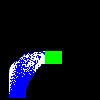

In [3]:
from IPython.display import Image
Image("/workspaces/RL2018/exercises/chapter5/e5_12_outputs/race_track_off-policy_example.png", width=400)

#### Value function in range [-5000001, -1587308.061128042]
Bellow is the average value of each possition on the track. We ignore states where the car is not moving up and to the right to decrease the noise a bit. Howerver becuase we are only covering a small fraction of the full state space during the monte carlo simulations take this value funciton with a large grain of salt.

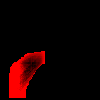

In [4]:
from IPython.display import Image
Image("/workspaces/RL2018/exercises/chapter5/e5_12_outputs/race_track_off-policy_avg_value.png", width=400)

### Exploring Starts
I did implement a second simpler algorithm for this problem, which was on policy Monte Carlo learning a greedy policy with exploring starts. Since this algorithm always follows a greedy policy, it can have a bit of trouble getting started and is highly sensitive to the initial value given to each state. In general, I have found that it is quite a bit slower and can become unrecoverably struct. Hence the low max episode length. However, the exploring starts method covers more of the state space than the off-policy method with small epsilon.

In [5]:
%%capture
!./e5_12/target/release/main --track ./e5_12_tracks/race_track.png \
    --algo exploring \
    --num_episodes 2000000 \
    --max_ep_len 2000 \
    --vel-limits 0 5 -5 0 \
    --no-stop \
    --seed 42 \
    --example ./e5_12_outputs/race_track_exploring_example.png \
    --value 0 5 -5 0 ./e5_12_outputs/race_track_exploring_avg_value.png

#### Example path
Again a sample path following the optimal policy.

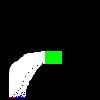

In [6]:
from IPython.display import Image
Image("/workspaces/RL2018/exercises/chapter5/e5_12_outputs/race_track_exploring_example.png", width=400)

#### Value function in range [-864.3870353363862, -6.588688817940989]
This was computed using the exact same method as the above value function.

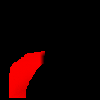

In [7]:
from IPython.display import Image
Image("/workspaces/RL2018/exercises/chapter5/e5_12_outputs/race_track_exploring_avg_value.png", width=400)

## A Larger Example
Using the off-policy method, we can move to an even larger state space than seen in the textbook. This problem requires careful hyperparameter tunning and a longer run of 6,000,000 episodes to get reliable convergence.


In [1]:
%%capture
!./e5_12/target/release/main --track ./e5_12_tracks/complex_track.png \
    --algo off-policy \
    --epsilon 0.08 \
    --seed 42 \
    --no-stop \
    --num_episodes 6000000 \
    --example ./e5_12_outputs/complex_track_off-policy_example.png \
    --value 0 10 -10 10 ./e5_12_outputs/complex_track_off-policy_avg_value.png

Creating race track env
velocity limits ((-20, 20), (-20, 20))
________________________________________________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________________

___________________________________________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX___________________________________________________________________
__________________________________________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX__________________________________________________________________
_________________________________________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX_________________________________________________________________
_________________________________________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX________________________________________________________________
________________________________________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX___________________________________________________________

_____________________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX_________________________________________________
_____________________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX_________________________________________________
_____________________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX_________________________________________________
_____________________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX_________________________________________________
____________________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX_____________________________________________

_____________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX__________________________________________________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX_________________________________________________
____________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX____________________________________________________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX_________________________________________________
____________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX____________________________________________________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX_________________________________________________
____________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX_____________________________________________________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX_________________________________________________
____________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX_____________________________________________________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX_____________________________________________

_________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX_______________________________________________________________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX________________________________
_________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX_______________________________________________________________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX________________________________
_________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX_______________________________________________________________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX________________________________
_________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX________________________________________________________________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX________________________________
_________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX________________________________________________________________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX____________________________

[00:00:01] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░      11/6000000 recent ep len 232527.2758750759
[00:00:01] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░      14/6000000 recent ep len 232052.50834208805
[00:00:02] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░      15/6000000 recent ep len 232021.71383374598
[00:00:02] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░      16/6000000 recent ep len 232127.75811991224
[00:00:02] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░      18/6000000 recent ep len 232400.85672543055
[00:00:02] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░      20/6000000 recent ep len 231972.2923268364
[00:00:02] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░      23/6000000 recent ep len 231475.04853175057
[00:00:03] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░      25/6000000 recent ep len 231194.9534457356
[00:00:03] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░      28/6000000 recent ep len 230596.5714532518
[00:00:03] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░      30/6000000 recent ep len 230235.915272

[00:00:08] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░     185/6000000 recent ep len 202879.64889577669
[00:00:08] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░     188/6000000 recent ep len 202408.7261199554
[00:00:09] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░     193/6000000 recent ep len 201510.47049290058
[00:00:09] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░     202/6000000 recent ep len 199797.625314241
[00:00:09] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░     212/6000000 recent ep len 197895.84375515374
[00:00:09] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░     216/6000000 recent ep len 197205.60651343162
[00:00:09] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░     222/6000000 recent ep len 196061.28375713734
[00:00:09] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░     227/6000000 recent ep len 195185.74333591788
[00:00:09] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░     234/6000000 recent ep len 193947.97686589215
[00:00:09] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░     238/6000000 recent ep len 193253.94111

[00:00:13] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░     672/6000000 recent ep len 128801.30372119059
[00:00:13] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░     687/6000000 recent ep len 126959.82506622752
[00:00:13] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░     700/6000000 recent ep len 125394.56960427023
[00:00:13] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░     709/6000000 recent ep len 124346.51692954965
[00:00:13] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░     729/6000000 recent ep len 121969.61731892155
[00:00:13] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░     741/6000000 recent ep len 120583.33658776298
[00:00:14] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░     758/6000000 recent ep len 118637.542373835
[00:00:14] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░     763/6000000 recent ep len 118108.53908033945
[00:00:14] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░     773/6000000 recent ep len 117017.52708279253
[00:00:14] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░     782/6000000 recent ep len 116037.3228

[00:00:18] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░    1828/6000000 recent ep len 43116.25449778174
[00:00:18] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░    1842/6000000 recent ep len 42571.028018505545
[00:00:18] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░    1866/6000000 recent ep len 41632.47257725412
[00:00:18] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░    1897/6000000 recent ep len 40431.04267360043
[00:00:18] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░    1922/6000000 recent ep len 39501.588542242585
[00:00:18] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░    1954/6000000 recent ep len 38326.12924658049
[00:00:18] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░    1981/6000000 recent ep len 37374.97131680871
[00:00:18] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░    2010/6000000 recent ep len 36366.334649724195
[00:00:18] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░    2037/6000000 recent ep len 35466.813109952775
[00:00:18] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░    2071/6000000 recent ep len 34344.81199110

[00:00:22] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░    4393/6000000 recent ep len 4553.889116376164
[00:00:22] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░    4445/6000000 recent ep len 4381.530560716333
[00:00:22] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░    4500/6000000 recent ep len 4208.006755162541
[00:00:22] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░    4576/6000000 recent ep len 3950.146990211665
[00:00:22] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░    4628/6000000 recent ep len 3813.452875551465
[00:00:22] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░    4692/6000000 recent ep len 3635.111467012821
[00:00:22] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░    4767/6000000 recent ep len 3425.882674723075
[00:00:22] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░    4824/6000000 recent ep len 3296.081793357537
[00:00:22] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░    4877/6000000 recent ep len 3187.007423027716
[00:00:22] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░    4944/6000000 recent ep len 3040.88302968095
[

[00:00:26] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░    9733/6000000 recent ep len 637.6264374536325
[00:00:26] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░    9827/6000000 recent ep len 637.947863805978
[00:00:26] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░    9927/6000000 recent ep len 629.8572053814357
[00:00:26] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   10035/6000000 recent ep len 620.4665637444444
[00:00:26] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   10147/6000000 recent ep len 610.5070419019183
[00:00:26] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   10246/6000000 recent ep len 611.3730065720729
[00:00:26] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   10343/6000000 recent ep len 610.2958531908548
[00:00:26] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   10454/6000000 recent ep len 600.2358746254583
[00:00:26] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   10591/6000000 recent ep len 576.7515817450842
[00:00:27] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   10711/6000000 recent ep len 573.0380554362581
[

[00:00:30] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   16710/6000000 recent ep len 419.53016480029436
[00:00:30] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   16838/6000000 recent ep len 417.45691335673973
[00:00:30] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   16951/6000000 recent ep len 415.042192023665
[00:00:30] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   17057/6000000 recent ep len 419.02613725470576
[00:00:30] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   17166/6000000 recent ep len 409.7021610005818
[00:00:31] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   17259/6000000 recent ep len 409.8647907557824
[00:00:31] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   17359/6000000 recent ep len 408.96057373548007
[00:00:31] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   17464/6000000 recent ep len 404.5385755710844
[00:00:31] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   17574/6000000 recent ep len 398.59266100829535
[00:00:31] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   17674/6000000 recent ep len 396.8702652319

[00:00:34] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   25112/6000000 recent ep len 337.76550392276937
[00:00:34] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   25260/6000000 recent ep len 339.01268227054686
[00:00:35] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   25434/6000000 recent ep len 330.0964862009017
[00:00:35] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   25590/6000000 recent ep len 330.1965955747129
[00:00:35] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   25742/6000000 recent ep len 331.89619917753015
[00:00:35] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   25898/6000000 recent ep len 332.15400191981917
[00:00:35] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   26057/6000000 recent ep len 331.95214532797746
[00:00:35] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   26207/6000000 recent ep len 334.11980250015074
[00:00:35] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   26366/6000000 recent ep len 331.5618250438973
[00:00:35] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   26512/6000000 recent ep len 331.47967053

[00:00:39] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   34540/6000000 recent ep len 263.2738898017718
[00:00:39] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   34711/6000000 recent ep len 262.18799733441375
[00:00:39] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   34878/6000000 recent ep len 259.20263195830796
[00:00:39] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   35038/6000000 recent ep len 262.1370669457732
[00:00:39] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   35207/6000000 recent ep len 261.857005102276
[00:00:39] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   35385/6000000 recent ep len 257.99880166958
[00:00:39] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   35550/6000000 recent ep len 263.10375344025175
[00:00:39] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   35728/6000000 recent ep len 266.0445231410036
[00:00:39] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   35871/6000000 recent ep len 269.0488963660463
[00:00:39] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   36037/6000000 recent ep len 266.79331964472675

[00:00:43] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   45884/6000000 recent ep len 237.527461042543
[00:00:43] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   46071/6000000 recent ep len 237.94639262257337
[00:00:43] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   46245/6000000 recent ep len 242.25033147480937
[00:00:43] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   46433/6000000 recent ep len 240.5361931424248
[00:00:43] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   46620/6000000 recent ep len 237.81290817770744
[00:00:43] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   46807/6000000 recent ep len 236.16632727052098
[00:00:43] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   47008/6000000 recent ep len 234.25659787012958
[00:00:43] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   47182/6000000 recent ep len 235.11802036019498
[00:00:43] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   47379/6000000 recent ep len 234.39583512605813
[00:00:43] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   47563/6000000 recent ep len 235.58369818

[00:00:47] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   58142/6000000 recent ep len 220.47985236779817
[00:00:47] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   58349/6000000 recent ep len 217.35553933340316
[00:00:47] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   58554/6000000 recent ep len 217.1400899333598
[00:00:47] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   58752/6000000 recent ep len 217.2829401583136
[00:00:47] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   58947/6000000 recent ep len 216.53440701179986
[00:00:47] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   59144/6000000 recent ep len 216.1088981830443
[00:00:47] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   59348/6000000 recent ep len 218.08371436315358
[00:00:47] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   59555/6000000 recent ep len 213.91300280521062
[00:00:47] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   59754/6000000 recent ep len 214.41972379653356
[00:00:48] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   59958/6000000 recent ep len 213.97199082

[00:00:51] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   71199/6000000 recent ep len 192.72114658589834
[00:00:51] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   71408/6000000 recent ep len 191.78965088295536
[00:00:51] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   71609/6000000 recent ep len 191.33830115922973
[00:00:51] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   71836/6000000 recent ep len 190.7834876740635
[00:00:51] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   72022/6000000 recent ep len 190.99803352619878
[00:00:51] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   72205/6000000 recent ep len 190.88705095446332
[00:00:51] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   72383/6000000 recent ep len 190.83945721948467
[00:00:52] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   72574/6000000 recent ep len 193.0088496518026
[00:00:52] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   72779/6000000 recent ep len 189.94434624571392
[00:00:52] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   72958/6000000 recent ep len 195.3390454

[00:00:55] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   84572/6000000 recent ep len 183.68313865719526
[00:00:55] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   84800/6000000 recent ep len 182.0501169373744
[00:00:55] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   85021/6000000 recent ep len 182.31628859139013
[00:00:55] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   85252/6000000 recent ep len 177.49523842802765
[00:00:56] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   85491/6000000 recent ep len 176.35070058529593
[00:00:56] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   85729/6000000 recent ep len 173.10030158838296
[00:00:56] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   85960/6000000 recent ep len 172.45342997355812
[00:00:56] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   86184/6000000 recent ep len 174.77101677861452
[00:00:56] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   86404/6000000 recent ep len 174.6662214394691
[00:00:56] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   86614/6000000 recent ep len 175.8703101

[00:00:59] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   98493/6000000 recent ep len 178.10046715117446
[00:00:59] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   98695/6000000 recent ep len 177.09998861804897
[00:01:00] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   98907/6000000 recent ep len 175.55158169405658
[00:01:00] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   99115/6000000 recent ep len 177.90790910888438
[00:01:00] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   99305/6000000 recent ep len 179.37560614200464
[00:01:00] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   99482/6000000 recent ep len 178.2204931666786
[00:01:00] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   99688/6000000 recent ep len 176.09388253559354
[00:01:00] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   99886/6000000 recent ep len 177.69912503820638
[00:01:00] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  100081/6000000 recent ep len 179.25990572143323
[00:01:00] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  100300/6000000 recent ep len 174.046844

[00:01:04] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  111942/6000000 recent ep len 158.37849649384717
[00:01:04] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  112165/6000000 recent ep len 157.45624019561777
[00:01:04] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  112378/6000000 recent ep len 158.25209776219467
[00:01:04] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  112594/6000000 recent ep len 161.5742687762488
[00:01:04] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  112806/6000000 recent ep len 163.3379932648756
[00:01:04] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  113038/6000000 recent ep len 161.6500785528515
[00:01:04] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  113249/6000000 recent ep len 161.94232353192396
[00:01:04] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  113459/6000000 recent ep len 164.20355938283183
[00:01:04] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  113688/6000000 recent ep len 162.13360189989675
[00:01:04] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  113913/6000000 recent ep len 160.77717501

[00:01:08] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  125386/6000000 recent ep len 171.6319265204422
[00:01:08] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  125609/6000000 recent ep len 172.3161375266391
[00:01:08] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  125834/6000000 recent ep len 170.55118918108798
[00:01:08] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  126060/6000000 recent ep len 171.13890832938947
[00:01:08] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  126266/6000000 recent ep len 172.14708137311624
[00:01:08] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  126491/6000000 recent ep len 171.49876870381144
[00:01:08] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  126719/6000000 recent ep len 170.56705072592072
[00:01:08] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  126925/6000000 recent ep len 170.599714392387
[00:01:08] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  127143/6000000 recent ep len 169.50994406433315
[00:01:08] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  127359/6000000 recent ep len 171.266020665

[00:01:12] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  139161/6000000 recent ep len 159.54494660590402
[00:01:12] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  139387/6000000 recent ep len 159.2320727435283
[00:01:12] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  139625/6000000 recent ep len 154.40799686768304
[00:01:12] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  139850/6000000 recent ep len 153.38703925060253
[00:01:12] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  140082/6000000 recent ep len 151.21007582884883
[00:01:12] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  140304/6000000 recent ep len 153.09316701908725
[00:01:12] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  140512/6000000 recent ep len 156.04019942489592
[00:01:12] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  140721/6000000 recent ep len 156.10907199904463
[00:01:12] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  140938/6000000 recent ep len 158.48075884180759
[00:01:13] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  141148/6000000 recent ep len 161.398326

[00:01:16] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  153050/6000000 recent ep len 154.69016697425926
[00:01:16] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  153269/6000000 recent ep len 153.86874007122805
[00:01:16] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  153492/6000000 recent ep len 153.65059491288906
[00:01:16] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  153712/6000000 recent ep len 153.64846812291285
[00:01:16] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  153930/6000000 recent ep len 155.6973850603052
[00:01:16] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  154151/6000000 recent ep len 157.17522906275906
[00:01:16] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  154371/6000000 recent ep len 157.47926343914293
[00:01:17] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  154578/6000000 recent ep len 155.02298279831788
[00:01:17] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  154794/6000000 recent ep len 155.3094563350755
[00:01:17] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  155017/6000000 recent ep len 156.6978241

[00:01:20] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  167484/6000000 recent ep len 156.70715501172802
[00:01:20] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  167733/6000000 recent ep len 157.01938503685446
[00:01:20] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  168002/6000000 recent ep len 155.70860513084045
[00:01:20] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  168274/6000000 recent ep len 153.32520839455347
[00:01:21] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  168515/6000000 recent ep len 155.23012843859897
[00:01:21] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  168773/6000000 recent ep len 153.28928019872617
[00:01:21] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  169023/6000000 recent ep len 153.30037218174797
[00:01:21] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  169265/6000000 recent ep len 153.994382566339
[00:01:21] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  169523/6000000 recent ep len 153.59789367675612
[00:01:21] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  169778/6000000 recent ep len 151.7677821

[00:01:24] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  181957/6000000 recent ep len 150.72981762975783
[00:01:25] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  182185/6000000 recent ep len 149.30261040085173
[00:01:25] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  182435/6000000 recent ep len 147.61792499061966
[00:01:25] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  182672/6000000 recent ep len 146.28942144345314
[00:01:25] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  182898/6000000 recent ep len 145.78200788872113
[00:01:25] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  183138/6000000 recent ep len 142.6125267306561
[00:01:25] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  183368/6000000 recent ep len 141.55879784451423
[00:01:25] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  183600/6000000 recent ep len 142.38915014650945
[00:01:25] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  183822/6000000 recent ep len 144.92069629710556
[00:01:25] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  184043/6000000 recent ep len 146.879648

[00:01:29] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  196586/6000000 recent ep len 142.99949086976656
[00:01:29] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  196832/6000000 recent ep len 141.7621064309093
[00:01:29] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  197072/6000000 recent ep len 142.6946020144122
[00:01:29] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  197303/6000000 recent ep len 145.07440149552616
[00:01:29] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  197537/6000000 recent ep len 143.39290059658748
[00:01:29] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  197763/6000000 recent ep len 144.2114483824714
[00:01:29] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  197994/6000000 recent ep len 144.1024606355954
[00:01:29] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  198231/6000000 recent ep len 144.72901988237172
[00:01:29] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  198455/6000000 recent ep len 143.70251525978554
[00:01:29] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  198683/6000000 recent ep len 143.277115856

[00:01:33] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  211224/6000000 recent ep len 140.75764163953326
[00:01:33] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  211468/6000000 recent ep len 140.25713553105368
[00:01:33] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  211714/6000000 recent ep len 139.57808349574336
[00:01:33] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  211954/6000000 recent ep len 139.4298375474735
[00:01:33] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  212181/6000000 recent ep len 136.75929000941522
[00:01:33] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  212417/6000000 recent ep len 135.91423653847485
[00:01:33] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  212653/6000000 recent ep len 135.88175266302275
[00:01:33] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  212880/6000000 recent ep len 136.47849470692918
[00:01:33] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  213112/6000000 recent ep len 138.33759516593418
[00:01:33] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  213353/6000000 recent ep len 137.784368

[00:01:37] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  226064/6000000 recent ep len 140.56546462058571
[00:01:37] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  226296/6000000 recent ep len 141.30754547120196
[00:01:37] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  226536/6000000 recent ep len 139.60639894471
[00:01:37] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  226784/6000000 recent ep len 140.18133336498747
[00:01:37] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  227007/6000000 recent ep len 141.0832265967588
[00:01:37] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  227242/6000000 recent ep len 140.65133962240475
[00:01:37] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  227473/6000000 recent ep len 141.1079200188972
[00:01:37] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  227718/6000000 recent ep len 139.0343931822406
[00:01:37] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  227960/6000000 recent ep len 139.58132427109572
[00:01:38] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  228197/6000000 recent ep len 141.89125407801

[00:01:41] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  241064/6000000 recent ep len 134.9684597866626
[00:01:41] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  241315/6000000 recent ep len 132.63469097051177
[00:01:41] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  241556/6000000 recent ep len 132.63845329091538
[00:01:41] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  241798/6000000 recent ep len 132.83791133764194
[00:01:41] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  242038/6000000 recent ep len 136.41032443748833
[00:01:41] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  242287/6000000 recent ep len 137.3190248761535
[00:01:41] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  242517/6000000 recent ep len 138.27819008604382
[00:01:42] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  242764/6000000 recent ep len 137.63835264402553
[00:01:42] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  243007/6000000 recent ep len 137.09393128479695
[00:01:42] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  243246/6000000 recent ep len 137.3761785

[00:01:45] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  256079/6000000 recent ep len 140.33597884777421
[00:01:45] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  256320/6000000 recent ep len 137.86479543999044
[00:01:45] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  256555/6000000 recent ep len 138.92644506028236
[00:01:45] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  256795/6000000 recent ep len 137.30672868886865
[00:01:46] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  257035/6000000 recent ep len 136.58446462608092
[00:01:46] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  257280/6000000 recent ep len 136.21091894257327
[00:01:46] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  257528/6000000 recent ep len 134.3996598269744
[00:01:46] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  257768/6000000 recent ep len 135.0166870412149
[00:01:46] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  258008/6000000 recent ep len 135.67713815854225
[00:01:46] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  258255/6000000 recent ep len 133.2119688

[00:01:49] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  271498/6000000 recent ep len 126.08490254127594
[00:01:49] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  271747/6000000 recent ep len 127.60644894059696
[00:01:50] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  271992/6000000 recent ep len 128.1205758935674
[00:01:50] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  272244/6000000 recent ep len 127.61537721891956
[00:01:50] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  272490/6000000 recent ep len 129.49423351660738
[00:01:50] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  272733/6000000 recent ep len 128.63187601812987
[00:01:50] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  272984/6000000 recent ep len 129.11341094059603
[00:01:50] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  273227/6000000 recent ep len 129.8889050651042
[00:01:50] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  273484/6000000 recent ep len 128.69300361562543
[00:01:50] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  273725/6000000 recent ep len 130.7530070

[00:01:54] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  287072/6000000 recent ep len 128.42829547830007
[00:01:54] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  287325/6000000 recent ep len 126.61048244209448
[00:01:54] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  287590/6000000 recent ep len 125.6351275074532
[00:01:54] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  287847/6000000 recent ep len 123.87965388607428
[00:01:54] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  288103/6000000 recent ep len 124.02893814901356
[00:01:54] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  288303/6000000 recent ep len 124.65940660570678
[00:01:54] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  288573/6000000 recent ep len 124.04524632464107
[00:01:54] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  288820/6000000 recent ep len 124.57296967386127
[00:01:54] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  289076/6000000 recent ep len 124.38963920030747
[00:01:54] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  289313/6000000 recent ep len 127.928162

[00:01:58] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  302767/6000000 recent ep len 121.03403649964342
[00:01:58] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  303006/6000000 recent ep len 123.13736648268848
[00:01:58] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  303249/6000000 recent ep len 123.80899341371939
[00:01:58] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  303505/6000000 recent ep len 124.34400638953902
[00:01:58] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  303756/6000000 recent ep len 122.63958926164688
[00:01:58] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  303988/6000000 recent ep len 125.60527655084825
[00:01:58] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  304231/6000000 recent ep len 125.52171915057555
[00:01:58] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  304492/6000000 recent ep len 124.31354666777891
[00:01:58] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  304743/6000000 recent ep len 124.27044293627269
[00:01:58] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  305006/6000000 recent ep len 123.89257

[00:02:02] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  318700/6000000 recent ep len 119.14524344737404
[00:02:02] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  318952/6000000 recent ep len 120.61961679974969
[00:02:02] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  319209/6000000 recent ep len 120.54216115103533
[00:02:02] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  319468/6000000 recent ep len 119.1553056083111
[00:02:02] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  319714/6000000 recent ep len 121.32062310393907
[00:02:02] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  319965/6000000 recent ep len 121.66372818937492
[00:02:02] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  320206/6000000 recent ep len 121.91788312377722
[00:02:02] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  320441/6000000 recent ep len 123.72120826025774
[00:02:02] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  320684/6000000 recent ep len 123.72471291895532
[00:02:03] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  320942/6000000 recent ep len 122.016556

[00:02:06] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  334738/6000000 recent ep len 118.66279403587313
[00:02:06] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  334995/6000000 recent ep len 117.9440113036468
[00:02:06] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  335260/6000000 recent ep len 116.70659165264223
[00:02:06] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  335526/6000000 recent ep len 115.28666461289879
[00:02:06] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  335794/6000000 recent ep len 115.39961636086396
[00:02:06] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  336054/6000000 recent ep len 114.6951508545816
[00:02:06] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  336312/6000000 recent ep len 114.59994906796851
[00:02:07] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  336570/6000000 recent ep len 114.10690955335994
[00:02:07] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  336833/6000000 recent ep len 115.3471233935157
[00:02:07] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  337099/6000000 recent ep len 114.51164275

[00:02:10] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  351013/6000000 recent ep len 111.00340737445133
[00:02:10] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  351257/6000000 recent ep len 110.66879648769999
[00:02:10] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  351517/6000000 recent ep len 112.13513932793258
[00:02:10] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  351778/6000000 recent ep len 109.50836055788125
[00:02:11] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  352035/6000000 recent ep len 109.16201368189051
[00:02:11] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  352291/6000000 recent ep len 109.78996507309203
[00:02:11] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  352553/6000000 recent ep len 110.1829877217051
[00:02:11] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  352809/6000000 recent ep len 111.23841356812156
[00:02:11] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  353057/6000000 recent ep len 112.03763675662142
[00:02:11] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  353311/6000000 recent ep len 113.073828

[00:02:14] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  367352/6000000 recent ep len 108.39338961063405
[00:02:14] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  367619/6000000 recent ep len 109.30180352913617
[00:02:15] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  367891/6000000 recent ep len 108.93299704558282
[00:02:15] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  368158/6000000 recent ep len 109.51835255148814
[00:02:15] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  368425/6000000 recent ep len 109.51133165634324
[00:02:15] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  368695/6000000 recent ep len 108.98969639796135
[00:02:15] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  368965/6000000 recent ep len 109.03282296872366
[00:02:15] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  369221/6000000 recent ep len 109.88160551687935
[00:02:15] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  369488/6000000 recent ep len 109.63374962493187
[00:02:15] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  369747/6000000 recent ep len 112.14260

[00:02:19] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  383866/6000000 recent ep len 109.09728474897457
[00:02:19] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  384137/6000000 recent ep len 108.48578654823817
[00:02:19] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  384385/6000000 recent ep len 111.05479913374685
[00:02:19] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  384659/6000000 recent ep len 110.02607517058078
[00:02:19] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  384915/6000000 recent ep len 111.02137105530521
[00:02:19] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  385181/6000000 recent ep len 109.45844004939872
[00:02:19] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  385452/6000000 recent ep len 108.15903950512232
[00:02:19] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  385715/6000000 recent ep len 108.47786802947147
[00:02:19] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  385981/6000000 recent ep len 107.85516296145553
[00:02:19] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  386239/6000000 recent ep len 109.84985

[00:02:23] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  400468/6000000 recent ep len 108.36886677127993
[00:02:23] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  400738/6000000 recent ep len 108.71855057085622
[00:02:23] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  401017/6000000 recent ep len 107.40560080166645
[00:02:23] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  401290/6000000 recent ep len 106.44003322412927
[00:02:23] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  401552/6000000 recent ep len 107.4650862310422
[00:02:23] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  401824/6000000 recent ep len 107.09397024770506
[00:02:23] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  402098/6000000 recent ep len 106.4313190802386
[00:02:23] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  402370/6000000 recent ep len 106.2525317968051
[00:02:23] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  402643/6000000 recent ep len 105.04234470890627
[00:02:23] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  402903/6000000 recent ep len 105.80208448

[00:02:27] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  417320/6000000 recent ep len 109.69952612360397
[00:02:27] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  417592/6000000 recent ep len 107.97257200267265
[00:02:27] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  417850/6000000 recent ep len 108.46837837038079
[00:02:27] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  418113/6000000 recent ep len 109.1264439408048
[00:02:27] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  418380/6000000 recent ep len 107.75684960362902
[00:02:27] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  418662/6000000 recent ep len 105.93833198148681
[00:02:27] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  418933/6000000 recent ep len 105.67037744876635
[00:02:27] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  419194/6000000 recent ep len 106.90111068530685
[00:02:27] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  419465/6000000 recent ep len 107.2524521940242
[00:02:28] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  419741/6000000 recent ep len 106.9072064

[00:02:31] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  434102/6000000 recent ep len 106.73674298050106
[00:02:31] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  434369/6000000 recent ep len 106.88387210070846
[00:02:31] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  434643/6000000 recent ep len 105.26885388063525
[00:02:31] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  434920/6000000 recent ep len 103.09738880846986
[00:02:31] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  435188/6000000 recent ep len 105.08847275950988
[00:02:31] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  435454/6000000 recent ep len 105.92226093332052
[00:02:31] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  435724/6000000 recent ep len 106.65226633777864
[00:02:32] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  435996/6000000 recent ep len 104.98218926666802
[00:02:32] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  436269/6000000 recent ep len 105.73739766894518
[00:02:32] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  436545/6000000 recent ep len 105.27574

[00:02:35] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  450820/6000000 recent ep len 101.93958279206271
[00:02:35] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  451101/6000000 recent ep len 101.08186740013171
[00:02:35] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  451384/6000000 recent ep len 103.01250336806746
[00:02:35] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  451661/6000000 recent ep len 101.4306134060122
[00:02:36] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  451935/6000000 recent ep len 101.8831707500657
[00:02:36] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  452217/6000000 recent ep len 101.82949979587237
[00:02:36] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  452495/6000000 recent ep len 104.35106588829278
[00:02:36] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  452759/6000000 recent ep len 105.59728688474502
[00:02:36] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  453020/6000000 recent ep len 105.40794679307557
[00:02:36] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  453272/6000000 recent ep len 105.5827432

[00:02:39] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  467664/6000000 recent ep len 101.32156570884332
[00:02:39] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  467930/6000000 recent ep len 102.39224717301158
[00:02:40] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  468208/6000000 recent ep len 102.89387427943777
[00:02:40] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  468489/6000000 recent ep len 102.05968644200074
[00:02:40] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  468766/6000000 recent ep len 102.77274049533686
[00:02:40] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  469037/6000000 recent ep len 101.72152490298264
[00:02:40] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  469310/6000000 recent ep len 102.3099844545177
[00:02:40] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  469598/6000000 recent ep len 101.72008419990705
[00:02:40] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  469877/6000000 recent ep len 100.68310678487128
[00:02:40] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  470149/6000000 recent ep len 101.233283

[00:02:44] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  484676/6000000 recent ep len 100.82293047681301
[00:02:44] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  484945/6000000 recent ep len 100.12616438682848
[00:02:44] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  485223/6000000 recent ep len 99.93424273242968
[00:02:44] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  485476/6000000 recent ep len 100.73493811395718
[00:02:44] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  485735/6000000 recent ep len 100.83952483994594
[00:02:44] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  486022/6000000 recent ep len 99.01018261085434
[00:02:44] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  486295/6000000 recent ep len 99.58339893322037
[00:02:44] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  486574/6000000 recent ep len 100.41126828171323
[00:02:44] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  486845/6000000 recent ep len 99.88548351614276
[00:02:44] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  487093/6000000 recent ep len 100.300967176

[00:02:48] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  501628/6000000 recent ep len 98.32431958464586
[00:02:48] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  501911/6000000 recent ep len 97.68277342933139
[00:02:48] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  502186/6000000 recent ep len 99.46619493486554
[00:02:48] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  502459/6000000 recent ep len 99.39605874075781
[00:02:48] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  502743/6000000 recent ep len 98.14236362915531
[00:02:48] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  502952/6000000 recent ep len 100.98613113001745
[00:02:48] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  503226/6000000 recent ep len 101.05204621628982
[00:02:48] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  503505/6000000 recent ep len 100.80489212322254
[00:02:48] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  503789/6000000 recent ep len 100.37367232333601
[00:02:48] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  504072/6000000 recent ep len 99.72710061597

[00:02:52] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  518870/6000000 recent ep len 93.60199279963128
[00:02:52] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  519150/6000000 recent ep len 95.99538189657876
[00:02:52] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  519432/6000000 recent ep len 95.14267156526293
[00:02:52] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  519712/6000000 recent ep len 94.06506725102938
[00:02:52] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  519980/6000000 recent ep len 94.32827463589759
[00:02:52] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  520263/6000000 recent ep len 94.79157875916201
[00:02:52] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  520564/6000000 recent ep len 94.7676091885115
[00:02:52] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  520841/6000000 recent ep len 93.4870696618986
[00:02:52] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  521111/6000000 recent ep len 94.46997355980945
[00:02:53] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  521394/6000000 recent ep len 95.74959693977497
[0

[00:02:56] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  536626/6000000 recent ep len 94.1984700578012
[00:02:56] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  536907/6000000 recent ep len 93.53984208804731
[00:02:56] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  537196/6000000 recent ep len 94.31152791593138
[00:02:56] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  537475/6000000 recent ep len 94.72502265757483
[00:02:56] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  537767/6000000 recent ep len 96.0535076325258
[00:02:56] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  538050/6000000 recent ep len 97.16569316950164
[00:02:57] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  538338/6000000 recent ep len 96.95403192622314
[00:02:57] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  538637/6000000 recent ep len 95.32067053753208
[00:02:57] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  538914/6000000 recent ep len 94.59946803627459
[00:02:57] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  539207/6000000 recent ep len 94.53049319495909
[0

[00:03:00] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  554496/6000000 recent ep len 95.97789201931154
[00:03:00] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  554774/6000000 recent ep len 95.8062020048287
[00:03:01] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  555058/6000000 recent ep len 95.52281007501074
[00:03:01] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  555321/6000000 recent ep len 96.75098272149212
[00:03:01] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  555603/6000000 recent ep len 96.25611663784619
[00:03:01] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  555890/6000000 recent ep len 95.63092143613946
[00:03:01] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  556184/6000000 recent ep len 94.17298544902782
[00:03:01] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  556455/6000000 recent ep len 94.73066592903753
[00:03:01] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  556729/6000000 recent ep len 96.53363430593053
[00:03:01] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  557013/6000000 recent ep len 94.24279357379584
[

[00:03:05] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  572327/6000000 recent ep len 94.97484298117244
[00:03:05] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  572617/6000000 recent ep len 95.72662519570086
[00:03:05] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  572895/6000000 recent ep len 94.8264283557147
[00:03:05] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  573184/6000000 recent ep len 93.76232618188575
[00:03:05] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  573469/6000000 recent ep len 93.95265422279948
[00:03:05] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  573746/6000000 recent ep len 93.77671312221364
[00:03:05] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  574016/6000000 recent ep len 91.03159172649603
[00:03:05] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  574287/6000000 recent ep len 91.3787264726736
[00:03:05] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  574559/6000000 recent ep len 92.2935655140654
[00:03:05] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  574835/6000000 recent ep len 92.1450168648104
[00:

[00:03:09] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  590326/6000000 recent ep len 91.83643039210675
[00:03:09] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  590619/6000000 recent ep len 91.79199558403373
[00:03:09] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  590903/6000000 recent ep len 91.96101278517216
[00:03:09] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  591180/6000000 recent ep len 91.78879461055728
[00:03:09] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  591458/6000000 recent ep len 93.76192483255869
[00:03:09] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  591734/6000000 recent ep len 94.8152590748955
[00:03:09] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  592022/6000000 recent ep len 93.89387543438365
[00:03:09] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  592299/6000000 recent ep len 94.96826557536336
[00:03:09] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  592586/6000000 recent ep len 94.88503558889126
[00:03:09] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  592871/6000000 recent ep len 93.83851856552845
[

[00:03:13] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  608413/6000000 recent ep len 95.80391279969228
[00:03:13] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  608699/6000000 recent ep len 95.74072925807461
[00:03:13] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  608996/6000000 recent ep len 93.6062920988692
[00:03:13] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  609275/6000000 recent ep len 93.47388761244405
[00:03:13] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  609565/6000000 recent ep len 92.53744741559758
[00:03:13] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  609850/6000000 recent ep len 93.61557527249916
[00:03:13] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  610145/6000000 recent ep len 94.00820871968051
[00:03:14] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  610436/6000000 recent ep len 94.18666772854675
[00:03:14] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  610719/6000000 recent ep len 93.77584547995976
[00:03:14] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  610990/6000000 recent ep len 95.1146394318216
[0

[00:03:17] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  626304/6000000 recent ep len 90.77058384230692
[00:03:17] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  626606/6000000 recent ep len 90.24211906759174
[00:03:17] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  626887/6000000 recent ep len 90.87764567263383
[00:03:18] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  627168/6000000 recent ep len 91.75681041136376
[00:03:18] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  627461/6000000 recent ep len 91.60295028016702
[00:03:18] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  627742/6000000 recent ep len 91.25401753709502
[00:03:18] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  628038/6000000 recent ep len 90.5082667550517
[00:03:18] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  628323/6000000 recent ep len 90.98717543837448
[00:03:18] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  628611/6000000 recent ep len 92.0023347193853
[00:03:18] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  628904/6000000 recent ep len 90.35350631892057
[0

[00:03:22] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  644288/6000000 recent ep len 90.26570962265008
[00:03:22] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  644576/6000000 recent ep len 92.28340310221975
[00:03:22] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  644868/6000000 recent ep len 92.96691660735168
[00:03:22] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  645160/6000000 recent ep len 91.39034404011389
[00:03:22] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  645446/6000000 recent ep len 90.83021255524841
[00:03:22] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  645751/6000000 recent ep len 89.96385095255154
[00:03:22] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  646034/6000000 recent ep len 89.98754568518196
[00:03:22] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  646331/6000000 recent ep len 90.599673142446
[00:03:22] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  646617/6000000 recent ep len 91.45696961500856
[00:03:22] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  646898/6000000 recent ep len 91.48015713733452
[0

[00:03:26] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  662463/6000000 recent ep len 89.86822808982494
[00:03:26] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  662748/6000000 recent ep len 89.68554204645902
[00:03:26] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  663053/6000000 recent ep len 89.41708948175906
[00:03:26] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  663361/6000000 recent ep len 88.10586576004965
[00:03:26] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  663656/6000000 recent ep len 87.81947130825179
[00:03:26] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  663955/6000000 recent ep len 87.96700067684225
[00:03:26] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  664235/6000000 recent ep len 88.94550359722449
[00:03:26] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  664517/6000000 recent ep len 88.60293564437292
[00:03:26] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  664801/6000000 recent ep len 89.52484911102448
[00:03:26] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  665096/6000000 recent ep len 89.56532228546328


[00:03:30] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  680862/6000000 recent ep len 89.45174170811093
[00:03:30] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  681148/6000000 recent ep len 89.15378929987367
[00:03:30] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  681452/6000000 recent ep len 89.88151085730888
[00:03:30] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  681741/6000000 recent ep len 88.36118736037213
[00:03:30] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  682028/6000000 recent ep len 88.53879084453276
[00:03:30] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  682321/6000000 recent ep len 88.60757261142544
[00:03:30] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  682605/6000000 recent ep len 88.86177390569375
[00:03:30] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  682872/6000000 recent ep len 88.99564499823012
[00:03:31] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  683164/6000000 recent ep len 89.53736442414301
[00:03:31] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  683458/6000000 recent ep len 88.05236746837157


[00:03:34] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  699287/6000000 recent ep len 87.85564922309398
[00:03:34] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  699576/6000000 recent ep len 88.55114623685975
[00:03:34] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  699862/6000000 recent ep len 88.30604972783652
[00:03:34] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  700166/6000000 recent ep len 89.49732713665937
[00:03:35] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  700456/6000000 recent ep len 89.58591291484348
[00:03:35] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  700734/6000000 recent ep len 88.52955730403357
[00:03:35] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  701023/6000000 recent ep len 89.07054410596687
[00:03:35] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  701328/6000000 recent ep len 88.73844812661623
[00:03:35] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  701617/6000000 recent ep len 87.97636855552274
[00:03:35] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  701895/6000000 recent ep len 87.35703614971506


[00:03:38] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  717979/6000000 recent ep len 90.47572859110815
[00:03:39] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  718258/6000000 recent ep len 91.08467200171192
[00:03:39] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  718548/6000000 recent ep len 90.50111887574276
[00:03:39] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  718828/6000000 recent ep len 90.65718685728181
[00:03:39] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  719117/6000000 recent ep len 90.11186166857728
[00:03:39] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  719402/6000000 recent ep len 89.4665218238795
[00:03:39] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  719697/6000000 recent ep len 87.73348540277055
[00:03:39] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  719985/6000000 recent ep len 89.66275545528566
[00:03:39] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  720276/6000000 recent ep len 89.23849370676975
[00:03:39] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  720562/6000000 recent ep len 88.64583222389757
[

[00:03:43] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  736177/6000000 recent ep len 89.70115811667746
[00:03:43] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  736469/6000000 recent ep len 88.01149761075754
[00:03:43] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  736752/6000000 recent ep len 89.14149266124303
[00:03:43] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  737036/6000000 recent ep len 89.05791086329651
[00:03:43] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  737303/6000000 recent ep len 89.05369443374097
[00:03:43] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  737585/6000000 recent ep len 87.74563999435954
[00:03:43] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  737869/6000000 recent ep len 87.99027564036435
[00:03:43] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  738138/6000000 recent ep len 88.16110416448595
[00:03:43] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  738416/6000000 recent ep len 88.30242102932039
[00:03:43] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  738710/6000000 recent ep len 89.14258110916658


[00:03:47] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  754559/6000000 recent ep len 88.1718452047033
[00:03:47] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  754859/6000000 recent ep len 87.2692784832872
[00:03:47] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  755167/6000000 recent ep len 85.88658578075623
[00:03:47] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  755469/6000000 recent ep len 86.3414428214107
[00:03:47] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  755746/6000000 recent ep len 86.62292318594329
[00:03:47] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  756040/6000000 recent ep len 87.63021807580476
[00:03:47] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  756335/6000000 recent ep len 85.41761598424493
[00:03:47] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  756626/6000000 recent ep len 87.16830994001356
[00:03:47] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  756915/6000000 recent ep len 89.59497815119119
[00:03:48] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  757216/6000000 recent ep len 89.77500272647816
[00

[00:03:51] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  773284/6000000 recent ep len 88.48897347790941
[00:03:51] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  773579/6000000 recent ep len 87.8557796340795
[00:03:51] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  773862/6000000 recent ep len 88.61355962987065
[00:03:51] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  774156/6000000 recent ep len 88.96541409702274
[00:03:51] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  774455/6000000 recent ep len 87.8337266188122
[00:03:51] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  774761/6000000 recent ep len 87.42044123091797
[00:03:52] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  775050/6000000 recent ep len 86.98992595434942
[00:03:52] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  775326/6000000 recent ep len 88.82561996558903
[00:03:52] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  775619/6000000 recent ep len 87.67960215984199
[00:03:52] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  775912/6000000 recent ep len 87.05647576419913
[0

[00:03:55] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  792030/6000000 recent ep len 81.69392723751353
[00:03:55] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  792317/6000000 recent ep len 82.81478324363572
[00:03:56] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  792610/6000000 recent ep len 82.27221521126187
[00:03:56] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  792893/6000000 recent ep len 83.3554205081816
[00:03:56] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  793177/6000000 recent ep len 84.38082244816663
[00:03:56] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  793454/6000000 recent ep len 84.38101581722974
[00:03:56] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  793735/6000000 recent ep len 85.13703550164868
[00:03:56] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  794015/6000000 recent ep len 85.74022569825107
[00:03:56] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  794302/6000000 recent ep len 86.13078893170632
[00:03:56] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  794598/6000000 recent ep len 85.6493148351231
[0

[00:04:00] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  810720/6000000 recent ep len 82.83458337931233
[00:04:00] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  811017/6000000 recent ep len 83.33021430087679
[00:04:00] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  811309/6000000 recent ep len 82.4842944004088
[00:04:00] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  811611/6000000 recent ep len 82.21481754675885
[00:04:00] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  811903/6000000 recent ep len 82.62289125248
[00:04:00] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  812181/6000000 recent ep len 82.94688560313152
[00:04:00] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  812466/6000000 recent ep len 84.35476710808646
[00:04:00] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  812720/6000000 recent ep len 83.49460083275176
[00:04:00] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  813010/6000000 recent ep len 83.18788876241926
[00:04:00] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  813308/6000000 recent ep len 82.17618268590297
[00:

[00:04:04] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  829277/6000000 recent ep len 83.42331979950373
[00:04:04] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  829571/6000000 recent ep len 83.94382309248316
[00:04:04] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  829866/6000000 recent ep len 83.15739753835402
[00:04:04] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  830169/6000000 recent ep len 82.90112766056724
[00:04:04] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  830464/6000000 recent ep len 82.59942733795505
[00:04:04] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  830751/6000000 recent ep len 82.95222839374891
[00:04:04] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  831033/6000000 recent ep len 83.79390206040108
[00:04:04] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  831315/6000000 recent ep len 83.78286932394947
[00:04:04] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  831601/6000000 recent ep len 83.74059297902444
[00:04:04] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  831894/6000000 recent ep len 84.26991395018827


[00:04:08] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  848024/6000000 recent ep len 84.00424321913718
[00:04:08] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  848326/6000000 recent ep len 84.52387039774801
[00:04:08] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  848616/6000000 recent ep len 84.4543833618265
[00:04:08] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  848917/6000000 recent ep len 84.70526184876367
[00:04:08] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  849219/6000000 recent ep len 85.17611123149754
[00:04:08] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  849523/6000000 recent ep len 83.79224370835325
[00:04:08] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  849817/6000000 recent ep len 83.19697611728274
[00:04:09] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  850131/6000000 recent ep len 82.86338934623271
[00:04:09] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  850427/6000000 recent ep len 83.04987564834515
[00:04:09] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  850714/6000000 recent ep len 82.0662675388505
[0

[00:04:12] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  866838/6000000 recent ep len 83.29356230506065
[00:04:12] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  867119/6000000 recent ep len 84.2358573350653
[00:04:12] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  867410/6000000 recent ep len 83.59967143341713
[00:04:13] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  867699/6000000 recent ep len 84.11294048482267
[00:04:13] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  867988/6000000 recent ep len 83.61487288306556
[00:04:13] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  868270/6000000 recent ep len 83.21861303178976
[00:04:13] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  868563/6000000 recent ep len 82.44727080415764
[00:04:13] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  868857/6000000 recent ep len 82.02844049718492
[00:04:13] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  869140/6000000 recent ep len 81.75824180700478
[00:04:13] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  869420/6000000 recent ep len 82.13482362352916
[

[00:04:17] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  885728/6000000 recent ep len 80.80681519814934
[00:04:17] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  886040/6000000 recent ep len 81.06119239956442
[00:04:17] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  886341/6000000 recent ep len 82.08352920106525
[00:04:17] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  886641/6000000 recent ep len 81.48076946274219
[00:04:17] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  886935/6000000 recent ep len 81.47842819896735
[00:04:17] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  887241/6000000 recent ep len 81.83101315304194
[00:04:17] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  887555/6000000 recent ep len 82.33670182997669
[00:04:17] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  887860/6000000 recent ep len 81.57745313647243
[00:04:17] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  888147/6000000 recent ep len 81.72317376935165
[00:04:17] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  888458/6000000 recent ep len 81.61096928392581


[00:04:21] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  904802/6000000 recent ep len 82.60763344799396
[00:04:21] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  905099/6000000 recent ep len 81.92796793458214
[00:04:21] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  905408/6000000 recent ep len 81.22094573161053
[00:04:21] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  905702/6000000 recent ep len 80.66987937314758
[00:04:21] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  906005/6000000 recent ep len 80.74203450945737
[00:04:21] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  906307/6000000 recent ep len 81.05880998406586
[00:04:21] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  906602/6000000 recent ep len 81.56644849517413
[00:04:21] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  906892/6000000 recent ep len 80.56302647629776
[00:04:21] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  907191/6000000 recent ep len 81.40303516655794
[00:04:21] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  907496/6000000 recent ep len 82.96910014206607


[00:04:25] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  924021/6000000 recent ep len 81.94593437057829
[00:04:25] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  924319/6000000 recent ep len 82.05829570856099
[00:04:25] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  924618/6000000 recent ep len 81.63272262571962
[00:04:25] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  924916/6000000 recent ep len 81.99500940512071
[00:04:25] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  925210/6000000 recent ep len 82.2718732291076
[00:04:25] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  925518/6000000 recent ep len 81.87676600691617
[00:04:25] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  925821/6000000 recent ep len 81.37951428105363
[00:04:25] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  926128/6000000 recent ep len 80.77853062057368
[00:04:26] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  926434/6000000 recent ep len 82.16998711848261
[00:04:26] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  926731/6000000 recent ep len 81.4455478908986
[0

[00:04:29] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  943072/6000000 recent ep len 81.61540154023504
[00:04:29] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  943373/6000000 recent ep len 81.72599701662487
[00:04:29] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  943672/6000000 recent ep len 82.77130417680709
[00:04:29] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  943981/6000000 recent ep len 82.54773148392115
[00:04:29] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  944282/6000000 recent ep len 82.06890876527832
[00:04:30] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  944583/6000000 recent ep len 80.95963776534406
[00:04:30] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  944894/6000000 recent ep len 81.31322800245415
[00:04:30] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  945199/6000000 recent ep len 80.60737331875157
[00:04:30] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  945495/6000000 recent ep len 80.56232798897813
[00:04:30] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  945779/6000000 recent ep len 79.98400056648126


[00:04:33] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  962003/6000000 recent ep len 81.93979314055743
[00:04:34] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  962286/6000000 recent ep len 82.81502172333659
[00:04:34] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  962589/6000000 recent ep len 81.91001733815222
[00:04:34] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  962881/6000000 recent ep len 82.15577949660711
[00:04:34] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  963170/6000000 recent ep len 82.2091161016
[00:04:34] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  963451/6000000 recent ep len 81.78753054305251
[00:04:34] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  963743/6000000 recent ep len 81.95314643751172
[00:04:34] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  964019/6000000 recent ep len 82.49171180860513
[00:04:34] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  964318/6000000 recent ep len 82.3392375581085
[00:04:34] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  964609/6000000 recent ep len 80.81280116634913
[00:0

[00:04:38] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  981032/6000000 recent ep len 80.01044916734486
[00:04:38] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  981319/6000000 recent ep len 80.41674687359769
[00:04:38] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  981619/6000000 recent ep len 80.48643041522809
[00:04:38] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  981913/6000000 recent ep len 80.36533674912307
[00:04:38] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  982209/6000000 recent ep len 80.0398244328537
[00:04:38] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  982493/6000000 recent ep len 80.21503004235653
[00:04:38] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  982785/6000000 recent ep len 80.33554945881161
[00:04:38] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  983080/6000000 recent ep len 80.01587784738
[00:04:38] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  983390/6000000 recent ep len 80.25522415143226
[00:04:38] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  983680/6000000 recent ep len 79.02297812181786
[00:

[00:04:42] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1000053/6000000 recent ep len 80.29621526436591
[00:04:42] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1000357/6000000 recent ep len 80.03106064676521
[00:04:42] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1000664/6000000 recent ep len 80.52736216954831
[00:04:42] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1000968/6000000 recent ep len 80.61580358631409
[00:04:42] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1001260/6000000 recent ep len 79.70134321366167
[00:04:42] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1001565/6000000 recent ep len 79.15550504488589
[00:04:42] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1001865/6000000 recent ep len 79.90020932899617
[00:04:42] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1002162/6000000 recent ep len 80.46617642099316
[00:04:42] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1002464/6000000 recent ep len 79.87558689538571
[00:04:43] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1002775/6000000 recent ep len 80.82220923718086


[00:04:46] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1019369/6000000 recent ep len 80.33445572211835
[00:04:46] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1019656/6000000 recent ep len 80.0410257307728
[00:04:46] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1019962/6000000 recent ep len 78.90660701749489
[00:04:46] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1020271/6000000 recent ep len 78.73423385943133
[00:04:46] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1020575/6000000 recent ep len 78.00308212666855
[00:04:46] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1020874/6000000 recent ep len 78.25389255203483
[00:04:47] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1021177/6000000 recent ep len 78.64772034876985
[00:04:47] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1021487/6000000 recent ep len 77.62002940130847
[00:04:47] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1021792/6000000 recent ep len 78.80845473074103
[00:04:47] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1022094/6000000 recent ep len 78.59609851993999
[

[00:04:50] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1038544/6000000 recent ep len 76.61136611802658
[00:04:50] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1038843/6000000 recent ep len 76.27341635007419
[00:04:51] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1039143/6000000 recent ep len 76.49149047593006
[00:04:51] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1039454/6000000 recent ep len 76.65992019802815
[00:04:51] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1039769/6000000 recent ep len 77.22637864777069
[00:04:51] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1040082/6000000 recent ep len 77.22922852429177
[00:04:51] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1040370/6000000 recent ep len 76.90879810447828
[00:04:51] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1040661/6000000 recent ep len 77.24019787365931
[00:04:51] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1040957/6000000 recent ep len 77.12717848387034
[00:04:51] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1041268/6000000 recent ep len 77.66392610546218


[00:04:55] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1057817/6000000 recent ep len 78.51447988467393
[00:04:55] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1058107/6000000 recent ep len 78.91320786175139
[00:04:55] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1058413/6000000 recent ep len 77.72364924053984
[00:04:55] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1058723/6000000 recent ep len 77.47978339475942
[00:04:55] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1059037/6000000 recent ep len 77.2150796716663
[00:04:55] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1059345/6000000 recent ep len 77.404323325754
[00:04:55] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1059651/6000000 recent ep len 77.36524800744382
[00:04:55] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1059951/6000000 recent ep len 77.12264925887948
[00:04:55] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1060260/6000000 recent ep len 78.22329842811173
[00:04:55] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1060559/6000000 recent ep len 77.854186217049
[00:0

[00:04:59] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1076912/6000000 recent ep len 81.3529414543361
[00:04:59] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1077224/6000000 recent ep len 79.92954329909232
[00:04:59] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1077525/6000000 recent ep len 80.08952314258754
[00:04:59] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1077811/6000000 recent ep len 81.21762379456008
[00:04:59] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1078113/6000000 recent ep len 80.42421646000302
[00:04:59] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1078415/6000000 recent ep len 80.43367259662952
[00:04:59] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1078733/6000000 recent ep len 80.42500414544341
[00:04:59] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1079031/6000000 recent ep len 80.39691851880282
[00:04:59] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1079333/6000000 recent ep len 80.68628765409318
[00:04:59] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1079643/6000000 recent ep len 79.50560089868323
[

[00:05:03] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1096100/6000000 recent ep len 79.6356575541822
[00:05:03] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1096402/6000000 recent ep len 79.24931525642234
[00:05:03] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1096682/6000000 recent ep len 79.59741278317932
[00:05:03] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1096982/6000000 recent ep len 79.84404400066244
[00:05:03] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1097282/6000000 recent ep len 79.33562872845214
[00:05:03] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1097568/6000000 recent ep len 78.61938637275132
[00:05:03] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1097857/6000000 recent ep len 79.1029362289449
[00:05:04] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1098138/6000000 recent ep len 79.8424362000948
[00:05:04] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1098423/6000000 recent ep len 78.2500026070433
[00:05:04] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1098739/6000000 recent ep len 78.30872656385938
[00:

[00:05:07] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1115061/6000000 recent ep len 77.77521463435497
[00:05:07] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1115362/6000000 recent ep len 78.45250870764103
[00:05:07] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1115658/6000000 recent ep len 77.97313918298411
[00:05:08] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1115967/6000000 recent ep len 77.26744183042538
[00:05:08] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1116275/6000000 recent ep len 77.59173233462145
[00:05:08] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1116575/6000000 recent ep len 78.05008558078562
[00:05:08] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1116881/6000000 recent ep len 78.06638916130437
[00:05:08] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1117179/6000000 recent ep len 77.30969261159998
[00:05:08] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1117478/6000000 recent ep len 78.15873214184522
[00:05:08] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1117771/6000000 recent ep len 78.84757901017548


[00:05:12] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1134433/6000000 recent ep len 78.87537191420964
[00:05:12] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1134753/6000000 recent ep len 77.60485694369147
[00:05:12] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1135058/6000000 recent ep len 79.11691949355686
[00:05:12] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1135364/6000000 recent ep len 79.17872281739513
[00:05:12] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1135645/6000000 recent ep len 78.30825640919076
[00:05:12] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1135958/6000000 recent ep len 78.38967050844569
[00:05:12] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1136259/6000000 recent ep len 78.87274960116842
[00:05:12] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1136571/6000000 recent ep len 78.11636876240759
[00:05:12] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1136860/6000000 recent ep len 78.3848206990365
[00:05:12] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1137176/6000000 recent ep len 78.12358387801146
[

[00:05:16] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1153577/6000000 recent ep len 75.38396334069053
[00:05:16] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1153871/6000000 recent ep len 76.34895381651825
[00:05:16] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1154170/6000000 recent ep len 75.92333982679844
[00:05:16] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1154474/6000000 recent ep len 75.88621684185
[00:05:16] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1154777/6000000 recent ep len 76.6603761567173
[00:05:16] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1155085/6000000 recent ep len 76.37724211965586
[00:05:16] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1155387/6000000 recent ep len 76.55841634758161
[00:05:16] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1155692/6000000 recent ep len 76.44143329680617
[00:05:16] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1155995/6000000 recent ep len 76.06539371445523
[00:05:16] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1156295/6000000 recent ep len 76.41250784495087
[00:

[00:05:20] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1173099/6000000 recent ep len 78.22922930257285
[00:05:20] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1173412/6000000 recent ep len 77.67001976164721
[00:05:20] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1173717/6000000 recent ep len 77.72241444587713
[00:05:20] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1174012/6000000 recent ep len 77.48347463893667
[00:05:20] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1174307/6000000 recent ep len 77.90455101963263
[00:05:20] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1174607/6000000 recent ep len 77.97512674655233
[00:05:20] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1174915/6000000 recent ep len 77.3907426828973
[00:05:20] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1175206/6000000 recent ep len 78.74637172200129
[00:05:21] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1175514/6000000 recent ep len 78.24699891842313
[00:05:21] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1175834/6000000 recent ep len 78.26331368564385
[

[00:05:24] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1192401/6000000 recent ep len 78.39935163069599
[00:05:24] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1192716/6000000 recent ep len 77.62592736343201
[00:05:24] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1193015/6000000 recent ep len 78.67704939886809
[00:05:24] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1193316/6000000 recent ep len 78.46412066792175
[00:05:24] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1193635/6000000 recent ep len 76.93381507692094
[00:05:25] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1193945/6000000 recent ep len 77.30301487789589
[00:05:25] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1194243/6000000 recent ep len 77.32934234394443
[00:05:25] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1194560/6000000 recent ep len 76.53389270812613
[00:05:25] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1194854/6000000 recent ep len 75.63558792084244
[00:05:25] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1195142/6000000 recent ep len 76.12608475076314


[00:05:28] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1211577/6000000 recent ep len 78.0790030227185
[00:05:29] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1211892/6000000 recent ep len 76.86209102949614
[00:05:29] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1212192/6000000 recent ep len 77.35350283214186
[00:05:29] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1212497/6000000 recent ep len 77.87128691443746
[00:05:29] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1212803/6000000 recent ep len 77.62672096749833
[00:05:29] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1213106/6000000 recent ep len 78.53350017619377
[00:05:29] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1213411/6000000 recent ep len 77.80041437051575
[00:05:29] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1213727/6000000 recent ep len 76.95583559849463
[00:05:29] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1214032/6000000 recent ep len 77.74797584394707
[00:05:29] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1214346/6000000 recent ep len 76.45065947100846
[

[00:05:33] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1231033/6000000 recent ep len 78.08309393164859
[00:05:33] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1231357/6000000 recent ep len 78.0398113727873
[00:05:33] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1231673/6000000 recent ep len 77.38568278328222
[00:05:33] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1231978/6000000 recent ep len 76.8587449251177
[00:05:33] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1232281/6000000 recent ep len 76.50232015555022
[00:05:33] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1232597/6000000 recent ep len 75.71527480494629
[00:05:33] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1232911/6000000 recent ep len 75.62351303981482
[00:05:33] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1233208/6000000 recent ep len 76.78631033648986
[00:05:33] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1233517/6000000 recent ep len 76.97445650724342
[00:05:33] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1233832/6000000 recent ep len 76.62038980738232
[0

[00:05:37] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1250432/6000000 recent ep len 75.22414199065537
[00:05:37] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1250721/6000000 recent ep len 74.65361680312877
[00:05:37] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1251028/6000000 recent ep len 74.16890960669
[00:05:37] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1251342/6000000 recent ep len 74.91203457689822
[00:05:37] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1251627/6000000 recent ep len 75.83224962376055
[00:05:37] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1251925/6000000 recent ep len 75.62748408979128
[00:05:37] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1252202/6000000 recent ep len 75.7112280514161
[00:05:37] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1252509/6000000 recent ep len 76.67162476294966
[00:05:37] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1252799/6000000 recent ep len 76.74988753667718
[00:05:38] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1253096/6000000 recent ep len 76.91100292599761
[00:

[00:05:41] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1270013/6000000 recent ep len 76.27708293287243
[00:05:41] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1270323/6000000 recent ep len 75.59203471527576
[00:05:41] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1270637/6000000 recent ep len 74.92753028299686
[00:05:41] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1270941/6000000 recent ep len 75.3720948492116
[00:05:41] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1271229/6000000 recent ep len 76.38856888393245
[00:05:41] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1271523/6000000 recent ep len 76.71982008762895
[00:05:42] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1271827/6000000 recent ep len 76.95523453589203
[00:05:42] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1272118/6000000 recent ep len 76.9362489681092
[00:05:42] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1272410/6000000 recent ep len 77.33607380588255
[00:05:42] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1272702/6000000 recent ep len 77.41241834129761
[0

[00:05:45] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1289413/6000000 recent ep len 73.5920130115483
[00:05:45] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1289715/6000000 recent ep len 74.80201028012927
[00:05:46] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1290019/6000000 recent ep len 75.76196055453295
[00:05:46] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1290333/6000000 recent ep len 75.92317276131921
[00:05:46] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1290634/6000000 recent ep len 76.26119544086137
[00:05:46] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1290944/6000000 recent ep len 75.80720542181994
[00:05:46] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1291259/6000000 recent ep len 75.82462561470886
[00:05:46] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1291565/6000000 recent ep len 75.54101300646568
[00:05:46] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1291887/6000000 recent ep len 75.84050688682325
[00:05:46] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1292199/6000000 recent ep len 75.96673813709708
[

[00:05:50] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1308999/6000000 recent ep len 74.68311798694297
[00:05:50] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1309274/6000000 recent ep len 75.34966305166134
[00:05:50] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1309595/6000000 recent ep len 74.87641104540555
[00:05:50] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1309882/6000000 recent ep len 74.03487195912554
[00:05:50] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1310179/6000000 recent ep len 74.1651972086014
[00:05:50] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1310487/6000000 recent ep len 73.96313110421877
[00:05:50] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1310802/6000000 recent ep len 73.78742994786379
[00:05:50] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1311126/6000000 recent ep len 73.35937614991842
[00:05:50] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1311427/6000000 recent ep len 73.73150571016104
[00:05:50] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1311731/6000000 recent ep len 73.82143531675061
[

[00:05:54] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1328514/6000000 recent ep len 73.71974146156539
[00:05:54] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1328814/6000000 recent ep len 73.52695162478985
[00:05:54] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1329121/6000000 recent ep len 74.67203470364629
[00:05:54] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1329423/6000000 recent ep len 73.78336154915964
[00:05:54] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1329729/6000000 recent ep len 74.3362936527183
[00:05:54] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1330031/6000000 recent ep len 74.98734564711405
[00:05:54] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1330340/6000000 recent ep len 76.58281505281953
[00:05:54] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1330641/6000000 recent ep len 76.82324527961994
[00:05:54] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1330943/6000000 recent ep len 76.02996457215403
[00:05:54] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1331236/6000000 recent ep len 76.91653839478323
[

[00:05:58] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1347996/6000000 recent ep len 73.43785267440674
[00:05:58] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1348310/6000000 recent ep len 73.94316619750413
[00:05:58] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1348608/6000000 recent ep len 73.20964384077068
[00:05:58] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1348926/6000000 recent ep len 73.60316435518632
[00:05:58] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1349249/6000000 recent ep len 72.61334931646113
[00:05:58] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1349563/6000000 recent ep len 73.51795720593464
[00:05:58] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1349871/6000000 recent ep len 73.29042006127837
[00:05:59] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1350175/6000000 recent ep len 73.82539649748644
[00:05:59] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1350486/6000000 recent ep len 73.3560012901772
[00:05:59] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1350795/6000000 recent ep len 73.22009131445506
[

[00:06:02] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1367368/6000000 recent ep len 73.7882015295039
[00:06:02] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1367648/6000000 recent ep len 75.06155877446712
[00:06:02] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1367950/6000000 recent ep len 74.84678054192565
[00:06:03] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1368250/6000000 recent ep len 74.84812926493689
[00:06:03] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1368561/6000000 recent ep len 74.14881444363023
[00:06:03] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1368871/6000000 recent ep len 73.8485741143458
[00:06:03] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1369176/6000000 recent ep len 73.85836040233198
[00:06:03] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1369476/6000000 recent ep len 73.45258913619591
[00:06:03] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1369787/6000000 recent ep len 73.03022113144182
[00:06:03] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1370093/6000000 recent ep len 74.24422938072468
[0

[00:06:07] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1386891/6000000 recent ep len 74.40279273690413
[00:06:07] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1387194/6000000 recent ep len 74.3395337593406
[00:06:07] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1387497/6000000 recent ep len 73.14139413877703
[00:06:07] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1387796/6000000 recent ep len 73.10236016932384
[00:06:07] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1388082/6000000 recent ep len 73.55354907795498
[00:06:07] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1388380/6000000 recent ep len 73.07794390281917
[00:06:07] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1388662/6000000 recent ep len 73.32262526837921
[00:06:07] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1388964/6000000 recent ep len 73.31334932937578
[00:06:07] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1389241/6000000 recent ep len 75.20425500946406
[00:06:07] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1389552/6000000 recent ep len 75.13949177855794
[

[00:06:11] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1406166/6000000 recent ep len 74.4184323200343
[00:06:11] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1406468/6000000 recent ep len 74.28058897593051
[00:06:11] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1406778/6000000 recent ep len 74.72805962272855
[00:06:11] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1407098/6000000 recent ep len 74.6131368237524
[00:06:11] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1407402/6000000 recent ep len 74.08122554843881
[00:06:11] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1407715/6000000 recent ep len 73.17564408921935
[00:06:11] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1408027/6000000 recent ep len 72.8818668380533
[00:06:11] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1408323/6000000 recent ep len 73.64399311339434
[00:06:11] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1408628/6000000 recent ep len 73.15342531257924
[00:06:11] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1408947/6000000 recent ep len 73.06136951785665
[00

[00:06:15] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1426033/6000000 recent ep len 73.35389010296925
[00:06:15] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1426333/6000000 recent ep len 73.07773071959485
[00:06:15] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1426657/6000000 recent ep len 72.68710916560161
[00:06:15] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1426974/6000000 recent ep len 73.00076183892432
[00:06:15] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1427280/6000000 recent ep len 73.29950501362852
[00:06:15] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1427606/6000000 recent ep len 73.28840046830948
[00:06:15] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1427919/6000000 recent ep len 73.31080867686742
[00:06:15] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1428230/6000000 recent ep len 73.47286904773786
[00:06:16] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1428548/6000000 recent ep len 73.2191248074503
[00:06:16] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1428854/6000000 recent ep len 72.72021282114721
[

[00:06:19] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1445840/6000000 recent ep len 73.07331476233523
[00:06:19] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1446142/6000000 recent ep len 73.98974221719354
[00:06:19] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1446472/6000000 recent ep len 73.62098901801396
[00:06:19] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1446779/6000000 recent ep len 72.61254512821851
[00:06:19] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1447070/6000000 recent ep len 73.56614524317534
[00:06:20] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1447384/6000000 recent ep len 73.04064169278564
[00:06:20] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1447686/6000000 recent ep len 73.02074190161598
[00:06:20] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1448008/6000000 recent ep len 72.43696654800758
[00:06:20] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1448315/6000000 recent ep len 71.91008020622014
[00:06:20] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1448617/6000000 recent ep len 72.15845717942429


[00:06:23] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1465527/6000000 recent ep len 71.90749105367554
[00:06:24] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1465837/6000000 recent ep len 72.87297766999907
[00:06:24] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1466151/6000000 recent ep len 72.42743518232564
[00:06:24] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1466463/6000000 recent ep len 72.88928497686182
[00:06:24] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1466784/6000000 recent ep len 71.41134192189243
[00:06:24] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1467087/6000000 recent ep len 72.66242936788306
[00:06:24] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1467400/6000000 recent ep len 72.20625819039802
[00:06:24] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1467713/6000000 recent ep len 72.51716330640889
[00:06:24] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1468028/6000000 recent ep len 73.00011205860709
[00:06:24] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1468318/6000000 recent ep len 73.40016812959445


[00:06:28] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1485291/6000000 recent ep len 71.73153937016907
[00:06:28] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1485611/6000000 recent ep len 71.68446861042389
[00:06:28] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1485927/6000000 recent ep len 71.80107190500728
[00:06:28] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1486239/6000000 recent ep len 71.94655410252261
[00:06:28] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1486549/6000000 recent ep len 72.29741042365951
[00:06:28] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1486869/6000000 recent ep len 71.6387041749622
[00:06:28] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1487172/6000000 recent ep len 72.28549164108716
[00:06:28] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1487485/6000000 recent ep len 72.30965569389966
[00:06:28] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1487800/6000000 recent ep len 72.19487320060634
[00:06:28] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1488124/6000000 recent ep len 70.95439930871285
[

[00:06:32] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1504446/6000000 recent ep len 71.43005852187979
[00:06:32] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1504721/6000000 recent ep len 71.55990277807575
[00:06:32] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1505042/6000000 recent ep len 71.59657853517757
[00:06:32] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1505352/6000000 recent ep len 71.67932274784907
[00:06:32] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1505662/6000000 recent ep len 71.35511724510953
[00:06:32] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1505968/6000000 recent ep len 71.90565124913141
[00:06:32] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1506287/6000000 recent ep len 72.33618310616903
[00:06:32] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1506606/6000000 recent ep len 72.95592952080409
[00:06:32] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1506904/6000000 recent ep len 72.74600843113673
[00:06:33] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1507219/6000000 recent ep len 71.66449534126473


[00:06:36] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1524175/6000000 recent ep len 72.35130157196211
[00:06:36] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1524478/6000000 recent ep len 71.51721793858212
[00:06:36] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1524791/6000000 recent ep len 72.23060172593718
[00:06:36] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1525106/6000000 recent ep len 72.09378018907552
[00:06:36] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1525420/6000000 recent ep len 72.72043243122414
[00:06:36] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1525730/6000000 recent ep len 73.00536486711631
[00:06:37] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1526040/6000000 recent ep len 72.02635974518354
[00:06:37] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1526348/6000000 recent ep len 72.92943714106715
[00:06:37] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1526631/6000000 recent ep len 73.24281149227433
[00:06:37] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1526934/6000000 recent ep len 73.21266299459958


[00:06:40] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1543757/6000000 recent ep len 72.14113326173636
[00:06:40] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1544074/6000000 recent ep len 72.98868785890619
[00:06:41] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1544385/6000000 recent ep len 73.33811731528151
[00:06:41] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1544693/6000000 recent ep len 73.99744268399044
[00:06:41] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1544998/6000000 recent ep len 74.67288925520934
[00:06:41] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1545304/6000000 recent ep len 73.90570262997434
[00:06:41] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1545613/6000000 recent ep len 73.88956903039777
[00:06:41] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1545933/6000000 recent ep len 73.73305276979777
[00:06:41] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1546239/6000000 recent ep len 72.89266828447616
[00:06:41] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1546546/6000000 recent ep len 72.62145768866365


[00:06:45] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1563581/6000000 recent ep len 69.19620390828271
[00:06:45] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1563890/6000000 recent ep len 69.77656786580778
[00:06:45] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1564180/6000000 recent ep len 70.53319143736796
[00:06:45] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1564478/6000000 recent ep len 70.04230889227469
[00:06:45] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1564775/6000000 recent ep len 69.80720133363334
[00:06:45] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1565084/6000000 recent ep len 70.0116282396348
[00:06:45] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1565400/6000000 recent ep len 70.87978919783467
[00:06:45] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1565682/6000000 recent ep len 71.92917777109031
[00:06:45] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1565976/6000000 recent ep len 72.55608602259949
[00:06:45] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1566257/6000000 recent ep len 72.91285494667923
[

[00:06:49] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1583138/6000000 recent ep len 71.7862509758392
[00:06:49] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1583455/6000000 recent ep len 72.1664451827901
[00:06:49] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1583768/6000000 recent ep len 72.36755553758658
[00:06:49] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1584081/6000000 recent ep len 72.17635742695899
[00:06:49] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1584390/6000000 recent ep len 72.16895300795134
[00:06:49] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1584689/6000000 recent ep len 71.53487152579675
[00:06:49] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1585013/6000000 recent ep len 71.28454020975342
[00:06:49] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1585329/6000000 recent ep len 70.60682223796331
[00:06:49] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1585640/6000000 recent ep len 71.1687709515782
[00:06:49] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1585945/6000000 recent ep len 70.97201851310508
[00

[00:06:53] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1602822/6000000 recent ep len 71.8795031611677
[00:06:53] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1603141/6000000 recent ep len 70.71109091745296
[00:06:53] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1603443/6000000 recent ep len 71.1714385562323
[00:06:53] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1603744/6000000 recent ep len 71.58962128284404
[00:06:53] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1604043/6000000 recent ep len 71.90628543236562
[00:06:53] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1604346/6000000 recent ep len 72.33508836809662
[00:06:53] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1604657/6000000 recent ep len 71.51503505064885
[00:06:54] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1604965/6000000 recent ep len 71.69831799044047
[00:06:54] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1605274/6000000 recent ep len 72.36144322516265
[00:06:54] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1605583/6000000 recent ep len 72.21887054454339
[0

[00:06:57] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1622619/6000000 recent ep len 71.15965761501916
[00:06:57] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1622930/6000000 recent ep len 70.51107532378838
[00:06:57] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1623238/6000000 recent ep len 70.81946367040166
[00:06:58] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1623549/6000000 recent ep len 70.8330012243631
[00:06:58] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1623872/6000000 recent ep len 70.81792905439544
[00:06:58] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1624175/6000000 recent ep len 71.06911998753733
[00:06:58] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1624503/6000000 recent ep len 71.52329402130924
[00:06:58] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1624813/6000000 recent ep len 71.30708576009323
[00:06:58] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1625123/6000000 recent ep len 71.20086453143384
[00:06:58] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1625443/6000000 recent ep len 71.30013320614967
[

[00:07:02] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1642513/6000000 recent ep len 70.93025906164844
[00:07:02] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1642826/6000000 recent ep len 71.09497585670957
[00:07:02] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1643156/6000000 recent ep len 70.34663392974012
[00:07:02] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1643483/6000000 recent ep len 70.67252664521831
[00:07:02] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1643779/6000000 recent ep len 71.96860184358263
[00:07:02] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1644090/6000000 recent ep len 72.05130778347285
[00:07:02] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1644416/6000000 recent ep len 71.3401786606022
[00:07:02] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1644746/6000000 recent ep len 70.80098301556963
[00:07:02] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1645069/6000000 recent ep len 71.82556284572404
[00:07:02] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1645374/6000000 recent ep len 71.51613307627622
[

[00:07:06] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1662465/6000000 recent ep len 69.3505075873896
[00:07:06] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1662782/6000000 recent ep len 68.76917794005061
[00:07:06] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1663098/6000000 recent ep len 69.60740735794687
[00:07:06] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1663425/6000000 recent ep len 69.46895811823714
[00:07:06] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1663744/6000000 recent ep len 69.98751666081803
[00:07:06] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1664077/6000000 recent ep len 69.54112220617613
[00:07:06] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1664393/6000000 recent ep len 69.1125800561904
[00:07:06] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1664707/6000000 recent ep len 69.86192756868816
[00:07:06] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1665022/6000000 recent ep len 68.9064187818891
[00:07:06] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1665326/6000000 recent ep len 69.94903357315053
[00

[00:07:10] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1682434/6000000 recent ep len 70.86588471712349
[00:07:10] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1682700/6000000 recent ep len 71.2142188411541
[00:07:10] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1682983/6000000 recent ep len 71.03647197775913
[00:07:10] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1683284/6000000 recent ep len 69.80757598232525
[00:07:10] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1683581/6000000 recent ep len 69.23679406204761
[00:07:10] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1683890/6000000 recent ep len 69.61303605245894
[00:07:10] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1684212/6000000 recent ep len 69.53206784334084
[00:07:10] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1684524/6000000 recent ep len 70.32919975435043
[00:07:11] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1684844/6000000 recent ep len 70.40297034070701
[00:07:11] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1685144/6000000 recent ep len 69.6601464909616
[0

[00:07:14] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1702194/6000000 recent ep len 69.85461759398049
[00:07:14] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1702504/6000000 recent ep len 69.64916019023809
[00:07:14] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1702809/6000000 recent ep len 68.8984143650953
[00:07:14] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1703119/6000000 recent ep len 69.35759641254353
[00:07:14] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1703439/6000000 recent ep len 70.52687291761019
[00:07:15] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1703760/6000000 recent ep len 70.43310809387584
[00:07:15] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1704079/6000000 recent ep len 70.12319223601642
[00:07:15] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1704394/6000000 recent ep len 70.33722186889933
[00:07:15] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1704705/6000000 recent ep len 69.62076458274785
[00:07:15] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1705019/6000000 recent ep len 70.76727694423055
[

[00:07:18] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1722301/6000000 recent ep len 69.39038204837941
[00:07:19] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1722620/6000000 recent ep len 69.1098817329476
[00:07:19] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1722936/6000000 recent ep len 69.10393328940756
[00:07:19] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1723246/6000000 recent ep len 69.84587338009051
[00:07:19] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1723570/6000000 recent ep len 70.13374690665847
[00:07:19] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1723888/6000000 recent ep len 69.73961162666308
[00:07:19] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1724191/6000000 recent ep len 71.31643299814178
[00:07:19] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1724505/6000000 recent ep len 71.51088709517465
[00:07:19] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1724816/6000000 recent ep len 70.96234751420101
[00:07:19] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1725140/6000000 recent ep len 69.75947035939998
[

[00:07:23] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1742349/6000000 recent ep len 71.09063934930758
[00:07:23] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1742679/6000000 recent ep len 69.58966108667138
[00:07:23] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1742999/6000000 recent ep len 68.91003647618842
[00:07:23] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1743315/6000000 recent ep len 69.9456663234467
[00:07:23] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1743639/6000000 recent ep len 68.93853250835622
[00:07:23] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1743958/6000000 recent ep len 69.72093348275256
[00:07:23] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1744245/6000000 recent ep len 69.52363012012506
[00:07:23] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1744540/6000000 recent ep len 68.7860748228985
[00:07:23] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1744843/6000000 recent ep len 69.52935267692757
[00:07:23] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1745157/6000000 recent ep len 69.10237409000635
[0

[00:07:27] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1762324/6000000 recent ep len 70.38499445182067
[00:07:27] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1762646/6000000 recent ep len 69.68242546204783
[00:07:27] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1762964/6000000 recent ep len 69.63109636892887
[00:07:27] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1763289/6000000 recent ep len 69.99000786925407
[00:07:27] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1763599/6000000 recent ep len 70.38676559825302
[00:07:27] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1763909/6000000 recent ep len 70.14708003623487
[00:07:27] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1764216/6000000 recent ep len 70.66700162802218
[00:07:27] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1764522/6000000 recent ep len 70.87469425581038
[00:07:27] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1764830/6000000 recent ep len 70.98852462237986
[00:07:28] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1765139/6000000 recent ep len 71.62476912146721


[00:07:31] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1782027/6000000 recent ep len 69.80727740819198
[00:07:31] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1782322/6000000 recent ep len 69.80225727081371
[00:07:31] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1782653/6000000 recent ep len 68.60364179247878
[00:07:31] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1782960/6000000 recent ep len 68.4169545814458
[00:07:31] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1783274/6000000 recent ep len 68.72009804066705
[00:07:31] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1783584/6000000 recent ep len 69.84886827319673
[00:07:32] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1783911/6000000 recent ep len 69.91460618101047
[00:07:32] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1784218/6000000 recent ep len 69.53401185494863
[00:07:32] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1784545/6000000 recent ep len 68.99337245377485
[00:07:32] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1784859/6000000 recent ep len 69.42644743011563
[

[00:07:35] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1801943/6000000 recent ep len 69.20513787999236
[00:07:35] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1802263/6000000 recent ep len 69.72206015498233
[00:07:36] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1802564/6000000 recent ep len 69.93894654163428
[00:07:36] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1802870/6000000 recent ep len 70.25280411851486
[00:07:36] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1803190/6000000 recent ep len 69.69386191114769
[00:07:36] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1803511/6000000 recent ep len 69.66371256564614
[00:07:36] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1803823/6000000 recent ep len 70.04314889085725
[00:07:36] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1804126/6000000 recent ep len 71.61758247641043
[00:07:36] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1804406/6000000 recent ep len 71.08821745711992
[00:07:36] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1804708/6000000 recent ep len 70.15103091662944


[00:07:40] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1821854/6000000 recent ep len 69.79737445592345
[00:07:40] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1822173/6000000 recent ep len 70.66152187100681
[00:07:40] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1822497/6000000 recent ep len 70.72564953564614
[00:07:40] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1822823/6000000 recent ep len 70.48112536516226
[00:07:40] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1823134/6000000 recent ep len 71.08291556968537
[00:07:40] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1823470/6000000 recent ep len 69.91821334845676
[00:07:40] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1823782/6000000 recent ep len 70.18693707070491
[00:07:40] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1824084/6000000 recent ep len 70.82032168299976
[00:07:40] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1824376/6000000 recent ep len 70.9271308598371
[00:07:40] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1824660/6000000 recent ep len 69.88063159888856
[

[00:07:44] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1841542/6000000 recent ep len 68.34431810862597
[00:07:44] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1841853/6000000 recent ep len 69.27433466907998
[00:07:44] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1842170/6000000 recent ep len 69.89769030695862
[00:07:44] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1842480/6000000 recent ep len 70.25045567512791
[00:07:44] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1842807/6000000 recent ep len 70.62720645133624
[00:07:44] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1843115/6000000 recent ep len 70.76251326732418
[00:07:44] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1843433/6000000 recent ep len 70.43400447567458
[00:07:44] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1843735/6000000 recent ep len 70.93829705012296
[00:07:44] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1844055/6000000 recent ep len 69.9219124707117
[00:07:44] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1844368/6000000 recent ep len 70.67560619002552
[

[00:07:48] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1861631/6000000 recent ep len 69.551458600355
[00:07:48] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1861947/6000000 recent ep len 69.56353704078171
[00:07:48] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1862238/6000000 recent ep len 69.79786534372843
[00:07:48] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1862550/6000000 recent ep len 70.36311794465418
[00:07:48] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1862859/6000000 recent ep len 70.00906271446247
[00:07:48] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1863186/6000000 recent ep len 69.37050937999982
[00:07:48] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1863490/6000000 recent ep len 69.30730005428441
[00:07:49] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1863817/6000000 recent ep len 68.10170378492819
[00:07:49] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1864112/6000000 recent ep len 68.94061184199435
[00:07:49] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1864415/6000000 recent ep len 68.95468429142541
[0

[00:07:52] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1881411/6000000 recent ep len 68.6239382004006
[00:07:52] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1881732/6000000 recent ep len 68.27253970105251
[00:07:52] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1882048/6000000 recent ep len 67.24724428027206
[00:07:53] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1882360/6000000 recent ep len 67.45102999037921
[00:07:53] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1882669/6000000 recent ep len 67.45058144684256
[00:07:53] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1882982/6000000 recent ep len 68.30496981864138
[00:07:53] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1883302/6000000 recent ep len 68.02780980129255
[00:07:53] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1883614/6000000 recent ep len 68.31231570831733
[00:07:53] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1883903/6000000 recent ep len 69.20200033973406
[00:07:53] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1884215/6000000 recent ep len 68.93661046025575
[

[00:07:57] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1901369/6000000 recent ep len 70.82875969614554
[00:07:57] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1901685/6000000 recent ep len 70.34204057911194
[00:07:57] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1901993/6000000 recent ep len 70.03557762133259
[00:07:57] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1902306/6000000 recent ep len 69.28459001144121
[00:07:57] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1902631/6000000 recent ep len 69.0597602421858
[00:07:57] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1902942/6000000 recent ep len 70.37108701947095
[00:07:57] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1903258/6000000 recent ep len 70.58070158053712
[00:07:57] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1903550/6000000 recent ep len 70.46405505803278
[00:07:57] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1903871/6000000 recent ep len 70.15740155959048
[00:07:57] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1904185/6000000 recent ep len 69.89134688826417
[

[00:08:01] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1921375/6000000 recent ep len 70.35404236742185
[00:08:01] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1921705/6000000 recent ep len 70.38611963951452
[00:08:01] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1922024/6000000 recent ep len 69.68886935234323
[00:08:01] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1922348/6000000 recent ep len 68.98315652810744
[00:08:01] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1922664/6000000 recent ep len 68.11851304355555
[00:08:01] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1922957/6000000 recent ep len 69.24780913008877
[00:08:01] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1923271/6000000 recent ep len 69.41567203794406
[00:08:01] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1923588/6000000 recent ep len 69.07112997449079
[00:08:01] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1923906/6000000 recent ep len 68.26888884774984
[00:08:01] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1924226/6000000 recent ep len 68.29025242790759


[00:08:05] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1941191/6000000 recent ep len 68.52169496539858
[00:08:05] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1941492/6000000 recent ep len 69.43756032534515
[00:08:05] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1941803/6000000 recent ep len 69.93994933266669
[00:08:05] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1942100/6000000 recent ep len 69.84538588141763
[00:08:05] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1942407/6000000 recent ep len 69.63549152056243
[00:08:05] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1942734/6000000 recent ep len 69.62249535302315
[00:08:05] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1943040/6000000 recent ep len 69.75455294204103
[00:08:05] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1943355/6000000 recent ep len 68.67209177670212
[00:08:06] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1943660/6000000 recent ep len 69.17678754387775
[00:08:06] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1943969/6000000 recent ep len 68.89479873474576


[00:08:09] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1960968/6000000 recent ep len 69.77328670702934
[00:08:09] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1961278/6000000 recent ep len 69.33783005738202
[00:08:09] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1961605/6000000 recent ep len 67.86416778462862
[00:08:09] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1961924/6000000 recent ep len 68.34614643651534
[00:08:09] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1962245/6000000 recent ep len 68.4064637955457
[00:08:10] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1962561/6000000 recent ep len 68.60339192693338
[00:08:10] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1962876/6000000 recent ep len 68.43083668655007
[00:08:10] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1963183/6000000 recent ep len 68.58257771864812
[00:08:10] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1963501/6000000 recent ep len 69.28815530624875
[00:08:10] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1963820/6000000 recent ep len 68.04465501112776
[

[00:08:13] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1980991/6000000 recent ep len 67.45420861632579
[00:08:14] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1981319/6000000 recent ep len 67.94682125851678
[00:08:14] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1981637/6000000 recent ep len 68.57846409056444
[00:08:14] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1981950/6000000 recent ep len 68.77293729318016
[00:08:14] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1982253/6000000 recent ep len 67.59011251481067
[00:08:14] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1982575/6000000 recent ep len 66.94565568354717
[00:08:14] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1982887/6000000 recent ep len 67.99155352077835
[00:08:14] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1983201/6000000 recent ep len 68.08435226748529
[00:08:14] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1983515/6000000 recent ep len 68.71780906416663
[00:08:14] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1983820/6000000 recent ep len 68.73734510679753


[00:08:18] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 2001085/6000000 recent ep len 67.70113711390613
[00:08:18] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 2001396/6000000 recent ep len 68.33308277833191
[00:08:18] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 2001711/6000000 recent ep len 68.15185277116146
[00:08:18] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 2002034/6000000 recent ep len 67.90125378806434
[00:08:18] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 2002345/6000000 recent ep len 67.34365547191972
[00:08:18] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 2002665/6000000 recent ep len 68.01977259719106
[00:08:18] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 2002977/6000000 recent ep len 67.93616844669477
[00:08:18] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 2003285/6000000 recent ep len 67.99614150372102
[00:08:18] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 2003591/6000000 recent ep len 68.10208191773292
[00:08:18] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 2003914/6000000 recent ep len 68.76357403223228


[00:08:22] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 2020731/6000000 recent ep len 68.54081523802218
[00:08:22] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 2021042/6000000 recent ep len 68.67957487892775
[00:08:22] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 2021358/6000000 recent ep len 69.09001245635821
[00:08:22] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 2021677/6000000 recent ep len 69.04199749351032
[00:08:22] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 2021980/6000000 recent ep len 68.86972381635267
[00:08:22] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 2022281/6000000 recent ep len 68.22727807599291
[00:08:22] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 2022599/6000000 recent ep len 68.3984244572592
[00:08:22] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 2022909/6000000 recent ep len 69.0855485136381
[00:08:22] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 2023219/6000000 recent ep len 69.35237664694492
[00:08:23] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 2023532/6000000 recent ep len 69.94974283953
[00:0

[00:08:26] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 2040674/6000000 recent ep len 68.94297650373751
[00:08:26] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 2040967/6000000 recent ep len 69.40630577097856
[00:08:26] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 2041290/6000000 recent ep len 68.64584854168487
[00:08:26] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 2041610/6000000 recent ep len 68.58322750137272
[00:08:26] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 2041940/6000000 recent ep len 67.8506722312156
[00:08:26] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 2042233/6000000 recent ep len 68.39985236296012
[00:08:27] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 2042530/6000000 recent ep len 68.45654228618282
[00:08:27] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 2042840/6000000 recent ep len 68.24161495066895
[00:08:27] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 2043155/6000000 recent ep len 67.0620235387223
[00:08:27] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 2043472/6000000 recent ep len 67.1880858231812
[00

[00:08:30] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 2060718/6000000 recent ep len 68.66589277927994
[00:08:30] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 2061036/6000000 recent ep len 67.70764445747005
[00:08:31] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 2061347/6000000 recent ep len 68.04454404978796
[00:08:31] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 2061666/6000000 recent ep len 67.42399612941468
[00:08:31] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 2061981/6000000 recent ep len 68.05109951261106
[00:08:31] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 2062304/6000000 recent ep len 67.623851620397
[00:08:31] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 2062621/6000000 recent ep len 68.12455415977401
[00:08:31] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 2062960/6000000 recent ep len 67.99656241309441
[00:08:31] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 2063279/6000000 recent ep len 68.16901753564252
[00:08:31] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 2063591/6000000 recent ep len 68.69930197897426
[0

[00:08:35] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 2080732/6000000 recent ep len 69.25249053249487
[00:08:35] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 2081047/6000000 recent ep len 67.52667414478793
[00:08:35] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 2081371/6000000 recent ep len 67.81263632146853
[00:08:35] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 2081691/6000000 recent ep len 68.4605478150447
[00:08:35] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 2082014/6000000 recent ep len 68.15006646311251
[00:08:35] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 2082333/6000000 recent ep len 67.8001743184404
[00:08:35] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 2082660/6000000 recent ep len 68.76969407104362
[00:08:35] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 2082981/6000000 recent ep len 69.24813977481317
[00:08:35] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 2083307/6000000 recent ep len 68.6767992377934
[00:08:35] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 2083618/6000000 recent ep len 68.10239837247198
[00

[00:08:39] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2100705/6000000 recent ep len 68.17839065848825
[00:08:39] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2101025/6000000 recent ep len 68.7341573344935
[00:08:39] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2101344/6000000 recent ep len 67.95258395217536
[00:08:39] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2101658/6000000 recent ep len 68.30017345355398
[00:08:39] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2101966/6000000 recent ep len 68.66703209085406
[00:08:39] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2102271/6000000 recent ep len 68.11316411307023
[00:08:39] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2102587/6000000 recent ep len 67.7724970381163
[00:08:39] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2102893/6000000 recent ep len 67.7672893224646
[00:08:39] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2103216/6000000 recent ep len 66.99899514299423
[00:08:39] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2103512/6000000 recent ep len 69.07604725852562
[00

[00:08:43] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2120841/6000000 recent ep len 67.81128457191451
[00:08:43] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2121163/6000000 recent ep len 68.581412648246
[00:08:43] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2121478/6000000 recent ep len 68.63523626830217
[00:08:43] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2121797/6000000 recent ep len 67.69476959106409
[00:08:43] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2122109/6000000 recent ep len 67.71901960699081
[00:08:43] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2122438/6000000 recent ep len 67.07626624988755
[00:08:43] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2122737/6000000 recent ep len 67.20785386508027
[00:08:44] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2123043/6000000 recent ep len 67.62406564945857
[00:08:44] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2123355/6000000 recent ep len 67.67129198228331
[00:08:44] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2123678/6000000 recent ep len 67.98470783725602
[0

[00:08:47] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2140876/6000000 recent ep len 68.2187609744973
[00:08:47] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2141206/6000000 recent ep len 68.50435419188028
[00:08:47] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2141524/6000000 recent ep len 68.52596387348531
[00:08:47] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2141840/6000000 recent ep len 69.54993236287133
[00:08:48] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2142156/6000000 recent ep len 69.01962091866142
[00:08:48] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2142474/6000000 recent ep len 69.48976745243756
[00:08:48] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2142795/6000000 recent ep len 69.2821616258793
[00:08:48] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2143106/6000000 recent ep len 68.55177115762488
[00:08:48] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2143405/6000000 recent ep len 68.60577822433825
[00:08:48] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2143713/6000000 recent ep len 68.8653374164931
[00

[00:08:52] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2161220/6000000 recent ep len 67.67821477601197
[00:08:52] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2161538/6000000 recent ep len 68.45627308566175
[00:08:52] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2161850/6000000 recent ep len 67.85069788639622
[00:08:52] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2162187/6000000 recent ep len 68.70989951538468
[00:08:52] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2162510/6000000 recent ep len 67.69322422465531
[00:08:52] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2162839/6000000 recent ep len 66.56033328008769
[00:08:52] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2163160/6000000 recent ep len 67.09954280787147
[00:08:52] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2163493/6000000 recent ep len 67.49983992985591
[00:08:52] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2163810/6000000 recent ep len 68.01639575359658
[00:08:52] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2164118/6000000 recent ep len 68.490085711438
[0

[00:08:56] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2181517/6000000 recent ep len 68.34286001203603
[00:08:56] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2181836/6000000 recent ep len 68.56307702100419
[00:08:56] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2182143/6000000 recent ep len 68.02047931157276
[00:08:56] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2182459/6000000 recent ep len 68.29316178951117
[00:08:56] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2182766/6000000 recent ep len 68.14620630357788
[00:08:56] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2183087/6000000 recent ep len 68.0344188245437
[00:08:56] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2183395/6000000 recent ep len 68.5791766686594
[00:08:56] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2183691/6000000 recent ep len 68.26689255074014
[00:08:56] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2184010/6000000 recent ep len 68.85336909917508
[00:08:56] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2184343/6000000 recent ep len 68.80612091538717
[0

[00:09:00] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2201634/6000000 recent ep len 68.03364493703728
[00:09:00] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2201946/6000000 recent ep len 67.56031184817762
[00:09:00] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2202259/6000000 recent ep len 67.06422198831879
[00:09:00] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2202575/6000000 recent ep len 66.9951281398131
[00:09:00] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2202887/6000000 recent ep len 67.38751599328432
[00:09:00] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2203208/6000000 recent ep len 67.42316852739314
[00:09:00] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2203520/6000000 recent ep len 67.14283994242
[00:09:00] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2203831/6000000 recent ep len 67.36455186309234
[00:09:01] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2204138/6000000 recent ep len 68.61525559286297
[00:09:01] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2204447/6000000 recent ep len 68.94166193420963
[00:

[00:09:04] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2221734/6000000 recent ep len 68.24290089181335
[00:09:04] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2221986/6000000 recent ep len 68.57794760058353
[00:09:04] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2222241/6000000 recent ep len 68.70715721205275
[00:09:04] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2222543/6000000 recent ep len 68.51340520747512
[00:09:04] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2222883/6000000 recent ep len 69.02627472152679
[00:09:05] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2223244/6000000 recent ep len 68.95792937402307
[00:09:05] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2223591/6000000 recent ep len 69.46019728566175
[00:09:05] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2223919/6000000 recent ep len 68.73227642495551
[00:09:05] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2224275/6000000 recent ep len 68.2720429368365
[00:09:05] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2224643/6000000 recent ep len 67.83111665282858
[

[00:09:08] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2241699/6000000 recent ep len 68.63929751997763
[00:09:09] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2242001/6000000 recent ep len 68.7223569168261
[00:09:09] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2242325/6000000 recent ep len 67.92792144525498
[00:09:09] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2242641/6000000 recent ep len 69.01273163488956
[00:09:09] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2242949/6000000 recent ep len 68.91012520115629
[00:09:09] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2243264/6000000 recent ep len 69.45678858202066
[00:09:09] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2243572/6000000 recent ep len 69.62326603452085
[00:09:09] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2243891/6000000 recent ep len 69.39266259874717
[00:09:09] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2244219/6000000 recent ep len 68.05815394682945
[00:09:09] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 2244553/6000000 recent ep len 67.83057847415448
[

[00:09:13] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 2261472/6000000 recent ep len 67.398507386338
[00:09:13] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 2261781/6000000 recent ep len 67.97091500906689
[00:09:13] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 2262090/6000000 recent ep len 67.658327265479
[00:09:13] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 2262401/6000000 recent ep len 67.56178217796408
[00:09:13] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 2262703/6000000 recent ep len 67.5389988269517
[00:09:13] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 2263023/6000000 recent ep len 66.58798529312983
[00:09:13] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 2263332/6000000 recent ep len 66.88571092274566
[00:09:13] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 2263651/6000000 recent ep len 66.58895437125334
[00:09:13] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 2263963/6000000 recent ep len 65.91831135732139
[00:09:13] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 2264262/6000000 recent ep len 66.93423041284447
[00:0

[00:09:17] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 2281256/6000000 recent ep len 66.84236472612412
[00:09:17] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 2281582/6000000 recent ep len 66.46810872814201
[00:09:17] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 2281905/6000000 recent ep len 68.4102249204361
[00:09:17] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 2282224/6000000 recent ep len 67.27128200246426
[00:09:17] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 2282525/6000000 recent ep len 67.42521584559346
[00:09:17] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 2282839/6000000 recent ep len 68.05736693200205
[00:09:17] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 2283159/6000000 recent ep len 68.34416995760684
[00:09:17] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 2283486/6000000 recent ep len 67.43826901999411
[00:09:17] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 2283790/6000000 recent ep len 67.63596427350905
[00:09:17] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 2284108/6000000 recent ep len 67.15914323693028
[

[00:09:21] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 2301318/6000000 recent ep len 67.52026979607793
[00:09:21] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 2301627/6000000 recent ep len 67.75409428873807
[00:09:21] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 2301942/6000000 recent ep len 67.59705943607914
[00:09:21] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 2302272/6000000 recent ep len 67.21330124407255
[00:09:21] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 2302579/6000000 recent ep len 67.6509417925227
[00:09:21] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 2302905/6000000 recent ep len 67.81726739625766
[00:09:22] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 2303224/6000000 recent ep len 68.30049789176012
[00:09:22] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 2303547/6000000 recent ep len 68.66218486823682
[00:09:22] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 2303866/6000000 recent ep len 68.8638661453885
[00:09:22] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 2304192/6000000 recent ep len 69.51515090832626
[0

[00:09:25] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 2321715/6000000 recent ep len 67.35177807932865
[00:09:25] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 2322033/6000000 recent ep len 67.44712611294993
[00:09:25] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 2322351/6000000 recent ep len 67.44061559356129
[00:09:26] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 2322666/6000000 recent ep len 67.74700797655575
[00:09:26] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 2322976/6000000 recent ep len 67.43753602971972
[00:09:26] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 2323292/6000000 recent ep len 67.67313128141079
[00:09:26] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 2323622/6000000 recent ep len 67.27208173346303
[00:09:26] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 2323952/6000000 recent ep len 67.78325700960339
[00:09:26] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 2324279/6000000 recent ep len 67.11526614652834
[00:09:26] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 2324576/6000000 recent ep len 67.44495386940599


[00:09:30] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 2341677/6000000 recent ep len 68.60438977654852
[00:09:30] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 2341989/6000000 recent ep len 68.30121309668563
[00:09:30] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 2342303/6000000 recent ep len 67.99362386268132
[00:09:30] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 2342635/6000000 recent ep len 67.33927477659502
[00:09:30] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 2342940/6000000 recent ep len 67.97961903027986
[00:09:30] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 2343242/6000000 recent ep len 68.68495595847693
[00:09:30] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 2343562/6000000 recent ep len 68.73888967019172
[00:09:30] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 2343871/6000000 recent ep len 69.51766480496269
[00:09:30] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 2344192/6000000 recent ep len 69.3312485822634
[00:09:30] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 2344496/6000000 recent ep len 69.4189370006434
[0

[00:09:34] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 2361652/6000000 recent ep len 68.78789111763254
[00:09:34] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 2361967/6000000 recent ep len 68.27628552270107
[00:09:34] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 2362281/6000000 recent ep len 68.17540662571174
[00:09:34] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 2362595/6000000 recent ep len 68.68869792839814
[00:09:34] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 2362914/6000000 recent ep len 67.59468930757397
[00:09:34] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 2363219/6000000 recent ep len 67.65629497394369
[00:09:34] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 2363528/6000000 recent ep len 67.6027993864984
[00:09:34] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 2363852/6000000 recent ep len 67.32497345607244
[00:09:34] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 2364159/6000000 recent ep len 68.26510328335486
[00:09:34] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 2364474/6000000 recent ep len 67.99001983876843
[

[00:09:38] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 2381696/6000000 recent ep len 67.86980385586628
[00:09:38] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 2382016/6000000 recent ep len 67.47022010496272
[00:09:38] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 2382327/6000000 recent ep len 68.08673588038488
[00:09:38] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 2382654/6000000 recent ep len 67.1072447676324
[00:09:38] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 2382974/6000000 recent ep len 66.9532940821819
[00:09:38] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 2383289/6000000 recent ep len 66.55846432733937
[00:09:38] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 2383609/6000000 recent ep len 67.00435240674686
[00:09:39] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 2383940/6000000 recent ep len 66.76410923653339
[00:09:39] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 2384270/6000000 recent ep len 66.31213051416152
[00:09:39] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 2384589/6000000 recent ep len 67.24334051793473
[0

[00:09:42] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2401883/6000000 recent ep len 66.61898728347317
[00:09:42] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2402198/6000000 recent ep len 67.34445053274992
[00:09:42] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2402514/6000000 recent ep len 67.5173214203626
[00:09:42] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2402827/6000000 recent ep len 67.51664393907306
[00:09:43] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2403148/6000000 recent ep len 67.30624381121042
[00:09:43] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2403461/6000000 recent ep len 67.90577323447161
[00:09:43] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2403782/6000000 recent ep len 68.1628406594533
[00:09:43] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2404090/6000000 recent ep len 67.34059993533648
[00:09:43] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2404390/6000000 recent ep len 68.52109081279482
[00:09:43] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2404697/6000000 recent ep len 67.98823363200538
[0

[00:09:47] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2422099/6000000 recent ep len 67.06741316209504
[00:09:47] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2422419/6000000 recent ep len 67.73302409759118
[00:09:47] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2422752/6000000 recent ep len 66.62090788254807
[00:09:47] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2423073/6000000 recent ep len 67.93464229250594
[00:09:47] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2423406/6000000 recent ep len 67.25570534037148
[00:09:47] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2423716/6000000 recent ep len 67.46616951932954
[00:09:47] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2424019/6000000 recent ep len 68.08562799604118
[00:09:47] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2424336/6000000 recent ep len 68.25177140578693
[00:09:47] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2424667/6000000 recent ep len 67.47661100881587
[00:09:47] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2424995/6000000 recent ep len 66.83345540139742


[00:09:51] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2442208/6000000 recent ep len 66.8795731832161
[00:09:51] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2442526/6000000 recent ep len 66.34296972690812
[00:09:51] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2442839/6000000 recent ep len 66.28777727805803
[00:09:51] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2443148/6000000 recent ep len 67.38052907496979
[00:09:51] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2443465/6000000 recent ep len 66.86546117881267
[00:09:51] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2443779/6000000 recent ep len 66.91171917574164
[00:09:51] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2444099/6000000 recent ep len 67.14250659360529
[00:09:51] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2444398/6000000 recent ep len 66.52697268312515
[00:09:51] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2444712/6000000 recent ep len 67.1700818610455
[00:09:51] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2445032/6000000 recent ep len 65.66455344012626
[0

[00:09:55] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2462416/6000000 recent ep len 66.88360740352579
[00:09:55] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2462730/6000000 recent ep len 66.819021770093
[00:09:55] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2463045/6000000 recent ep len 66.5651491349557
[00:09:55] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2463341/6000000 recent ep len 66.13606816803826
[00:09:55] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2463630/6000000 recent ep len 67.10316478821147
[00:09:55] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2463919/6000000 recent ep len 66.96397977474196
[00:09:55] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2464210/6000000 recent ep len 66.83536483500508
[00:09:55] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2464530/6000000 recent ep len 66.07827454976164
[00:09:56] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2464845/6000000 recent ep len 66.568084744007
[00:09:56] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2465162/6000000 recent ep len 66.82820717922175
[00:0

[00:09:59] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2482207/6000000 recent ep len 67.17272795239852
[00:09:59] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2482468/6000000 recent ep len 66.984010679396
[00:09:59] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2482791/6000000 recent ep len 67.57607711530984
[00:09:59] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2483108/6000000 recent ep len 67.26035957653126
[00:09:59] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2483425/6000000 recent ep len 67.1602750029909
[00:10:00] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2483733/6000000 recent ep len 67.40656837910264
[00:10:00] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2484051/6000000 recent ep len 66.87796782039871
[00:10:00] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2484374/6000000 recent ep len 67.26051107353726
[00:10:00] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2484692/6000000 recent ep len 67.31221401595349
[00:10:00] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2485013/6000000 recent ep len 67.23759547850423
[00

[00:10:03] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2502079/6000000 recent ep len 67.32987838032786
[00:10:04] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2502402/6000000 recent ep len 67.57806472060989
[00:10:04] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2502727/6000000 recent ep len 66.40614308020588
[00:10:04] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2503052/6000000 recent ep len 66.6559880338623
[00:10:04] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2503378/6000000 recent ep len 65.81268952677475
[00:10:04] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2503696/6000000 recent ep len 66.0115840424571
[00:10:04] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2504005/6000000 recent ep len 66.00626497457907
[00:10:04] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2504331/6000000 recent ep len 65.69064841369689
[00:10:04] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2504638/6000000 recent ep len 66.23233082500327
[00:10:04] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2504940/6000000 recent ep len 66.19696744698493
[0

[00:10:08] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2522364/6000000 recent ep len 65.14561632693872
[00:10:08] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2522690/6000000 recent ep len 65.12357831370535
[00:10:08] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2523018/6000000 recent ep len 66.26157825427508
[00:10:08] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2523330/6000000 recent ep len 66.42326181586341
[00:10:08] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2523656/6000000 recent ep len 66.49627827543814
[00:10:08] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2523996/6000000 recent ep len 65.57437235888413
[00:10:08] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2524310/6000000 recent ep len 66.17149513279395
[00:10:08] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2524638/6000000 recent ep len 66.46216007908767
[00:10:08] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2524949/6000000 recent ep len 66.76903299416108
[00:10:08] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2525267/6000000 recent ep len 66.19911834224956


[00:10:12] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2542716/6000000 recent ep len 65.58258257815481
[00:10:12] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2543028/6000000 recent ep len 66.9498865419341
[00:10:12] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2543342/6000000 recent ep len 67.13976185121294
[00:10:12] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2543667/6000000 recent ep len 67.23746200213813
[00:10:12] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2543963/6000000 recent ep len 66.23558905458158
[00:10:12] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2544244/6000000 recent ep len 65.71812505987671
[00:10:12] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2544566/6000000 recent ep len 65.68925719828307
[00:10:12] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2544881/6000000 recent ep len 65.74279682502541
[00:10:12] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2545197/6000000 recent ep len 65.95494392423727
[00:10:12] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2545527/6000000 recent ep len 65.92618267333573
[

[00:10:16] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2562593/6000000 recent ep len 67.38408426048157
[00:10:16] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2562897/6000000 recent ep len 67.73759424796242
[00:10:16] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2563234/6000000 recent ep len 67.68881657120748
[00:10:16] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2563546/6000000 recent ep len 67.4178635074375
[00:10:16] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2563878/6000000 recent ep len 66.8728778137886
[00:10:16] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2564184/6000000 recent ep len 67.05177711815425
[00:10:17] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2564500/6000000 recent ep len 67.14685159987856
[00:10:17] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2564817/6000000 recent ep len 67.19738814433096
[00:10:17] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2565135/6000000 recent ep len 67.25815252613134
[00:10:17] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2565461/6000000 recent ep len 66.21398118372453
[0

[00:10:20] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2582734/6000000 recent ep len 65.51914167468111
[00:10:20] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2583058/6000000 recent ep len 65.73618690265369
[00:10:20] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2583383/6000000 recent ep len 66.00585539756547
[00:10:21] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2583702/6000000 recent ep len 66.04735871023274
[00:10:21] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2584017/6000000 recent ep len 65.90506111104098
[00:10:21] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2584328/6000000 recent ep len 66.38554801268822
[00:10:21] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2584647/6000000 recent ep len 65.99720322881946
[00:10:21] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2584972/6000000 recent ep len 66.29961683263708
[00:10:21] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2585291/6000000 recent ep len 65.2439628627646
[00:10:21] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2585607/6000000 recent ep len 64.55910113999661
[

[00:10:25] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2602692/6000000 recent ep len 65.19908649461779
[00:10:25] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2603008/6000000 recent ep len 65.43224936343911
[00:10:25] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2603325/6000000 recent ep len 66.01587946751843
[00:10:25] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2603665/6000000 recent ep len 66.0565237401037
[00:10:25] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2603974/6000000 recent ep len 66.03374734074073
[00:10:25] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2604285/6000000 recent ep len 66.81042475560264
[00:10:25] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2604612/6000000 recent ep len 67.48732024029341
[00:10:25] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2604936/6000000 recent ep len 67.20583384021607
[00:10:25] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2605246/6000000 recent ep len 67.5127040702332
[00:10:25] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2605569/6000000 recent ep len 67.19283386846506
[0

[00:10:29] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2623154/6000000 recent ep len 66.43251656857144
[00:10:29] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2623469/6000000 recent ep len 66.21498088928355
[00:10:29] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2623797/6000000 recent ep len 66.26130194429979
[00:10:29] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2624121/6000000 recent ep len 66.0273306948545
[00:10:29] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2624420/6000000 recent ep len 65.57243994464558
[00:10:29] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2624717/6000000 recent ep len 65.88591798388221
[00:10:29] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2625001/6000000 recent ep len 64.8187568250675
[00:10:29] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2625304/6000000 recent ep len 64.3570587642425
[00:10:29] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2625618/6000000 recent ep len 64.60819909428905
[00:10:29] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2625945/6000000 recent ep len 65.28144496566361
[00

[00:10:33] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2643300/6000000 recent ep len 66.19463495016765
[00:10:33] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2643603/6000000 recent ep len 66.71866285800792
[00:10:33] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2643919/6000000 recent ep len 66.53595763262723
[00:10:33] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2644232/6000000 recent ep len 66.72293222270243
[00:10:33] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2644547/6000000 recent ep len 66.66591037934188
[00:10:33] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2644859/6000000 recent ep len 66.7409214952661
[00:10:33] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2645187/6000000 recent ep len 66.87240035292861
[00:10:34] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2645501/6000000 recent ep len 67.69173191209639
[00:10:34] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2645821/6000000 recent ep len 67.46164727486442
[00:10:34] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2646084/6000000 recent ep len 67.05303502286161
[

[00:10:37] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2663498/6000000 recent ep len 66.7088877475117
[00:10:37] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2663823/6000000 recent ep len 66.76134108119416
[00:10:37] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2664143/6000000 recent ep len 66.91100438411667
[00:10:37] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2664448/6000000 recent ep len 67.22728267720379
[00:10:38] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2664775/6000000 recent ep len 67.4131653508079
[00:10:38] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2665092/6000000 recent ep len 66.47605515993756
[00:10:38] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2665409/6000000 recent ep len 65.89578166823732
[00:10:38] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2665737/6000000 recent ep len 66.3031638639254
[00:10:38] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2666068/6000000 recent ep len 65.89108942268179
[00:10:38] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2666396/6000000 recent ep len 65.6706709153011
[00:

[00:10:42] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2683731/6000000 recent ep len 65.97462581672146
[00:10:42] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2684056/6000000 recent ep len 65.33488076239254
[00:10:42] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2684365/6000000 recent ep len 65.4392699394299
[00:10:42] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2684684/6000000 recent ep len 64.76650931479391
[00:10:42] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2685008/6000000 recent ep len 65.62411676035131
[00:10:42] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2685335/6000000 recent ep len 65.53408639181909
[00:10:42] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2685654/6000000 recent ep len 66.93905323210952
[00:10:42] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2685970/6000000 recent ep len 66.9349112774155
[00:10:42] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2686290/6000000 recent ep len 65.35028740793271
[00:10:42] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2686616/6000000 recent ep len 65.04054477031067
[0

[00:10:46] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2704282/6000000 recent ep len 64.67699784014435
[00:10:46] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2704603/6000000 recent ep len 64.31378205010468
[00:10:46] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2704938/6000000 recent ep len 64.2085879913858
[00:10:46] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2705263/6000000 recent ep len 64.01292896931156
[00:10:46] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2705570/6000000 recent ep len 65.52194819707604
[00:10:46] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2705885/6000000 recent ep len 64.62639526584937
[00:10:46] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2706207/6000000 recent ep len 65.03899949858621
[00:10:46] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2706504/6000000 recent ep len 64.88489612007372
[00:10:46] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2706820/6000000 recent ep len 65.43032287964401
[00:10:46] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2707133/6000000 recent ep len 66.19027936644318
[

[00:10:50] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2724721/6000000 recent ep len 65.19895028860918
[00:10:50] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2725046/6000000 recent ep len 65.66326264553072
[00:10:50] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2725376/6000000 recent ep len 65.86972951322967
[00:10:50] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2725697/6000000 recent ep len 65.74971477807165
[00:10:50] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2726013/6000000 recent ep len 65.35633059654386
[00:10:50] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2726335/6000000 recent ep len 65.16326174303042
[00:10:50] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2726681/6000000 recent ep len 64.43001456325841
[00:10:50] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2727009/6000000 recent ep len 64.03218024269697
[00:10:50] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2727307/6000000 recent ep len 63.88031150664645
[00:10:51] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2727620/6000000 recent ep len 63.61037944450197


[00:10:54] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2745120/6000000 recent ep len 64.48263823965237
[00:10:54] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2745439/6000000 recent ep len 64.15860941845676
[00:10:54] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2745762/6000000 recent ep len 63.64221752053932
[00:10:54] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2746084/6000000 recent ep len 63.673025534571266
[00:10:54] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2746398/6000000 recent ep len 64.38387304400989
[00:10:55] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2746724/6000000 recent ep len 64.11798114892201
[00:10:55] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2747043/6000000 recent ep len 64.50909049669318
[00:10:55] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2747370/6000000 recent ep len 65.18602964518769
[00:10:55] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2747693/6000000 recent ep len 65.42711056392126
[00:10:55] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2748016/6000000 recent ep len 65.33731411443149

[00:10:58] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2765427/6000000 recent ep len 63.93231873243748
[00:10:58] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2765744/6000000 recent ep len 64.28485821336768
[00:10:59] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2766067/6000000 recent ep len 63.84170507326458
[00:10:59] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2766386/6000000 recent ep len 64.07948427492215
[00:10:59] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2766722/6000000 recent ep len 64.02325865781629
[00:10:59] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2767021/6000000 recent ep len 63.99662322846227
[00:10:59] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2767335/6000000 recent ep len 64.27418277531228
[00:10:59] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2767650/6000000 recent ep len 64.35691195270003
[00:10:59] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2767947/6000000 recent ep len 64.41090972404663
[00:10:59] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2768239/6000000 recent ep len 65.2698280114136
[

[00:11:03] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2785209/6000000 recent ep len 64.78397782143985
[00:11:03] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2785535/6000000 recent ep len 64.33248219123215
[00:11:03] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2785855/6000000 recent ep len 64.97183555414863
[00:11:03] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2786182/6000000 recent ep len 65.06070007933562
[00:11:03] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2786508/6000000 recent ep len 65.25672749515766
[00:11:03] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2786833/6000000 recent ep len 64.98581989885368
[00:11:03] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2787147/6000000 recent ep len 64.78504167194832
[00:11:03] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2787459/6000000 recent ep len 65.0357963909378
[00:11:03] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2787779/6000000 recent ep len 64.42641658099133
[00:11:03] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2788114/6000000 recent ep len 64.08000884130915
[

[00:11:07] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2805704/6000000 recent ep len 65.44680752520671
[00:11:07] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2806019/6000000 recent ep len 65.56115165018616
[00:11:07] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2806337/6000000 recent ep len 65.00972148058429
[00:11:07] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2806650/6000000 recent ep len 64.98645791441203
[00:11:07] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2806977/6000000 recent ep len 64.48210306765897
[00:11:07] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2807280/6000000 recent ep len 64.82668664513935
[00:11:07] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2807609/6000000 recent ep len 64.70570939847325
[00:11:07] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2807924/6000000 recent ep len 65.16329021853029
[00:11:07] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2808248/6000000 recent ep len 65.8364468321015
[00:11:07] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2808569/6000000 recent ep len 65.59217826776191
[

[00:11:11] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2826286/6000000 recent ep len 64.32550600136545
[00:11:11] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2826584/6000000 recent ep len 64.53909340744562
[00:11:11] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2826913/6000000 recent ep len 64.735757333199
[00:11:11] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2827227/6000000 recent ep len 64.92016162789047
[00:11:11] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2827552/6000000 recent ep len 64.12285595743549
[00:11:11] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2827852/6000000 recent ep len 63.82783566223655
[00:11:12] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2828155/6000000 recent ep len 63.38740844481779
[00:11:12] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2828465/6000000 recent ep len 62.8066116174888
[00:11:12] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2828763/6000000 recent ep len 63.65602629784706
[00:11:12] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2829071/6000000 recent ep len 63.9346837533649
[00:

[00:11:15] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2846703/6000000 recent ep len 63.85705976777808
[00:11:15] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2847031/6000000 recent ep len 63.86104331744706
[00:11:15] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2847356/6000000 recent ep len 63.731106282629305
[00:11:16] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2847661/6000000 recent ep len 63.91032762185669
[00:11:16] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2847991/6000000 recent ep len 63.44393389739172
[00:11:16] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2848305/6000000 recent ep len 63.09638423039103
[00:11:16] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2848643/6000000 recent ep len 62.88390542211782
[00:11:16] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2848958/6000000 recent ep len 64.22669991253905
[00:11:16] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2849279/6000000 recent ep len 64.82541206709415
[00:11:16] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2849608/6000000 recent ep len 64.95361902957833

[00:11:20] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2866712/6000000 recent ep len 64.80817297586505
[00:11:20] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2867046/6000000 recent ep len 64.49780654763121
[00:11:20] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2867359/6000000 recent ep len 64.93773855820682
[00:11:20] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2867672/6000000 recent ep len 65.51376922026701
[00:11:20] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2867983/6000000 recent ep len 65.29961520441623
[00:11:20] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2868300/6000000 recent ep len 65.43598111571254
[00:11:20] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2868597/6000000 recent ep len 65.98903661393742
[00:11:20] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2868899/6000000 recent ep len 65.20577797594694
[00:11:20] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2869212/6000000 recent ep len 65.55478282172606
[00:11:20] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2869513/6000000 recent ep len 65.62740269059015


[00:11:24] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2887148/6000000 recent ep len 65.06010353223803
[00:11:24] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2887485/6000000 recent ep len 65.13564451879294
[00:11:24] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2887809/6000000 recent ep len 64.48504485948007
[00:11:24] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2888137/6000000 recent ep len 65.1262238839279
[00:11:24] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2888468/6000000 recent ep len 64.27590549840768
[00:11:24] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2888789/6000000 recent ep len 64.5423449997116
[00:11:24] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2889093/6000000 recent ep len 64.42260104254981
[00:11:24] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2889420/6000000 recent ep len 63.78658998235282
[00:11:24] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2889682/6000000 recent ep len 63.86902332050102
[00:11:24] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2889978/6000000 recent ep len 64.56257264091396
[0

[00:11:28] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2907466/6000000 recent ep len 65.2019119145713
[00:11:28] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2907793/6000000 recent ep len 64.84692910164475
[00:11:28] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2908107/6000000 recent ep len 64.79552543288261
[00:11:28] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2908425/6000000 recent ep len 64.75052302598381
[00:11:28] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2908753/6000000 recent ep len 65.27478612825539
[00:11:28] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2909075/6000000 recent ep len 64.3371952196189
[00:11:28] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2909388/6000000 recent ep len 64.10763809177669
[00:11:28] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2909694/6000000 recent ep len 64.28582988774448
[00:11:29] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2909989/6000000 recent ep len 64.51284146869746
[00:11:29] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2910302/6000000 recent ep len 64.4295591463872
[00

[00:11:32] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2927606/6000000 recent ep len 64.93093027643926
[00:11:32] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2927910/6000000 recent ep len 64.99311491004833
[00:11:32] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2928234/6000000 recent ep len 64.9268708435843
[00:11:32] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2928562/6000000 recent ep len 65.40933515500252
[00:11:33] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2928879/6000000 recent ep len 65.3204516915631
[00:11:33] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2929182/6000000 recent ep len 65.70515823005569
[00:11:33] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2929503/6000000 recent ep len 64.84527013657743
[00:11:33] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2929825/6000000 recent ep len 65.04292775744419
[00:11:33] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2930140/6000000 recent ep len 65.17933786206854
[00:11:33] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2930474/6000000 recent ep len 64.56129709849905
[0

[00:11:36] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2947977/6000000 recent ep len 65.28498685095578
[00:11:37] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2948279/6000000 recent ep len 65.05474940317676
[00:11:37] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2948587/6000000 recent ep len 64.05269369499696
[00:11:37] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2948910/6000000 recent ep len 64.13454289557093
[00:11:37] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2949208/6000000 recent ep len 64.1492304976662
[00:11:37] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2949493/6000000 recent ep len 64.4829899038705
[00:11:37] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2949786/6000000 recent ep len 64.91042034803564
[00:11:37] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2950100/6000000 recent ep len 65.05479506705451
[00:11:37] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2950424/6000000 recent ep len 64.52001220468875
[00:11:37] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2950718/6000000 recent ep len 65.36096245307098
[0

[00:11:41] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2968259/6000000 recent ep len 63.702415201956995
[00:11:41] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2968564/6000000 recent ep len 64.07084644473508
[00:11:41] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2968878/6000000 recent ep len 64.18734571106617
[00:11:41] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2969194/6000000 recent ep len 63.9189073581627
[00:11:41] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2969494/6000000 recent ep len 63.663815121866385
[00:11:41] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2969805/6000000 recent ep len 64.0090381875289
[00:11:41] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2970112/6000000 recent ep len 64.5658662969837
[00:11:41] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2970413/6000000 recent ep len 64.32789692416308
[00:11:41] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2970745/6000000 recent ep len 64.28810565005634
[00:11:41] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2971062/6000000 recent ep len 63.28834377701278
[

[00:11:45] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2987891/6000000 recent ep len 63.851236308083486
[00:11:45] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2988213/6000000 recent ep len 64.16983450339671
[00:11:45] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2988541/6000000 recent ep len 63.47208436596875
[00:11:45] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2988844/6000000 recent ep len 63.492273028511896
[00:11:45] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2989150/6000000 recent ep len 63.80680269047254
[00:11:45] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2989470/6000000 recent ep len 63.97330250342633
[00:11:45] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2989780/6000000 recent ep len 64.17079317970594
[00:11:45] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2990114/6000000 recent ep len 64.1558425626116
[00:11:45] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2990444/6000000 recent ep len 63.899659095857714
[00:11:45] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2990770/6000000 recent ep len 64.4441457275155

[00:11:49] ████████████████████░░░░░░░░░░░░░░░░░░░░ 3008073/6000000 recent ep len 63.84743610071569
[00:11:49] ████████████████████░░░░░░░░░░░░░░░░░░░░ 3008385/6000000 recent ep len 64.38623366956057
[00:11:49] ████████████████████░░░░░░░░░░░░░░░░░░░░ 3008703/6000000 recent ep len 64.98447420397052
[00:11:49] ████████████████████░░░░░░░░░░░░░░░░░░░░ 3009017/6000000 recent ep len 65.28414413112628
[00:11:49] ████████████████████░░░░░░░░░░░░░░░░░░░░ 3009327/6000000 recent ep len 65.32119375133772
[00:11:49] ████████████████████░░░░░░░░░░░░░░░░░░░░ 3009642/6000000 recent ep len 64.97579758188827
[00:11:50] ████████████████████░░░░░░░░░░░░░░░░░░░░ 3009959/6000000 recent ep len 64.61949876226623
[00:11:50] ████████████████████░░░░░░░░░░░░░░░░░░░░ 3010281/6000000 recent ep len 64.77300922637305
[00:11:50] ████████████████████░░░░░░░░░░░░░░░░░░░░ 3010592/6000000 recent ep len 64.4442557094252
[00:11:50] ████████████████████░░░░░░░░░░░░░░░░░░░░ 3010916/6000000 recent ep len 64.33884040178417
[

[00:11:53] ████████████████████░░░░░░░░░░░░░░░░░░░░ 3028338/6000000 recent ep len 64.42321582925173
[00:11:53] ████████████████████░░░░░░░░░░░░░░░░░░░░ 3028666/6000000 recent ep len 64.36093509949923
[00:11:53] ████████████████████░░░░░░░░░░░░░░░░░░░░ 3028982/6000000 recent ep len 63.41046558826668
[00:11:54] ████████████████████░░░░░░░░░░░░░░░░░░░░ 3029316/6000000 recent ep len 63.54755744191511
[00:11:54] ████████████████████░░░░░░░░░░░░░░░░░░░░ 3029642/6000000 recent ep len 63.676247049491
[00:11:54] ████████████████████░░░░░░░░░░░░░░░░░░░░ 3029973/6000000 recent ep len 64.33779096037033
[00:11:54] ████████████████████░░░░░░░░░░░░░░░░░░░░ 3030302/6000000 recent ep len 64.08532996470998
[00:11:54] ████████████████████░░░░░░░░░░░░░░░░░░░░ 3030622/6000000 recent ep len 64.08950117165021
[00:11:54] ████████████████████░░░░░░░░░░░░░░░░░░░░ 3030941/6000000 recent ep len 64.25661013312838
[00:11:54] ████████████████████░░░░░░░░░░░░░░░░░░░░ 3031272/6000000 recent ep len 64.35137374049657
[0

[00:11:58] ████████████████████░░░░░░░░░░░░░░░░░░░░ 3048805/6000000 recent ep len 64.73049832469637
[00:11:58] ████████████████████░░░░░░░░░░░░░░░░░░░░ 3049133/6000000 recent ep len 64.66701814911723
[00:11:58] ████████████████████░░░░░░░░░░░░░░░░░░░░ 3049443/6000000 recent ep len 64.32044921814406
[00:11:58] ████████████████████░░░░░░░░░░░░░░░░░░░░ 3049768/6000000 recent ep len 64.20328800061814
[00:11:58] ████████████████████░░░░░░░░░░░░░░░░░░░░ 3050075/6000000 recent ep len 64.1020767084037
[00:11:58] ████████████████████░░░░░░░░░░░░░░░░░░░░ 3050400/6000000 recent ep len 64.32912649981802
[00:11:58] ████████████████████░░░░░░░░░░░░░░░░░░░░ 3050719/6000000 recent ep len 64.6093532446489
[00:11:58] ████████████████████░░░░░░░░░░░░░░░░░░░░ 3051033/6000000 recent ep len 64.77677607300484
[00:11:58] ████████████████████░░░░░░░░░░░░░░░░░░░░ 3051351/6000000 recent ep len 65.50614193390899
[00:11:58] ████████████████████░░░░░░░░░░░░░░░░░░░░ 3051670/6000000 recent ep len 64.57254263049681
[0

[00:12:02] ████████████████████░░░░░░░░░░░░░░░░░░░░ 3069139/6000000 recent ep len 63.55079401496077
[00:12:02] ████████████████████░░░░░░░░░░░░░░░░░░░░ 3069468/6000000 recent ep len 63.05162808835376
[00:12:02] ████████████████████░░░░░░░░░░░░░░░░░░░░ 3069793/6000000 recent ep len 63.11833581966216
[00:12:02] ████████████████████░░░░░░░░░░░░░░░░░░░░ 3070127/6000000 recent ep len 63.434793715317625
[00:12:02] ████████████████████░░░░░░░░░░░░░░░░░░░░ 3070438/6000000 recent ep len 63.381749045059244
[00:12:02] ████████████████████░░░░░░░░░░░░░░░░░░░░ 3070741/6000000 recent ep len 64.10918285583703
[00:12:02] ████████████████████░░░░░░░░░░░░░░░░░░░░ 3071052/6000000 recent ep len 64.85234634037207
[00:12:02] ████████████████████░░░░░░░░░░░░░░░░░░░░ 3071379/6000000 recent ep len 64.60694391087421
[00:12:02] ████████████████████░░░░░░░░░░░░░░░░░░░░ 3071696/6000000 recent ep len 64.65128629861947
[00:12:02] ████████████████████░░░░░░░░░░░░░░░░░░░░ 3072009/6000000 recent ep len 64.4802104329987

[00:12:06] ████████████████████░░░░░░░░░░░░░░░░░░░░ 3088862/6000000 recent ep len 65.66565148627986
[00:12:06] ████████████████████░░░░░░░░░░░░░░░░░░░░ 3089168/6000000 recent ep len 65.72386394795323
[00:12:06] ████████████████████░░░░░░░░░░░░░░░░░░░░ 3089498/6000000 recent ep len 66.2368862862723
[00:12:06] ████████████████████░░░░░░░░░░░░░░░░░░░░ 3089809/6000000 recent ep len 66.31022003573777
[00:12:06] ████████████████████░░░░░░░░░░░░░░░░░░░░ 3090130/6000000 recent ep len 65.62851852503026
[00:12:06] ████████████████████░░░░░░░░░░░░░░░░░░░░ 3090454/6000000 recent ep len 65.7374420516451
[00:12:06] ████████████████████░░░░░░░░░░░░░░░░░░░░ 3090779/6000000 recent ep len 65.45960829605426
[00:12:06] ████████████████████░░░░░░░░░░░░░░░░░░░░ 3091092/6000000 recent ep len 65.9393165404772
[00:12:07] ████████████████████░░░░░░░░░░░░░░░░░░░░ 3091407/6000000 recent ep len 65.02834803137776
[00:12:07] ████████████████████░░░░░░░░░░░░░░░░░░░░ 3091713/6000000 recent ep len 64.7357411521593
[00:

[00:12:10] ████████████████████░░░░░░░░░░░░░░░░░░░░ 3108995/6000000 recent ep len 63.23752046268831
[00:12:10] ████████████████████░░░░░░░░░░░░░░░░░░░░ 3109324/6000000 recent ep len 63.65118392053962
[00:12:10] ████████████████████░░░░░░░░░░░░░░░░░░░░ 3109657/6000000 recent ep len 63.69502755061422
[00:12:10] ████████████████████░░░░░░░░░░░░░░░░░░░░ 3109973/6000000 recent ep len 63.45770189833775
[00:12:10] ████████████████████░░░░░░░░░░░░░░░░░░░░ 3110290/6000000 recent ep len 63.817825940912336
[00:12:11] ████████████████████░░░░░░░░░░░░░░░░░░░░ 3110588/6000000 recent ep len 64.23266213093254
[00:12:11] ████████████████████░░░░░░░░░░░░░░░░░░░░ 3110885/6000000 recent ep len 64.32785926791803
[00:12:11] ████████████████████░░░░░░░░░░░░░░░░░░░░ 3111193/6000000 recent ep len 64.03301599141997
[00:12:11] ████████████████████░░░░░░░░░░░░░░░░░░░░ 3111504/6000000 recent ep len 64.02983767792543
[00:12:11] ████████████████████░░░░░░░░░░░░░░░░░░░░ 3111806/6000000 recent ep len 64.29108888354295

[00:12:14] ████████████████████░░░░░░░░░░░░░░░░░░░░ 3128339/6000000 recent ep len 65.5540804479545
[00:12:14] ████████████████████░░░░░░░░░░░░░░░░░░░░ 3128652/6000000 recent ep len 65.05448502350315
[00:12:15] ████████████████████░░░░░░░░░░░░░░░░░░░░ 3128970/6000000 recent ep len 64.93799235163243
[00:12:15] ████████████████████░░░░░░░░░░░░░░░░░░░░ 3129295/6000000 recent ep len 64.57725598765525
[00:12:15] ████████████████████░░░░░░░░░░░░░░░░░░░░ 3129611/6000000 recent ep len 64.5451424967675
[00:12:15] ████████████████████░░░░░░░░░░░░░░░░░░░░ 3129931/6000000 recent ep len 63.94417779030742
[00:12:15] ████████████████████░░░░░░░░░░░░░░░░░░░░ 3130252/6000000 recent ep len 63.61702551647867
[00:12:15] ████████████████████░░░░░░░░░░░░░░░░░░░░ 3130577/6000000 recent ep len 63.79542309527904
[00:12:15] ████████████████████░░░░░░░░░░░░░░░░░░░░ 3130892/6000000 recent ep len 65.2817645376056
[00:12:15] ████████████████████░░░░░░░░░░░░░░░░░░░░ 3131218/6000000 recent ep len 65.24465521104132
[00

[00:12:19] ████████████████████░░░░░░░░░░░░░░░░░░░░ 3148634/6000000 recent ep len 63.99457140247585
[00:12:19] ████████████████████░░░░░░░░░░░░░░░░░░░░ 3148944/6000000 recent ep len 63.72441359797677
[00:12:19] ████████████████████░░░░░░░░░░░░░░░░░░░░ 3149258/6000000 recent ep len 64.05932151000663
[00:12:19] ████████████████████░░░░░░░░░░░░░░░░░░░░ 3149576/6000000 recent ep len 64.28716307398008
[00:12:19] ████████████████████░░░░░░░░░░░░░░░░░░░░ 3149896/6000000 recent ep len 64.28030244336207
[00:12:19] █████████████████████░░░░░░░░░░░░░░░░░░░ 3150191/6000000 recent ep len 64.88885838921718
[00:12:19] █████████████████████░░░░░░░░░░░░░░░░░░░ 3150484/6000000 recent ep len 65.51599502452186
[00:12:19] █████████████████████░░░░░░░░░░░░░░░░░░░ 3150791/6000000 recent ep len 65.1636207752483
[00:12:19] █████████████████████░░░░░░░░░░░░░░░░░░░ 3151111/6000000 recent ep len 65.12151668400585
[00:12:19] █████████████████████░░░░░░░░░░░░░░░░░░░ 3151416/6000000 recent ep len 65.03927487631054
[

[00:12:23] █████████████████████░░░░░░░░░░░░░░░░░░░ 3168737/6000000 recent ep len 65.88579620879715
[00:12:23] █████████████████████░░░░░░░░░░░░░░░░░░░ 3169042/6000000 recent ep len 65.52156989481362
[00:12:23] █████████████████████░░░░░░░░░░░░░░░░░░░ 3169365/6000000 recent ep len 65.3349174950818
[00:12:23] █████████████████████░░░░░░░░░░░░░░░░░░░ 3169677/6000000 recent ep len 65.81084908220559
[00:12:23] █████████████████████░░░░░░░░░░░░░░░░░░░ 3169991/6000000 recent ep len 65.61923865896564
[00:12:23] █████████████████████░░░░░░░░░░░░░░░░░░░ 3170303/6000000 recent ep len 65.56631759716764
[00:12:23] █████████████████████░░░░░░░░░░░░░░░░░░░ 3170614/6000000 recent ep len 64.85650098537484
[00:12:23] █████████████████████░░░░░░░░░░░░░░░░░░░ 3170945/6000000 recent ep len 64.60997993370336
[00:12:23] █████████████████████░░░░░░░░░░░░░░░░░░░ 3171266/6000000 recent ep len 64.30940121979977
[00:12:23] █████████████████████░░░░░░░░░░░░░░░░░░░ 3171584/6000000 recent ep len 64.31342172719529
[

[00:12:27] █████████████████████░░░░░░░░░░░░░░░░░░░ 3189015/6000000 recent ep len 64.97423170157646
[00:12:27] █████████████████████░░░░░░░░░░░░░░░░░░░ 3189325/6000000 recent ep len 64.98779526229755
[00:12:27] █████████████████████░░░░░░░░░░░░░░░░░░░ 3189638/6000000 recent ep len 65.12449328471887
[00:12:27] █████████████████████░░░░░░░░░░░░░░░░░░░ 3189953/6000000 recent ep len 65.41507803392989
[00:12:27] █████████████████████░░░░░░░░░░░░░░░░░░░ 3190269/6000000 recent ep len 66.01903281492751
[00:12:27] █████████████████████░░░░░░░░░░░░░░░░░░░ 3190603/6000000 recent ep len 65.71548848508688
[00:12:27] █████████████████████░░░░░░░░░░░░░░░░░░░ 3190930/6000000 recent ep len 65.10273413895354
[00:12:28] █████████████████████░░░░░░░░░░░░░░░░░░░ 3191251/6000000 recent ep len 65.21061869247688
[00:12:28] █████████████████████░░░░░░░░░░░░░░░░░░░ 3191568/6000000 recent ep len 65.17072787817185
[00:12:28] █████████████████████░░░░░░░░░░░░░░░░░░░ 3191902/6000000 recent ep len 64.66997525439484


[00:12:31] █████████████████████░░░░░░░░░░░░░░░░░░░ 3209501/6000000 recent ep len 65.061952058652
[00:12:31] █████████████████████░░░░░░░░░░░░░░░░░░░ 3209830/6000000 recent ep len 65.15754014612513
[00:12:31] █████████████████████░░░░░░░░░░░░░░░░░░░ 3210168/6000000 recent ep len 64.2764608228684
[00:12:31] █████████████████████░░░░░░░░░░░░░░░░░░░ 3210509/6000000 recent ep len 64.23526652526668
[00:12:32] █████████████████████░░░░░░░░░░░░░░░░░░░ 3210804/6000000 recent ep len 64.14015165851251
[00:12:32] █████████████████████░░░░░░░░░░░░░░░░░░░ 3211091/6000000 recent ep len 64.46454641206493
[00:12:32] █████████████████████░░░░░░░░░░░░░░░░░░░ 3211376/6000000 recent ep len 65.11736133659348
[00:12:32] █████████████████████░░░░░░░░░░░░░░░░░░░ 3211684/6000000 recent ep len 65.11126866332434
[00:12:32] █████████████████████░░░░░░░░░░░░░░░░░░░ 3211989/6000000 recent ep len 64.51228500451984
[00:12:32] █████████████████████░░░░░░░░░░░░░░░░░░░ 3212273/6000000 recent ep len 63.84566413481645
[00

[00:12:36] █████████████████████░░░░░░░░░░░░░░░░░░░ 3229415/6000000 recent ep len 63.41181053158949
[00:12:36] █████████████████████░░░░░░░░░░░░░░░░░░░ 3229729/6000000 recent ep len 63.017451617510936
[00:12:36] █████████████████████░░░░░░░░░░░░░░░░░░░ 3230057/6000000 recent ep len 62.976156107509766
[00:12:36] █████████████████████░░░░░░░░░░░░░░░░░░░ 3230381/6000000 recent ep len 63.47076332043556
[00:12:36] █████████████████████░░░░░░░░░░░░░░░░░░░ 3230713/6000000 recent ep len 64.04887471489111
[00:12:36] █████████████████████░░░░░░░░░░░░░░░░░░░ 3231012/6000000 recent ep len 64.06330620822987
[00:12:36] █████████████████████░░░░░░░░░░░░░░░░░░░ 3231336/6000000 recent ep len 64.48555651190657
[00:12:36] █████████████████████░░░░░░░░░░░░░░░░░░░ 3231663/6000000 recent ep len 64.07070849322226
[00:12:36] █████████████████████░░░░░░░░░░░░░░░░░░░ 3231990/6000000 recent ep len 64.52621853691343
[00:12:36] █████████████████████░░░░░░░░░░░░░░░░░░░ 3232293/6000000 recent ep len 64.3485153029664

[00:12:40] █████████████████████░░░░░░░░░░░░░░░░░░░ 3249543/6000000 recent ep len 64.09840052057113
[00:12:40] █████████████████████░░░░░░░░░░░░░░░░░░░ 3249869/6000000 recent ep len 64.19676292856458
[00:12:40] █████████████████████░░░░░░░░░░░░░░░░░░░ 3250201/6000000 recent ep len 63.26170063079648
[00:12:40] █████████████████████░░░░░░░░░░░░░░░░░░░ 3250516/6000000 recent ep len 64.14731934938071
[00:12:40] █████████████████████░░░░░░░░░░░░░░░░░░░ 3250828/6000000 recent ep len 64.0973233510671
[00:12:40] █████████████████████░░░░░░░░░░░░░░░░░░░ 3251151/6000000 recent ep len 63.86144519747822
[00:12:40] █████████████████████░░░░░░░░░░░░░░░░░░░ 3251474/6000000 recent ep len 64.20129844733566
[00:12:40] █████████████████████░░░░░░░░░░░░░░░░░░░ 3251800/6000000 recent ep len 63.82483524662041
[00:12:40] █████████████████████░░░░░░░░░░░░░░░░░░░ 3252127/6000000 recent ep len 63.207728671278765
[00:12:40] █████████████████████░░░░░░░░░░░░░░░░░░░ 3252451/6000000 recent ep len 63.63679907738214


[00:12:44] █████████████████████░░░░░░░░░░░░░░░░░░░ 3269681/6000000 recent ep len 62.6942714837574
[00:12:44] █████████████████████░░░░░░░░░░░░░░░░░░░ 3269991/6000000 recent ep len 62.665477393092424
[00:12:44] █████████████████████░░░░░░░░░░░░░░░░░░░ 3270318/6000000 recent ep len 62.94208295020522
[00:12:44] █████████████████████░░░░░░░░░░░░░░░░░░░ 3270607/6000000 recent ep len 63.371281328977624
[00:12:44] █████████████████████░░░░░░░░░░░░░░░░░░░ 3270931/6000000 recent ep len 63.368888978793876
[00:12:44] █████████████████████░░░░░░░░░░░░░░░░░░░ 3271230/6000000 recent ep len 63.62374398371852
[00:12:44] █████████████████████░░░░░░░░░░░░░░░░░░░ 3271558/6000000 recent ep len 63.66415147827085
[00:12:44] █████████████████████░░░░░░░░░░░░░░░░░░░ 3271873/6000000 recent ep len 64.24035913305671
[00:12:44] █████████████████████░░░░░░░░░░░░░░░░░░░ 3272192/6000000 recent ep len 63.44449255836323
[00:12:44] █████████████████████░░░░░░░░░░░░░░░░░░░ 3272505/6000000 recent ep len 63.6766021653720

[00:12:48] █████████████████████░░░░░░░░░░░░░░░░░░░ 3289590/6000000 recent ep len 63.49589589191802
[00:12:48] █████████████████████░░░░░░░░░░░░░░░░░░░ 3289918/6000000 recent ep len 63.563330982261846
[00:12:48] █████████████████████░░░░░░░░░░░░░░░░░░░ 3290242/6000000 recent ep len 63.59843560997275
[00:12:48] █████████████████████░░░░░░░░░░░░░░░░░░░ 3290568/6000000 recent ep len 63.33400965863672
[00:12:48] █████████████████████░░░░░░░░░░░░░░░░░░░ 3290888/6000000 recent ep len 63.38307614812587
[00:12:48] █████████████████████░░░░░░░░░░░░░░░░░░░ 3291205/6000000 recent ep len 63.678052709277594
[00:12:48] █████████████████████░░░░░░░░░░░░░░░░░░░ 3291501/6000000 recent ep len 63.74559592102311
[00:12:48] █████████████████████░░░░░░░░░░░░░░░░░░░ 3291797/6000000 recent ep len 64.42664950196134
[00:12:49] █████████████████████░░░░░░░░░░░░░░░░░░░ 3292100/6000000 recent ep len 64.85869343829695
[00:12:49] █████████████████████░░░░░░░░░░░░░░░░░░░ 3292396/6000000 recent ep len 64.5650529980639

[00:12:52] ██████████████████████░░░░░░░░░░░░░░░░░░ 3309762/6000000 recent ep len 63.497560442418916
[00:12:52] ██████████████████████░░░░░░░░░░░░░░░░░░ 3310081/6000000 recent ep len 63.827655242449026
[00:12:52] ██████████████████████░░░░░░░░░░░░░░░░░░ 3310417/6000000 recent ep len 63.41376977397961
[00:12:52] ██████████████████████░░░░░░░░░░░░░░░░░░ 3310720/6000000 recent ep len 63.46717590033083
[00:12:53] ██████████████████████░░░░░░░░░░░░░░░░░░ 3311033/6000000 recent ep len 62.876703311576094
[00:12:53] ██████████████████████░░░░░░░░░░░░░░░░░░ 3311343/6000000 recent ep len 63.49440691765481
[00:12:53] ██████████████████████░░░░░░░░░░░░░░░░░░ 3311659/6000000 recent ep len 64.10213856556945
[00:12:53] ██████████████████████░░░░░░░░░░░░░░░░░░ 3311949/6000000 recent ep len 64.24543773898803
[00:12:53] ██████████████████████░░░░░░░░░░░░░░░░░░ 3312265/6000000 recent ep len 63.78414691040887
[00:12:53] ██████████████████████░░░░░░░░░░░░░░░░░░ 3312586/6000000 recent ep len 63.615547852234

[00:12:56] ██████████████████████░░░░░░░░░░░░░░░░░░ 3329879/6000000 recent ep len 63.87328718338442
[00:12:57] ██████████████████████░░░░░░░░░░░░░░░░░░ 3330184/6000000 recent ep len 64.31330600116311
[00:12:57] ██████████████████████░░░░░░░░░░░░░░░░░░ 3330502/6000000 recent ep len 64.35136988177679
[00:12:57] ██████████████████████░░░░░░░░░░░░░░░░░░ 3330834/6000000 recent ep len 64.15382623950933
[00:12:57] ██████████████████████░░░░░░░░░░░░░░░░░░ 3331166/6000000 recent ep len 63.587455461407146
[00:12:57] ██████████████████████░░░░░░░░░░░░░░░░░░ 3331494/6000000 recent ep len 64.00730660469495
[00:12:57] ██████████████████████░░░░░░░░░░░░░░░░░░ 3331813/6000000 recent ep len 63.65011380722307
[00:12:57] ██████████████████████░░░░░░░░░░░░░░░░░░ 3332112/6000000 recent ep len 63.19813892565945
[00:12:57] ██████████████████████░░░░░░░░░░░░░░░░░░ 3332425/6000000 recent ep len 64.13065030546254
[00:12:57] ██████████████████████░░░░░░░░░░░░░░░░░░ 3332717/6000000 recent ep len 63.77284965318057

[00:13:01] ██████████████████████░░░░░░░░░░░░░░░░░░ 3349989/6000000 recent ep len 62.80448482500056
[00:13:01] ██████████████████████░░░░░░░░░░░░░░░░░░ 3350311/6000000 recent ep len 63.88065566459017
[00:13:01] ██████████████████████░░░░░░░░░░░░░░░░░░ 3350633/6000000 recent ep len 63.965422442857495
[00:13:01] ██████████████████████░░░░░░░░░░░░░░░░░░ 3350956/6000000 recent ep len 64.49825859198111
[00:13:01] ██████████████████████░░░░░░░░░░░░░░░░░░ 3351291/6000000 recent ep len 64.22412397693495
[00:13:01] ██████████████████████░░░░░░░░░░░░░░░░░░ 3351623/6000000 recent ep len 63.891823187119975
[00:13:01] ██████████████████████░░░░░░░░░░░░░░░░░░ 3351928/6000000 recent ep len 63.511547292695305
[00:13:01] ██████████████████████░░░░░░░░░░░░░░░░░░ 3352251/6000000 recent ep len 64.02560890193874
[00:13:01] ██████████████████████░░░░░░░░░░░░░░░░░░ 3352568/6000000 recent ep len 64.09825812498676
[00:13:01] ██████████████████████░░░░░░░░░░░░░░░░░░ 3352887/6000000 recent ep len 64.254720687808

[00:13:05] ██████████████████████░░░░░░░░░░░░░░░░░░ 3370149/6000000 recent ep len 64.13288899400112
[00:13:05] ██████████████████████░░░░░░░░░░░░░░░░░░ 3370485/6000000 recent ep len 63.978974860599294
[00:13:05] ██████████████████████░░░░░░░░░░░░░░░░░░ 3370844/6000000 recent ep len 63.41585996186058
[00:13:05] ██████████████████████░░░░░░░░░░░░░░░░░░ 3371163/6000000 recent ep len 62.982654798944246
[00:13:05] ██████████████████████░░░░░░░░░░░░░░░░░░ 3371462/6000000 recent ep len 63.40505792960484
[00:13:05] ██████████████████████░░░░░░░░░░░░░░░░░░ 3371779/6000000 recent ep len 63.151105329621274
[00:13:05] ██████████████████████░░░░░░░░░░░░░░░░░░ 3372080/6000000 recent ep len 63.25985772754962
[00:13:05] ██████████████████████░░░░░░░░░░░░░░░░░░ 3372379/6000000 recent ep len 62.957264488791864
[00:13:05] ██████████████████████░░░░░░░░░░░░░░░░░░ 3372685/6000000 recent ep len 63.650923848004446
[00:13:05] ██████████████████████░░░░░░░░░░░░░░░░░░ 3373007/6000000 recent ep len 63.3954877651

[00:13:09] ██████████████████████░░░░░░░░░░░░░░░░░░ 3390291/6000000 recent ep len 63.416667090923724
[00:13:09] ██████████████████████░░░░░░░░░░░░░░░░░░ 3390609/6000000 recent ep len 63.9505380558181
[00:13:09] ██████████████████████░░░░░░░░░░░░░░░░░░ 3390940/6000000 recent ep len 63.739239932518664
[00:13:09] ██████████████████████░░░░░░░░░░░░░░░░░░ 3391256/6000000 recent ep len 63.20179752915167
[00:13:09] ██████████████████████░░░░░░░░░░░░░░░░░░ 3391586/6000000 recent ep len 63.2761191476187
[00:13:09] ██████████████████████░░░░░░░░░░░░░░░░░░ 3391918/6000000 recent ep len 63.808679879746705
[00:13:09] ██████████████████████░░░░░░░░░░░░░░░░░░ 3392236/6000000 recent ep len 63.018125914378025
[00:13:09] ██████████████████████░░░░░░░░░░░░░░░░░░ 3392558/6000000 recent ep len 63.09732684156555
[00:13:09] ██████████████████████░░░░░░░░░░░░░░░░░░ 3392880/6000000 recent ep len 63.305457347094496
[00:13:10] ██████████████████████░░░░░░░░░░░░░░░░░░ 3393207/6000000 recent ep len 63.847731152669

[00:13:13] ██████████████████████░░░░░░░░░░░░░░░░░░ 3410758/6000000 recent ep len 63.58345000116866
[00:13:13] ██████████████████████░░░░░░░░░░░░░░░░░░ 3411070/6000000 recent ep len 63.000980482496864
[00:13:13] ██████████████████████░░░░░░░░░░░░░░░░░░ 3411392/6000000 recent ep len 63.30331211289158
[00:13:13] ██████████████████████░░░░░░░░░░░░░░░░░░ 3411717/6000000 recent ep len 63.53016763761764
[00:13:13] ██████████████████████░░░░░░░░░░░░░░░░░░ 3412049/6000000 recent ep len 63.82638747237992
[00:13:13] ██████████████████████░░░░░░░░░░░░░░░░░░ 3412368/6000000 recent ep len 64.20156109997433
[00:13:14] ██████████████████████░░░░░░░░░░░░░░░░░░ 3412693/6000000 recent ep len 64.61149726044296
[00:13:14] ██████████████████████░░░░░░░░░░░░░░░░░░ 3413009/6000000 recent ep len 64.55354339617061
[00:13:14] ██████████████████████░░░░░░░░░░░░░░░░░░ 3413350/6000000 recent ep len 64.34706194228303
[00:13:14] ██████████████████████░░░░░░░░░░░░░░░░░░ 3413671/6000000 recent ep len 64.35654963024716

[00:13:17] ██████████████████████░░░░░░░░░░░░░░░░░░ 3431056/6000000 recent ep len 62.540699809990286
[00:13:17] ██████████████████████░░░░░░░░░░░░░░░░░░ 3431383/6000000 recent ep len 62.26926170177609
[00:13:17] ██████████████████████░░░░░░░░░░░░░░░░░░ 3431709/6000000 recent ep len 61.926795790582275
[00:13:17] ██████████████████████░░░░░░░░░░░░░░░░░░ 3432036/6000000 recent ep len 62.76508565040833
[00:13:18] ██████████████████████░░░░░░░░░░░░░░░░░░ 3432362/6000000 recent ep len 62.91306809538887
[00:13:18] ██████████████████████░░░░░░░░░░░░░░░░░░ 3432685/6000000 recent ep len 63.035371568621045
[00:13:18] ██████████████████████░░░░░░░░░░░░░░░░░░ 3432999/6000000 recent ep len 63.110715610798266
[00:13:18] ██████████████████████░░░░░░░░░░░░░░░░░░ 3433323/6000000 recent ep len 63.747701110205476
[00:13:18] ██████████████████████░░░░░░░░░░░░░░░░░░ 3433642/6000000 recent ep len 63.94521239862639
[00:13:18] ██████████████████████░░░░░░░░░░░░░░░░░░ 3433967/6000000 recent ep len 63.3209651967

[00:13:21] ███████████████████████░░░░░░░░░░░░░░░░░ 3451510/6000000 recent ep len 62.381940613434736
[00:13:22] ███████████████████████░░░░░░░░░░░░░░░░░ 3451841/6000000 recent ep len 61.984151859429666
[00:13:22] ███████████████████████░░░░░░░░░░░░░░░░░ 3452173/6000000 recent ep len 61.98520256193881
[00:13:22] ███████████████████████░░░░░░░░░░░░░░░░░ 3452504/6000000 recent ep len 61.871043670390414
[00:13:22] ███████████████████████░░░░░░░░░░░░░░░░░ 3452812/6000000 recent ep len 61.812276128740926
[00:13:22] ███████████████████████░░░░░░░░░░░░░░░░░ 3453123/6000000 recent ep len 62.82161875310751
[00:13:22] ███████████████████████░░░░░░░░░░░░░░░░░ 3453436/6000000 recent ep len 62.91830385465242
[00:13:22] ███████████████████████░░░░░░░░░░░░░░░░░ 3453750/6000000 recent ep len 63.038176684002366
[00:13:22] ███████████████████████░░░░░░░░░░░░░░░░░ 3454078/6000000 recent ep len 62.909669763478185
[00:13:22] ███████████████████████░░░░░░░░░░░░░░░░░ 3454406/6000000 recent ep len 62.540039077

[00:13:26] ███████████████████████░░░░░░░░░░░░░░░░░ 3471823/6000000 recent ep len 63.59723575687059
[00:13:26] ███████████████████████░░░░░░░░░░░░░░░░░ 3472164/6000000 recent ep len 63.56478691880594
[00:13:26] ███████████████████████░░░░░░░░░░░░░░░░░ 3472466/6000000 recent ep len 63.94956424234301
[00:13:26] ███████████████████████░░░░░░░░░░░░░░░░░ 3472777/6000000 recent ep len 63.52016221103944
[00:13:26] ███████████████████████░░░░░░░░░░░░░░░░░ 3473095/6000000 recent ep len 63.37985172266885
[00:13:26] ███████████████████████░░░░░░░░░░░░░░░░░ 3473415/6000000 recent ep len 63.39348591112782
[00:13:26] ███████████████████████░░░░░░░░░░░░░░░░░ 3473728/6000000 recent ep len 63.5236998308898
[00:13:26] ███████████████████████░░░░░░░░░░░░░░░░░ 3474037/6000000 recent ep len 63.47254465479054
[00:13:26] ███████████████████████░░░░░░░░░░░░░░░░░ 3474367/6000000 recent ep len 63.19628490187966
[00:13:26] ███████████████████████░░░░░░░░░░░░░░░░░ 3474684/6000000 recent ep len 63.7752889251435
[0

[00:13:30] ███████████████████████░░░░░░░░░░░░░░░░░ 3492049/6000000 recent ep len 62.0705600427065
[00:13:30] ███████████████████████░░░░░░░░░░░░░░░░░ 3492377/6000000 recent ep len 61.91666195893123
[00:13:30] ███████████████████████░░░░░░░░░░░░░░░░░ 3492680/6000000 recent ep len 61.981251354352096
[00:13:30] ███████████████████████░░░░░░░░░░░░░░░░░ 3493005/6000000 recent ep len 62.24816632757696
[00:13:30] ███████████████████████░░░░░░░░░░░░░░░░░ 3493329/6000000 recent ep len 63.21042379428455
[00:13:30] ███████████████████████░░░░░░░░░░░░░░░░░ 3493664/6000000 recent ep len 63.10893004567335
[00:13:30] ███████████████████████░░░░░░░░░░░░░░░░░ 3493964/6000000 recent ep len 63.304137870878534
[00:13:30] ███████████████████████░░░░░░░░░░░░░░░░░ 3494281/6000000 recent ep len 63.587876183709675
[00:13:30] ███████████████████████░░░░░░░░░░░░░░░░░ 3494573/6000000 recent ep len 63.33388990247817
[00:13:30] ███████████████████████░░░░░░░░░░░░░░░░░ 3494889/6000000 recent ep len 62.8458640266885

[00:13:34] ███████████████████████░░░░░░░░░░░░░░░░░ 3512265/6000000 recent ep len 64.14025824489113
[00:13:34] ███████████████████████░░░░░░░░░░░░░░░░░ 3512583/6000000 recent ep len 64.40224128488698
[00:13:34] ███████████████████████░░░░░░░░░░░░░░░░░ 3512896/6000000 recent ep len 63.982915807024696
[00:13:34] ███████████████████████░░░░░░░░░░░░░░░░░ 3513212/6000000 recent ep len 63.66700213038296
[00:13:34] ███████████████████████░░░░░░░░░░░░░░░░░ 3513521/6000000 recent ep len 63.672362749942984
[00:13:34] ███████████████████████░░░░░░░░░░░░░░░░░ 3513851/6000000 recent ep len 63.19111376142257
[00:13:34] ███████████████████████░░░░░░░░░░░░░░░░░ 3514162/6000000 recent ep len 62.68984432160666
[00:13:34] ███████████████████████░░░░░░░░░░░░░░░░░ 3514457/6000000 recent ep len 62.350511207311236
[00:13:34] ███████████████████████░░░░░░░░░░░░░░░░░ 3514776/6000000 recent ep len 62.26362115858039
[00:13:35] ███████████████████████░░░░░░░░░░░░░░░░░ 3515091/6000000 recent ep len 62.539370437416

[00:13:38] ███████████████████████░░░░░░░░░░░░░░░░░ 3532300/6000000 recent ep len 62.55805524747727
[00:13:38] ███████████████████████░░░░░░░░░░░░░░░░░ 3532611/6000000 recent ep len 62.60471362789484
[00:13:38] ███████████████████████░░░░░░░░░░░░░░░░░ 3532925/6000000 recent ep len 63.324725495272595
[00:13:38] ███████████████████████░░░░░░░░░░░░░░░░░ 3533250/6000000 recent ep len 62.862433241309546
[00:13:38] ███████████████████████░░░░░░░░░░░░░░░░░ 3533563/6000000 recent ep len 63.8356464851405
[00:13:38] ███████████████████████░░░░░░░░░░░░░░░░░ 3533873/6000000 recent ep len 63.89217422376527
[00:13:39] ███████████████████████░░░░░░░░░░░░░░░░░ 3534185/6000000 recent ep len 63.958892129036336
[00:13:39] ███████████████████████░░░░░░░░░░░░░░░░░ 3534493/6000000 recent ep len 64.86986606325978
[00:13:39] ███████████████████████░░░░░░░░░░░░░░░░░ 3534802/6000000 recent ep len 64.04380226364698
[00:13:39] ███████████████████████░░░░░░░░░░░░░░░░░ 3535129/6000000 recent ep len 63.1694395876186

[00:13:42] ███████████████████████░░░░░░░░░░░░░░░░░ 3552554/6000000 recent ep len 63.6608232888005
[00:13:42] ███████████████████████░░░░░░░░░░░░░░░░░ 3552883/6000000 recent ep len 62.41587317361752
[00:13:42] ███████████████████████░░░░░░░░░░░░░░░░░ 3553212/6000000 recent ep len 62.185470115600246
[00:13:42] ███████████████████████░░░░░░░░░░░░░░░░░ 3553542/6000000 recent ep len 61.845651440782966
[00:13:43] ███████████████████████░░░░░░░░░░░░░░░░░ 3553887/6000000 recent ep len 62.57989226549797
[00:13:43] ███████████████████████░░░░░░░░░░░░░░░░░ 3554209/6000000 recent ep len 63.38472657937877
[00:13:43] ███████████████████████░░░░░░░░░░░░░░░░░ 3554529/6000000 recent ep len 63.6447410257015
[00:13:43] ███████████████████████░░░░░░░░░░░░░░░░░ 3554853/6000000 recent ep len 63.912306371532964
[00:13:43] ███████████████████████░░░░░░░░░░░░░░░░░ 3555183/6000000 recent ep len 63.9218531511612
[00:13:43] ███████████████████████░░░░░░░░░░░░░░░░░ 3555489/6000000 recent ep len 63.54873711413528


[00:13:46] ███████████████████████░░░░░░░░░░░░░░░░░ 3572519/6000000 recent ep len 62.82853765063019
[00:13:47] ███████████████████████░░░░░░░░░░░░░░░░░ 3572833/6000000 recent ep len 62.2529514910878
[00:13:47] ███████████████████████░░░░░░░░░░░░░░░░░ 3573085/6000000 recent ep len 62.74397870310737
[00:13:47] ███████████████████████░░░░░░░░░░░░░░░░░ 3573426/6000000 recent ep len 62.397696955891796
[00:13:47] ███████████████████████░░░░░░░░░░░░░░░░░ 3573745/6000000 recent ep len 62.14978130203615
[00:13:47] ███████████████████████░░░░░░░░░░░░░░░░░ 3574067/6000000 recent ep len 62.862722216477245
[00:13:47] ███████████████████████░░░░░░░░░░░░░░░░░ 3574377/6000000 recent ep len 62.86373147329253
[00:13:47] ███████████████████████░░░░░░░░░░░░░░░░░ 3574707/6000000 recent ep len 62.98021577968571
[00:13:47] ███████████████████████░░░░░░░░░░░░░░░░░ 3575020/6000000 recent ep len 62.76031430540505
[00:13:47] ███████████████████████░░░░░░░░░░░░░░░░░ 3575344/6000000 recent ep len 63.66437432771772

[00:13:51] ███████████████████████░░░░░░░░░░░░░░░░░ 3592632/6000000 recent ep len 63.688355372535504
[00:13:51] ███████████████████████░░░░░░░░░░░░░░░░░ 3592946/6000000 recent ep len 63.25254550382857
[00:13:51] ███████████████████████░░░░░░░░░░░░░░░░░ 3593267/6000000 recent ep len 62.646822365999704
[00:13:51] ███████████████████████░░░░░░░░░░░░░░░░░ 3593602/6000000 recent ep len 62.66787157934537
[00:13:51] ███████████████████████░░░░░░░░░░░░░░░░░ 3593902/6000000 recent ep len 62.92944020208937
[00:13:51] ███████████████████████░░░░░░░░░░░░░░░░░ 3594229/6000000 recent ep len 63.14362321750155
[00:13:51] ███████████████████████░░░░░░░░░░░░░░░░░ 3594551/6000000 recent ep len 62.79634368641702
[00:13:51] ███████████████████████░░░░░░░░░░░░░░░░░ 3594873/6000000 recent ep len 62.7651957297971
[00:13:51] ███████████████████████░░░░░░░░░░░░░░░░░ 3595221/6000000 recent ep len 62.30911486550593
[00:13:51] ███████████████████████░░░░░░░░░░░░░░░░░ 3595532/6000000 recent ep len 62.52959609945146

[00:13:55] ████████████████████████░░░░░░░░░░░░░░░░ 3612943/6000000 recent ep len 61.92114009427154
[00:13:55] ████████████████████████░░░░░░░░░░░░░░░░ 3613276/6000000 recent ep len 61.4926642203961
[00:13:55] ████████████████████████░░░░░░░░░░░░░░░░ 3613607/6000000 recent ep len 61.77007351368788
[00:13:55] ████████████████████████░░░░░░░░░░░░░░░░ 3613932/6000000 recent ep len 61.43437696520364
[00:13:55] ████████████████████████░░░░░░░░░░░░░░░░ 3614266/6000000 recent ep len 61.92073454987263
[00:13:55] ████████████████████████░░░░░░░░░░░░░░░░ 3614589/6000000 recent ep len 61.95475754898694
[00:13:55] ████████████████████████░░░░░░░░░░░░░░░░ 3614910/6000000 recent ep len 61.98653267886336
[00:13:55] ████████████████████████░░░░░░░░░░░░░░░░ 3615235/6000000 recent ep len 61.927279389878656
[00:13:55] ████████████████████████░░░░░░░░░░░░░░░░ 3615558/6000000 recent ep len 61.74302929869701
[00:13:55] ████████████████████████░░░░░░░░░░░░░░░░ 3615870/6000000 recent ep len 62.1101400105063
[

[00:13:59] ████████████████████████░░░░░░░░░░░░░░░░ 3632800/6000000 recent ep len 63.023027074075635
[00:13:59] ████████████████████████░░░░░░░░░░░░░░░░ 3633088/6000000 recent ep len 63.69577343019933
[00:13:59] ████████████████████████░░░░░░░░░░░░░░░░ 3633392/6000000 recent ep len 64.64569558903297
[00:13:59] ████████████████████████░░░░░░░░░░░░░░░░ 3633703/6000000 recent ep len 64.32455427627785
[00:13:59] ████████████████████████░░░░░░░░░░░░░░░░ 3634016/6000000 recent ep len 64.17564729855054
[00:13:59] ████████████████████████░░░░░░░░░░░░░░░░ 3634324/6000000 recent ep len 64.10077102876524
[00:13:59] ████████████████████████░░░░░░░░░░░░░░░░ 3634630/6000000 recent ep len 63.9964202771832
[00:13:59] ████████████████████████░░░░░░░░░░░░░░░░ 3634952/6000000 recent ep len 63.87581324247036
[00:13:59] ████████████████████████░░░░░░░░░░░░░░░░ 3635274/6000000 recent ep len 64.51855937014088
[00:14:00] ████████████████████████░░░░░░░░░░░░░░░░ 3635605/6000000 recent ep len 64.24405947672791


[00:14:03] ████████████████████████░░░░░░░░░░░░░░░░ 3652888/6000000 recent ep len 62.86418911983839
[00:14:03] ████████████████████████░░░░░░░░░░░░░░░░ 3653209/6000000 recent ep len 62.416063094662185
[00:14:03] ████████████████████████░░░░░░░░░░░░░░░░ 3653531/6000000 recent ep len 62.49650725267536
[00:14:03] ████████████████████████░░░░░░░░░░░░░░░░ 3653855/6000000 recent ep len 62.107759222751426
[00:14:03] ████████████████████████░░░░░░░░░░░░░░░░ 3654162/6000000 recent ep len 62.446433202193965
[00:14:03] ████████████████████████░░░░░░░░░░░░░░░░ 3654468/6000000 recent ep len 61.92226430152591
[00:14:03] ████████████████████████░░░░░░░░░░░░░░░░ 3654741/6000000 recent ep len 62.10195106884643
[00:14:04] ████████████████████████░░░░░░░░░░░░░░░░ 3655054/6000000 recent ep len 63.098315695835545
[00:14:04] ████████████████████████░░░░░░░░░░░░░░░░ 3655368/6000000 recent ep len 63.03790096657505
[00:14:04] ████████████████████████░░░░░░░░░░░░░░░░ 3655703/6000000 recent ep len 62.20956836278

[00:14:07] ████████████████████████░░░░░░░░░░░░░░░░ 3672858/6000000 recent ep len 62.2451020250564
[00:14:07] ████████████████████████░░░░░░░░░░░░░░░░ 3673187/6000000 recent ep len 61.26987862438517
[00:14:07] ████████████████████████░░░░░░░░░░░░░░░░ 3673512/6000000 recent ep len 61.81956488760513
[00:14:07] ████████████████████████░░░░░░░░░░░░░░░░ 3673828/6000000 recent ep len 62.14976736003245
[00:14:08] ████████████████████████░░░░░░░░░░░░░░░░ 3674163/6000000 recent ep len 62.10473812132005
[00:14:08] ████████████████████████░░░░░░░░░░░░░░░░ 3674500/6000000 recent ep len 61.96822831455896
[00:14:08] ████████████████████████░░░░░░░░░░░░░░░░ 3674823/6000000 recent ep len 61.27776371914618
[00:14:08] ████████████████████████░░░░░░░░░░░░░░░░ 3675145/6000000 recent ep len 61.39440848693565
[00:14:08] ████████████████████████░░░░░░░░░░░░░░░░ 3675463/6000000 recent ep len 61.27920553853656
[00:14:08] ████████████████████████░░░░░░░░░░░░░░░░ 3675783/6000000 recent ep len 62.304397457853376


[00:14:11] ████████████████████████░░░░░░░░░░░░░░░░ 3692520/6000000 recent ep len 61.354605192316505
[00:14:11] ████████████████████████░░░░░░░░░░░░░░░░ 3692836/6000000 recent ep len 61.14918077243766
[00:14:12] ████████████████████████░░░░░░░░░░░░░░░░ 3693157/6000000 recent ep len 61.18464694722926
[00:14:12] ████████████████████████░░░░░░░░░░░░░░░░ 3693481/6000000 recent ep len 61.93793887794735
[00:14:12] ████████████████████████░░░░░░░░░░░░░░░░ 3693806/6000000 recent ep len 61.849311170569116
[00:14:12] ████████████████████████░░░░░░░░░░░░░░░░ 3694129/6000000 recent ep len 62.02738299914269
[00:14:12] ████████████████████████░░░░░░░░░░░░░░░░ 3694452/6000000 recent ep len 62.07110660461815
[00:14:12] ████████████████████████░░░░░░░░░░░░░░░░ 3694768/6000000 recent ep len 62.36212441676912
[00:14:12] ████████████████████████░░░░░░░░░░░░░░░░ 3695096/6000000 recent ep len 61.81951629724272
[00:14:12] ████████████████████████░░░░░░░░░░░░░░░░ 3695396/6000000 recent ep len 62.6099279384444

[00:14:16] ████████████████████████░░░░░░░░░░░░░░░░ 3712735/6000000 recent ep len 62.25094075094823
[00:14:16] ████████████████████████░░░░░░░░░░░░░░░░ 3713030/6000000 recent ep len 62.676753011598045
[00:14:16] ████████████████████████░░░░░░░░░░░░░░░░ 3713334/6000000 recent ep len 62.4002376551585
[00:14:16] ████████████████████████░░░░░░░░░░░░░░░░ 3713625/6000000 recent ep len 62.91033330429774
[00:14:16] ████████████████████████░░░░░░░░░░░░░░░░ 3713930/6000000 recent ep len 63.01306850336522
[00:14:16] ████████████████████████░░░░░░░░░░░░░░░░ 3714223/6000000 recent ep len 62.80693198628751
[00:14:16] ████████████████████████░░░░░░░░░░░░░░░░ 3714514/6000000 recent ep len 62.54458053541806
[00:14:16] ████████████████████████░░░░░░░░░░░░░░░░ 3714801/6000000 recent ep len 62.48074818270141
[00:14:16] ████████████████████████░░░░░░░░░░░░░░░░ 3715149/6000000 recent ep len 62.30008378051497
[00:14:16] ████████████████████████░░░░░░░░░░░░░░░░ 3715463/6000000 recent ep len 62.05777362645395


[00:14:20] ████████████████████████░░░░░░░░░░░░░░░░ 3732870/6000000 recent ep len 60.88556880949983
[00:14:20] ████████████████████████░░░░░░░░░░░░░░░░ 3733183/6000000 recent ep len 61.639162644055965
[00:14:20] ████████████████████████░░░░░░░░░░░░░░░░ 3733504/6000000 recent ep len 61.02701322309421
[00:14:20] ████████████████████████░░░░░░░░░░░░░░░░ 3733825/6000000 recent ep len 62.028301452579456
[00:14:20] ████████████████████████░░░░░░░░░░░░░░░░ 3734144/6000000 recent ep len 61.887300649634234
[00:14:20] ████████████████████████░░░░░░░░░░░░░░░░ 3734465/6000000 recent ep len 62.07464514529612
[00:14:20] ████████████████████████░░░░░░░░░░░░░░░░ 3734792/6000000 recent ep len 62.59489431299922
[00:14:20] ████████████████████████░░░░░░░░░░░░░░░░ 3735120/6000000 recent ep len 62.67202638449949
[00:14:20] ████████████████████████░░░░░░░░░░░░░░░░ 3735435/6000000 recent ep len 63.34445851583826
[00:14:20] ████████████████████████░░░░░░░░░░░░░░░░ 3735763/6000000 recent ep len 62.841864991704

[00:14:24] █████████████████████████░░░░░░░░░░░░░░░ 3753056/6000000 recent ep len 62.920915114555875
[00:14:24] █████████████████████████░░░░░░░░░░░░░░░ 3753382/6000000 recent ep len 62.84075642580718
[00:14:24] █████████████████████████░░░░░░░░░░░░░░░ 3753714/6000000 recent ep len 63.04031285020826
[00:14:24] █████████████████████████░░░░░░░░░░░░░░░ 3754044/6000000 recent ep len 62.38116880026719
[00:14:24] █████████████████████████░░░░░░░░░░░░░░░ 3754365/6000000 recent ep len 61.91937218907452
[00:14:24] █████████████████████████░░░░░░░░░░░░░░░ 3754687/6000000 recent ep len 61.58608775704612
[00:14:24] █████████████████████████░░░░░░░░░░░░░░░ 3754999/6000000 recent ep len 62.07657571092365
[00:14:24] █████████████████████████░░░░░░░░░░░░░░░ 3755336/6000000 recent ep len 61.60476155118141
[00:14:24] █████████████████████████░░░░░░░░░░░░░░░ 3755667/6000000 recent ep len 61.636554628778654
[00:14:25] █████████████████████████░░░░░░░░░░░░░░░ 3755988/6000000 recent ep len 61.9148623681892

[00:14:28] █████████████████████████░░░░░░░░░░░░░░░ 3773356/6000000 recent ep len 62.28795428273264
[00:14:28] █████████████████████████░░░░░░░░░░░░░░░ 3773667/6000000 recent ep len 62.98915720794838
[00:14:28] █████████████████████████░░░░░░░░░░░░░░░ 3773973/6000000 recent ep len 63.526025551185434
[00:14:28] █████████████████████████░░░░░░░░░░░░░░░ 3774284/6000000 recent ep len 62.928027571208354
[00:14:28] █████████████████████████░░░░░░░░░░░░░░░ 3774602/6000000 recent ep len 62.73888936891558
[00:14:28] █████████████████████████░░░░░░░░░░░░░░░ 3774924/6000000 recent ep len 62.73963311551828
[00:14:28] █████████████████████████░░░░░░░░░░░░░░░ 3775241/6000000 recent ep len 63.2573109438613
[00:14:29] █████████████████████████░░░░░░░░░░░░░░░ 3775556/6000000 recent ep len 62.60434640844982
[00:14:29] █████████████████████████░░░░░░░░░░░░░░░ 3775890/6000000 recent ep len 62.70989368198089
[00:14:29] █████████████████████████░░░░░░░░░░░░░░░ 3776198/6000000 recent ep len 62.813698563006
[

[00:14:32] █████████████████████████░░░░░░░░░░░░░░░ 3793394/6000000 recent ep len 60.80670997415161
[00:14:32] █████████████████████████░░░░░░░░░░░░░░░ 3793716/6000000 recent ep len 60.21034755552699
[00:14:32] █████████████████████████░░░░░░░░░░░░░░░ 3794010/6000000 recent ep len 60.499049133080014
[00:14:32] █████████████████████████░░░░░░░░░░░░░░░ 3794318/6000000 recent ep len 60.78202947482396
[00:14:33] █████████████████████████░░░░░░░░░░░░░░░ 3794631/6000000 recent ep len 61.083821685113215
[00:14:33] █████████████████████████░░░░░░░░░░░░░░░ 3794951/6000000 recent ep len 61.37239751908652
[00:14:33] █████████████████████████░░░░░░░░░░░░░░░ 3795264/6000000 recent ep len 62.430292512483234
[00:14:33] █████████████████████████░░░░░░░░░░░░░░░ 3795570/6000000 recent ep len 62.682310909612674
[00:14:33] █████████████████████████░░░░░░░░░░░░░░░ 3795875/6000000 recent ep len 62.893293858951004
[00:14:33] █████████████████████████░░░░░░░░░░░░░░░ 3796207/6000000 recent ep len 62.6029219356

[00:14:36] █████████████████████████░░░░░░░░░░░░░░░ 3813549/6000000 recent ep len 61.789026895278795
[00:14:36] █████████████████████████░░░░░░░░░░░░░░░ 3813879/6000000 recent ep len 61.9920267082035
[00:14:37] █████████████████████████░░░░░░░░░░░░░░░ 3814204/6000000 recent ep len 62.1142588727698
[00:14:37] █████████████████████████░░░░░░░░░░░░░░░ 3814520/6000000 recent ep len 61.88937437989762
[00:14:37] █████████████████████████░░░░░░░░░░░░░░░ 3814854/6000000 recent ep len 60.978707007363326
[00:14:37] █████████████████████████░░░░░░░░░░░░░░░ 3815184/6000000 recent ep len 60.60005133855095
[00:14:37] █████████████████████████░░░░░░░░░░░░░░░ 3815515/6000000 recent ep len 60.27917975688601
[00:14:37] █████████████████████████░░░░░░░░░░░░░░░ 3815841/6000000 recent ep len 60.97966712991097
[00:14:37] █████████████████████████░░░░░░░░░░░░░░░ 3816181/6000000 recent ep len 60.680196953390066
[00:14:37] █████████████████████████░░░░░░░░░░░░░░░ 3816522/6000000 recent ep len 60.94440374566104

[00:14:41] █████████████████████████░░░░░░░░░░░░░░░ 3833726/6000000 recent ep len 62.02022627868137
[00:14:41] █████████████████████████░░░░░░░░░░░░░░░ 3834043/6000000 recent ep len 62.5078951323408
[00:14:41] █████████████████████████░░░░░░░░░░░░░░░ 3834348/6000000 recent ep len 61.68248495963007
[00:14:41] █████████████████████████░░░░░░░░░░░░░░░ 3834658/6000000 recent ep len 61.900437245669174
[00:14:41] █████████████████████████░░░░░░░░░░░░░░░ 3834984/6000000 recent ep len 60.67597015740987
[00:14:41] █████████████████████████░░░░░░░░░░░░░░░ 3835336/6000000 recent ep len 60.95759121339615
[00:14:41] █████████████████████████░░░░░░░░░░░░░░░ 3835662/6000000 recent ep len 60.986865633682875
[00:14:41] █████████████████████████░░░░░░░░░░░░░░░ 3835974/6000000 recent ep len 61.324250908603254
[00:14:41] █████████████████████████░░░░░░░░░░░░░░░ 3836295/6000000 recent ep len 61.597384628385
[00:14:41] █████████████████████████░░░░░░░░░░░░░░░ 3836619/6000000 recent ep len 61.33630809718655


[00:14:45] █████████████████████████░░░░░░░░░░░░░░░ 3854109/6000000 recent ep len 61.83343603390013
[00:14:45] █████████████████████████░░░░░░░░░░░░░░░ 3854432/6000000 recent ep len 61.8381007717318
[00:14:45] █████████████████████████░░░░░░░░░░░░░░░ 3854766/6000000 recent ep len 61.81532677766784
[00:14:45] █████████████████████████░░░░░░░░░░░░░░░ 3855092/6000000 recent ep len 62.33587448184378
[00:14:45] █████████████████████████░░░░░░░░░░░░░░░ 3855416/6000000 recent ep len 61.85690020119943
[00:14:45] █████████████████████████░░░░░░░░░░░░░░░ 3855736/6000000 recent ep len 62.49800482392633
[00:14:45] █████████████████████████░░░░░░░░░░░░░░░ 3856065/6000000 recent ep len 62.24559881427623
[00:14:45] █████████████████████████░░░░░░░░░░░░░░░ 3856357/6000000 recent ep len 62.01554503454452
[00:14:45] █████████████████████████░░░░░░░░░░░░░░░ 3856658/6000000 recent ep len 62.878039608425574
[00:14:45] █████████████████████████░░░░░░░░░░░░░░░ 3856986/6000000 recent ep len 62.36819130633742


[00:14:49] █████████████████████████░░░░░░░░░░░░░░░ 3874247/6000000 recent ep len 61.06516980940393
[00:14:49] █████████████████████████░░░░░░░░░░░░░░░ 3874564/6000000 recent ep len 61.906426198438695
[00:14:49] █████████████████████████░░░░░░░░░░░░░░░ 3874888/6000000 recent ep len 61.64413188813822
[00:14:49] █████████████████████████░░░░░░░░░░░░░░░ 3875218/6000000 recent ep len 61.30765438982203
[00:14:49] █████████████████████████░░░░░░░░░░░░░░░ 3875514/6000000 recent ep len 61.32347391665212
[00:14:49] █████████████████████████░░░░░░░░░░░░░░░ 3875823/6000000 recent ep len 61.504458086696516
[00:14:49] █████████████████████████░░░░░░░░░░░░░░░ 3876144/6000000 recent ep len 61.91694135507821
[00:14:49] █████████████████████████░░░░░░░░░░░░░░░ 3876437/6000000 recent ep len 61.7385573675145
[00:14:49] █████████████████████████░░░░░░░░░░░░░░░ 3876762/6000000 recent ep len 61.451446522332944
[00:14:50] █████████████████████████░░░░░░░░░░░░░░░ 3877085/6000000 recent ep len 61.1108875620080

[00:14:53] █████████████████████████░░░░░░░░░░░░░░░ 3894621/6000000 recent ep len 60.46333672513852
[00:14:53] █████████████████████████░░░░░░░░░░░░░░░ 3894948/6000000 recent ep len 60.55040124059441
[00:14:53] █████████████████████████░░░░░░░░░░░░░░░ 3895272/6000000 recent ep len 60.2302448715276
[00:14:53] █████████████████████████░░░░░░░░░░░░░░░ 3895602/6000000 recent ep len 60.648900335068035
[00:14:53] █████████████████████████░░░░░░░░░░░░░░░ 3895935/6000000 recent ep len 60.12026514425551
[00:14:53] █████████████████████████░░░░░░░░░░░░░░░ 3896270/6000000 recent ep len 60.77985473889579
[00:14:53] █████████████████████████░░░░░░░░░░░░░░░ 3896602/6000000 recent ep len 61.07111298333668
[00:14:54] █████████████████████████░░░░░░░░░░░░░░░ 3896933/6000000 recent ep len 60.796375879641005
[00:14:54] █████████████████████████░░░░░░░░░░░░░░░ 3897259/6000000 recent ep len 61.29707874385939
[00:14:54] █████████████████████████░░░░░░░░░░░░░░░ 3897589/6000000 recent ep len 61.27136931623904

[00:14:57] ██████████████████████████░░░░░░░░░░░░░░ 3915134/6000000 recent ep len 61.001665149693785
[00:14:57] ██████████████████████████░░░░░░░░░░░░░░ 3915443/6000000 recent ep len 60.33544538386965
[00:14:57] ██████████████████████████░░░░░░░░░░░░░░ 3915769/6000000 recent ep len 60.15930295107979
[00:14:57] ██████████████████████████░░░░░░░░░░░░░░ 3916092/6000000 recent ep len 60.65857361962878
[00:14:57] ██████████████████████████░░░░░░░░░░░░░░ 3916394/6000000 recent ep len 60.40401901296893
[00:14:58] ██████████████████████████░░░░░░░░░░░░░░ 3916711/6000000 recent ep len 60.53759971518698
[00:14:58] ██████████████████████████░░░░░░░░░░░░░░ 3917031/6000000 recent ep len 60.52166283077651
[00:14:58] ██████████████████████████░░░░░░░░░░░░░░ 3917362/6000000 recent ep len 60.64261754897689
[00:14:58] ██████████████████████████░░░░░░░░░░░░░░ 3917684/6000000 recent ep len 60.96697233175703
[00:14:58] ██████████████████████████░░░░░░░░░░░░░░ 3918001/6000000 recent ep len 60.09683947933053

[00:15:01] ██████████████████████████░░░░░░░░░░░░░░ 3935474/6000000 recent ep len 62.201075770342946
[00:15:01] ██████████████████████████░░░░░░░░░░░░░░ 3935795/6000000 recent ep len 61.600725112537724
[00:15:02] ██████████████████████████░░░░░░░░░░░░░░ 3936118/6000000 recent ep len 62.4060796331735
[00:15:02] ██████████████████████████░░░░░░░░░░░░░░ 3936428/6000000 recent ep len 61.82080735124849
[00:15:02] ██████████████████████████░░░░░░░░░░░░░░ 3936751/6000000 recent ep len 61.69391449938511
[00:15:02] ██████████████████████████░░░░░░░░░░░░░░ 3937057/6000000 recent ep len 61.529098684152814
[00:15:02] ██████████████████████████░░░░░░░░░░░░░░ 3937377/6000000 recent ep len 61.40843688868397
[00:15:02] ██████████████████████████░░░░░░░░░░░░░░ 3937692/6000000 recent ep len 60.89562518204486
[00:15:02] ██████████████████████████░░░░░░░░░░░░░░ 3938015/6000000 recent ep len 60.50398510519252
[00:15:02] ██████████████████████████░░░░░░░░░░░░░░ 3938337/6000000 recent ep len 60.3731388403912

[00:15:06] ██████████████████████████░░░░░░░░░░░░░░ 3955517/6000000 recent ep len 61.59921600803064
[00:15:06] ██████████████████████████░░░░░░░░░░░░░░ 3955827/6000000 recent ep len 62.472175504861234
[00:15:06] ██████████████████████████░░░░░░░░░░░░░░ 3956145/6000000 recent ep len 61.92451291063737
[00:15:06] ██████████████████████████░░░░░░░░░░░░░░ 3956445/6000000 recent ep len 61.95483068015718
[00:15:06] ██████████████████████████░░░░░░░░░░░░░░ 3956777/6000000 recent ep len 61.085853228698646
[00:15:06] ██████████████████████████░░░░░░░░░░░░░░ 3957104/6000000 recent ep len 61.323309963620666
[00:15:06] ██████████████████████████░░░░░░░░░░░░░░ 3957456/6000000 recent ep len 61.12227115471825
[00:15:06] ██████████████████████████░░░░░░░░░░░░░░ 3957765/6000000 recent ep len 61.835153840264404
[00:15:06] ██████████████████████████░░░░░░░░░░░░░░ 3958092/6000000 recent ep len 61.3420469466696
[00:15:06] ██████████████████████████░░░░░░░░░░░░░░ 3958393/6000000 recent ep len 61.884922532832

[00:15:10] ██████████████████████████░░░░░░░░░░░░░░ 3975718/6000000 recent ep len 61.94935385852612
[00:15:10] ██████████████████████████░░░░░░░░░░░░░░ 3976048/6000000 recent ep len 62.05380975208804
[00:15:10] ██████████████████████████░░░░░░░░░░░░░░ 3976363/6000000 recent ep len 61.81928879362004
[00:15:10] ██████████████████████████░░░░░░░░░░░░░░ 3976685/6000000 recent ep len 61.58262852201496
[00:15:10] ██████████████████████████░░░░░░░░░░░░░░ 3977015/6000000 recent ep len 61.77762490050489
[00:15:10] ██████████████████████████░░░░░░░░░░░░░░ 3977343/6000000 recent ep len 61.40621968748719
[00:15:10] ██████████████████████████░░░░░░░░░░░░░░ 3977651/6000000 recent ep len 61.66926291941441
[00:15:10] ██████████████████████████░░░░░░░░░░░░░░ 3977950/6000000 recent ep len 61.38149762089388
[00:15:10] ██████████████████████████░░░░░░░░░░░░░░ 3978241/6000000 recent ep len 61.589588098392184
[00:15:10] ██████████████████████████░░░░░░░░░░░░░░ 3978559/6000000 recent ep len 60.98470042011124

[00:15:14] ██████████████████████████░░░░░░░░░░░░░░ 3996086/6000000 recent ep len 60.70714830425406
[00:15:14] ██████████████████████████░░░░░░░░░░░░░░ 3996399/6000000 recent ep len 60.97739155148
[00:15:14] ██████████████████████████░░░░░░░░░░░░░░ 3996727/6000000 recent ep len 61.31042528772591
[00:15:14] ██████████████████████████░░░░░░░░░░░░░░ 3997056/6000000 recent ep len 61.19307909790411
[00:15:14] ██████████████████████████░░░░░░░░░░░░░░ 3997392/6000000 recent ep len 61.24308861416871
[00:15:14] ██████████████████████████░░░░░░░░░░░░░░ 3997720/6000000 recent ep len 60.582003517201834
[00:15:14] ██████████████████████████░░░░░░░░░░░░░░ 3998047/6000000 recent ep len 60.46292082260491
[00:15:14] ██████████████████████████░░░░░░░░░░░░░░ 3998372/6000000 recent ep len 60.662427940351236
[00:15:14] ██████████████████████████░░░░░░░░░░░░░░ 3998698/6000000 recent ep len 60.99862036743001
[00:15:14] ██████████████████████████░░░░░░░░░░░░░░ 3999020/6000000 recent ep len 61.214663210844776


[00:15:18] ██████████████████████████░░░░░░░░░░░░░░ 4016253/6000000 recent ep len 62.57909551862466
[00:15:18] ██████████████████████████░░░░░░░░░░░░░░ 4016552/6000000 recent ep len 61.83988815891243
[00:15:18] ██████████████████████████░░░░░░░░░░░░░░ 4016871/6000000 recent ep len 61.71120556427211
[00:15:18] ██████████████████████████░░░░░░░░░░░░░░ 4017193/6000000 recent ep len 61.6872254206545
[00:15:18] ██████████████████████████░░░░░░░░░░░░░░ 4017516/6000000 recent ep len 62.79069658246933
[00:15:18] ██████████████████████████░░░░░░░░░░░░░░ 4017846/6000000 recent ep len 62.815783300178815
[00:15:18] ██████████████████████████░░░░░░░░░░░░░░ 4018182/6000000 recent ep len 62.285512213516164
[00:15:19] ██████████████████████████░░░░░░░░░░░░░░ 4018506/6000000 recent ep len 61.836299819805305
[00:15:19] ██████████████████████████░░░░░░░░░░░░░░ 4018832/6000000 recent ep len 61.77957044491565
[00:15:19] ██████████████████████████░░░░░░░░░░░░░░ 4019153/6000000 recent ep len 62.0340907246070

[00:15:22] ██████████████████████████░░░░░░░░░░░░░░ 4036847/6000000 recent ep len 61.61719885152921
[00:15:22] ██████████████████████████░░░░░░░░░░░░░░ 4037179/6000000 recent ep len 62.4988697662462
[00:15:22] ██████████████████████████░░░░░░░░░░░░░░ 4037506/6000000 recent ep len 61.59904017610815
[00:15:22] ██████████████████████████░░░░░░░░░░░░░░ 4037842/6000000 recent ep len 61.51762037418537
[00:15:22] ██████████████████████████░░░░░░░░░░░░░░ 4038142/6000000 recent ep len 61.01074194959009
[00:15:23] ██████████████████████████░░░░░░░░░░░░░░ 4038463/6000000 recent ep len 61.07076035825199
[00:15:23] ██████████████████████████░░░░░░░░░░░░░░ 4038783/6000000 recent ep len 61.242335188756364
[00:15:23] ██████████████████████████░░░░░░░░░░░░░░ 4039126/6000000 recent ep len 61.28591227043141
[00:15:23] ██████████████████████████░░░░░░░░░░░░░░ 4039463/6000000 recent ep len 61.03118142160364
[00:15:23] ██████████████████████████░░░░░░░░░░░░░░ 4039795/6000000 recent ep len 61.41167624637881


[00:15:26] ███████████████████████████░░░░░░░░░░░░░ 4057170/6000000 recent ep len 61.07213390873686
[00:15:26] ███████████████████████████░░░░░░░░░░░░░ 4057481/6000000 recent ep len 60.78710853021308
[00:15:27] ███████████████████████████░░░░░░░░░░░░░ 4057791/6000000 recent ep len 60.92040581856851
[00:15:27] ███████████████████████████░░░░░░░░░░░░░ 4058112/6000000 recent ep len 60.60732081594745
[00:15:27] ███████████████████████████░░░░░░░░░░░░░ 4058449/6000000 recent ep len 60.4198222283093
[00:15:27] ███████████████████████████░░░░░░░░░░░░░ 4058763/6000000 recent ep len 60.336417562887036
[00:15:27] ███████████████████████████░░░░░░░░░░░░░ 4059062/6000000 recent ep len 60.279984465898444
[00:15:27] ███████████████████████████░░░░░░░░░░░░░ 4059391/6000000 recent ep len 60.41984254312791
[00:15:27] ███████████████████████████░░░░░░░░░░░░░ 4059733/6000000 recent ep len 60.492012604835146
[00:15:27] ███████████████████████████░░░░░░░░░░░░░ 4060062/6000000 recent ep len 60.4457733735250

[00:15:31] ███████████████████████████░░░░░░░░░░░░░ 4077477/6000000 recent ep len 59.866036521234584
[00:15:31] ███████████████████████████░░░░░░░░░░░░░ 4077794/6000000 recent ep len 60.19010031045224
[00:15:31] ███████████████████████████░░░░░░░░░░░░░ 4078121/6000000 recent ep len 60.465232286791014
[00:15:31] ███████████████████████████░░░░░░░░░░░░░ 4078442/6000000 recent ep len 60.27641687436766
[00:15:31] ███████████████████████████░░░░░░░░░░░░░ 4078744/6000000 recent ep len 60.175494226840705
[00:15:31] ███████████████████████████░░░░░░░░░░░░░ 4079068/6000000 recent ep len 60.24726575783666
[00:15:31] ███████████████████████████░░░░░░░░░░░░░ 4079391/6000000 recent ep len 59.83437853962947
[00:15:31] ███████████████████████████░░░░░░░░░░░░░ 4079697/6000000 recent ep len 60.07623081933087
[00:15:31] ███████████████████████████░░░░░░░░░░░░░ 4080004/6000000 recent ep len 60.15736589092238
[00:15:31] ███████████████████████████░░░░░░░░░░░░░ 4080318/6000000 recent ep len 60.500571789506

[00:15:35] ███████████████████████████░░░░░░░░░░░░░ 4097718/6000000 recent ep len 61.90648761307871
[00:15:35] ███████████████████████████░░░░░░░░░░░░░ 4098043/6000000 recent ep len 62.2920862301965
[00:15:35] ███████████████████████████░░░░░░░░░░░░░ 4098368/6000000 recent ep len 62.07980829615366
[00:15:35] ███████████████████████████░░░░░░░░░░░░░ 4098692/6000000 recent ep len 62.100751088404046
[00:15:35] ███████████████████████████░░░░░░░░░░░░░ 4099044/6000000 recent ep len 61.31161688077341
[00:15:35] ███████████████████████████░░░░░░░░░░░░░ 4099369/6000000 recent ep len 61.90687131987229
[00:15:35] ███████████████████████████░░░░░░░░░░░░░ 4099687/6000000 recent ep len 61.69647458893402
[00:15:35] ███████████████████████████░░░░░░░░░░░░░ 4100009/6000000 recent ep len 60.83900289061531
[00:15:35] ███████████████████████████░░░░░░░░░░░░░ 4100343/6000000 recent ep len 61.19046592253596
[00:15:35] ███████████████████████████░░░░░░░░░░░░░ 4100638/6000000 recent ep len 61.26863690307044


[00:15:39] ███████████████████████████░░░░░░░░░░░░░ 4118000/6000000 recent ep len 60.142451526608376
[00:15:39] ███████████████████████████░░░░░░░░░░░░░ 4118324/6000000 recent ep len 60.77607805824271
[00:15:39] ███████████████████████████░░░░░░░░░░░░░ 4118647/6000000 recent ep len 60.94858710775513
[00:15:39] ███████████████████████████░░░░░░░░░░░░░ 4118978/6000000 recent ep len 61.27280266444014
[00:15:39] ███████████████████████████░░░░░░░░░░░░░ 4119294/6000000 recent ep len 60.97108653783891
[00:15:39] ███████████████████████████░░░░░░░░░░░░░ 4119617/6000000 recent ep len 61.01169232625935
[00:15:39] ███████████████████████████░░░░░░░░░░░░░ 4119943/6000000 recent ep len 61.20195975324257
[00:15:39] ███████████████████████████░░░░░░░░░░░░░ 4120263/6000000 recent ep len 61.087629534049036
[00:15:39] ███████████████████████████░░░░░░░░░░░░░ 4120597/6000000 recent ep len 61.24228948647637
[00:15:39] ███████████████████████████░░░░░░░░░░░░░ 4120921/6000000 recent ep len 61.0478919561956

[00:15:43] ███████████████████████████░░░░░░░░░░░░░ 4138477/6000000 recent ep len 60.630394897494654
[00:15:43] ███████████████████████████░░░░░░░░░░░░░ 4138786/6000000 recent ep len 60.67439376576935
[00:15:43] ███████████████████████████░░░░░░░░░░░░░ 4139102/6000000 recent ep len 60.89504943053075
[00:15:43] ███████████████████████████░░░░░░░░░░░░░ 4139423/6000000 recent ep len 60.85410794842243
[00:15:43] ███████████████████████████░░░░░░░░░░░░░ 4139732/6000000 recent ep len 60.39041756542656
[00:15:43] ███████████████████████████░░░░░░░░░░░░░ 4140062/6000000 recent ep len 60.30080740428724
[00:15:43] ███████████████████████████░░░░░░░░░░░░░ 4140368/6000000 recent ep len 59.95973306321324
[00:15:43] ███████████████████████████░░░░░░░░░░░░░ 4140697/6000000 recent ep len 60.680017086050825
[00:15:44] ███████████████████████████░░░░░░░░░░░░░ 4141001/6000000 recent ep len 61.00914785744594
[00:15:44] ███████████████████████████░░░░░░░░░░░░░ 4141325/6000000 recent ep len 61.8311832935608

[00:15:47] ███████████████████████████░░░░░░░░░░░░░ 4158460/6000000 recent ep len 60.971515116064616
[00:15:47] ███████████████████████████░░░░░░░░░░░░░ 4158784/6000000 recent ep len 60.02167679642785
[00:15:47] ███████████████████████████░░░░░░░░░░░░░ 4159090/6000000 recent ep len 60.12377409751445
[00:15:47] ███████████████████████████░░░░░░░░░░░░░ 4159400/6000000 recent ep len 59.98991032137537
[00:15:47] ███████████████████████████░░░░░░░░░░░░░ 4159696/6000000 recent ep len 60.277388337344036
[00:15:48] ███████████████████████████░░░░░░░░░░░░░ 4160017/6000000 recent ep len 60.31549116812729
[00:15:48] ███████████████████████████░░░░░░░░░░░░░ 4160333/6000000 recent ep len 60.35956226911521
[00:15:48] ███████████████████████████░░░░░░░░░░░░░ 4160642/6000000 recent ep len 59.95928920523838
[00:15:48] ███████████████████████████░░░░░░░░░░░░░ 4160966/6000000 recent ep len 59.4332264837359
[00:15:48] ███████████████████████████░░░░░░░░░░░░░ 4161315/6000000 recent ep len 59.35224719224448

[00:15:51] ███████████████████████████░░░░░░░░░░░░░ 4178656/6000000 recent ep len 60.78976374154028
[00:15:51] ███████████████████████████░░░░░░░░░░░░░ 4178974/6000000 recent ep len 60.98099801119881
[00:15:51] ███████████████████████████░░░░░░░░░░░░░ 4179312/6000000 recent ep len 61.01217672883721
[00:15:52] ███████████████████████████░░░░░░░░░░░░░ 4179637/6000000 recent ep len 60.78520476645235
[00:15:52] ███████████████████████████░░░░░░░░░░░░░ 4179959/6000000 recent ep len 60.46625006675575
[00:15:52] ███████████████████████████░░░░░░░░░░░░░ 4180286/6000000 recent ep len 60.96559301438528
[00:15:52] ███████████████████████████░░░░░░░░░░░░░ 4180629/6000000 recent ep len 60.519497454619014
[00:15:52] ███████████████████████████░░░░░░░░░░░░░ 4180974/6000000 recent ep len 60.54607181850576
[00:15:52] ███████████████████████████░░░░░░░░░░░░░ 4181312/6000000 recent ep len 60.13600522265407
[00:15:52] ███████████████████████████░░░░░░░░░░░░░ 4181627/6000000 recent ep len 60.36295014215176

[00:15:56] ███████████████████████████░░░░░░░░░░░░░ 4199293/6000000 recent ep len 60.2987825209807
[00:15:56] ███████████████████████████░░░░░░░░░░░░░ 4199622/6000000 recent ep len 59.94495182286181
[00:15:56] ███████████████████████████░░░░░░░░░░░░░ 4199968/6000000 recent ep len 60.565521818323454
[00:15:56] ████████████████████████████░░░░░░░░░░░░ 4200304/6000000 recent ep len 60.58997165941983
[00:15:56] ████████████████████████████░░░░░░░░░░░░ 4200640/6000000 recent ep len 61.37778308930229
[00:15:56] ████████████████████████████░░░░░░░░░░░░ 4200977/6000000 recent ep len 61.352021342236085
[00:15:56] ████████████████████████████░░░░░░░░░░░░ 4201266/6000000 recent ep len 60.814322420420105
[00:15:56] ████████████████████████████░░░░░░░░░░░░ 4201589/6000000 recent ep len 61.08892457570625
[00:15:56] ████████████████████████████░░░░░░░░░░░░ 4201898/6000000 recent ep len 60.704794554437534
[00:15:56] ████████████████████████████░░░░░░░░░░░░ 4202226/6000000 recent ep len 61.037817128494

[00:16:00] ████████████████████████████░░░░░░░░░░░░ 4219456/6000000 recent ep len 60.041007325086476
[00:16:00] ████████████████████████████░░░░░░░░░░░░ 4219771/6000000 recent ep len 59.654533183867144
[00:16:00] ████████████████████████████░░░░░░░░░░░░ 4220099/6000000 recent ep len 60.22258658813564
[00:16:00] ████████████████████████████░░░░░░░░░░░░ 4220420/6000000 recent ep len 60.25370939538371
[00:16:00] ████████████████████████████░░░░░░░░░░░░ 4220708/6000000 recent ep len 60.43694810437907
[00:16:00] ████████████████████████████░░░░░░░░░░░░ 4221012/6000000 recent ep len 60.24076541575381
[00:16:00] ████████████████████████████░░░░░░░░░░░░ 4221351/6000000 recent ep len 60.274974272924254
[00:16:00] ████████████████████████████░░░░░░░░░░░░ 4221671/6000000 recent ep len 60.094919037627236
[00:16:00] ████████████████████████████░░░░░░░░░░░░ 4221988/6000000 recent ep len 60.376903737193025
[00:16:00] ████████████████████████████░░░░░░░░░░░░ 4222321/6000000 recent ep len 60.2740578628

[00:16:04] ████████████████████████████░░░░░░░░░░░░ 4239682/6000000 recent ep len 60.523032221189034
[00:16:04] ████████████████████████████░░░░░░░░░░░░ 4239987/6000000 recent ep len 60.00651317288739
[00:16:04] ████████████████████████████░░░░░░░░░░░░ 4240325/6000000 recent ep len 59.608186221775846
[00:16:04] ████████████████████████████░░░░░░░░░░░░ 4240624/6000000 recent ep len 59.46883724524636
[00:16:04] ████████████████████████████░░░░░░░░░░░░ 4240926/6000000 recent ep len 59.935273566006
[00:16:04] ████████████████████████████░░░░░░░░░░░░ 4241219/6000000 recent ep len 59.79954750772358
[00:16:04] ████████████████████████████░░░░░░░░░░░░ 4241552/6000000 recent ep len 59.43438771890555
[00:16:04] ████████████████████████████░░░░░░░░░░░░ 4241879/6000000 recent ep len 59.79482254136463
[00:16:04] ████████████████████████████░░░░░░░░░░░░ 4242203/6000000 recent ep len 60.064088115344916
[00:16:04] ████████████████████████████░░░░░░░░░░░░ 4242540/6000000 recent ep len 60.80865847579587

[00:16:08] ████████████████████████████░░░░░░░░░░░░ 4260019/6000000 recent ep len 60.379123533568155
[00:16:08] ████████████████████████████░░░░░░░░░░░░ 4260341/6000000 recent ep len 60.44447834560788
[00:16:08] ████████████████████████████░░░░░░░░░░░░ 4260676/6000000 recent ep len 60.278856396073245
[00:16:08] ████████████████████████████░░░░░░░░░░░░ 4260993/6000000 recent ep len 60.579158361337754
[00:16:08] ████████████████████████████░░░░░░░░░░░░ 4261324/6000000 recent ep len 60.84729492096366
[00:16:08] ████████████████████████████░░░░░░░░░░░░ 4261657/6000000 recent ep len 61.73659895349765
[00:16:08] ████████████████████████████░░░░░░░░░░░░ 4261978/6000000 recent ep len 61.37388868951649
[00:16:08] ████████████████████████████░░░░░░░░░░░░ 4262305/6000000 recent ep len 61.56067162756968
[00:16:09] ████████████████████████████░░░░░░░░░░░░ 4262644/6000000 recent ep len 61.627115212732384
[00:16:09] ████████████████████████████░░░░░░░░░░░░ 4262967/6000000 recent ep len 60.66574059722

[00:16:12] ████████████████████████████░░░░░░░░░░░░ 4280612/6000000 recent ep len 61.53796594871494
[00:16:12] ████████████████████████████░░░░░░░░░░░░ 4280934/6000000 recent ep len 61.48845148162752
[00:16:12] ████████████████████████████░░░░░░░░░░░░ 4281254/6000000 recent ep len 61.524122667801215
[00:16:12] ████████████████████████████░░░░░░░░░░░░ 4281578/6000000 recent ep len 61.59246298603634
[00:16:12] ████████████████████████████░░░░░░░░░░░░ 4281919/6000000 recent ep len 60.78644897834164
[00:16:13] ████████████████████████████░░░░░░░░░░░░ 4282241/6000000 recent ep len 60.75004383080191
[00:16:13] ████████████████████████████░░░░░░░░░░░░ 4282581/6000000 recent ep len 60.51105817353594
[00:16:13] ████████████████████████████░░░░░░░░░░░░ 4282904/6000000 recent ep len 60.70719598763756
[00:16:13] ████████████████████████████░░░░░░░░░░░░ 4283241/6000000 recent ep len 61.02428029769802
[00:16:13] ████████████████████████████░░░░░░░░░░░░ 4283574/6000000 recent ep len 61.61747003049312

[00:16:16] ████████████████████████████░░░░░░░░░░░░ 4301010/6000000 recent ep len 60.22728034338122
[00:16:16] ████████████████████████████░░░░░░░░░░░░ 4301335/6000000 recent ep len 59.855240926392284
[00:16:16] ████████████████████████████░░░░░░░░░░░░ 4301667/6000000 recent ep len 59.89893735444852
[00:16:17] ████████████████████████████░░░░░░░░░░░░ 4301981/6000000 recent ep len 60.186610860796
[00:16:17] ████████████████████████████░░░░░░░░░░░░ 4302310/6000000 recent ep len 60.14278008447933
[00:16:17] ████████████████████████████░░░░░░░░░░░░ 4302607/6000000 recent ep len 60.18347470659536
[00:16:17] ████████████████████████████░░░░░░░░░░░░ 4302938/6000000 recent ep len 60.84425788686989
[00:16:17] ████████████████████████████░░░░░░░░░░░░ 4303269/6000000 recent ep len 61.274984491762496
[00:16:17] ████████████████████████████░░░░░░░░░░░░ 4303602/6000000 recent ep len 61.00867391878993
[00:16:17] ████████████████████████████░░░░░░░░░░░░ 4303935/6000000 recent ep len 60.149435784168226

[00:16:21] ████████████████████████████░░░░░░░░░░░░ 4321491/6000000 recent ep len 60.49313524401558
[00:16:21] ████████████████████████████░░░░░░░░░░░░ 4321815/6000000 recent ep len 60.763593187445565
[00:16:21] ████████████████████████████░░░░░░░░░░░░ 4322136/6000000 recent ep len 60.75881969296183
[00:16:21] ████████████████████████████░░░░░░░░░░░░ 4322455/6000000 recent ep len 60.93378625126104
[00:16:21] ████████████████████████████░░░░░░░░░░░░ 4322778/6000000 recent ep len 60.3850262349854
[00:16:21] ████████████████████████████░░░░░░░░░░░░ 4323110/6000000 recent ep len 60.66613336489284
[00:16:21] ████████████████████████████░░░░░░░░░░░░ 4323416/6000000 recent ep len 60.72736039740571
[00:16:21] ████████████████████████████░░░░░░░░░░░░ 4323736/6000000 recent ep len 61.05447817394931
[00:16:21] ████████████████████████████░░░░░░░░░░░░ 4324067/6000000 recent ep len 60.58305677716398
[00:16:21] ████████████████████████████░░░░░░░░░░░░ 4324367/6000000 recent ep len 60.96935117831475


[00:16:25] ████████████████████████████░░░░░░░░░░░░ 4341862/6000000 recent ep len 61.204858656265834
[00:16:25] ████████████████████████████░░░░░░░░░░░░ 4342166/6000000 recent ep len 61.24949772295735
[00:16:25] ████████████████████████████░░░░░░░░░░░░ 4342477/6000000 recent ep len 60.712905074800794
[00:16:25] ████████████████████████████░░░░░░░░░░░░ 4342799/6000000 recent ep len 60.67254229321612
[00:16:25] ████████████████████████████░░░░░░░░░░░░ 4343140/6000000 recent ep len 61.351735665883425
[00:16:25] ████████████████████████████░░░░░░░░░░░░ 4343458/6000000 recent ep len 61.542034768716455
[00:16:25] ████████████████████████████░░░░░░░░░░░░ 4343786/6000000 recent ep len 61.408904379173435
[00:16:25] ████████████████████████████░░░░░░░░░░░░ 4344107/6000000 recent ep len 61.22625672239364
[00:16:25] ████████████████████████████░░░░░░░░░░░░ 4344417/6000000 recent ep len 61.292091108387766
[00:16:25] ████████████████████████████░░░░░░░░░░░░ 4344730/6000000 recent ep len 61.509010548

[00:16:29] █████████████████████████████░░░░░░░░░░░ 4362350/6000000 recent ep len 60.28372369854565
[00:16:29] █████████████████████████████░░░░░░░░░░░ 4362668/6000000 recent ep len 60.39429432495545
[00:16:29] █████████████████████████████░░░░░░░░░░░ 4362989/6000000 recent ep len 60.30474814392862
[00:16:29] █████████████████████████████░░░░░░░░░░░ 4363316/6000000 recent ep len 59.9179597775572
[00:16:29] █████████████████████████████░░░░░░░░░░░ 4363655/6000000 recent ep len 59.66837821957865
[00:16:29] █████████████████████████████░░░░░░░░░░░ 4363961/6000000 recent ep len 60.193140372146786
[00:16:29] █████████████████████████████░░░░░░░░░░░ 4364307/6000000 recent ep len 60.54593903255071
[00:16:29] █████████████████████████████░░░░░░░░░░░ 4364637/6000000 recent ep len 60.616368284863235
[00:16:29] █████████████████████████████░░░░░░░░░░░ 4364973/6000000 recent ep len 60.127078979688214
[00:16:29] █████████████████████████████░░░░░░░░░░░ 4365288/6000000 recent ep len 60.6488304429777

[00:16:33] █████████████████████████████░░░░░░░░░░░ 4382843/6000000 recent ep len 60.352295178372465
[00:16:33] █████████████████████████████░░░░░░░░░░░ 4383144/6000000 recent ep len 60.08820974596008
[00:16:33] █████████████████████████████░░░░░░░░░░░ 4383456/6000000 recent ep len 59.53511985067614
[00:16:33] █████████████████████████████░░░░░░░░░░░ 4383744/6000000 recent ep len 59.495089128326676
[00:16:33] █████████████████████████████░░░░░░░░░░░ 4384071/6000000 recent ep len 60.2149167235111
[00:16:33] █████████████████████████████░░░░░░░░░░░ 4384362/6000000 recent ep len 61.01526185550364
[00:16:33] █████████████████████████████░░░░░░░░░░░ 4384682/6000000 recent ep len 60.93809226432168
[00:16:33] █████████████████████████████░░░░░░░░░░░ 4384999/6000000 recent ep len 61.116723201371016
[00:16:34] █████████████████████████████░░░░░░░░░░░ 4385332/6000000 recent ep len 61.30143499774951
[00:16:34] █████████████████████████████░░░░░░░░░░░ 4385664/6000000 recent ep len 61.3183176800583

[00:16:37] █████████████████████████████░░░░░░░░░░░ 4403363/6000000 recent ep len 60.176749181669784
[00:16:37] █████████████████████████████░░░░░░░░░░░ 4403698/6000000 recent ep len 60.51999209653907
[00:16:37] █████████████████████████████░░░░░░░░░░░ 4404023/6000000 recent ep len 60.432111588748825
[00:16:37] █████████████████████████████░░░░░░░░░░░ 4404362/6000000 recent ep len 59.647189886551416
[00:16:37] █████████████████████████████░░░░░░░░░░░ 4404693/6000000 recent ep len 59.36601375111882
[00:16:37] █████████████████████████████░░░░░░░░░░░ 4405023/6000000 recent ep len 59.2778373893909
[00:16:38] █████████████████████████████░░░░░░░░░░░ 4405345/6000000 recent ep len 59.122828973547
[00:16:38] █████████████████████████████░░░░░░░░░░░ 4405688/6000000 recent ep len 59.652476176286335
[00:16:38] █████████████████████████████░░░░░░░░░░░ 4406007/6000000 recent ep len 60.168530243601474
[00:16:38] █████████████████████████████░░░░░░░░░░░ 4406333/6000000 recent ep len 59.8954823358964

[00:16:41] █████████████████████████████░░░░░░░░░░░ 4423836/6000000 recent ep len 60.51425406093419
[00:16:41] █████████████████████████████░░░░░░░░░░░ 4424122/6000000 recent ep len 60.55007894121136
[00:16:41] █████████████████████████████░░░░░░░░░░░ 4424467/6000000 recent ep len 59.712122860548746
[00:16:42] █████████████████████████████░░░░░░░░░░░ 4424782/6000000 recent ep len 60.02137275778061
[00:16:42] █████████████████████████████░░░░░░░░░░░ 4425115/6000000 recent ep len 59.73518004777592
[00:16:42] █████████████████████████████░░░░░░░░░░░ 4425439/6000000 recent ep len 60.10605481193267
[00:16:42] █████████████████████████████░░░░░░░░░░░ 4425783/6000000 recent ep len 59.942695602891924
[00:16:42] █████████████████████████████░░░░░░░░░░░ 4426090/6000000 recent ep len 60.27261377853831
[00:16:42] █████████████████████████████░░░░░░░░░░░ 4426435/6000000 recent ep len 59.921943513750655
[00:16:42] █████████████████████████████░░░░░░░░░░░ 4426748/6000000 recent ep len 59.373627535848

[00:16:45] █████████████████████████████░░░░░░░░░░░ 4444042/6000000 recent ep len 60.14201076612645
[00:16:46] █████████████████████████████░░░░░░░░░░░ 4444390/6000000 recent ep len 59.46705405866052
[00:16:46] █████████████████████████████░░░░░░░░░░░ 4444707/6000000 recent ep len 59.64689552484657
[00:16:46] █████████████████████████████░░░░░░░░░░░ 4445046/6000000 recent ep len 59.83869865909715
[00:16:46] █████████████████████████████░░░░░░░░░░░ 4445378/6000000 recent ep len 60.13712731782061
[00:16:46] █████████████████████████████░░░░░░░░░░░ 4445714/6000000 recent ep len 60.07924398759626
[00:16:46] █████████████████████████████░░░░░░░░░░░ 4446011/6000000 recent ep len 60.4525424950906
[00:16:46] █████████████████████████████░░░░░░░░░░░ 4446305/6000000 recent ep len 59.722813909202245
[00:16:46] █████████████████████████████░░░░░░░░░░░ 4446644/6000000 recent ep len 59.88849658939886
[00:16:46] █████████████████████████████░░░░░░░░░░░ 4446970/6000000 recent ep len 59.76357921630135


[00:16:50] █████████████████████████████░░░░░░░░░░░ 4464392/6000000 recent ep len 59.297219486011606
[00:16:50] █████████████████████████████░░░░░░░░░░░ 4464726/6000000 recent ep len 59.656955901812026
[00:16:50] █████████████████████████████░░░░░░░░░░░ 4465001/6000000 recent ep len 60.022826566139294
[00:16:50] █████████████████████████████░░░░░░░░░░░ 4465303/6000000 recent ep len 59.81244863041931
[00:16:50] █████████████████████████████░░░░░░░░░░░ 4465641/6000000 recent ep len 59.48365689788416
[00:16:50] █████████████████████████████░░░░░░░░░░░ 4465979/6000000 recent ep len 58.799618132290355
[00:16:50] █████████████████████████████░░░░░░░░░░░ 4466299/6000000 recent ep len 59.001090138943475
[00:16:50] █████████████████████████████░░░░░░░░░░░ 4466631/6000000 recent ep len 59.3798842988421
[00:16:50] █████████████████████████████░░░░░░░░░░░ 4466962/6000000 recent ep len 59.27097424167096
[00:16:50] █████████████████████████████░░░░░░░░░░░ 4467280/6000000 recent ep len 59.50270062447

[00:16:54] █████████████████████████████░░░░░░░░░░░ 4484946/6000000 recent ep len 60.96374333526944
[00:16:54] █████████████████████████████░░░░░░░░░░░ 4485273/6000000 recent ep len 60.83791161240731
[00:16:54] █████████████████████████████░░░░░░░░░░░ 4485608/6000000 recent ep len 60.172469729825494
[00:16:54] █████████████████████████████░░░░░░░░░░░ 4485949/6000000 recent ep len 60.110700301783524
[00:16:54] █████████████████████████████░░░░░░░░░░░ 4486242/6000000 recent ep len 60.26348867092216
[00:16:54] █████████████████████████████░░░░░░░░░░░ 4486564/6000000 recent ep len 59.72150182915853
[00:16:54] █████████████████████████████░░░░░░░░░░░ 4486885/6000000 recent ep len 59.64457839786483
[00:16:54] █████████████████████████████░░░░░░░░░░░ 4487239/6000000 recent ep len 58.871149325517635
[00:16:54] █████████████████████████████░░░░░░░░░░░ 4487560/6000000 recent ep len 58.883385824378664
[00:16:54] █████████████████████████████░░░░░░░░░░░ 4487876/6000000 recent ep len 59.26211225036

[00:16:58] ██████████████████████████████░░░░░░░░░░ 4505177/6000000 recent ep len 59.47057575556632
[00:16:58] ██████████████████████████████░░░░░░░░░░ 4505508/6000000 recent ep len 59.30177315859772
[00:16:58] ██████████████████████████████░░░░░░░░░░ 4505841/6000000 recent ep len 60.108021809102205
[00:16:58] ██████████████████████████████░░░░░░░░░░ 4506160/6000000 recent ep len 59.952298673975974
[00:16:58] ██████████████████████████████░░░░░░░░░░ 4506487/6000000 recent ep len 59.51763100228187
[00:16:58] ██████████████████████████████░░░░░░░░░░ 4506799/6000000 recent ep len 59.99043224527292
[00:16:58] ██████████████████████████████░░░░░░░░░░ 4507111/6000000 recent ep len 59.69446921578858
[00:16:58] ██████████████████████████████░░░░░░░░░░ 4507412/6000000 recent ep len 59.96381954149832
[00:16:59] ██████████████████████████████░░░░░░░░░░ 4507746/6000000 recent ep len 59.454413739219135
[00:16:59] ██████████████████████████████░░░░░░░░░░ 4508079/6000000 recent ep len 59.380848658133

[00:17:02] ██████████████████████████████░░░░░░░░░░ 4525727/6000000 recent ep len 59.878594795083394
[00:17:02] ██████████████████████████████░░░░░░░░░░ 4526037/6000000 recent ep len 59.576965416909445
[00:17:02] ██████████████████████████████░░░░░░░░░░ 4526376/6000000 recent ep len 60.31908669432312
[00:17:02] ██████████████████████████████░░░░░░░░░░ 4526714/6000000 recent ep len 60.3735657439599
[00:17:02] ██████████████████████████████░░░░░░░░░░ 4527049/6000000 recent ep len 60.302807639555965
[00:17:02] ██████████████████████████████░░░░░░░░░░ 4527374/6000000 recent ep len 59.85979818596789
[00:17:03] ██████████████████████████████░░░░░░░░░░ 4527708/6000000 recent ep len 59.21340053111157
[00:17:03] ██████████████████████████████░░░░░░░░░░ 4528042/6000000 recent ep len 59.884235249527954
[00:17:03] ██████████████████████████████░░░░░░░░░░ 4528374/6000000 recent ep len 60.261499459266304
[00:17:03] ██████████████████████████████░░░░░░░░░░ 4528715/6000000 recent ep len 59.59353390801

[00:17:06] ██████████████████████████████░░░░░░░░░░ 4546379/6000000 recent ep len 59.31398582311479
[00:17:06] ██████████████████████████████░░░░░░░░░░ 4546725/6000000 recent ep len 59.065059375069204
[00:17:06] ██████████████████████████████░░░░░░░░░░ 4547050/6000000 recent ep len 59.23966824993309
[00:17:07] ██████████████████████████████░░░░░░░░░░ 4547391/6000000 recent ep len 59.22964376502974
[00:17:07] ██████████████████████████████░░░░░░░░░░ 4547737/6000000 recent ep len 58.649662633898366
[00:17:07] ██████████████████████████████░░░░░░░░░░ 4548060/6000000 recent ep len 58.83320805923485
[00:17:07] ██████████████████████████████░░░░░░░░░░ 4548390/6000000 recent ep len 58.94473160333186
[00:17:07] ██████████████████████████████░░░░░░░░░░ 4548736/6000000 recent ep len 59.30155798669823
[00:17:07] ██████████████████████████████░░░░░░░░░░ 4549068/6000000 recent ep len 59.43528757411385
[00:17:07] ██████████████████████████████░░░░░░░░░░ 4549395/6000000 recent ep len 59.4083216264884

[00:17:10] ██████████████████████████████░░░░░░░░░░ 4567049/6000000 recent ep len 59.157763142508635
[00:17:11] ██████████████████████████████░░░░░░░░░░ 4567381/6000000 recent ep len 59.28498785332154
[00:17:11] ██████████████████████████████░░░░░░░░░░ 4567717/6000000 recent ep len 59.21921302777001
[00:17:11] ██████████████████████████████░░░░░░░░░░ 4568044/6000000 recent ep len 59.38038753479249
[00:17:11] ██████████████████████████████░░░░░░░░░░ 4568383/6000000 recent ep len 59.361555594255684
[00:17:11] ██████████████████████████████░░░░░░░░░░ 4568706/6000000 recent ep len 59.232621460997244
[00:17:11] ██████████████████████████████░░░░░░░░░░ 4569040/6000000 recent ep len 59.829479020166424
[00:17:11] ██████████████████████████████░░░░░░░░░░ 4569360/6000000 recent ep len 59.80673831194776
[00:17:11] ██████████████████████████████░░░░░░░░░░ 4569693/6000000 recent ep len 59.48655717340016
[00:17:11] ██████████████████████████████░░░░░░░░░░ 4570031/6000000 recent ep len 59.38251818445

[00:17:15] ██████████████████████████████░░░░░░░░░░ 4587635/6000000 recent ep len 59.40813884847863
[00:17:15] ██████████████████████████████░░░░░░░░░░ 4587961/6000000 recent ep len 59.61133282541043
[00:17:15] ██████████████████████████████░░░░░░░░░░ 4588296/6000000 recent ep len 59.39407306644279
[00:17:15] ██████████████████████████████░░░░░░░░░░ 4588606/6000000 recent ep len 59.51913939658015
[00:17:15] ██████████████████████████████░░░░░░░░░░ 4588919/6000000 recent ep len 59.67077458933728
[00:17:15] ██████████████████████████████░░░░░░░░░░ 4589239/6000000 recent ep len 59.38786709994887
[00:17:15] ██████████████████████████████░░░░░░░░░░ 4589560/6000000 recent ep len 59.13414953812391
[00:17:15] ██████████████████████████████░░░░░░░░░░ 4589894/6000000 recent ep len 59.61771419641377
[00:17:15] ██████████████████████████████░░░░░░░░░░ 4590211/6000000 recent ep len 59.71246004114782
[00:17:15] ██████████████████████████████░░░░░░░░░░ 4590541/6000000 recent ep len 59.65126324707294


[00:17:19] ██████████████████████████████░░░░░░░░░░ 4608032/6000000 recent ep len 59.48185721704872
[00:17:19] ██████████████████████████████░░░░░░░░░░ 4608345/6000000 recent ep len 59.50107146494252
[00:17:19] ██████████████████████████████░░░░░░░░░░ 4608661/6000000 recent ep len 59.830108580586845
[00:17:19] ██████████████████████████████░░░░░░░░░░ 4608976/6000000 recent ep len 59.30720299140754
[00:17:19] ██████████████████████████████░░░░░░░░░░ 4609298/6000000 recent ep len 59.65196740534903
[00:17:19] ██████████████████████████████░░░░░░░░░░ 4609627/6000000 recent ep len 59.71974488146231
[00:17:19] ██████████████████████████████░░░░░░░░░░ 4609952/6000000 recent ep len 59.66385391540603
[00:17:19] ██████████████████████████████░░░░░░░░░░ 4610271/6000000 recent ep len 59.71722523405632
[00:17:19] ██████████████████████████████░░░░░░░░░░ 4610593/6000000 recent ep len 59.6234529905933
[00:17:19] ██████████████████████████████░░░░░░░░░░ 4610907/6000000 recent ep len 59.028812161155834

[00:17:23] ██████████████████████████████░░░░░░░░░░ 4628203/6000000 recent ep len 59.421354174205064
[00:17:23] ██████████████████████████████░░░░░░░░░░ 4628538/6000000 recent ep len 59.98714882417304
[00:17:23] ██████████████████████████████░░░░░░░░░░ 4628866/6000000 recent ep len 59.77221812843563
[00:17:23] ██████████████████████████████░░░░░░░░░░ 4629187/6000000 recent ep len 59.927191453233796
[00:17:23] ██████████████████████████████░░░░░░░░░░ 4629503/6000000 recent ep len 59.621858432401766
[00:17:23] ██████████████████████████████░░░░░░░░░░ 4629842/6000000 recent ep len 58.945875558808396
[00:17:23] ██████████████████████████████░░░░░░░░░░ 4630150/6000000 recent ep len 58.96243502170752
[00:17:23] ██████████████████████████████░░░░░░░░░░ 4630475/6000000 recent ep len 59.13503327947883
[00:17:23] ██████████████████████████████░░░░░░░░░░ 4630783/6000000 recent ep len 58.69657011772288
[00:17:24] ██████████████████████████████░░░░░░░░░░ 4631119/6000000 recent ep len 58.24525131383

[00:17:27] ██████████████████████████████░░░░░░░░░░ 4648661/6000000 recent ep len 59.422477486096774
[00:17:27] ██████████████████████████████░░░░░░░░░░ 4648973/6000000 recent ep len 59.372936229642804
[00:17:27] ██████████████████████████████░░░░░░░░░░ 4649317/6000000 recent ep len 58.77518868491388
[00:17:27] ██████████████████████████████░░░░░░░░░░ 4649646/6000000 recent ep len 58.98234291614889
[00:17:27] ██████████████████████████████░░░░░░░░░░ 4649976/6000000 recent ep len 59.743901365057546
[00:17:27] ███████████████████████████████░░░░░░░░░ 4650307/6000000 recent ep len 59.93119916126668
[00:17:28] ███████████████████████████████░░░░░░░░░ 4650639/6000000 recent ep len 58.87806666849562
[00:17:28] ███████████████████████████████░░░░░░░░░ 4650978/6000000 recent ep len 59.3309055974055
[00:17:28] ███████████████████████████████░░░░░░░░░ 4651302/6000000 recent ep len 59.84485525606349
[00:17:28] ███████████████████████████████░░░░░░░░░ 4651641/6000000 recent ep len 59.3526082979909

[00:17:31] ███████████████████████████████░░░░░░░░░ 4669125/6000000 recent ep len 59.66308289760947
[00:17:31] ███████████████████████████████░░░░░░░░░ 4669432/6000000 recent ep len 59.55754578582323
[00:17:31] ███████████████████████████████░░░░░░░░░ 4669752/6000000 recent ep len 60.29818839673463
[00:17:31] ███████████████████████████████░░░░░░░░░ 4670079/6000000 recent ep len 59.88033743334221
[00:17:32] ███████████████████████████████░░░░░░░░░ 4670400/6000000 recent ep len 59.57209576492059
[00:17:32] ███████████████████████████████░░░░░░░░░ 4670746/6000000 recent ep len 59.33738135246097
[00:17:32] ███████████████████████████████░░░░░░░░░ 4671053/6000000 recent ep len 59.54361541644338
[00:17:32] ███████████████████████████████░░░░░░░░░ 4671367/6000000 recent ep len 59.54345686889248
[00:17:32] ███████████████████████████████░░░░░░░░░ 4671699/6000000 recent ep len 59.1101886657193
[00:17:32] ███████████████████████████████░░░░░░░░░ 4672029/6000000 recent ep len 59.73198613953607
[

[00:17:35] ███████████████████████████████░░░░░░░░░ 4689614/6000000 recent ep len 59.798817208478724
[00:17:36] ███████████████████████████████░░░░░░░░░ 4689948/6000000 recent ep len 59.4469670218095
[00:17:36] ███████████████████████████████░░░░░░░░░ 4690272/6000000 recent ep len 59.22304183289034
[00:17:36] ███████████████████████████████░░░░░░░░░ 4690603/6000000 recent ep len 59.244089967057235
[00:17:36] ███████████████████████████████░░░░░░░░░ 4690940/6000000 recent ep len 58.93382463146561
[00:17:36] ███████████████████████████████░░░░░░░░░ 4691274/6000000 recent ep len 58.44655547937173
[00:17:36] ███████████████████████████████░░░░░░░░░ 4691587/6000000 recent ep len 58.22872307315124
[00:17:36] ███████████████████████████████░░░░░░░░░ 4691911/6000000 recent ep len 58.38788399551759
[00:17:36] ███████████████████████████████░░░░░░░░░ 4692244/6000000 recent ep len 58.0518087594393
[00:17:36] ███████████████████████████████░░░░░░░░░ 4692572/6000000 recent ep len 59.04636539701085


[00:17:40] ███████████████████████████████░░░░░░░░░ 4710113/6000000 recent ep len 59.44717086975587
[00:17:40] ███████████████████████████████░░░░░░░░░ 4710434/6000000 recent ep len 58.853842442306245
[00:17:40] ███████████████████████████████░░░░░░░░░ 4710769/6000000 recent ep len 59.114279149276484
[00:17:40] ███████████████████████████████░░░░░░░░░ 4711085/6000000 recent ep len 58.7427141038553
[00:17:40] ███████████████████████████████░░░░░░░░░ 4711411/6000000 recent ep len 58.41186678826472
[00:17:40] ███████████████████████████████░░░░░░░░░ 4711729/6000000 recent ep len 59.15612645277804
[00:17:40] ███████████████████████████████░░░░░░░░░ 4712040/6000000 recent ep len 59.737620791188924
[00:17:40] ███████████████████████████████░░░░░░░░░ 4712363/6000000 recent ep len 59.46230815227981
[00:17:40] ███████████████████████████████░░░░░░░░░ 4712668/6000000 recent ep len 59.45723622661436
[00:17:40] ███████████████████████████████░░░░░░░░░ 4712970/6000000 recent ep len 59.1771795674887

[00:17:44] ███████████████████████████████░░░░░░░░░ 4730541/6000000 recent ep len 58.29049686727987
[00:17:44] ███████████████████████████████░░░░░░░░░ 4730883/6000000 recent ep len 59.06946066567001
[00:17:44] ███████████████████████████████░░░░░░░░░ 4731216/6000000 recent ep len 59.38287935187517
[00:17:44] ███████████████████████████████░░░░░░░░░ 4731538/6000000 recent ep len 59.3910655915374
[00:17:44] ███████████████████████████████░░░░░░░░░ 4731871/6000000 recent ep len 59.383807500564885
[00:17:44] ███████████████████████████████░░░░░░░░░ 4732211/6000000 recent ep len 59.517139105237305
[00:17:44] ███████████████████████████████░░░░░░░░░ 4732516/6000000 recent ep len 59.6274542436796
[00:17:44] ███████████████████████████████░░░░░░░░░ 4732841/6000000 recent ep len 59.1978445484579
[00:17:44] ███████████████████████████████░░░░░░░░░ 4733177/6000000 recent ep len 58.60568693850327
[00:17:44] ███████████████████████████████░░░░░░░░░ 4733503/6000000 recent ep len 59.155426805795855


[00:17:48] ███████████████████████████████░░░░░░░░░ 4750929/6000000 recent ep len 59.94017818343127
[00:17:48] ███████████████████████████████░░░░░░░░░ 4751261/6000000 recent ep len 59.50384087626054
[00:17:48] ███████████████████████████████░░░░░░░░░ 4751590/6000000 recent ep len 59.092333518490186
[00:17:48] ███████████████████████████████░░░░░░░░░ 4751913/6000000 recent ep len 59.42947411615259
[00:17:48] ███████████████████████████████░░░░░░░░░ 4752238/6000000 recent ep len 58.982588109178856
[00:17:48] ███████████████████████████████░░░░░░░░░ 4752565/6000000 recent ep len 58.80084673635505
[00:17:48] ███████████████████████████████░░░░░░░░░ 4752886/6000000 recent ep len 58.89970099733938
[00:17:48] ███████████████████████████████░░░░░░░░░ 4753219/6000000 recent ep len 58.652926640671936
[00:17:48] ███████████████████████████████░░░░░░░░░ 4753551/6000000 recent ep len 58.6662177450375
[00:17:49] ███████████████████████████████░░░░░░░░░ 4753871/6000000 recent ep len 59.4825718136530

[00:17:52] ███████████████████████████████░░░░░░░░░ 4771372/6000000 recent ep len 57.966174824929595
[00:17:52] ███████████████████████████████░░░░░░░░░ 4771701/6000000 recent ep len 58.52524655455893
[00:17:52] ███████████████████████████████░░░░░░░░░ 4772044/6000000 recent ep len 58.6264385962778
[00:17:52] ███████████████████████████████░░░░░░░░░ 4772367/6000000 recent ep len 59.12044610830444
[00:17:52] ███████████████████████████████░░░░░░░░░ 4772695/6000000 recent ep len 59.17199036652102
[00:17:52] ███████████████████████████████░░░░░░░░░ 4773027/6000000 recent ep len 58.95493071601721
[00:17:53] ███████████████████████████████░░░░░░░░░ 4773369/6000000 recent ep len 58.948507458117575
[00:17:53] ███████████████████████████████░░░░░░░░░ 4773711/6000000 recent ep len 58.828678386724285
[00:17:53] ███████████████████████████████░░░░░░░░░ 4774036/6000000 recent ep len 58.74949178367465
[00:17:53] ███████████████████████████████░░░░░░░░░ 4774349/6000000 recent ep len 59.2960338442055

[00:17:56] ███████████████████████████████░░░░░░░░░ 4791916/6000000 recent ep len 59.74487974623868
[00:17:56] ███████████████████████████████░░░░░░░░░ 4792253/6000000 recent ep len 60.0667001001217
[00:17:56] ███████████████████████████████░░░░░░░░░ 4792574/6000000 recent ep len 59.8387213178268
[00:17:56] ███████████████████████████████░░░░░░░░░ 4792910/6000000 recent ep len 59.784113127347645
[00:17:57] ███████████████████████████████░░░░░░░░░ 4793243/6000000 recent ep len 59.599314261656325
[00:17:57] ███████████████████████████████░░░░░░░░░ 4793571/6000000 recent ep len 59.65573499142422
[00:17:57] ███████████████████████████████░░░░░░░░░ 4793925/6000000 recent ep len 58.89437193968978
[00:17:57] ███████████████████████████████░░░░░░░░░ 4794255/6000000 recent ep len 59.42544410822655
[00:17:57] ███████████████████████████████░░░░░░░░░ 4794577/6000000 recent ep len 59.473920225261615
[00:17:57] ███████████████████████████████░░░░░░░░░ 4794909/6000000 recent ep len 59.50984366274517

[00:18:00] ████████████████████████████████░░░░░░░░ 4812553/6000000 recent ep len 60.12469948367652
[00:18:01] ████████████████████████████████░░░░░░░░ 4812877/6000000 recent ep len 60.11067445183963
[00:18:01] ████████████████████████████████░░░░░░░░ 4813221/6000000 recent ep len 59.726388490410955
[00:18:01] ████████████████████████████████░░░░░░░░ 4813536/6000000 recent ep len 59.804190994229714
[00:18:01] ████████████████████████████████░░░░░░░░ 4813850/6000000 recent ep len 59.73039976631356
[00:18:01] ████████████████████████████████░░░░░░░░ 4814181/6000000 recent ep len 59.720547247955594
[00:18:01] ████████████████████████████████░░░░░░░░ 4814510/6000000 recent ep len 59.961402784149996
[00:18:01] ████████████████████████████████░░░░░░░░ 4814844/6000000 recent ep len 59.94940967631185
[00:18:01] ████████████████████████████████░░░░░░░░ 4815189/6000000 recent ep len 60.2553920410621
[00:18:01] ████████████████████████████████░░░░░░░░ 4815516/6000000 recent ep len 59.330135558101

[00:18:05] ████████████████████████████████░░░░░░░░ 4833059/6000000 recent ep len 59.5887411491627
[00:18:05] ████████████████████████████████░░░░░░░░ 4833397/6000000 recent ep len 59.71461338622775
[00:18:05] ████████████████████████████████░░░░░░░░ 4833728/6000000 recent ep len 59.6585257802971
[00:18:05] ████████████████████████████████░░░░░░░░ 4834036/6000000 recent ep len 59.745626189346346
[00:18:05] ████████████████████████████████░░░░░░░░ 4834355/6000000 recent ep len 59.622862585149925
[00:18:05] ████████████████████████████████░░░░░░░░ 4834690/6000000 recent ep len 59.666121557775135
[00:18:05] ████████████████████████████████░░░░░░░░ 4835025/6000000 recent ep len 59.802805870819576
[00:18:05] ████████████████████████████████░░░░░░░░ 4835350/6000000 recent ep len 59.3884175405819
[00:18:05] ████████████████████████████████░░░░░░░░ 4835687/6000000 recent ep len 59.411398189920774
[00:18:05] ████████████████████████████████░░░░░░░░ 4835980/6000000 recent ep len 60.0558257758834

[00:18:09] ████████████████████████████████░░░░░░░░ 4853445/6000000 recent ep len 59.8232089321057
[00:18:09] ████████████████████████████████░░░░░░░░ 4853749/6000000 recent ep len 58.986239540569194
[00:18:09] ████████████████████████████████░░░░░░░░ 4854074/6000000 recent ep len 58.6129756164424
[00:18:09] ████████████████████████████████░░░░░░░░ 4854368/6000000 recent ep len 58.890375147442754
[00:18:09] ████████████████████████████████░░░░░░░░ 4854690/6000000 recent ep len 58.91657218968509
[00:18:09] ████████████████████████████████░░░░░░░░ 4854993/6000000 recent ep len 58.2657684026121
[00:18:09] ████████████████████████████████░░░░░░░░ 4855321/6000000 recent ep len 58.31921642205424
[00:18:09] ████████████████████████████████░░░░░░░░ 4855648/6000000 recent ep len 58.74925437370342
[00:18:09] ████████████████████████████████░░░░░░░░ 4855966/6000000 recent ep len 59.0962754443859
[00:18:09] ████████████████████████████████░░░░░░░░ 4856298/6000000 recent ep len 58.9215985540335
[00

[00:18:13] ████████████████████████████████░░░░░░░░ 4874056/6000000 recent ep len 59.10941797289116
[00:18:13] ████████████████████████████████░░░░░░░░ 4874390/6000000 recent ep len 58.77968130556363
[00:18:13] ████████████████████████████████░░░░░░░░ 4874696/6000000 recent ep len 59.48993303672674
[00:18:13] ████████████████████████████████░░░░░░░░ 4875022/6000000 recent ep len 59.69687240766564
[00:18:13] ████████████████████████████████░░░░░░░░ 4875334/6000000 recent ep len 60.15593899658416
[00:18:13] ████████████████████████████████░░░░░░░░ 4875666/6000000 recent ep len 59.82239701187661
[00:18:13] ████████████████████████████████░░░░░░░░ 4876003/6000000 recent ep len 59.844866579879465
[00:18:13] ████████████████████████████████░░░░░░░░ 4876346/6000000 recent ep len 59.166750505822336
[00:18:14] ████████████████████████████████░░░░░░░░ 4876673/6000000 recent ep len 59.66628132985269
[00:18:14] ████████████████████████████████░░░░░░░░ 4876997/6000000 recent ep len 59.0689176297857

[00:18:17] ████████████████████████████████░░░░░░░░ 4894502/6000000 recent ep len 58.720864875693096
[00:18:17] ████████████████████████████████░░░░░░░░ 4894831/6000000 recent ep len 57.937298001880684
[00:18:17] ████████████████████████████████░░░░░░░░ 4895154/6000000 recent ep len 58.413595432647305
[00:18:17] ████████████████████████████████░░░░░░░░ 4895499/6000000 recent ep len 58.580475593453464
[00:18:17] ████████████████████████████████░░░░░░░░ 4895819/6000000 recent ep len 59.11251886987875
[00:18:17] ████████████████████████████████░░░░░░░░ 4896152/6000000 recent ep len 58.67557456152526
[00:18:18] ████████████████████████████████░░░░░░░░ 4896485/6000000 recent ep len 59.400003160955336
[00:18:18] ████████████████████████████████░░░░░░░░ 4896832/6000000 recent ep len 58.95509136172857
[00:18:18] ████████████████████████████████░░░░░░░░ 4897151/6000000 recent ep len 58.70405759071683
[00:18:18] ████████████████████████████████░░░░░░░░ 4897479/6000000 recent ep len 58.5101705799

[00:18:21] ████████████████████████████████░░░░░░░░ 4914870/6000000 recent ep len 60.03766228736619
[00:18:21] ████████████████████████████████░░░░░░░░ 4915197/6000000 recent ep len 59.61861410239239
[00:18:21] ████████████████████████████████░░░░░░░░ 4915512/6000000 recent ep len 59.870204821415975
[00:18:22] ████████████████████████████████░░░░░░░░ 4915852/6000000 recent ep len 59.233277858870245
[00:18:22] ████████████████████████████████░░░░░░░░ 4916192/6000000 recent ep len 59.11045690463065
[00:18:22] ████████████████████████████████░░░░░░░░ 4916519/6000000 recent ep len 58.91650468249583
[00:18:22] ████████████████████████████████░░░░░░░░ 4916848/6000000 recent ep len 59.49973564572435
[00:18:22] ████████████████████████████████░░░░░░░░ 4917183/6000000 recent ep len 59.09714358385928
[00:18:22] ████████████████████████████████░░░░░░░░ 4917524/6000000 recent ep len 59.23564775507578
[00:18:22] ████████████████████████████████░░░░░░░░ 4917850/6000000 recent ep len 58.8396830545061

[00:18:25] ████████████████████████████████░░░░░░░░ 4935224/6000000 recent ep len 58.731492207504054
[00:18:26] ████████████████████████████████░░░░░░░░ 4935560/6000000 recent ep len 58.62626233040201
[00:18:26] ████████████████████████████████░░░░░░░░ 4935866/6000000 recent ep len 59.679219529322836
[00:18:26] ████████████████████████████████░░░░░░░░ 4936194/6000000 recent ep len 59.127135233934354
[00:18:26] ████████████████████████████████░░░░░░░░ 4936531/6000000 recent ep len 59.205876581682546
[00:18:26] ████████████████████████████████░░░░░░░░ 4936871/6000000 recent ep len 59.350043485495256
[00:18:26] ████████████████████████████████░░░░░░░░ 4937194/6000000 recent ep len 58.67791713968478
[00:18:26] ████████████████████████████████░░░░░░░░ 4937525/6000000 recent ep len 58.84469407199856
[00:18:26] ████████████████████████████████░░░░░░░░ 4937851/6000000 recent ep len 58.623184790173376
[00:18:26] ████████████████████████████████░░░░░░░░ 4938174/6000000 recent ep len 59.075520083

[00:18:30] █████████████████████████████████░░░░░░░ 4955706/6000000 recent ep len 58.24709359492344
[00:18:30] █████████████████████████████████░░░░░░░ 4956028/6000000 recent ep len 58.468703549967735
[00:18:30] █████████████████████████████████░░░░░░░ 4956347/6000000 recent ep len 58.68575193694187
[00:18:30] █████████████████████████████████░░░░░░░ 4956680/6000000 recent ep len 57.860069991815784
[00:18:30] █████████████████████████████████░░░░░░░ 4957002/6000000 recent ep len 57.96033652912087
[00:18:30] █████████████████████████████████░░░░░░░ 4957332/6000000 recent ep len 58.0642628543254
[00:18:30] █████████████████████████████████░░░░░░░ 4957666/6000000 recent ep len 58.12540276366345
[00:18:30] █████████████████████████████████░░░░░░░ 4957985/6000000 recent ep len 57.32926052465023
[00:18:30] █████████████████████████████████░░░░░░░ 4958304/6000000 recent ep len 57.158228933670095
[00:18:30] █████████████████████████████████░░░░░░░ 4958636/6000000 recent ep len 57.4217237328734

[00:18:34] █████████████████████████████████░░░░░░░ 4976066/6000000 recent ep len 59.18516268939122
[00:18:34] █████████████████████████████████░░░░░░░ 4976396/6000000 recent ep len 59.30753229566391
[00:18:34] █████████████████████████████████░░░░░░░ 4976725/6000000 recent ep len 59.13277278253692
[00:18:34] █████████████████████████████████░░░░░░░ 4977070/6000000 recent ep len 58.177767309553715
[00:18:34] █████████████████████████████████░░░░░░░ 4977403/6000000 recent ep len 58.35790200638355
[00:18:34] █████████████████████████████████░░░░░░░ 4977735/6000000 recent ep len 57.8398716179369
[00:18:34] █████████████████████████████████░░░░░░░ 4978049/6000000 recent ep len 58.242223916435634
[00:18:34] █████████████████████████████████░░░░░░░ 4978375/6000000 recent ep len 58.04230745848987
[00:18:34] █████████████████████████████████░░░░░░░ 4978717/6000000 recent ep len 58.54188260226835
[00:18:34] █████████████████████████████████░░░░░░░ 4979046/6000000 recent ep len 58.81512507015638

[00:18:38] █████████████████████████████████░░░░░░░ 4996653/6000000 recent ep len 59.52366378781483
[00:18:38] █████████████████████████████████░░░░░░░ 4996956/6000000 recent ep len 59.433805836657164
[00:18:38] █████████████████████████████████░░░░░░░ 4997270/6000000 recent ep len 58.94785375812499
[00:18:38] █████████████████████████████████░░░░░░░ 4997572/6000000 recent ep len 59.08501331905037
[00:18:38] █████████████████████████████████░░░░░░░ 4997906/6000000 recent ep len 58.643412032917475
[00:18:38] █████████████████████████████████░░░░░░░ 4998231/6000000 recent ep len 58.694804423125944
[00:18:38] █████████████████████████████████░░░░░░░ 4998554/6000000 recent ep len 59.1729437210522
[00:18:38] █████████████████████████████████░░░░░░░ 4998865/6000000 recent ep len 59.28837922112948
[00:18:39] █████████████████████████████████░░░░░░░ 4999180/6000000 recent ep len 59.487574660288544
[00:18:39] █████████████████████████████████░░░░░░░ 4999505/6000000 recent ep len 59.240778263393

[00:18:42] █████████████████████████████████░░░░░░░ 5017058/6000000 recent ep len 58.855281884146166
[00:18:42] █████████████████████████████████░░░░░░░ 5017384/6000000 recent ep len 58.86582400186686
[00:18:42] █████████████████████████████████░░░░░░░ 5017719/6000000 recent ep len 59.494405688381796
[00:18:42] █████████████████████████████████░░░░░░░ 5018050/6000000 recent ep len 59.16543833182428
[00:18:42] █████████████████████████████████░░░░░░░ 5018347/6000000 recent ep len 59.40670058444517
[00:18:42] █████████████████████████████████░░░░░░░ 5018665/6000000 recent ep len 60.004180042347635
[00:18:43] █████████████████████████████████░░░░░░░ 5019001/6000000 recent ep len 59.96410791776261
[00:18:43] █████████████████████████████████░░░░░░░ 5019311/6000000 recent ep len 59.51338242016979
[00:18:43] █████████████████████████████████░░░░░░░ 5019633/6000000 recent ep len 58.76255007247124
[00:18:43] █████████████████████████████████░░░░░░░ 5019940/6000000 recent ep len 59.156444474759

[00:18:46] █████████████████████████████████░░░░░░░ 5037101/6000000 recent ep len 59.94373287546537
[00:18:46] █████████████████████████████████░░░░░░░ 5037434/6000000 recent ep len 59.656510022727716
[00:18:46] █████████████████████████████████░░░░░░░ 5037781/6000000 recent ep len 59.06324375226523
[00:18:47] █████████████████████████████████░░░░░░░ 5038107/6000000 recent ep len 58.64307792329857
[00:18:47] █████████████████████████████████░░░░░░░ 5038432/6000000 recent ep len 58.47139091279053
[00:18:47] █████████████████████████████████░░░░░░░ 5038754/6000000 recent ep len 58.87796425220285
[00:18:47] █████████████████████████████████░░░░░░░ 5039081/6000000 recent ep len 58.354414209922105
[00:18:47] █████████████████████████████████░░░░░░░ 5039414/6000000 recent ep len 58.82836775292249
[00:18:47] █████████████████████████████████░░░░░░░ 5039743/6000000 recent ep len 59.56790662791828
[00:18:47] █████████████████████████████████░░░░░░░ 5040076/6000000 recent ep len 60.2346967073827

[00:18:50] █████████████████████████████████░░░░░░░ 5057399/6000000 recent ep len 58.403506277949546
[00:18:51] █████████████████████████████████░░░░░░░ 5057722/6000000 recent ep len 58.4101351486061
[00:18:51] █████████████████████████████████░░░░░░░ 5058023/6000000 recent ep len 59.323853947607134
[00:18:51] █████████████████████████████████░░░░░░░ 5058346/6000000 recent ep len 59.69435950109937
[00:18:51] █████████████████████████████████░░░░░░░ 5058671/6000000 recent ep len 59.62297190387703
[00:18:51] █████████████████████████████████░░░░░░░ 5058984/6000000 recent ep len 59.28499286368636
[00:18:51] █████████████████████████████████░░░░░░░ 5059314/6000000 recent ep len 59.03985206480484
[00:18:51] █████████████████████████████████░░░░░░░ 5059628/6000000 recent ep len 59.43672157392776
[00:18:51] █████████████████████████████████░░░░░░░ 5059940/6000000 recent ep len 59.62793190732589
[00:18:51] █████████████████████████████████░░░░░░░ 5060244/6000000 recent ep len 59.43934018740073

[00:18:55] █████████████████████████████████░░░░░░░ 5077612/6000000 recent ep len 59.614847656824544
[00:18:55] █████████████████████████████████░░░░░░░ 5077940/6000000 recent ep len 59.20749681473005
[00:18:55] █████████████████████████████████░░░░░░░ 5078269/6000000 recent ep len 59.34248675032098
[00:18:55] █████████████████████████████████░░░░░░░ 5078550/6000000 recent ep len 59.78799586800008
[00:18:55] █████████████████████████████████░░░░░░░ 5078875/6000000 recent ep len 59.82284643124884
[00:18:55] █████████████████████████████████░░░░░░░ 5079206/6000000 recent ep len 59.720423164226
[00:18:55] █████████████████████████████████░░░░░░░ 5079513/6000000 recent ep len 59.735422861592184
[00:18:55] █████████████████████████████████░░░░░░░ 5079842/6000000 recent ep len 59.34572938210866
[00:18:55] █████████████████████████████████░░░░░░░ 5080153/6000000 recent ep len 59.310662895759776
[00:18:55] █████████████████████████████████░░░░░░░ 5080450/6000000 recent ep len 59.70777295598398

[00:18:59] █████████████████████████████████░░░░░░░ 5098058/6000000 recent ep len 58.34158148661377
[00:18:59] █████████████████████████████████░░░░░░░ 5098394/6000000 recent ep len 58.90725968520625
[00:18:59] █████████████████████████████████░░░░░░░ 5098722/6000000 recent ep len 58.29222980120807
[00:18:59] █████████████████████████████████░░░░░░░ 5099046/6000000 recent ep len 58.67870528279433
[00:18:59] █████████████████████████████████░░░░░░░ 5099363/6000000 recent ep len 58.29483544604897
[00:18:59] █████████████████████████████████░░░░░░░ 5099695/6000000 recent ep len 58.70390143975538
[00:18:59] ██████████████████████████████████░░░░░░ 5100015/6000000 recent ep len 58.894601830738345
[00:18:59] ██████████████████████████████████░░░░░░ 5100351/6000000 recent ep len 58.68937308589347
[00:18:59] ██████████████████████████████████░░░░░░ 5100687/6000000 recent ep len 58.73791573040332
[00:18:59] ██████████████████████████████████░░░░░░ 5101035/6000000 recent ep len 58.91614823487718

[00:19:03] ██████████████████████████████████░░░░░░ 5118395/6000000 recent ep len 58.27642919241585
[00:19:03] ██████████████████████████████████░░░░░░ 5118718/6000000 recent ep len 58.28332103909578
[00:19:03] ██████████████████████████████████░░░░░░ 5119043/6000000 recent ep len 58.73132155137747
[00:19:03] ██████████████████████████████████░░░░░░ 5119353/6000000 recent ep len 59.19292773904012
[00:19:03] ██████████████████████████████████░░░░░░ 5119672/6000000 recent ep len 58.308654780242954
[00:19:03] ██████████████████████████████████░░░░░░ 5120012/6000000 recent ep len 58.92565897076399
[00:19:03] ██████████████████████████████████░░░░░░ 5120349/6000000 recent ep len 58.80651160012129
[00:19:03] ██████████████████████████████████░░░░░░ 5120696/6000000 recent ep len 58.844521739732855
[00:19:03] ██████████████████████████████████░░░░░░ 5121006/6000000 recent ep len 58.66709614909839
[00:19:04] ██████████████████████████████████░░░░░░ 5121338/6000000 recent ep len 58.4140033492516

[00:19:07] ██████████████████████████████████░░░░░░ 5139131/6000000 recent ep len 59.03616524152751
[00:19:07] ██████████████████████████████████░░░░░░ 5139433/6000000 recent ep len 58.67702973237919
[00:19:07] ██████████████████████████████████░░░░░░ 5139740/6000000 recent ep len 58.62620826839588
[00:19:07] ██████████████████████████████████░░░░░░ 5140058/6000000 recent ep len 58.867740710927926
[00:19:07] ██████████████████████████████████░░░░░░ 5140381/6000000 recent ep len 58.76794370033781
[00:19:07] ██████████████████████████████████░░░░░░ 5140709/6000000 recent ep len 59.0662333363376
[00:19:08] ██████████████████████████████████░░░░░░ 5141028/6000000 recent ep len 58.71608774534932
[00:19:08] ██████████████████████████████████░░░░░░ 5141339/6000000 recent ep len 58.74068914529797
[00:19:08] ██████████████████████████████████░░░░░░ 5141666/6000000 recent ep len 59.05182762301991
[00:19:08] ██████████████████████████████████░░░░░░ 5141987/6000000 recent ep len 58.79965750565345


[00:19:11] ██████████████████████████████████░░░░░░ 5159618/6000000 recent ep len 58.69048624704298
[00:19:11] ██████████████████████████████████░░░░░░ 5159956/6000000 recent ep len 57.80680946761721
[00:19:11] ██████████████████████████████████░░░░░░ 5160313/6000000 recent ep len 57.748862272406896
[00:19:11] ██████████████████████████████████░░░░░░ 5160642/6000000 recent ep len 57.717107405279904
[00:19:12] ██████████████████████████████████░░░░░░ 5160967/6000000 recent ep len 57.575845206654634
[00:19:12] ██████████████████████████████████░░░░░░ 5161310/6000000 recent ep len 57.95675112631949
[00:19:12] ██████████████████████████████████░░░░░░ 5161650/6000000 recent ep len 57.85564818237986
[00:19:12] ██████████████████████████████████░░░░░░ 5161995/6000000 recent ep len 58.141385353946305
[00:19:12] ██████████████████████████████████░░░░░░ 5162312/6000000 recent ep len 58.407378790725105
[00:19:12] ██████████████████████████████████░░░░░░ 5162641/6000000 recent ep len 58.3123583679

[00:19:15] ██████████████████████████████████░░░░░░ 5180202/6000000 recent ep len 59.68800550944767
[00:19:16] ██████████████████████████████████░░░░░░ 5180519/6000000 recent ep len 59.450570685438834
[00:19:16] ██████████████████████████████████░░░░░░ 5180847/6000000 recent ep len 58.65747003613709
[00:19:16] ██████████████████████████████████░░░░░░ 5181159/6000000 recent ep len 57.97028973543074
[00:19:16] ██████████████████████████████████░░░░░░ 5181486/6000000 recent ep len 57.961328905800265
[00:19:16] ██████████████████████████████████░░░░░░ 5181764/6000000 recent ep len 58.73365636627354
[00:19:16] ██████████████████████████████████░░░░░░ 5182091/6000000 recent ep len 58.72396440778251
[00:19:16] ██████████████████████████████████░░░░░░ 5182419/6000000 recent ep len 58.83325461473019
[00:19:16] ██████████████████████████████████░░░░░░ 5182757/6000000 recent ep len 58.55640760625435
[00:19:16] ██████████████████████████████████░░░░░░ 5183086/6000000 recent ep len 58.7895344310228

[00:19:20] ██████████████████████████████████░░░░░░ 5200734/6000000 recent ep len 59.237035095827075
[00:19:20] ██████████████████████████████████░░░░░░ 5201078/6000000 recent ep len 58.96846322423564
[00:19:20] ██████████████████████████████████░░░░░░ 5201414/6000000 recent ep len 58.85354515833922
[00:19:20] ██████████████████████████████████░░░░░░ 5201729/6000000 recent ep len 59.21833477538113
[00:19:20] ██████████████████████████████████░░░░░░ 5202068/6000000 recent ep len 59.155848581861164
[00:19:20] ██████████████████████████████████░░░░░░ 5202396/6000000 recent ep len 58.92055193769995
[00:19:20] ██████████████████████████████████░░░░░░ 5202704/6000000 recent ep len 58.64103395697795
[00:19:20] ██████████████████████████████████░░░░░░ 5203026/6000000 recent ep len 59.25322855786565
[00:19:20] ██████████████████████████████████░░░░░░ 5203350/6000000 recent ep len 59.22554582865229
[00:19:20] ██████████████████████████████████░░░░░░ 5203661/6000000 recent ep len 58.4907886584707

[00:19:24] ██████████████████████████████████░░░░░░ 5221201/6000000 recent ep len 59.033826678669925
[00:19:24] ██████████████████████████████████░░░░░░ 5221543/6000000 recent ep len 58.874204427636776
[00:19:24] ██████████████████████████████████░░░░░░ 5221865/6000000 recent ep len 58.871619133503415
[00:19:24] ██████████████████████████████████░░░░░░ 5222191/6000000 recent ep len 58.91267685458701
[00:19:24] ██████████████████████████████████░░░░░░ 5222510/6000000 recent ep len 58.52664018697312
[00:19:24] ██████████████████████████████████░░░░░░ 5222832/6000000 recent ep len 58.524213915132094
[00:19:24] ██████████████████████████████████░░░░░░ 5223154/6000000 recent ep len 59.06260763221454
[00:19:24] ██████████████████████████████████░░░░░░ 5223472/6000000 recent ep len 59.37212761580636
[00:19:24] ██████████████████████████████████░░░░░░ 5223787/6000000 recent ep len 59.80315151096998
[00:19:24] ██████████████████████████████████░░░░░░ 5224103/6000000 recent ep len 58.88651408021

[00:19:28] ██████████████████████████████████░░░░░░ 5241348/6000000 recent ep len 58.36772631380275
[00:19:28] ██████████████████████████████████░░░░░░ 5241660/6000000 recent ep len 59.08899690846391
[00:19:28] ██████████████████████████████████░░░░░░ 5241987/6000000 recent ep len 59.80042279176209
[00:19:28] ██████████████████████████████████░░░░░░ 5242309/6000000 recent ep len 59.54833420484472
[00:19:28] ██████████████████████████████████░░░░░░ 5242618/6000000 recent ep len 59.39640867187501
[00:19:28] ██████████████████████████████████░░░░░░ 5242947/6000000 recent ep len 59.87286146104824
[00:19:28] ██████████████████████████████████░░░░░░ 5243292/6000000 recent ep len 59.178635145636306
[00:19:28] ██████████████████████████████████░░░░░░ 5243623/6000000 recent ep len 58.90789253297501
[00:19:28] ██████████████████████████████████░░░░░░ 5243947/6000000 recent ep len 58.65260522563181
[00:19:29] ██████████████████████████████████░░░░░░ 5244273/6000000 recent ep len 58.66721476873403

[00:19:32] ███████████████████████████████████░░░░░ 5261745/6000000 recent ep len 58.71449877346687
[00:19:32] ███████████████████████████████████░░░░░ 5262054/6000000 recent ep len 59.361488450944584
[00:19:32] ███████████████████████████████████░░░░░ 5262377/6000000 recent ep len 59.35919247583668
[00:19:32] ███████████████████████████████████░░░░░ 5262722/6000000 recent ep len 59.175957760184026
[00:19:32] ███████████████████████████████████░░░░░ 5263055/6000000 recent ep len 58.4881659931188
[00:19:32] ███████████████████████████████████░░░░░ 5263393/6000000 recent ep len 58.00678192846687
[00:19:33] ███████████████████████████████████░░░░░ 5263712/6000000 recent ep len 58.49944735904392
[00:19:33] ███████████████████████████████████░░░░░ 5264017/6000000 recent ep len 58.639688722730675
[00:19:33] ███████████████████████████████████░░░░░ 5264350/6000000 recent ep len 58.314125010439014
[00:19:33] ███████████████████████████████████░░░░░ 5264687/6000000 recent ep len 58.177794784194

[00:19:36] ███████████████████████████████████░░░░░ 5282315/6000000 recent ep len 58.53714482655529
[00:19:36] ███████████████████████████████████░░░░░ 5282653/6000000 recent ep len 57.96532282434964
[00:19:36] ███████████████████████████████████░░░░░ 5282983/6000000 recent ep len 58.125152607103864
[00:19:36] ███████████████████████████████████░░░░░ 5283304/6000000 recent ep len 58.04415130184534
[00:19:37] ███████████████████████████████████░░░░░ 5283639/6000000 recent ep len 58.441700556968506
[00:19:37] ███████████████████████████████████░░░░░ 5283969/6000000 recent ep len 57.612340696667076
[00:19:37] ███████████████████████████████████░░░░░ 5284319/6000000 recent ep len 58.12303827416501
[00:19:37] ███████████████████████████████████░░░░░ 5284659/6000000 recent ep len 58.53089348435111
[00:19:37] ███████████████████████████████████░░░░░ 5284986/6000000 recent ep len 59.30917983213124
[00:19:37] ███████████████████████████████████░░░░░ 5285308/6000000 recent ep len 58.862009654935

[00:19:40] ███████████████████████████████████░░░░░ 5302874/6000000 recent ep len 57.33939514893276
[00:19:41] ███████████████████████████████████░░░░░ 5303193/6000000 recent ep len 57.53599928997071
[00:19:41] ███████████████████████████████████░░░░░ 5303528/6000000 recent ep len 58.08490418856989
[00:19:41] ███████████████████████████████████░░░░░ 5303866/6000000 recent ep len 57.37303605378871
[00:19:41] ███████████████████████████████████░░░░░ 5304184/6000000 recent ep len 57.860475564734685
[00:19:41] ███████████████████████████████████░░░░░ 5304507/6000000 recent ep len 57.51879565006277
[00:19:41] ███████████████████████████████████░░░░░ 5304837/6000000 recent ep len 57.551585230101956
[00:19:41] ███████████████████████████████████░░░░░ 5305153/6000000 recent ep len 57.90524559819551
[00:19:41] ███████████████████████████████████░░░░░ 5305468/6000000 recent ep len 58.350911058401444
[00:19:41] ███████████████████████████████████░░░░░ 5305800/6000000 recent ep len 58.355037987605

[00:19:45] ███████████████████████████████████░░░░░ 5323393/6000000 recent ep len 58.41962109316921
[00:19:45] ███████████████████████████████████░░░░░ 5323717/6000000 recent ep len 58.09978511383476
[00:19:45] ███████████████████████████████████░░░░░ 5324033/6000000 recent ep len 58.44736272243687
[00:19:45] ███████████████████████████████████░░░░░ 5324348/6000000 recent ep len 58.61556307431326
[00:19:45] ███████████████████████████████████░░░░░ 5324689/6000000 recent ep len 58.24825807274051
[00:19:45] ███████████████████████████████████░░░░░ 5325007/6000000 recent ep len 58.15515375724143
[00:19:45] ███████████████████████████████████░░░░░ 5325300/6000000 recent ep len 58.17357575988865
[00:19:45] ███████████████████████████████████░░░░░ 5325594/6000000 recent ep len 57.54014544569324
[00:19:45] ███████████████████████████████████░░░░░ 5325886/6000000 recent ep len 57.72329414166144
[00:19:45] ███████████████████████████████████░░░░░ 5326195/6000000 recent ep len 57.46110637578686


[00:19:49] ███████████████████████████████████░░░░░ 5343570/6000000 recent ep len 58.31409235034201
[00:19:49] ███████████████████████████████████░░░░░ 5343891/6000000 recent ep len 58.48927272387107
[00:19:49] ███████████████████████████████████░░░░░ 5344228/6000000 recent ep len 58.514316772029396
[00:19:49] ███████████████████████████████████░░░░░ 5344565/6000000 recent ep len 58.095314482156674
[00:19:49] ███████████████████████████████████░░░░░ 5344890/6000000 recent ep len 58.13523927135069
[00:19:49] ███████████████████████████████████░░░░░ 5345209/6000000 recent ep len 58.18341796210118
[00:19:49] ███████████████████████████████████░░░░░ 5345527/6000000 recent ep len 57.300700787346564
[00:19:49] ███████████████████████████████████░░░░░ 5345869/6000000 recent ep len 57.710667698644365
[00:19:49] ███████████████████████████████████░░░░░ 5346181/6000000 recent ep len 58.263350673533985
[00:19:49] ███████████████████████████████████░░░░░ 5346517/6000000 recent ep len 58.1328971645

[00:19:53] ███████████████████████████████████░░░░░ 5364089/6000000 recent ep len 57.98412633438225
[00:19:53] ███████████████████████████████████░░░░░ 5364377/6000000 recent ep len 58.17764793369687
[00:19:53] ███████████████████████████████████░░░░░ 5364681/6000000 recent ep len 58.1754383720888
[00:19:53] ███████████████████████████████████░░░░░ 5364962/6000000 recent ep len 57.9885484974657
[00:19:53] ███████████████████████████████████░░░░░ 5365268/6000000 recent ep len 57.905931640482315
[00:19:53] ███████████████████████████████████░░░░░ 5365548/6000000 recent ep len 57.94217957023082
[00:19:53] ███████████████████████████████████░░░░░ 5365850/6000000 recent ep len 57.935604498334605
[00:19:53] ███████████████████████████████████░░░░░ 5366177/6000000 recent ep len 58.54914649054322
[00:19:53] ███████████████████████████████████░░░░░ 5366498/6000000 recent ep len 58.547701069861795
[00:19:54] ███████████████████████████████████░░░░░ 5366811/6000000 recent ep len 58.21855639350992

[00:19:57] ███████████████████████████████████░░░░░ 5384303/6000000 recent ep len 59.105613482417695
[00:19:57] ███████████████████████████████████░░░░░ 5384637/6000000 recent ep len 59.010441243574824
[00:19:57] ███████████████████████████████████░░░░░ 5384955/6000000 recent ep len 58.994758900927685
[00:19:57] ███████████████████████████████████░░░░░ 5385279/6000000 recent ep len 58.77290377079787
[00:19:57] ███████████████████████████████████░░░░░ 5385620/6000000 recent ep len 58.37873803350152
[00:19:57] ███████████████████████████████████░░░░░ 5385917/6000000 recent ep len 57.98597619706751
[00:19:57] ███████████████████████████████████░░░░░ 5386233/6000000 recent ep len 58.25823644779543
[00:19:58] ███████████████████████████████████░░░░░ 5386558/6000000 recent ep len 58.05347549485773
[00:19:58] ███████████████████████████████████░░░░░ 5386900/6000000 recent ep len 57.71725699415743
[00:19:58] ███████████████████████████████████░░░░░ 5387228/6000000 recent ep len 57.823546640266

[00:20:01] ████████████████████████████████████░░░░ 5404552/6000000 recent ep len 57.78187962795369
[00:20:01] ████████████████████████████████████░░░░ 5404883/6000000 recent ep len 58.02423650506936
[00:20:01] ████████████████████████████████████░░░░ 5405210/6000000 recent ep len 58.10554799908121
[00:20:01] ████████████████████████████████████░░░░ 5405540/6000000 recent ep len 58.898654833700206
[00:20:02] ████████████████████████████████████░░░░ 5405861/6000000 recent ep len 58.549497297565345
[00:20:02] ████████████████████████████████████░░░░ 5406185/6000000 recent ep len 58.632403539096124
[00:20:02] ████████████████████████████████████░░░░ 5406520/6000000 recent ep len 57.81611679947784
[00:20:02] ████████████████████████████████████░░░░ 5406865/6000000 recent ep len 57.65032637285497
[00:20:02] ████████████████████████████████████░░░░ 5407197/6000000 recent ep len 58.05390532891574
[00:20:02] ████████████████████████████████████░░░░ 5407534/6000000 recent ep len 58.439663060368

[00:20:05] ████████████████████████████████████░░░░ 5425008/6000000 recent ep len 58.26647148328801
[00:20:05] ████████████████████████████████████░░░░ 5425329/6000000 recent ep len 58.071053489439414
[00:20:06] ████████████████████████████████████░░░░ 5425655/6000000 recent ep len 57.76850907483647
[00:20:06] ████████████████████████████████████░░░░ 5425980/6000000 recent ep len 57.3049163082006
[00:20:06] ████████████████████████████████████░░░░ 5426325/6000000 recent ep len 56.96687608811692
[00:20:06] ████████████████████████████████████░░░░ 5426648/6000000 recent ep len 57.067309149273335
[00:20:06] ████████████████████████████████████░░░░ 5426974/6000000 recent ep len 57.24418054886075
[00:20:06] ████████████████████████████████████░░░░ 5427294/6000000 recent ep len 57.84754675480351
[00:20:06] ████████████████████████████████████░░░░ 5427581/6000000 recent ep len 58.06837557591174
[00:20:06] ████████████████████████████████████░░░░ 5427926/6000000 recent ep len 58.04872236260064

[00:20:10] ████████████████████████████████████░░░░ 5445565/6000000 recent ep len 59.285362093415145
[00:20:10] ████████████████████████████████████░░░░ 5445915/6000000 recent ep len 58.69561380249295
[00:20:10] ████████████████████████████████████░░░░ 5446246/6000000 recent ep len 58.567698494954556
[00:20:10] ████████████████████████████████████░░░░ 5446569/6000000 recent ep len 58.222559807279644
[00:20:10] ████████████████████████████████████░░░░ 5446892/6000000 recent ep len 58.07877489114491
[00:20:10] ████████████████████████████████████░░░░ 5447214/6000000 recent ep len 57.542854002865305
[00:20:10] ████████████████████████████████████░░░░ 5447542/6000000 recent ep len 58.27303308154152
[00:20:10] ████████████████████████████████████░░░░ 5447870/6000000 recent ep len 58.13703919304811
[00:20:10] ████████████████████████████████████░░░░ 5448195/6000000 recent ep len 58.95926931270956
[00:20:10] ████████████████████████████████████░░░░ 5448529/6000000 recent ep len 58.47004376126

[00:20:14] ████████████████████████████████████░░░░ 5465981/6000000 recent ep len 58.10566770836954
[00:20:14] ████████████████████████████████████░░░░ 5466310/6000000 recent ep len 58.206145589631625
[00:20:14] ████████████████████████████████████░░░░ 5466634/6000000 recent ep len 58.41965714674946
[00:20:14] ████████████████████████████████████░░░░ 5466959/6000000 recent ep len 58.58440070202966
[00:20:14] ████████████████████████████████████░░░░ 5467276/6000000 recent ep len 58.20105774027568
[00:20:14] ████████████████████████████████████░░░░ 5467582/6000000 recent ep len 58.238219909470814
[00:20:14] ████████████████████████████████████░░░░ 5467900/6000000 recent ep len 59.014251987625805
[00:20:14] ████████████████████████████████████░░░░ 5468214/6000000 recent ep len 58.42933571907655
[00:20:14] ████████████████████████████████████░░░░ 5468555/6000000 recent ep len 58.12120746696582
[00:20:14] ████████████████████████████████████░░░░ 5468881/6000000 recent ep len 58.094505657532

[00:20:18] ████████████████████████████████████░░░░ 5486425/6000000 recent ep len 57.53578650798906
[00:20:18] ████████████████████████████████████░░░░ 5486769/6000000 recent ep len 57.65401931263966
[00:20:18] ████████████████████████████████████░░░░ 5487105/6000000 recent ep len 57.412455174541485
[00:20:18] ████████████████████████████████████░░░░ 5487403/6000000 recent ep len 57.470762162957456
[00:20:18] ████████████████████████████████████░░░░ 5487696/6000000 recent ep len 57.96153069910582
[00:20:18] ████████████████████████████████████░░░░ 5488018/6000000 recent ep len 57.852739216464286
[00:20:18] ████████████████████████████████████░░░░ 5488346/6000000 recent ep len 57.503434530214484
[00:20:18] ████████████████████████████████████░░░░ 5488671/6000000 recent ep len 56.93425186149483
[00:20:18] ████████████████████████████████████░░░░ 5488965/6000000 recent ep len 56.54080929849856
[00:20:19] ████████████████████████████████████░░░░ 5489295/6000000 recent ep len 56.36097524799

[00:20:22] ████████████████████████████████████░░░░ 5506733/6000000 recent ep len 58.48420549431255
[00:20:22] ████████████████████████████████████░░░░ 5507068/6000000 recent ep len 57.9139637286993
[00:20:22] ████████████████████████████████████░░░░ 5507394/6000000 recent ep len 58.065398538206544
[00:20:22] ████████████████████████████████████░░░░ 5507737/6000000 recent ep len 57.734910554172934
[00:20:22] ████████████████████████████████████░░░░ 5508066/6000000 recent ep len 57.48527980937864
[00:20:22] ████████████████████████████████████░░░░ 5508380/6000000 recent ep len 57.76156625906027
[00:20:22] ████████████████████████████████████░░░░ 5508702/6000000 recent ep len 57.91864902956747
[00:20:23] ████████████████████████████████████░░░░ 5509018/6000000 recent ep len 58.21068411778865
[00:20:23] ████████████████████████████████████░░░░ 5509361/6000000 recent ep len 58.79680726171284
[00:20:23] ████████████████████████████████████░░░░ 5509697/6000000 recent ep len 58.75769156266821

[00:20:26] ████████████████████████████████████░░░░ 5527236/6000000 recent ep len 57.62524538398963
[00:20:26] ████████████████████████████████████░░░░ 5527583/6000000 recent ep len 57.82415832216045
[00:20:26] ████████████████████████████████████░░░░ 5527911/6000000 recent ep len 58.40689280437458
[00:20:26] ████████████████████████████████████░░░░ 5528234/6000000 recent ep len 58.40024382105953
[00:20:27] ████████████████████████████████████░░░░ 5528570/6000000 recent ep len 57.90873536937811
[00:20:27] ████████████████████████████████████░░░░ 5528894/6000000 recent ep len 58.00780456355483
[00:20:27] ████████████████████████████████████░░░░ 5529226/6000000 recent ep len 58.09297682423342
[00:20:27] ████████████████████████████████████░░░░ 5529531/6000000 recent ep len 58.24839164530048
[00:20:27] ████████████████████████████████████░░░░ 5529872/6000000 recent ep len 57.9397208083484
[00:20:27] ████████████████████████████████████░░░░ 5530194/6000000 recent ep len 58.128848834919644


[00:20:30] ████████████████████████████████████░░░░ 5547182/6000000 recent ep len 58.64761561642161
[00:20:30] ████████████████████████████████████░░░░ 5547491/6000000 recent ep len 58.65399287360667
[00:20:31] ████████████████████████████████████░░░░ 5547790/6000000 recent ep len 58.730522877853566
[00:20:31] ████████████████████████████████████░░░░ 5548070/6000000 recent ep len 58.43371185655479
[00:20:31] ████████████████████████████████████░░░░ 5548336/6000000 recent ep len 58.423896310234326
[00:20:31] ████████████████████████████████████░░░░ 5548655/6000000 recent ep len 58.73516312375799
[00:20:31] ████████████████████████████████████░░░░ 5548969/6000000 recent ep len 58.55025456333351
[00:20:31] ████████████████████████████████████░░░░ 5549255/6000000 recent ep len 58.09250439227602
[00:20:31] ████████████████████████████████████░░░░ 5549564/6000000 recent ep len 57.972708193069444
[00:20:31] ████████████████████████████████████░░░░ 5549864/6000000 recent ep len 57.967537116076

[00:20:35] █████████████████████████████████████░░░ 5567074/6000000 recent ep len 57.642404766677444
[00:20:35] █████████████████████████████████████░░░ 5567380/6000000 recent ep len 58.048691371335735
[00:20:35] █████████████████████████████████████░░░ 5567662/6000000 recent ep len 57.99936838336073
[00:20:35] █████████████████████████████████████░░░ 5568003/6000000 recent ep len 57.76957835896719
[00:20:35] █████████████████████████████████████░░░ 5568323/6000000 recent ep len 57.10077437919937
[00:20:35] █████████████████████████████████████░░░ 5568642/6000000 recent ep len 57.51854779159177
[00:20:35] █████████████████████████████████████░░░ 5568970/6000000 recent ep len 57.36747839433314
[00:20:35] █████████████████████████████████████░░░ 5569276/6000000 recent ep len 57.696205507812635
[00:20:35] █████████████████████████████████████░░░ 5569596/6000000 recent ep len 57.867088585227236
[00:20:35] █████████████████████████████████████░░░ 5569898/6000000 recent ep len 57.94556569428

[00:20:39] █████████████████████████████████████░░░ 5586961/6000000 recent ep len 56.942324804563555
[00:20:39] █████████████████████████████████████░░░ 5587301/6000000 recent ep len 57.441466138988964
[00:20:39] █████████████████████████████████████░░░ 5587615/6000000 recent ep len 57.23549178835414
[00:20:39] █████████████████████████████████████░░░ 5587949/6000000 recent ep len 56.67038005338031
[00:20:39] █████████████████████████████████████░░░ 5588271/6000000 recent ep len 57.674464474979025
[00:20:39] █████████████████████████████████████░░░ 5588599/6000000 recent ep len 57.64675822333761
[00:20:39] █████████████████████████████████████░░░ 5588925/6000000 recent ep len 57.55612881356608
[00:20:39] █████████████████████████████████████░░░ 5589215/6000000 recent ep len 57.976435055874866
[00:20:39] █████████████████████████████████████░░░ 5589543/6000000 recent ep len 58.14811573457308
[00:20:39] █████████████████████████████████████░░░ 5589851/6000000 recent ep len 57.34471297612

[00:20:43] █████████████████████████████████████░░░ 5606993/6000000 recent ep len 57.10391128142049
[00:20:43] █████████████████████████████████████░░░ 5607306/6000000 recent ep len 57.09706076146197
[00:20:43] █████████████████████████████████████░░░ 5607631/6000000 recent ep len 57.23521644970476
[00:20:43] █████████████████████████████████████░░░ 5607965/6000000 recent ep len 57.84959653266172
[00:20:43] █████████████████████████████████████░░░ 5608304/6000000 recent ep len 58.09594149633204
[00:20:43] █████████████████████████████████████░░░ 5608582/6000000 recent ep len 57.48478676721115
[00:20:43] █████████████████████████████████████░░░ 5608895/6000000 recent ep len 58.06361291499319
[00:20:43] █████████████████████████████████████░░░ 5609247/6000000 recent ep len 57.59456478183634
[00:20:43] █████████████████████████████████████░░░ 5609566/6000000 recent ep len 57.73064633387015
[00:20:43] █████████████████████████████████████░░░ 5609913/6000000 recent ep len 57.62934210722364


[00:20:47] █████████████████████████████████████░░░ 5627110/6000000 recent ep len 57.7848067772835
[00:20:47] █████████████████████████████████████░░░ 5627425/6000000 recent ep len 57.40208234569545
[00:20:47] █████████████████████████████████████░░░ 5627745/6000000 recent ep len 57.18529218183148
[00:20:47] █████████████████████████████████████░░░ 5628075/6000000 recent ep len 57.40083316809315
[00:20:47] █████████████████████████████████████░░░ 5628396/6000000 recent ep len 57.653206724104
[00:20:47] █████████████████████████████████████░░░ 5628691/6000000 recent ep len 57.961694349015254
[00:20:47] █████████████████████████████████████░░░ 5628990/6000000 recent ep len 57.889624259752146
[00:20:48] █████████████████████████████████████░░░ 5629317/6000000 recent ep len 58.501373578407105
[00:20:48] █████████████████████████████████████░░░ 5629622/6000000 recent ep len 58.94864756284139
[00:20:48] █████████████████████████████████████░░░ 5629928/6000000 recent ep len 58.78843704137207


[00:20:51] █████████████████████████████████████░░░ 5647173/6000000 recent ep len 56.71949508826543
[00:20:51] █████████████████████████████████████░░░ 5647502/6000000 recent ep len 56.55515924649192
[00:20:51] █████████████████████████████████████░░░ 5647838/6000000 recent ep len 56.445205123162985
[00:20:51] █████████████████████████████████████░░░ 5648168/6000000 recent ep len 57.67479917370591
[00:20:51] █████████████████████████████████████░░░ 5648500/6000000 recent ep len 57.494142985127596
[00:20:52] █████████████████████████████████████░░░ 5648832/6000000 recent ep len 57.677305950410734
[00:20:52] █████████████████████████████████████░░░ 5649162/6000000 recent ep len 57.76594231048961
[00:20:52] █████████████████████████████████████░░░ 5649496/6000000 recent ep len 57.84040991126509
[00:20:52] █████████████████████████████████████░░░ 5649835/6000000 recent ep len 57.74029843514722
[00:20:52] █████████████████████████████████████░░░ 5650189/6000000 recent ep len 57.765496209124

[00:20:55] █████████████████████████████████████░░░ 5667873/6000000 recent ep len 56.164211485441704
[00:20:55] █████████████████████████████████████░░░ 5668196/6000000 recent ep len 56.782278589201844
[00:20:56] █████████████████████████████████████░░░ 5668506/6000000 recent ep len 56.80106980113657
[00:20:56] █████████████████████████████████████░░░ 5668828/6000000 recent ep len 57.01100579676128
[00:20:56] █████████████████████████████████████░░░ 5669134/6000000 recent ep len 56.959397195182184
[00:20:56] █████████████████████████████████████░░░ 5669463/6000000 recent ep len 57.41229529576681
[00:20:56] █████████████████████████████████████░░░ 5669789/6000000 recent ep len 57.78782242294421
[00:20:56] █████████████████████████████████████░░░ 5670105/6000000 recent ep len 57.28099515282351
[00:20:56] █████████████████████████████████████░░░ 5670435/6000000 recent ep len 57.04522983061623
[00:20:56] █████████████████████████████████████░░░ 5670739/6000000 recent ep len 57.671238379372

[00:21:00] █████████████████████████████████████░░░ 5688444/6000000 recent ep len 58.25279723868601
[00:21:00] █████████████████████████████████████░░░ 5688783/6000000 recent ep len 57.64830572283985
[00:21:00] █████████████████████████████████████░░░ 5689109/6000000 recent ep len 57.77143587917246
[00:21:00] █████████████████████████████████████░░░ 5689444/6000000 recent ep len 57.872561051836016
[00:21:00] █████████████████████████████████████░░░ 5689767/6000000 recent ep len 57.531325456757436
[00:21:00] █████████████████████████████████████░░░ 5690094/6000000 recent ep len 58.0478690641628
[00:21:00] █████████████████████████████████████░░░ 5690427/6000000 recent ep len 58.07909611318351
[00:21:00] █████████████████████████████████████░░░ 5690752/6000000 recent ep len 58.31339063086662
[00:21:00] █████████████████████████████████████░░░ 5691075/6000000 recent ep len 57.380711493094566
[00:21:00] █████████████████████████████████████░░░ 5691411/6000000 recent ep len 57.7807053467954

[00:21:04] ██████████████████████████████████████░░ 5709452/6000000 recent ep len 58.40639089902032
[00:21:04] ██████████████████████████████████████░░ 5709772/6000000 recent ep len 58.63835880807018
[00:21:04] ██████████████████████████████████████░░ 5710094/6000000 recent ep len 58.59808811567604
[00:21:04] ██████████████████████████████████████░░ 5710443/6000000 recent ep len 57.77616525732421
[00:21:04] ██████████████████████████████████████░░ 5710760/6000000 recent ep len 57.922455504293495
[00:21:04] ██████████████████████████████████████░░ 5711092/6000000 recent ep len 57.78822983138447
[00:21:04] ██████████████████████████████████████░░ 5711406/6000000 recent ep len 57.3841074882591
[00:21:04] ██████████████████████████████████████░░ 5711755/6000000 recent ep len 57.66485562003916
[00:21:04] ██████████████████████████████████████░░ 5712077/6000000 recent ep len 57.79818919440983
[00:21:04] ██████████████████████████████████████░░ 5712347/6000000 recent ep len 57.73000590734234


[00:21:08] ██████████████████████████████████████░░ 5729532/6000000 recent ep len 58.84514143740907
[00:21:08] ██████████████████████████████████████░░ 5729851/6000000 recent ep len 58.696018481658754
[00:21:08] ██████████████████████████████████████░░ 5730177/6000000 recent ep len 57.95761116426985
[00:21:08] ██████████████████████████████████████░░ 5730476/6000000 recent ep len 57.58214864368258
[00:21:08] ██████████████████████████████████████░░ 5730801/6000000 recent ep len 56.99383014350298
[00:21:08] ██████████████████████████████████████░░ 5731119/6000000 recent ep len 57.76429057166538
[00:21:08] ██████████████████████████████████████░░ 5731430/6000000 recent ep len 57.76492810074953
[00:21:08] ██████████████████████████████████████░░ 5731756/6000000 recent ep len 57.679418882180855
[00:21:08] ██████████████████████████████████████░░ 5732098/6000000 recent ep len 58.30174551280494
[00:21:09] ██████████████████████████████████████░░ 5732399/6000000 recent ep len 58.9291686876043

[00:21:12] ██████████████████████████████████████░░ 5749586/6000000 recent ep len 57.99446199939283
[00:21:12] ██████████████████████████████████████░░ 5749921/6000000 recent ep len 57.49463110886666
[00:21:12] ██████████████████████████████████████░░ 5750239/6000000 recent ep len 57.28833848019091
[00:21:12] ██████████████████████████████████████░░ 5750560/6000000 recent ep len 57.22784134058252
[00:21:12] ██████████████████████████████████████░░ 5750878/6000000 recent ep len 57.953953983778355
[00:21:12] ██████████████████████████████████████░░ 5751207/6000000 recent ep len 58.16282723357182
[00:21:13] ██████████████████████████████████████░░ 5751544/6000000 recent ep len 58.27894359435468
[00:21:13] ██████████████████████████████████████░░ 5751874/6000000 recent ep len 58.292777931752155
[00:21:13] ██████████████████████████████████████░░ 5752217/6000000 recent ep len 57.58860979378564
[00:21:13] ██████████████████████████████████████░░ 5752528/6000000 recent ep len 57.6622288259225

[00:21:16] ██████████████████████████████████████░░ 5769924/6000000 recent ep len 57.375868682252516
[00:21:16] ██████████████████████████████████████░░ 5770242/6000000 recent ep len 57.35596104607604
[00:21:16] ██████████████████████████████████████░░ 5770590/6000000 recent ep len 57.219917674643504
[00:21:16] ██████████████████████████████████████░░ 5770905/6000000 recent ep len 57.14354966242194
[00:21:17] ██████████████████████████████████████░░ 5771228/6000000 recent ep len 57.55410945651016
[00:21:17] ██████████████████████████████████████░░ 5771547/6000000 recent ep len 57.32504164238211
[00:21:17] ██████████████████████████████████████░░ 5771881/6000000 recent ep len 57.74924840970077
[00:21:17] ██████████████████████████████████████░░ 5772220/6000000 recent ep len 57.91771540106483
[00:21:17] ██████████████████████████████████████░░ 5772550/6000000 recent ep len 57.350533042216576
[00:21:17] ██████████████████████████████████████░░ 5772889/6000000 recent ep len 57.883708967733

[00:21:20] ██████████████████████████████████████░░ 5790639/6000000 recent ep len 57.70897525338473
[00:21:21] ██████████████████████████████████████░░ 5790976/6000000 recent ep len 57.906355163924886
[00:21:21] ██████████████████████████████████████░░ 5791309/6000000 recent ep len 57.71278364358971
[00:21:21] ██████████████████████████████████████░░ 5791645/6000000 recent ep len 57.410999426868095
[00:21:21] ██████████████████████████████████████░░ 5791968/6000000 recent ep len 57.95083514946975
[00:21:21] ██████████████████████████████████████░░ 5792298/6000000 recent ep len 58.05354190031401
[00:21:21] ██████████████████████████████████████░░ 5792640/6000000 recent ep len 57.40390548635112
[00:21:21] ██████████████████████████████████████░░ 5792968/6000000 recent ep len 57.98053492978036
[00:21:21] ██████████████████████████████████████░░ 5793298/6000000 recent ep len 57.94702072511465
[00:21:21] ██████████████████████████████████████░░ 5793634/6000000 recent ep len 57.2510180643630

[00:21:25] ██████████████████████████████████████░░ 5810802/6000000 recent ep len 57.29341312906939
[00:21:25] ██████████████████████████████████████░░ 5811110/6000000 recent ep len 57.924803160876706
[00:21:25] ██████████████████████████████████████░░ 5811436/6000000 recent ep len 57.99216215932214
[00:21:25] ██████████████████████████████████████░░ 5811781/6000000 recent ep len 57.32579419422426
[00:21:25] ██████████████████████████████████████░░ 5812072/6000000 recent ep len 57.197069178558834
[00:21:25] ██████████████████████████████████████░░ 5812363/6000000 recent ep len 57.912433319739165
[00:21:25] ██████████████████████████████████████░░ 5812677/6000000 recent ep len 58.471496992089065
[00:21:25] ██████████████████████████████████████░░ 5812969/6000000 recent ep len 58.168255444938566
[00:21:25] ██████████████████████████████████████░░ 5813289/6000000 recent ep len 58.66750790473565
[00:21:25] ██████████████████████████████████████░░ 5813600/6000000 recent ep len 58.2190284196

[00:21:29] ██████████████████████████████████████░░ 5830548/6000000 recent ep len 57.84160307759109
[00:21:29] ██████████████████████████████████████░░ 5830873/6000000 recent ep len 57.85135335403134
[00:21:29] ██████████████████████████████████████░░ 5831180/6000000 recent ep len 57.9403680857459
[00:21:29] ██████████████████████████████████████░░ 5831495/6000000 recent ep len 58.04982351342742
[00:21:29] ██████████████████████████████████████░░ 5831841/6000000 recent ep len 57.8067044498183
[00:21:29] ██████████████████████████████████████░░ 5832161/6000000 recent ep len 58.0579893834418
[00:21:29] ██████████████████████████████████████░░ 5832446/6000000 recent ep len 57.79606896782192
[00:21:29] ██████████████████████████████████████░░ 5832753/6000000 recent ep len 57.6755298849251
[00:21:29] ██████████████████████████████████████░░ 5833075/6000000 recent ep len 57.73937365624435
[00:21:29] ██████████████████████████████████████░░ 5833411/6000000 recent ep len 57.34111590661567
[00:

[00:21:33] ███████████████████████████████████████░ 5850504/6000000 recent ep len 56.70677720920783
[00:21:33] ███████████████████████████████████████░ 5850779/6000000 recent ep len 57.544072896998415
[00:21:33] ███████████████████████████████████████░ 5851091/6000000 recent ep len 57.39141175400835
[00:21:33] ███████████████████████████████████████░ 5851415/6000000 recent ep len 57.075715353441
[00:21:33] ███████████████████████████████████████░ 5851740/6000000 recent ep len 57.86902561343562
[00:21:33] ███████████████████████████████████████░ 5852051/6000000 recent ep len 58.069215661084584
[00:21:33] ███████████████████████████████████████░ 5852365/6000000 recent ep len 57.901468373793314
[00:21:33] ███████████████████████████████████████░ 5852669/6000000 recent ep len 57.539480274388254
[00:21:33] ███████████████████████████████████████░ 5852964/6000000 recent ep len 57.512857017875504
[00:21:34] ███████████████████████████████████████░ 5853304/6000000 recent ep len 57.569167467760

[00:21:37] ███████████████████████████████████████░ 5870413/6000000 recent ep len 57.287391000932885
[00:21:37] ███████████████████████████████████████░ 5870711/6000000 recent ep len 57.05708636071847
[00:21:37] ███████████████████████████████████████░ 5871032/6000000 recent ep len 56.88403456880338
[00:21:37] ███████████████████████████████████████░ 5871346/6000000 recent ep len 57.687814390399886
[00:21:37] ███████████████████████████████████████░ 5871681/6000000 recent ep len 57.40002438011605
[00:21:37] ███████████████████████████████████████░ 5871987/6000000 recent ep len 57.82413946644761
[00:21:37] ███████████████████████████████████████░ 5872310/6000000 recent ep len 57.58715081927664
[00:21:38] ███████████████████████████████████████░ 5872631/6000000 recent ep len 58.028305512519594
[00:21:38] ███████████████████████████████████████░ 5872944/6000000 recent ep len 57.70110705506012
[00:21:38] ███████████████████████████████████████░ 5873298/6000000 recent ep len 57.315559752789

[00:21:41] ███████████████████████████████████████░ 5890646/6000000 recent ep len 57.3551116481769
[00:21:41] ███████████████████████████████████████░ 5890975/6000000 recent ep len 57.76878297374867
[00:21:41] ███████████████████████████████████████░ 5891273/6000000 recent ep len 58.05092791772071
[00:21:41] ███████████████████████████████████████░ 5891593/6000000 recent ep len 58.415422356570694
[00:21:42] ███████████████████████████████████████░ 5891940/6000000 recent ep len 58.446095968250326
[00:21:42] ███████████████████████████████████████░ 5892265/6000000 recent ep len 58.48713590922394
[00:21:42] ███████████████████████████████████████░ 5892583/6000000 recent ep len 58.31262585976658
[00:21:42] ███████████████████████████████████████░ 5892911/6000000 recent ep len 57.8897424963828
[00:21:42] ███████████████████████████████████████░ 5893239/6000000 recent ep len 57.579610593815076
[00:21:42] ███████████████████████████████████████░ 5893574/6000000 recent ep len 58.30796769604009

[00:21:45] ███████████████████████████████████████░ 5910865/6000000 recent ep len 57.29917188922267
[00:21:45] ███████████████████████████████████████░ 5911175/6000000 recent ep len 57.43791599439198
[00:21:46] ███████████████████████████████████████░ 5911516/6000000 recent ep len 57.46504698733741
[00:21:46] ███████████████████████████████████████░ 5911860/6000000 recent ep len 57.41267534791393
[00:21:46] ███████████████████████████████████████░ 5912188/6000000 recent ep len 57.43908404087264
[00:21:46] ███████████████████████████████████████░ 5912519/6000000 recent ep len 57.20701219070506
[00:21:46] ███████████████████████████████████████░ 5912839/6000000 recent ep len 57.30492249641759
[00:21:46] ███████████████████████████████████████░ 5913160/6000000 recent ep len 57.593864181121525
[00:21:46] ███████████████████████████████████████░ 5913477/6000000 recent ep len 56.88961876295407
[00:21:46] ███████████████████████████████████████░ 5913777/6000000 recent ep len 57.14376309358654

[00:21:50] ███████████████████████████████████████░ 5931021/6000000 recent ep len 56.7375483186392
[00:21:50] ███████████████████████████████████████░ 5931312/6000000 recent ep len 57.25194444240906
[00:21:50] ███████████████████████████████████████░ 5931615/6000000 recent ep len 57.703734799918585
[00:21:50] ███████████████████████████████████████░ 5931928/6000000 recent ep len 57.2296727379765
[00:21:50] ███████████████████████████████████████░ 5932261/6000000 recent ep len 56.839716921937324
[00:21:50] ███████████████████████████████████████░ 5932549/6000000 recent ep len 56.869529156938285
[00:21:50] ███████████████████████████████████████░ 5932874/6000000 recent ep len 56.96894227837294
[00:21:50] ███████████████████████████████████████░ 5933161/6000000 recent ep len 57.18427848619309
[00:21:50] ███████████████████████████████████████░ 5933496/6000000 recent ep len 57.579862417106554
[00:21:50] ███████████████████████████████████████░ 5933827/6000000 recent ep len 57.3874985792463

[00:21:54] ███████████████████████████████████████░ 5951092/6000000 recent ep len 57.21449515674396
[00:21:54] ███████████████████████████████████████░ 5951414/6000000 recent ep len 56.998616053367044
[00:21:54] ███████████████████████████████████████░ 5951714/6000000 recent ep len 56.92475312479491
[00:21:54] ███████████████████████████████████████░ 5952039/6000000 recent ep len 56.65324523880426
[00:21:54] ███████████████████████████████████████░ 5952365/6000000 recent ep len 57.3568853414117
[00:21:54] ███████████████████████████████████████░ 5952688/6000000 recent ep len 57.639988807015435
[00:21:54] ███████████████████████████████████████░ 5953016/6000000 recent ep len 57.29604868275646
[00:21:54] ███████████████████████████████████████░ 5953320/6000000 recent ep len 57.314851911633745
[00:21:54] ███████████████████████████████████████░ 5953657/6000000 recent ep len 57.59217677568992
[00:21:54] ███████████████████████████████████████░ 5953970/6000000 recent ep len 57.5875838516582

[00:21:58] ███████████████████████████████████████░ 5971334/6000000 recent ep len 56.57249530654913
[00:21:58] ███████████████████████████████████████░ 5971675/6000000 recent ep len 56.49215764355962
[00:21:58] ███████████████████████████████████████░ 5972003/6000000 recent ep len 56.38094742664788
[00:21:58] ███████████████████████████████████████░ 5972322/6000000 recent ep len 56.23768305084755
[00:21:58] ███████████████████████████████████████░ 5972627/6000000 recent ep len 56.66730832981424
[00:21:58] ███████████████████████████████████████░ 5972912/6000000 recent ep len 56.77351548547809
[00:21:58] ███████████████████████████████████████░ 5973247/6000000 recent ep len 56.97780468284638
[00:21:58] ███████████████████████████████████████░ 5973561/6000000 recent ep len 56.96361570405786
[00:21:58] ███████████████████████████████████████░ 5973889/6000000 recent ep len 57.1479229772908
[00:21:59] ███████████████████████████████████████░ 5974215/6000000 recent ep len 57.104895316726854


[00:22:02] ███████████████████████████████████████░ 5991382/6000000 recent ep len 57.06914203362532
[00:22:02] ███████████████████████████████████████░ 5991702/6000000 recent ep len 57.44199657329985
[00:22:02] ███████████████████████████████████████░ 5992034/6000000 recent ep len 57.87143749935825
[00:22:02] ███████████████████████████████████████░ 5992351/6000000 recent ep len 57.837845314844465
[00:22:02] ███████████████████████████████████████░ 5992679/6000000 recent ep len 57.920298144502695
[00:22:02] ███████████████████████████████████████░ 5993012/6000000 recent ep len 57.357486446165986
[00:22:02] ███████████████████████████████████████░ 5993351/6000000 recent ep len 57.74995025011349
[00:22:03] ███████████████████████████████████████░ 5993643/6000000 recent ep len 57.735412628805236
[00:22:03] ███████████████████████████████████████░ 5993914/6000000 recent ep len 58.39869850151363
[00:22:03] ███████████████████████████████████████░ 5994229/6000000 recent ep len 58.37189561215

avg values where in the range [-5000001, -4155818.5132521368]
Complete!


#### Example path

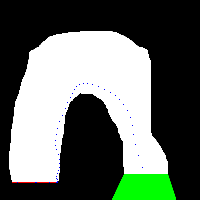

In [2]:
from IPython.display import Image
Image("/workspaces/RL2018/exercises/chapter5/e5_12_outputs/complex_track_off-policy_example.png", width=400)

#### Value funciton [-5000001, -4206353.876426099]
Note here I include states moving downward in the average as well.

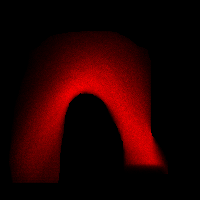

In [3]:
from IPython.display import Image
Image("/workspaces/RL2018/exercises/chapter5/e5_12_outputs/complex_track_off-policy_avg_value.png", width=400)

#### Exploring Starts
This algorithm seems to be defeated by the larger state space. However, there may simply be a bug in this implementation that I have not found yet.